# Preliminary YOLO Testing

Initialize YOLO model and test against sample image:

In [ ]:
# initialize model

!pip install ultralytics

from ultralytics import YOLO
from google.colab.patches import cv2_imshow # opencv's imshow() method causes crashes, this is colab's workaround

model = YOLO('yolov5m.pt') # .pt = pretrained, .yaml = untrained

PRO TIP 💡 Replace 'model=yolov5m.pt' with new 'model=yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [ ]:
# test

test_img = 'https://vwartclub.com/media/projects/259/1.jpg'
results = model(test_img)

output = results[0].plot()
cv2_imshow(output)

Output hidden; open in https://colab.research.google.com to view.

Train YOLO on sample dataset:

In [ ]:
# initialize model, gather data

!pip install ultralytics
!pip install roboflow

from ultralytics import YOLO
from roboflow import Roboflow
from google.colab.patches import cv2_imshow

# dataset: https://universe.roboflow.com/sashank-s/streetlight-night
rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("sashank-s").project("streetlight-night")
version = project.version(1)
dataset = version.download("yolov5")

model = YOLO('yolov5m.yaml')

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# train

model.train(data='StreetLight-Night-1/data.yaml', epochs=16) # ordinarily use a lot more epochs

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5m.yaml, data=StreetLight-Night-1/data.yaml, epochs=16, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train63, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

train: Scanning /content/StreetLight-Night-1/train/labels.cache... 350 images, 0 backgrounds, 0 corrupt: 100%|██████████| 350/350 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/StreetLight-Night-1/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train63/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train63
Starting training for 16 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/16      8.01G      2.416      1.836      2.575         43        640: 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         50         78      0.711     0.0324     0.0773     0.0224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/16      6.94G       2.24      1.572      2.351         25        640: 100%|██████████| 22/22 [00:11<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         50         78      0.521      0.115      0.106     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/16      6.92G      2.214       1.68      2.339         37        640: 100%|██████████| 22/22 [00:10<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         50         78      0.561     0.0769     0.0892     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/16         7G      2.146      1.453      2.227         42        640: 100%|██████████| 22/22 [00:10<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         50         78      0.534      0.192      0.198     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/16      6.86G      2.118      1.355      2.181         30        640: 100%|██████████| 22/22 [00:10<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         50         78      0.273     0.0769     0.0815     0.0227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/16      6.93G      2.071      1.286      2.071         40        640: 100%|██████████| 22/22 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         50         78      0.289      0.271      0.174     0.0663


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/16      6.85G      2.019      1.409      2.181         22        640: 100%|██████████| 22/22 [00:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         50         78      0.613      0.564      0.617      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/16      7.08G      2.022      1.382      2.194         20        640: 100%|██████████| 22/22 [00:11<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         50         78      0.676      0.577       0.69        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/16      6.99G      1.923      1.298      2.074         20        640: 100%|██████████| 22/22 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         50         78      0.837      0.885      0.861      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/16      6.93G      1.961      1.216      2.077         23        640: 100%|██████████| 22/22 [00:12<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         50         78      0.326      0.218      0.168     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/16      6.86G      1.895      1.206       2.06         21        640: 100%|██████████| 22/22 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         50         78       0.36      0.354      0.307      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/16      7.08G      1.874      1.125      1.986         20        640: 100%|██████████| 22/22 [00:10<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         50         78      0.811      0.825      0.867      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/16      7.01G      1.864      1.142      2.004         21        640: 100%|██████████| 22/22 [00:10<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         50         78      0.866      0.897      0.917      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/16      7.09G      1.834       1.12      2.018         17        640: 100%|██████████| 22/22 [00:10<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         50         78       0.86      0.808      0.875      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/16      6.86G       1.81      1.085      1.939         21        640: 100%|██████████| 22/22 [00:10<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         50         78      0.872      0.875      0.898       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/16       7.1G      1.803      1.066      1.919         20        640: 100%|██████████| 22/22 [00:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         50         78      0.876      0.907      0.944      0.433



16 epochs completed in 0.069 hours.
Optimizer stripped from runs/detect/train63/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train63/weights/best.pt, 50.5MB

Validating runs/detect/train63/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5m summary (fused): 248 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]


                   all         50         78      0.876      0.902      0.943      0.429
Speed: 0.2ms preprocess, 6.7ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train63


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cfa1b8c78d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


Found https://thumbs.dreamstime.com/b/empty-street-night-23248254.jpg locally at empty-street-night-23248254.jpg
image 1/1 /content/empty-street-night-23248254.jpg: 448x640 1 StreetLight, 25.5ms
Speed: 2.4ms preprocess, 25.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


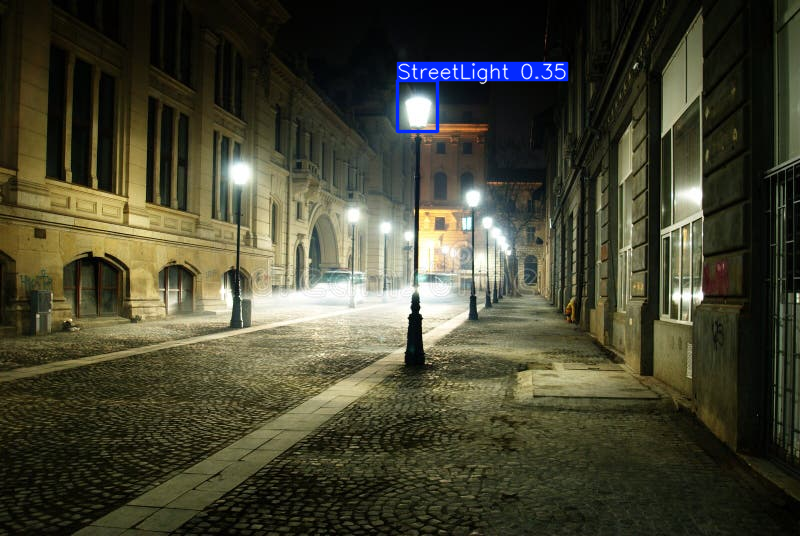

In [ ]:
# test

test_img = 'https://thumbs.dreamstime.com/b/empty-street-night-23248254.jpg'
results = model.predict(test_img)

output = results[0].plot()
cv2_imshow(output)

# Test 1
Train: Street lights \\
Validate: UCSD

In [ ]:
# set up

!pip install ultralytics
!pip install roboflow

from ultralytics import YOLO
from roboflow import Roboflow

# dataset: https://universe.roboflow.com/sashank-s/streetlight-night
rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("streetlight-night-kxnxy")
version = project.version(1)
dataset = version.download("yolov5")

# dataset: https://app.roboflow.com/erspvision/ersp-premade-dataset/1
rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("ersp-premade-dataset")
version = project.version(1)
dataset = version.download("yolov5")


model = YOLO('yolov5m.yaml')

train_data_path = "StreetLight-Night-1/data.yaml"
test_data_path = "ERSP-Premade-Dataset-1/data.yaml"

In [ ]:
# train

# BEFORE TRAINING, edit data.yaml file:
# train: /content/StreetLight-Night-1/train/images
# val: /content/StreetLight-Night-1/valid/images

model.train(data=train_data_path, epochs=64)
model.val(data=train_data_path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

100%|██████████| 755k/755k [00:00<00:00, 89.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      5280  ultralytics.nn.modules.conv.Conv             [3, 48, 6, 2, 2]              
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2     65280  ultralytics.nn.modules.block.C3              [96, 96, 2]                   
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    444672  ultralytics.nn.modules.block.C3              [192, 192, 4]                 
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  6   2512896  ultralytics.nn.modules.block.C3              [384, 384, 6]                 
  7                  -1  1   2655744  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 318MB/s]


AMP: checks passed ✅


train: Scanning /content/StreetLight-Night-1/train/labels... 1200 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:00<00:00, 1400.44it/s]

train: New cache created: /content/StreetLight-Night-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/StreetLight-Night-1/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 694.56it/s]

val: New cache created: /content/StreetLight-Night-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 64 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/64      6.24G      3.072      3.266      3.682         42        640: 100%|██████████| 75/75 [00:37<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        100        160   0.000473     0.0375   0.000252   7.91e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/64       6.4G      2.403      2.031       2.69         39        640: 100%|██████████| 75/75 [00:35<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        100        160       0.14      0.125      0.102      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/64      6.24G      2.232      1.627       2.41         34        640: 100%|██████████| 75/75 [00:36<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        100        160     0.0022      0.125    0.00133    0.00035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/64      6.23G      2.172      1.485      2.341         17        640: 100%|██████████| 75/75 [00:35<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all        100        160      0.211      0.119     0.0913     0.0246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/64      6.38G      2.128      1.513      2.298         40        640: 100%|██████████| 75/75 [00:35<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all        100        160       0.15       0.15      0.103      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/64      6.17G       2.06      1.424      2.206         34        640: 100%|██████████| 75/75 [00:35<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        100        160    0.00898      0.219      0.012    0.00291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/64      6.36G      2.004      1.359      2.163         43        640: 100%|██████████| 75/75 [00:35<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        100        160       0.32      0.212       0.15     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/64      6.23G      1.957      1.324      2.089         40        640: 100%|██████████| 75/75 [00:35<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        100        160      0.325      0.106     0.0998     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/64      6.37G      1.975      1.284      2.101         43        640: 100%|██████████| 75/75 [00:35<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        100        160      0.668      0.481       0.58      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/64      6.17G      1.945      1.271      2.094         42        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        100        160      0.872       0.85      0.883       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/64      6.24G      1.897      1.228      2.047         24        640: 100%|██████████| 75/75 [00:35<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        100        160      0.277      0.512      0.288     0.0863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/64      6.38G      1.888      1.222       2.04         28        640: 100%|██████████| 75/75 [00:35<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        100        160     0.0995      0.138     0.0433    0.00909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/64      6.39G      1.866      1.183      2.008         38        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        100        160      0.327      0.122      0.138     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/64      6.17G      1.899      1.204      1.995         42        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        100        160      0.232      0.113     0.0479     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/64      6.24G      1.854      1.205      1.983         37        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        100        160       0.33      0.185      0.128     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/64      6.25G      1.821      1.179      1.963         27        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100        160       0.37      0.444       0.39      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/64      6.24G      1.833      1.173      1.983         37        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100        160      0.307      0.181      0.178     0.0568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/64      6.17G      1.834      1.228      1.999         39        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100        160      0.486      0.312      0.359      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/64      6.38G      1.818      1.163      1.967         31        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100        160      0.726      0.525       0.61      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/64      6.38G      1.815      1.162      1.937         30        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        100        160      0.606      0.581      0.588      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/64      6.23G      1.828      1.148      1.979         35        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        100        160      0.778      0.919      0.851      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/64      6.17G      1.798      1.155      1.952         29        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        100        160      0.674      0.659      0.707      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/64      6.25G      1.787      1.117      1.923         41        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        100        160      0.516      0.225      0.297      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/64      6.24G      1.767      1.085      1.883         37        640: 100%|██████████| 75/75 [00:35<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        100        160       0.35      0.275      0.209     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/64      6.24G      1.783      1.098      1.934         40        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        100        160      0.829      0.731      0.854      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/64      6.17G      1.771      1.096      1.898         34        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        100        160      0.568      0.575      0.586      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/64      6.24G       1.74      1.075      1.889         31        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        100        160      0.616      0.362      0.408       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/64      6.37G      1.737      1.118      1.887         32        640: 100%|██████████| 75/75 [00:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        100        160      0.568      0.312      0.381      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/64      6.24G      1.746      1.049      1.914         25        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        100        160      0.651      0.244      0.304      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/64      6.17G      1.736       1.05      1.879         30        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100        160      0.964      0.944      0.986      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/64      6.25G       1.73      1.039      1.883         40        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100        160      0.726      0.645      0.755      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/64      6.37G      1.716      1.039      1.858         33        640: 100%|██████████| 75/75 [00:35<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        100        160      0.635      0.806      0.788      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/64      6.39G      1.718      1.054      1.858         52        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        100        160      0.962      0.919      0.979      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/64      6.17G      1.732      1.044      1.895         28        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100        160      0.929      0.988      0.981      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/64      6.24G       1.71      1.022      1.877         30        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        100        160      0.534      0.222      0.265      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/64      6.39G      1.679      1.038       1.85         42        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        100        160      0.399      0.121      0.103     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/64      6.23G      1.737      1.011      1.877         50        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100        160      0.964      0.956      0.985      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/64      6.17G      1.687     0.9911      1.839         40        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        100        160      0.555      0.356      0.428      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/64      6.24G      1.692       0.97      1.857         43        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        100        160      0.917      0.806      0.882       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/64      6.38G      1.677     0.9834      1.826         43        640: 100%|██████████| 75/75 [00:35<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        100        160      0.964      0.975      0.985      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/64      6.24G      1.672     0.9838      1.809         39        640: 100%|██████████| 75/75 [00:35<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        100        160      0.952      0.981      0.986      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/64      6.17G      1.675     0.9813       1.83         37        640: 100%|██████████| 75/75 [00:35<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        100        160      0.972      0.969      0.993      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/64      6.38G       1.66     0.9756      1.824         33        640: 100%|██████████| 75/75 [00:35<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        100        160      0.961      0.994      0.986      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/64      6.24G      1.656     0.9638      1.823         39        640: 100%|██████████| 75/75 [00:35<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        100        160      0.963      0.938      0.984      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/64      6.39G      1.638     0.9277      1.802         40        640: 100%|██████████| 75/75 [00:37<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        100        160      0.946      0.879      0.951      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/64      6.17G      1.643     0.9388      1.806         35        640: 100%|██████████| 75/75 [00:38<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        100        160      0.939      0.831      0.917       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/64      6.22G      1.614     0.9278      1.787         30        640: 100%|██████████| 75/75 [00:37<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all        100        160      0.815        0.6      0.684      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/64      6.24G      1.658     0.9015       1.81         31        640: 100%|██████████| 75/75 [00:36<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        100        160      0.604      0.412      0.457      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/64      6.39G      1.631     0.9189      1.796         40        640: 100%|██████████| 75/75 [00:35<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        100        160       0.95      0.969      0.974      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/64      6.17G      1.631     0.9084      1.799         29        640: 100%|██████████| 75/75 [00:35<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        100        160      0.901      0.855      0.928      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/64      6.25G      1.632     0.8904      1.776         49        640: 100%|██████████| 75/75 [00:36<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        100        160      0.952       0.95      0.956       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/64      6.39G       1.61     0.8953      1.774         25        640: 100%|██████████| 75/75 [00:35<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        100        160      0.974      0.932      0.987      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/64      6.23G       1.62     0.8854      1.788         28        640: 100%|██████████| 75/75 [00:35<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        100        160          1      0.909      0.981      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/64      6.17G      1.589     0.8687       1.78         31        640: 100%|██████████| 75/75 [00:35<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        100        160      0.878      0.844      0.871      0.336


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/64      6.37G      1.574     0.8458      1.915         23        640: 100%|██████████| 75/75 [00:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        100        160      0.989          1      0.995      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/64      6.39G      1.566     0.8109      1.886         29        640: 100%|██████████| 75/75 [00:35<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        100        160      0.987       0.95      0.985      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/64      6.39G      1.547     0.8012      1.878         24        640: 100%|██████████| 75/75 [00:34<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        100        160      0.984      0.887      0.975      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/64      6.32G      1.559     0.7853      1.889         26        640: 100%|██████████| 75/75 [00:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100        160      0.893      0.606      0.757      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/64      6.25G      1.547     0.7737       1.89         29        640: 100%|██████████| 75/75 [00:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        100        160      0.955      0.935      0.985      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/64      6.23G      1.551       0.78      1.874         25        640: 100%|██████████| 75/75 [00:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        100        160       0.92      0.613      0.767      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/64      6.23G      1.536     0.7562      1.852         22        640: 100%|██████████| 75/75 [00:35<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        100        160      0.994      0.983      0.995       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/64      6.17G      1.514     0.7428       1.86         24        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        100        160      0.987      0.986      0.992      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/64      6.25G      1.514     0.7534      1.865         22        640: 100%|██████████| 75/75 [00:35<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all        100        160      0.989      0.988      0.992      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/64      6.24G      1.519     0.7491      1.851         23        640: 100%|██████████| 75/75 [00:35<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        100        160      0.994      0.993      0.995      0.518



64 epochs completed in 0.694 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 50.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5m summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


                   all        100        160      0.989      0.988      0.992      0.534
Speed: 0.3ms preprocess, 9.5ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5m summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /content/StreetLight-Night-1/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        100        160       0.99      0.988      0.992      0.537
Speed: 3.4ms preprocess, 24.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d36e6351350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# validate on new domain

# BEFORE TRAINING, edit data.yaml file:
# val: /content/ERSP-Premade-Dataset-1/test/images

model.val(data=test_data_path, save_json=True)

loading Roboflow workspace...
loading Roboflow project...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/ERSP-Premade-Dataset-1/test/labels... 51 images, 3 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<00:00, 2256.33it/s]

val: New cache created: /content/ERSP-Premade-Dataset-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]


                   all         51        171      0.434      0.117      0.142     0.0607
Speed: 4.4ms preprocess, 21.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Saving runs/detect/train6/predictions.json...
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d36df60c110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Test 2
Train: UCSD \\
Validate: UCSD

In [ ]:
# set up

!pip install ultralytics
!pip install roboflow

from ultralytics import YOLO
from roboflow import Roboflow

# dataset: https://app.roboflow.com/erspvision/ersp-premade-dataset/3
rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("ersp-premade-dataset")
version = project.version(3)
dataset = version.download("yolov5")

model = YOLO('yolov5m.yaml')
data_path = "ERSP-Premade-Dataset-3/data.yaml"

In [ ]:
# train

model.train(data=data_path, epochs=100)
model.val(data=data_path)

# Test 3

Train: UCSD \ Validate: UCSD \ Predict: UCSD

500 epochs, `conf` and `iou` thresholds

In [ ]:
!pip install ultralytics roboflow matplotlib

import os
from ultralytics import YOLO
from roboflow import Roboflow

# dataset: https://app.roboflow.com/erspvision/ersp-ucsd/1
rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("ersp-ucsd")
dataset = project.version(1).download("yolov5")

In [9]:
model = YOLO("yolov5mu.yaml")
results = model.train(
  data=os.path.join(dataset.location, "data.yaml"),
  epochs=500,
  imgsz=640,
  batch=16,
  save=True,
  plots=True
)

New https://pypi.org/project/ultralytics/8.3.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=N

100%|██████████| 755k/755k [00:00<00:00, 4.97MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      5280  ultralytics.nn.modules.conv.Conv             [3, 48, 6, 2, 2]              
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2     65280  ultralytics.nn.modules.block.C3              [96, 96, 2]                   
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    444672  ultralytics.nn.modules.block.C3              [192, 192, 4]                 
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  6   2512896  ultralytics.nn.modules.block.C3              [384, 384, 6]                 
  7                  -1  1   2655744  ultralytics

100%|██████████| 5.35M/5.35M [00:01<00:00, 5.01MB/s]


AMP: checks passed ✅


train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/train/labels... 108 images, 3 backgrounds, 0 corrupt: 100%|██████████| 108/108 [00:00<00:00, 1174.99it/s]

train: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/train/labels.cache



This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/valid/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 716.98it/s]

val: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/valid/labels.cache



This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      6.04G      4.532      14.29       4.43         36        640: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         15         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      6.15G        4.1      26.36      4.283         88        640: 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         15         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      6.24G      4.484       13.9      4.207         87        640: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         15         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      6.26G      4.791      11.48      4.091         79        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all         15         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      6.33G      3.833      6.726      3.812         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         15         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      6.24G      3.936      6.216       3.76         55        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      6.32G      3.646      5.202      3.535         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      6.22G      3.873      5.771      3.238         82        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         15         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      6.33G      3.634      4.137      2.816         75        640: 100%|██████████| 7/7 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         15         91          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      6.25G      3.573      4.035      2.625         54        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91    0.00105      0.022   0.000539   0.000164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      6.33G      3.352      3.475       2.48         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

                   all         15         91    0.00142      0.033    0.00218   0.000831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500       6.3G       3.43      3.176      2.525         80        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15         91     0.0021     0.0549    0.00552    0.00178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      6.24G      3.312      2.906      2.396         84        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.256      0.022     0.0321     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      6.31G      3.294      2.675      2.157         67        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]

                   all         15         91     0.0822      0.044    0.00526   0.000735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      6.28G      3.214      2.679      2.197         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         15         91      0.376      0.121     0.0924     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      6.29G      3.325      2.495      1.911         68        640: 100%|██████████| 7/7 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         15         91      0.101     0.0989     0.0183    0.00331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      6.24G      3.182      2.528      1.966         79        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91      0.141       0.11      0.025    0.00377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      6.27G      3.238      2.431      1.987         92        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         15         91      0.162      0.176     0.0538     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      6.33G      3.044      2.469      1.975         76        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         15         91      0.189     0.0879     0.0379    0.00586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      6.25G      3.111      2.377       1.84         68        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all         15         91      0.251      0.209      0.086     0.0244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      6.24G      2.812      2.155      1.748         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91      0.387      0.231      0.163     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      6.38G      2.737      2.018      1.685         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         15         91      0.565       0.22      0.224     0.0777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500       6.3G      2.714      2.119      1.699         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         15         91      0.631      0.231       0.23     0.0886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      6.32G      2.725      2.038      1.719         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91      0.128      0.231     0.0406     0.0144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500       6.3G      2.587      1.966      1.515         51        640: 100%|██████████| 7/7 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         15         91      0.524      0.209        0.2      0.074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500       6.3G      2.766      1.937      1.642         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91       0.47      0.297       0.26     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      6.28G      2.604      2.035      1.678         93        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15         91      0.647      0.262       0.28      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500       6.3G      2.571      1.809      1.484         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.542       0.22      0.231     0.0943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      6.26G       2.57      1.782      1.561         80        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all         15         91      0.477      0.198      0.199     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      6.32G      2.491      1.859       1.53         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         15         91      0.539      0.242      0.237     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      6.31G       2.55      1.786      1.561         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         15         91       0.53      0.286       0.28      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      6.27G      2.468      1.885      1.668         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         15         91      0.504      0.253       0.24     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      6.29G       2.38      1.881      1.626         82        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all         15         91      0.574      0.297      0.305       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      6.37G       2.42      1.773      1.438         55        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]

                   all         15         91      0.532      0.341       0.33       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      6.37G      2.488      1.901      1.588         75        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all         15         91      0.372      0.308      0.256      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      6.29G      2.509      1.851      1.605         58        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         15         91      0.569      0.334      0.341      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500       6.3G      2.435      1.675      1.402         67        640: 100%|██████████| 7/7 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         15         91      0.597      0.297      0.303      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      6.31G      2.452       1.68      1.402         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         15         91      0.473      0.345      0.314      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      6.31G      2.328      1.653      1.368         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         15         91      0.524       0.33      0.286     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500       6.3G      2.299       1.64      1.459         68        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91      0.713       0.33      0.389      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      6.24G      2.476      1.759      1.548         44        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         15         91      0.659      0.319      0.345      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      6.29G      2.298      1.621      1.439         35        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91       0.58      0.385      0.401      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      6.38G      2.287      1.553      1.343         84        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91      0.662      0.366      0.407      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      6.29G      2.297      1.653      1.451         81        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15         91      0.537      0.407      0.372      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500       6.3G        2.3      1.593       1.38         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         15         91      0.499      0.407      0.317      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      6.33G      2.385      1.667      1.492         75        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         15         91      0.471      0.374      0.333      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500       6.3G      2.319       1.62      1.393         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15         91      0.591      0.341      0.342      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      6.39G      2.464       1.59      1.386         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15         91      0.616      0.418      0.401      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      6.31G      2.186      1.543      1.359         45        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.612      0.385      0.403      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500       6.3G      2.285      1.474      1.275         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all         15         91      0.619      0.363      0.397      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      6.33G      2.328      1.656      1.422         50        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15         91      0.564      0.427      0.436      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      6.29G      2.141      1.526      1.366         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.656      0.396      0.446      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      6.21G      2.234      1.587      1.446         39        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91       0.72      0.429      0.464      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500       6.3G      2.267      1.548      1.375         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         15         91      0.662      0.388      0.439       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      6.25G      2.221       1.49      1.319         98        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.562       0.33      0.339      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      6.33G      2.221      1.586      1.387         92        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]

                   all         15         91      0.634      0.363      0.426       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      6.21G      2.122      1.464      1.352         90        640: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91      0.525      0.437      0.446      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      6.31G      2.035      1.378      1.334         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         15         91      0.692      0.374      0.459      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      6.37G      2.188      1.377      1.317         82        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91      0.623      0.363      0.423       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      6.28G      2.042      1.355      1.243         58        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91      0.601      0.385      0.413      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      6.29G      2.158      1.443      1.378         52        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all         15         91      0.633      0.363      0.417      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      6.31G      2.107      1.395      1.354         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.673      0.407      0.415      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      6.31G      2.101      1.402      1.282         55        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.703      0.385      0.431      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500       6.3G      2.105      1.379      1.291         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.712      0.407      0.476      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      6.24G      2.112        1.4      1.278         47        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.671      0.407      0.452      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      6.34G      2.068      1.427      1.319         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91      0.576      0.418       0.42      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500       6.3G      2.132      1.418      1.333         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15         91      0.649      0.427      0.448      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      6.28G      2.024      1.387      1.349         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15         91      0.694      0.352      0.412      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      6.32G      2.174      1.501       1.32         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.699      0.341      0.421      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      6.31G      1.902       1.37       1.28         50        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91      0.557      0.414      0.443      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      6.29G      2.091      1.413      1.341         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.532      0.473      0.436      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      6.37G       2.13      1.371      1.317         99        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91      0.542      0.451      0.393      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      6.21G      1.919      1.329      1.171         35        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15         91      0.554      0.473      0.439      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      6.32G      2.023      1.389      1.272         55        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91       0.61      0.462      0.482      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      6.28G      2.084      1.428      1.294         51        640: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15         91      0.547      0.451       0.46      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      6.32G      1.913      1.302      1.226         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15         91      0.591      0.451      0.448      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      6.23G      2.027      1.412      1.313         98        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.602      0.465      0.454      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      6.33G       2.01      1.398      1.387         31        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all         15         91       0.63      0.429      0.466      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      6.31G      1.954      1.407       1.26         68        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         15         91      0.569      0.464      0.465      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      6.37G      2.039      1.416      1.315         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15         91      0.555      0.473      0.459      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      6.24G       1.87       1.38      1.295         34        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15         91      0.536      0.495      0.474       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      6.36G      1.962      1.296      1.229        118        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15         91      0.577      0.495      0.479      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      6.28G      1.976      1.424      1.259         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91      0.534      0.451      0.452      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      6.27G      1.946      1.368      1.298        100        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.584      0.462      0.502      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      6.24G      2.056      1.388      1.328         76        640: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15         91      0.576      0.473      0.488      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      6.32G       1.98      1.352      1.252         86        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91      0.583      0.495      0.483      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      6.36G      1.956      1.313      1.267         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         15         91      0.641      0.432      0.494      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      6.32G      1.973      1.276      1.229         58        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91       0.56      0.495      0.474      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      6.29G      1.783      1.234      1.213         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91      0.587      0.495      0.477      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      6.32G      1.937       1.27      1.245         46        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         15         91      0.621      0.504      0.525      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      6.32G      2.039      1.333      1.265         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15         91      0.579      0.473      0.486       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      6.31G      1.838      1.274      1.264         87        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15         91      0.584      0.484      0.463      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      6.21G      1.872      1.332      1.285         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15         91      0.553      0.527      0.469      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      6.25G      1.792      1.208      1.215         75        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91      0.509      0.527      0.485      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      6.25G      1.961      1.258      1.269         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         15         91      0.532      0.484      0.465      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      6.26G      2.004       1.23      1.214        113        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91      0.543      0.505      0.487      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      6.23G      1.915      1.228      1.187         67        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15         91      0.567      0.484      0.476      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500       6.3G      1.953       1.44      1.367         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all         15         91      0.573       0.44      0.465      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      6.31G      1.998      1.325      1.286         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15         91      0.618      0.429      0.467      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      6.28G      1.873       1.23      1.204         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all         15         91      0.562      0.407      0.438      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      6.23G        1.9       1.31      1.314         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]

                   all         15         91       0.54      0.477      0.478      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      6.32G      1.848      1.209      1.219         83        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all         15         91      0.639       0.44       0.47      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      6.32G      1.957      1.266      1.148         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91      0.593      0.418      0.421      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      6.32G      1.926      1.243      1.218         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         15         91      0.568      0.473      0.449      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      6.29G      1.879      1.256      1.274         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15         91      0.604      0.453      0.466      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      6.29G      1.786      1.222      1.223         39        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15         91      0.707      0.418      0.491      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500       6.3G       1.95      1.253      1.166         75        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.669      0.505      0.551      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500       6.3G      1.817       1.25      1.203         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15         91      0.559      0.487      0.499      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      6.26G      1.836      1.263      1.287         39        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         15         91      0.604      0.407      0.453      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      6.32G      1.819      1.247      1.174         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91      0.696      0.407      0.483      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      6.29G      1.834      1.227      1.185         98        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

                   all         15         91      0.113      0.549     0.0794     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      6.35G      1.836      1.205      1.209         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.294      0.489       0.22      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      6.18G      1.829       1.28      1.263         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all         15         91      0.462      0.495      0.347      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      6.38G      1.824      1.235      1.222         91        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15         91      0.563      0.527      0.502      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      6.26G      1.904      1.186      1.236         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         15         91      0.572      0.485      0.482      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500       6.3G      1.898      1.276      1.314         83        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         15         91      0.537      0.472      0.472      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      6.18G      1.745      1.179      1.111         55        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         15         91      0.569      0.435      0.486      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      6.29G      1.897      1.415      1.314         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.614      0.455      0.494       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      6.28G      1.804      1.279      1.229         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91      0.641      0.452      0.494      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      6.28G       1.82      1.162      1.183         47        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all         15         91      0.675      0.484      0.539      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      6.29G      1.844      1.181       1.19         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         15         91      0.667      0.462      0.524      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      6.28G      1.711      1.127      1.165         41        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.734      0.429      0.499      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      6.33G      1.753      1.122      1.165         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]

                   all         15         91      0.683      0.462      0.513      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      6.35G      1.755      1.172      1.202         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15         91      0.556      0.527      0.493      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      6.21G      1.753      1.154      1.195         93        640: 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.699      0.407      0.474      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      6.28G      1.729      1.165      1.206         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91      0.561      0.505      0.454      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      6.29G      1.732      1.195      1.127         47        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         15         91      0.628      0.462      0.497      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      6.36G      1.791      1.172      1.221         79        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.738      0.418      0.505      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      6.26G      1.758      1.169      1.194        107        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         15         91      0.668      0.465      0.534      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      6.33G      1.887      1.305      1.262         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91      0.639      0.495       0.52      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      6.29G      1.712      1.172      1.135         94        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91       0.68      0.527      0.533      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      6.31G      1.711      1.175      1.191         36        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.736      0.495      0.537      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      6.23G       1.66      1.133      1.125         76        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91       0.75      0.495      0.542      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      6.37G      1.803      1.152      1.223         44        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all         15         91      0.649      0.529      0.525      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      6.25G      1.731      1.069      1.231         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all         15         91      0.696      0.484      0.518      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      6.36G      1.695      1.091      1.109         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.615       0.51      0.512      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      6.18G      1.741      1.178      1.217         65        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         15         91      0.601      0.505      0.503       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      6.39G      1.777      1.118      1.228         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         15         91      0.578      0.571      0.536      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      6.34G      1.611      1.042      1.101         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15         91      0.624      0.495      0.504      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500       6.3G      1.601      1.055      1.178         42        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.657      0.505       0.51      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      6.32G      1.773      1.118      1.144         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.677      0.473      0.505      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      6.31G      1.703      1.111      1.159         50        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15         91      0.592      0.542      0.506       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      6.36G      1.786       1.18      1.205         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         15         91      0.649      0.505      0.509      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      6.29G      1.778      1.155      1.208         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         15         91      0.632      0.516      0.525      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      6.21G      1.644      1.115       1.12         65        640: 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91      0.654      0.518      0.538      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      6.31G      1.713      1.123      1.176         80        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91      0.715      0.473      0.536      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      6.31G      1.679      1.065      1.149         60        640: 100%|██████████| 7/7 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15         91      0.598      0.549       0.53      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      6.26G      1.695      1.173      1.184         36        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15         91      0.544      0.505      0.491      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      6.26G      1.797      1.263      1.239         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.503      0.505      0.465       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      6.34G      1.646      1.075      1.105         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91      0.607      0.407      0.465      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      6.37G      1.645      1.064      1.101         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15         91      0.564      0.538      0.525       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      6.28G      1.704      1.119       1.12         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.649      0.505      0.535      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      6.21G      1.754      1.114      1.134         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15         91       0.66      0.484      0.537       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      6.28G      1.705      1.122      1.115         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91      0.668      0.538      0.561      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      6.31G      1.677      1.176      1.162         62        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15         91      0.511      0.571      0.517       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      6.24G      1.701      1.083      1.145         86        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         15         91      0.575      0.516      0.511      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      6.24G      1.548      1.038      1.094         88        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91       0.69       0.44      0.503      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500       6.3G       1.72      1.154      1.139         62        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.713      0.451      0.552      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      6.28G      1.678      1.096      1.152         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15         91      0.551      0.538      0.505      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      6.35G      1.781      1.082      1.145         86        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15         91      0.551      0.539      0.512      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      6.24G      1.719       1.08      1.136         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91      0.538      0.588       0.49      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      6.28G      1.775      1.168      1.169         40        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.668      0.462       0.51      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      6.28G      1.718      1.074      1.153         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15         91      0.577      0.538      0.515      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      6.24G      1.644      1.058       1.12        101        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.625      0.513      0.529      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      6.24G      1.723      1.117      1.118         58        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15         91      0.608      0.545      0.526       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      6.36G      1.622      1.027      1.129         88        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         15         91      0.695      0.495      0.507      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500       6.4G      1.581      1.025      1.204         51        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all         15         91      0.681      0.527      0.514      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500       6.3G      1.673      1.047      1.187         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.663      0.516      0.486      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      6.29G      1.721      1.126      1.181         85        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all         15         91      0.636      0.516      0.479      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      6.29G      1.652     0.9951       1.09         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.637      0.527      0.523      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      6.33G      1.709      1.146      1.247         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15         91      0.636      0.557      0.562       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      6.38G       1.63      1.032      1.068         87        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]

                   all         15         91      0.673      0.505      0.564      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      6.18G      1.518     0.9791      1.081         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.725      0.552      0.603      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      6.32G      1.732       1.11      1.158         87        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15         91       0.66      0.549      0.575      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      6.28G      1.638      1.095      1.121         42        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all         15         91      0.557      0.593      0.578      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      6.28G      1.647      1.056      1.138         44        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91      0.618      0.549      0.575      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      6.24G      1.558      1.048      1.132         81        640: 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         15         91      0.608      0.571      0.575      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      6.37G      1.608      1.016      1.112         50        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.619      0.527      0.512      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      6.36G      1.553     0.9749      1.086         46        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15         91      0.672      0.562      0.547      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      6.36G      1.516      1.007      1.109         54        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.663      0.615      0.562      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500       6.3G      1.526     0.9511      1.071         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all         15         91      0.687      0.571       0.56      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      6.28G      1.579      1.013      1.111         85        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.738      0.484      0.521      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      6.32G      1.557      0.961      1.067         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.701      0.484      0.517       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      6.29G      1.629      1.052      1.138         86        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         15         91      0.695      0.451      0.509      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500       6.3G      1.527     0.9642      1.094         90        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15         91      0.659      0.495      0.535      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      6.33G      1.594      1.041      1.136         99        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15         91      0.603      0.533      0.514      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      6.29G      1.676      1.017      1.096         55        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91      0.652      0.536      0.507      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      6.24G      1.693      1.058      1.163         67        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15         91      0.585      0.572      0.505      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      6.23G      1.662      1.047      1.122         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all         15         91      0.584      0.538      0.487       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      6.38G      1.652     0.9866      1.185        110        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15         91      0.639      0.582      0.563      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500       6.3G      1.626     0.9967      1.184         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91      0.633      0.538      0.539       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500       6.3G      1.564      1.079      1.173         46        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

                   all         15         91      0.654      0.505      0.499      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      6.21G      1.549     0.9745      1.109         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15         91      0.623      0.527      0.512      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      6.31G      1.654      1.087      1.183         65        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         15         91      0.527      0.527      0.511      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      6.33G      1.519     0.9679      1.048         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all         15         91      0.527      0.601      0.547      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500       6.3G      1.564      1.014      1.103         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91      0.625      0.549      0.565      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      6.21G      1.546     0.9235      1.093         86        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         15         91      0.613      0.571      0.566        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      6.31G      1.678      1.017      1.181         52        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91      0.568      0.615      0.557      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      6.37G      1.666      1.042      1.133         79        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]

                   all         15         91      0.672      0.527       0.52      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      6.29G       1.57      1.019      1.116         78        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all         15         91      0.591      0.571      0.535      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      6.26G      1.579       1.03      1.094         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         15         91      0.574       0.56      0.516      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      6.28G      1.613      1.001      1.122         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.664      0.484      0.519      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      6.29G       1.58      1.052      1.151         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15         91      0.636      0.462      0.519      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      6.37G      1.727      1.089       1.19         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91       0.71      0.462      0.517      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      6.31G      1.584      1.001      1.114         92        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.707      0.462       0.53      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      6.25G      1.553      1.011      1.126         96        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.687      0.505      0.549      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      6.32G      1.608      1.046      1.124         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15         91      0.683      0.516      0.538      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      6.37G      1.527     0.9761      1.049         82        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91      0.712      0.516      0.573        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500       6.3G      1.543      1.006      1.111         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91        0.6      0.527      0.551      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500       6.3G      1.531     0.9318      1.084         50        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         15         91      0.562      0.571      0.545      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      6.32G      1.487     0.9415      1.106        109        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         15         91      0.617      0.505      0.507      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      6.37G      1.553     0.9448      1.171         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.699      0.582      0.598      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      6.24G      1.406     0.8998      1.046         45        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15         91      0.694      0.573      0.597       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      6.29G      1.548     0.9915      1.166         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all         15         91      0.609      0.604      0.573      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      6.32G      1.536     0.9701      1.137         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15         91      0.696      0.504      0.556      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      6.26G       1.43     0.9458      1.073         84        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91      0.577      0.604      0.535      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500       6.3G      1.541     0.9869      1.121         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91      0.569      0.637      0.555      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      6.29G      1.423     0.9017      1.055         45        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         15         91      0.656      0.538      0.571      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      6.33G      1.558     0.9642      1.152        106        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91      0.699      0.593      0.579      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      6.29G      1.508      1.016       1.12         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.646      0.626      0.571      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500       6.2G      1.541     0.9965      1.113         38        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91      0.599      0.637      0.563      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500       6.3G      1.549     0.9509      1.128         33        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]

                   all         15         91      0.576      0.571      0.559        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      6.31G      1.572      0.936      1.094         79        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         15         91      0.622      0.549      0.559      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      6.27G      1.595      0.996      1.062         67        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all         15         91       0.58      0.582      0.541      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      6.23G      1.566     0.9824      1.071         78        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         15         91      0.665      0.571       0.56      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      6.37G      1.547     0.9536      1.044        139        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91       0.62      0.516      0.519      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      6.28G      1.538     0.9546      1.072         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15         91      0.623      0.516      0.547      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      6.29G      1.492     0.9519      1.056         62        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91      0.582      0.538      0.567      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      6.26G       1.53     0.9165      1.072         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         15         91      0.756      0.546      0.577      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      6.29G      1.581     0.9405      1.106         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15         91      0.771      0.462       0.59      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      6.32G      1.583     0.9819      1.111         62        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.678      0.509       0.58      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      6.28G      1.512     0.9475      1.089         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15         91      0.608      0.593      0.594      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      6.29G       1.59     0.9908      1.141         36        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         15         91      0.613      0.582      0.592      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      6.29G      1.564     0.9455       1.08         83        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.609      0.516      0.549       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500       6.3G      1.444     0.9231      1.109         62        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.598      0.571      0.569      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      6.38G      1.391     0.9123      1.028         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91      0.506      0.607      0.532      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      6.24G      1.559     0.9205      1.125         78        640: 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         15         91      0.514      0.616      0.517      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500       6.3G      1.538     0.9276      1.069         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91      0.601      0.637      0.565      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      6.37G      1.441     0.9008      1.073         92        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         15         91      0.687      0.571      0.555      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      6.31G      1.455     0.8942      1.121         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         15         91      0.649      0.516      0.528      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500       6.3G      1.497     0.8784      1.064         65        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.635      0.495      0.525      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      6.34G      1.439     0.9053      1.058        105        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15         91       0.64      0.538      0.563      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      6.28G      1.379     0.8594      1.072         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91      0.566      0.604      0.564       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      6.31G      1.367     0.8846       1.01         51        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         15         91      0.645       0.56      0.608      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      6.23G      1.364     0.8224      1.053        106        640: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         15         91      0.575      0.626      0.609      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      6.27G      1.483     0.8848      1.094         38        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91      0.613      0.593      0.586      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      6.28G      1.496     0.8837      1.078         65        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91      0.671      0.593      0.558      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      6.32G      1.472     0.9188       1.09         60        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15         91      0.682      0.516       0.51      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      6.26G      1.449     0.8845      1.077         52        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         15         91      0.599       0.56      0.498      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      6.25G      1.532     0.8813      1.088         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all         15         91      0.626      0.505      0.491      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      6.34G      1.507     0.8672      1.041         68        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.607      0.604      0.556      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      6.38G      1.593      0.927      1.041         54        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.639      0.549      0.565      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      6.18G      1.475     0.8957      1.092         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91      0.652      0.549      0.572      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      6.33G      1.384     0.8642      1.039         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         15         91      0.653      0.537      0.538      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      6.39G      1.392     0.8934      1.094         76        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.627      0.536      0.538      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500       6.3G      1.442     0.8681      1.083         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.627       0.59      0.562       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      6.21G      1.349     0.8341      1.022         85        640: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all         15         91      0.578      0.593      0.554      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      6.32G      1.439     0.9355      1.061         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all         15         91      0.615      0.527      0.524       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      6.29G      1.456     0.9647      1.131         54        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.609      0.547      0.518       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      6.29G      1.359     0.8668      1.028         75        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15         91      0.623      0.582       0.54      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      6.21G      1.389     0.9408      1.087         82        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         15         91       0.55      0.604      0.513      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      6.32G      1.364     0.8718      1.039         82        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15         91      0.551      0.579      0.511      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      6.28G      1.328     0.8712      1.099         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all         15         91      0.636      0.571      0.506      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      6.33G      1.438     0.8822      1.069         65        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91      0.586      0.604      0.541      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      6.26G      1.324     0.8618      1.048         47        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15         91      0.553      0.615      0.535      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      6.33G      1.337     0.8348      1.043         93        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15         91      0.488      0.638      0.533      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      6.33G      1.335     0.8311      1.002         84        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15         91      0.642      0.492      0.535      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      6.31G      1.491     0.8798      1.157         81        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all         15         91      0.598      0.508      0.511      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      6.24G      1.509     0.8458      1.043         46        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15         91      0.622      0.542      0.513      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      6.37G      1.451     0.8947      1.103         54        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15         91      0.655      0.584       0.56      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      6.31G      1.446     0.8663      1.023         47        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15         91      0.701      0.592      0.569      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      6.35G      1.366     0.8576      1.051         92        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91       0.63       0.56      0.529      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      6.26G      1.314     0.7921      1.041         55        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         15         91      0.598       0.56      0.531      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      6.33G      1.284     0.8182      1.032         76        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91      0.671      0.505      0.519      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      6.38G      1.344      0.785      1.026         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.611      0.516      0.531      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      6.27G      1.346     0.7975      1.013        105        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15         91      0.582      0.571       0.55      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      6.23G      1.342     0.8206      1.093         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         15         91      0.606      0.604      0.563      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      6.38G      1.342     0.7722      1.082         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15         91      0.604      0.636      0.572      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      6.37G      1.378       0.81      1.042         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15         91      0.626      0.626      0.578      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      6.28G      1.309     0.8178      1.061         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.647      0.604      0.565      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      6.21G      1.487     0.8245      1.088         81        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         15         91      0.649      0.582      0.558      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      6.31G      1.421     0.8412      1.059         37        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91      0.661      0.604      0.605      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      6.25G      1.431     0.7959      1.034         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91      0.657      0.571      0.567      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      6.28G      1.328     0.7643      1.031         98        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.597      0.586      0.541      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500       6.2G      1.624      0.913      1.098         89        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15         91      0.611      0.571      0.547      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      6.34G      1.499     0.8385      1.101         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.527      0.648      0.533      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500       6.3G      1.359     0.8201      1.041         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.692      0.571      0.578      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      6.28G      1.453      0.824      1.043         65        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.708      0.527      0.554      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      6.23G      1.402     0.7966      1.053         90        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15         91       0.65       0.53      0.517      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      6.31G      1.328     0.7836     0.9982         45        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         15         91      0.555      0.637      0.532      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500       6.3G      1.309     0.7894      1.056         79        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all         15         91      0.716      0.495       0.56      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      6.35G      1.343     0.8317      1.017         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.642      0.527      0.566      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      6.24G      1.396     0.8225      1.018         79        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91      0.626      0.593       0.58      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      6.26G      1.418     0.8069      1.045         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15         91      0.613      0.593      0.584      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      6.28G      1.413     0.8167      1.035         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15         91      0.634      0.514      0.528      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      6.36G      1.297     0.7988     0.9959         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91      0.678      0.549      0.577      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      6.31G      1.271     0.8046      1.014         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91      0.636      0.633      0.602      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      6.31G      1.277     0.7386     0.9719        100        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.643      0.648      0.597      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      6.29G      1.354     0.8029      1.024         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         15         91      0.618      0.586      0.579      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500       6.3G      1.323     0.7788      1.039         98        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15         91      0.658      0.549      0.582      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      6.29G      1.454     0.8035      1.111         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         15         91      0.639      0.549      0.584      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      6.36G      1.471     0.8492      1.068         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         15         91      0.683      0.505      0.589      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500       6.3G      1.392     0.8181      1.047         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15         91      0.603      0.582      0.574      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      6.29G      1.343     0.7758      1.016         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.631      0.544      0.579       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      6.31G      1.364      0.778      1.028         80        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all         15         91       0.63      0.538      0.565       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500       6.3G      1.297     0.7601      1.004         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         15         91      0.686      0.456      0.553      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      6.32G      1.346     0.7887      1.033         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.578      0.582      0.571      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      6.31G      1.283     0.7713      1.073         90        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91      0.611      0.648      0.582      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      6.24G      1.282     0.8312      1.038         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15         91      0.585       0.62      0.546      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500       6.3G       1.29     0.7885      1.034        112        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         15         91      0.705      0.526      0.579      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      6.29G       1.29     0.8047      1.061         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91      0.697      0.549        0.6      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      6.28G      1.246     0.7301      1.002         76        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.612      0.582      0.563      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      6.21G      1.363     0.7953      1.028         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15         91      0.588      0.595      0.554      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      6.39G      1.264     0.7788      1.017         68        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all         15         91      0.581      0.615      0.572      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      6.31G      1.309     0.7416     0.9996         58        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         15         91      0.768      0.473      0.572       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      6.35G      1.306     0.7658      1.018         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91      0.648      0.593      0.595      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      6.21G      1.391     0.8149      1.082         39        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         15         91      0.631      0.602      0.595      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      6.38G      1.341     0.7766      1.024         57        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.538      0.604      0.566      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      6.28G      1.325     0.7903      1.031         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         15         91      0.646      0.516      0.571      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      6.28G      1.377     0.8137       1.07         51        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]

                   all         15         91      0.695      0.505      0.574      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500       6.3G      1.227      0.779      1.018         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15         91      0.725      0.516      0.591      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      6.29G      1.238     0.7569      1.037         60        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.583      0.615      0.554      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      6.27G      1.226     0.7488     0.9905         79        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91      0.572      0.587      0.525      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500       6.3G      1.197     0.7329     0.9977         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15         91      0.535      0.626      0.522      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      6.23G      1.245      0.677      1.015         84        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         15         91      0.536      0.558      0.537      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      6.32G       1.26     0.7543       1.02         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91      0.631      0.538      0.573      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      6.29G      1.308     0.7475     0.9886         75        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91      0.625      0.549       0.54      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      6.24G      1.342     0.7533      1.025         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.617      0.512      0.537      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      6.22G      1.309     0.7741      1.016         83        640: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all         15         91      0.598      0.523      0.538      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      6.31G      1.284     0.7688      1.033         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.717      0.529      0.551      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500       6.3G       1.25     0.7305      1.048         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all         15         91      0.662      0.581      0.564      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      6.31G      1.297     0.7454      1.064         91        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         15         91      0.671      0.593      0.598      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      6.23G      1.249     0.7039      1.025         60        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.606      0.626      0.596       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      6.31G      1.235     0.7099      1.036         62        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.599      0.648      0.601      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      6.36G      1.303     0.7689      1.086         45        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15         91      0.572      0.626      0.584       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      6.33G       1.27     0.7467      1.048         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.586      0.561      0.559      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500       6.3G      1.208      0.711      1.024         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         15         91      0.624      0.566      0.565      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      6.32G      1.175     0.6968     0.9868         69        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15         91      0.685       0.56      0.589      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      6.27G       1.15     0.6837      1.005         94        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         15         91      0.706      0.549      0.601      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      6.28G      1.238     0.7549      1.027         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15         91      0.699       0.56      0.615      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      6.24G      1.222     0.6847      1.001         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         15         91      0.685      0.571      0.616      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      6.33G       1.26     0.7296     0.9941         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15         91      0.647      0.527      0.561      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      6.31G      1.267      0.768      1.025         94        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15         91      0.637      0.549       0.56      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      6.37G      1.245     0.7008     0.9655         81        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15         91      0.631       0.56       0.56      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      6.23G      1.228     0.7519      1.023         83        640: 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.628      0.556      0.569      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500       6.3G      1.239     0.7228       1.01         58        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15         91      0.606      0.582      0.584      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      6.28G      1.259      0.715      1.048         87        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15         91      0.656      0.629      0.575      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500       6.3G       1.29     0.7316      1.044         50        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.605      0.637      0.585      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      6.24G      1.173     0.6867     0.9924         62        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15         91      0.644      0.593      0.597       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      6.34G      1.241     0.6795     0.9831         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.612      0.571      0.593      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      6.35G      1.264     0.6741      0.998         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         15         91      0.621      0.571      0.575       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      6.37G      1.206     0.7004      1.004         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.594      0.579      0.573      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500      6.24G      1.181     0.6942      1.001         85        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15         91      0.621      0.611       0.59      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      6.29G      1.179     0.6748      1.007         68        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         15         91      0.595      0.597      0.579      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500       6.3G      1.179     0.7252      1.022         51        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         15         91      0.679      0.505      0.551      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      6.31G      1.286     0.7657      1.057         60        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.649      0.615      0.602      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      6.21G      1.246     0.7604      1.027         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91       0.63      0.637      0.587      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      6.34G      1.217     0.6858     0.9863         68        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.613      0.637      0.589      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      6.37G      1.216     0.7027     0.9969         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91      0.655      0.571      0.625      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500       6.3G      1.219     0.6946     0.9601         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91      0.689      0.527      0.593       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      6.24G      1.257      0.764      1.043         88        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all         15         91        0.7      0.538      0.576      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      6.33G      1.167     0.6859     0.9944         65        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all         15         91      0.736      0.516      0.566      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      6.25G      1.315     0.7624      1.045         60        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         15         91      0.653      0.582      0.569       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      6.28G      1.212      0.708      1.056         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15         91      0.653      0.604      0.587      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500      6.18G      1.179     0.6918      1.007         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]

                   all         15         91       0.76      0.505      0.583      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      6.39G      1.148     0.6813     0.9591         36        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         15         91      0.728      0.527      0.579      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      6.28G      1.219      0.657     0.9557         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all         15         91      0.647      0.549      0.582      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      6.29G      1.161     0.6672     0.9861         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15         91      0.666      0.547      0.567       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      6.23G      1.211     0.6882     0.9932         30        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all         15         91      0.645      0.505      0.544      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      6.32G      1.248     0.7348      1.027         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91      0.643      0.527      0.537       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500       6.3G      1.245     0.7016     0.9675         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91      0.691      0.527      0.567      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      6.36G       1.24     0.7082     0.9833         93        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         15         91      0.698      0.527       0.56      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500      6.24G      1.194     0.7162     0.9524        105        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.689      0.538      0.559      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      6.31G       1.22     0.7346      1.023         56        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15         91       0.64      0.615      0.554      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500       6.3G      1.219     0.7205      1.002         75        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91      0.654      0.604      0.583      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500      6.24G       1.25     0.6903      1.015         85        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]

                   all         15         91      0.625      0.626      0.601      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      6.32G      1.224     0.7322      1.001        103        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15         91      0.674      0.593      0.596      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      6.28G      1.161     0.6791     0.9664         90        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         15         91      0.577      0.659      0.576       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      6.36G      1.176     0.7065      1.063         54        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15         91       0.62      0.549      0.552      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      6.25G      1.198     0.6764      1.033        104        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15         91      0.682      0.516      0.569      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      6.23G      1.198     0.7022      1.042         75        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91       0.69      0.537      0.583      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      6.32G      1.149     0.7026     0.9846         94        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15         91      0.682      0.549      0.571      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500       6.3G      1.169       0.67     0.9888         55        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91       0.65      0.582      0.588      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      6.33G      1.118     0.6753      1.007         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15         91      0.592      0.607      0.573      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500      6.24G      1.168     0.6686      1.015         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15         91      0.605      0.606       0.56      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      6.34G      1.153     0.6526     0.9757         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91      0.598      0.582      0.566      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      6.37G      1.264     0.7395      1.043         78        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         15         91      0.623      0.564      0.569      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      6.36G      1.222     0.6832     0.9805         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all         15         91      0.654      0.549      0.579      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500      6.24G      1.217     0.6797     0.9691         38        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91      0.617      0.604      0.591      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500       6.3G      1.168     0.6693     0.9891         68        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15         91      0.713      0.545      0.608      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      6.33G      1.154     0.6857     0.9989         45        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         15         91      0.714      0.538      0.572      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      6.26G      1.177      0.672      1.034         40        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91       0.66      0.604      0.594      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500      6.21G      1.207     0.6684     0.9669         93        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91      0.679      0.605      0.605      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      6.34G      1.239      0.697      1.019         65        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15         91      0.688       0.56      0.571      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      6.31G      1.221     0.6818      1.018         79        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         15         91      0.687       0.56      0.568      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      6.34G      1.174     0.6285     0.9764         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15         91      0.645      0.549      0.561      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      6.18G        1.2     0.6779      1.008         80        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         15         91      0.646      0.542      0.567       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      6.33G      1.122     0.6187      1.004         44        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         15         91      0.668      0.571       0.61      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      6.28G      1.048     0.6157     0.9633         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15         91      0.685       0.56      0.606      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      6.28G      1.122     0.6304     0.9548         55        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.696      0.538      0.589       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      6.19G      1.126     0.6127     0.9856         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         15         91      0.743      0.527      0.594      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      6.31G      1.133     0.6286     0.9633         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15         91      0.634      0.604      0.602       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      6.32G      1.203     0.6358      1.013        106        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         15         91      0.628      0.637      0.596      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500      6.31G      1.161     0.6474      1.001         75        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15         91      0.617      0.593      0.564      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      6.21G      1.079     0.6157     0.9675         38        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         15         91      0.655      0.549      0.557      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      6.29G      1.231     0.6612      1.015         76        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         15         91      0.609      0.583      0.561      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      6.31G      1.101     0.6405      1.007         45        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all         15         91       0.65       0.56      0.556      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      6.28G      1.117     0.6445     0.9778         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15         91       0.59      0.549      0.545      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      6.22G      1.084     0.6346     0.9787         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all         15         91      0.625      0.527      0.536      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      6.26G       1.12     0.6348     0.9757         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all         15         91      0.614      0.571      0.566      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      6.29G      1.083     0.6354      1.005         66        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.621      0.582      0.585      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      6.31G      1.059     0.6088     0.9664         60        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.609      0.547      0.569      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500      6.21G      1.061     0.6192     0.9467        118        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15         91      0.621       0.56      0.562      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      6.29G      1.125     0.6879      1.022         42        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15         91      0.613      0.571       0.56      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      6.28G      1.151     0.6564      1.002         36        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all         15         91      0.636      0.571      0.584       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      6.36G      1.123     0.6462     0.9971         46        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.667      0.505      0.568      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500      6.26G      1.154     0.6191      1.012         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15         91      0.685      0.526      0.566      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500      6.25G      1.154     0.6085     0.9648         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15         91      0.737      0.553      0.608      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      6.31G      1.082     0.6124      1.025         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15         91       0.67      0.582      0.588      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      6.32G      1.069     0.6372     0.9852         81        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all         15         91      0.673      0.571      0.595      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500      6.21G      1.094     0.6346     0.9884         88        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         15         91      0.671      0.584      0.606      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500      6.32G       1.05     0.5898     0.9223         61        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15         91      0.579      0.604      0.581      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      6.33G      1.099     0.6075     0.9472         49        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15         91      0.604      0.505      0.548      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500      6.36G      1.175     0.6384      1.023         67        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.592      0.549       0.55      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500      6.24G      1.043     0.5934     0.9499         74        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91      0.639      0.544      0.575      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/500      6.31G      1.128     0.6105     0.9605         76        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.669      0.593      0.602      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/500       6.3G      1.089     0.6075     0.9933         63        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15         91      0.595      0.647      0.593      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/500      6.24G       1.09     0.5755     0.9538        114        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         15         91      0.652      0.582      0.591      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/500      6.24G      1.122     0.6482       1.02         53        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91      0.666       0.56      0.601       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/500      6.34G      1.116     0.6104     0.9904         46        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         15         91      0.662      0.582        0.6      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/500      6.28G      1.061     0.6012     0.9886         47        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         15         91      0.681      0.571      0.598      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/500       6.3G      1.095     0.6529      1.004         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.705       0.56      0.582      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/500      6.26G      1.035     0.5846     0.9662         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]

                   all         15         91      0.678      0.509      0.542      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/500      6.29G       1.04     0.5913     0.9902         70        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15         91      0.707      0.484      0.529      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/500      6.37G      1.174     0.6258     0.9837         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15         91      0.723      0.505      0.555      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/500      6.28G      1.043     0.5939      0.929         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91      0.706      0.554      0.585      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/500      6.23G      1.114     0.6302     0.9651         59        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15         91      0.729      0.538      0.587       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/500      6.29G      1.094      0.583     0.9803         72        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15         91      0.641      0.615      0.582      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/500      6.33G      1.107     0.5738     0.9098        104        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91      0.678      0.571      0.577      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/500      6.33G      1.028     0.5891     0.9665         86        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         15         91      0.646      0.604      0.574      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/500      6.21G      1.121     0.6263      1.024         64        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91      0.694       0.56      0.578      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/500      6.33G      1.053     0.5624      0.962         77        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all         15         91      0.802      0.484      0.566      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/500      6.37G      1.095     0.6169     0.9894         80        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.741      0.516      0.571      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/500       6.3G        1.1     0.6063     0.9945         84        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         15         91       0.61      0.538      0.548      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/500      6.21G      1.107     0.6008     0.9589         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         15         91      0.665      0.505      0.549      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/500       6.3G      1.089     0.5897     0.9691         96        640: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91      0.627       0.56      0.565      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/500      6.24G      1.037     0.5932     0.9999         84        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15         91      0.629      0.593      0.588      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/500      6.32G      1.023     0.5959      1.006         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15         91      0.767      0.507      0.593      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/500      6.18G      1.048     0.5764     0.9686         73        640: 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         15         91      0.736      0.516      0.584      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/500      6.33G       1.03     0.5838     0.9639         89        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15         91      0.766      0.505       0.56       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/500      6.34G       1.06     0.5898      0.949         48        640: 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15         91      0.738      0.484      0.561      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/500      6.27G      1.019     0.5641     0.9304        102        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         15         91      0.762      0.495      0.572      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/500      6.23G       1.06     0.5859     0.9964         52        640: 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all         15         91      0.761       0.49       0.58       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    454/500      6.34G     0.9839     0.5561     0.9324        126        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all         15         91      0.755      0.495      0.584      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    455/500       6.3G      1.004     0.5702      0.974         87        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15         91      0.634      0.582      0.574      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    456/500      6.32G      1.007     0.5718     0.9734         71        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15         91      0.613      0.582      0.583      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    457/500      6.29G      1.028     0.5813     0.9466         82        640: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15         91       0.61      0.593      0.583      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    458/500      6.34G      1.033     0.5768     0.9725         78        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15         91       0.81      0.495      0.589      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/500      6.32G      1.057     0.5736     0.9794         52        640: 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15         91      0.812      0.495      0.581      0.362
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 359, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



459 epochs completed in 0.368 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 50.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]


                   all         15         91      0.662      0.571      0.624      0.376
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train2


In [15]:
model.val(
    data=os.path.join(dataset.location, "data.yaml"),
    iou=0.3,
    conf=0.4,
    save_json=True,
    plots=True
)

Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]


                   all         15         91      0.722      0.571      0.674      0.437
Speed: 0.2ms preprocess, 9.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Saving runs/detect/train26/predictions.json...
Results saved to runs/detect/train26


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a350abc6a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [50]:
results = model(
    source=os.path.join(dataset.location, "valid", "images"),
    stream=True,
    conf=0.4,
    iou=0.3,
    save=True,
    show_labels=False,
    show_conf=False
)

for result in results:
    result.save()


image 1/15 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/valid/images/20230717_221334_jpg.rf.a277c7d179f0ecf4c59aa09979b3543c.jpg: 640x640 8 lights, 11.8ms
image 2/15 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/valid/images/20230717_221509_jpg.rf.d07b75f6d9df3589574181e78685462f.jpg: 640x640 2 lights, 11.5ms
image 3/15 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/valid/images/20230717_221604_jpg.rf.d7a00049dd8cc3a40c6f16e03bf1e6d4.jpg: 640x640 1 light, 11.7ms
image 4/15 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/valid/images/20230717_222847_jpg.rf.e3887ca0be11ea8352da533035c44858.jpg: 640x640 2 lights, 11.4ms
image 5/15 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/valid/images/20230717_222849_jpg.rf.d1bb9f13aedc82321ab5b016b43070d9.jpg: 640x640 5 lights, 11.2ms
image 6/15 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-1/valid/images/20230717_222855_jpg.rf.4751cde5af6b5f8f296ee6bd83d39f26.jpg: 640x640 (no detections), 11.2

# Test 4

Train: UCSD + Windows \ Validate: UCSD + Windows

In [ ]:
!pip install ultralytics roboflow matplotlib

import os
from ultralytics import YOLO
from roboflow import Roboflow

# dataset: https://app.roboflow.com/erspvision/ucsd-windows/1
rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("ucsd-windows")
dataset = project.version(1).download("yolov5")

In [3]:
model = YOLO("yolov5mu.yaml")
results = model.train(
  data=os.path.join(dataset.location, "data.yaml"),
  epochs=100,
  save=True,
  plots=True
)

New https://pypi.org/project/ultralytics/8.3.86 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/train/labels.cache... 537 images, 3 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<?, ?it/s]
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/valid/labels.cache... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker numb

Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.14G      4.579      5.438      4.137         98        640: 100%|██████████| 34/34 [00:11<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         44        293   7.58e-05    0.00341   3.91e-05   3.91e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.35G      3.098      2.718      2.698         64        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]


                   all         44        293    0.00038    0.00341   0.000191   1.91e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.29G      2.572      1.991      1.993        101        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         44        293    0.00952     0.0683    0.00546    0.00237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.38G      2.292      1.695      1.713         93        640: 100%|██████████| 34/34 [00:08<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         44        293      0.429      0.406      0.384      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.29G       2.13       1.55      1.569        137        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         44        293      0.482      0.447      0.449      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.29G      2.042      1.456      1.518         71        640: 100%|██████████| 34/34 [00:08<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all         44        293      0.716      0.404      0.484      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.29G      1.913      1.385      1.424         65        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         44        293      0.516      0.481      0.441      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.36G       1.87      1.315      1.374         94        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         44        293      0.612      0.479      0.525      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.32G      1.824      1.318       1.34         28        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.96it/s]

                   all         44        293      0.626      0.546      0.576       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.33G      1.792      1.285      1.318         46        640: 100%|██████████| 34/34 [00:08<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         44        293       0.72      0.584      0.632      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.26G      1.787      1.276      1.314         76        640: 100%|██████████| 34/34 [00:08<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         44        293      0.713      0.567      0.628      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.37G      1.725      1.193      1.264        121        640: 100%|██████████| 34/34 [00:08<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         44        293      0.744       0.59      0.647      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.29G      1.717      1.191      1.253         93        640: 100%|██████████| 34/34 [00:08<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         44        293      0.696      0.549       0.62      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.36G      1.767      1.221      1.277         83        640: 100%|██████████| 34/34 [00:08<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         44        293      0.698      0.623      0.672      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.21G      1.647       1.14      1.227         94        640: 100%|██████████| 34/34 [00:08<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         44        293      0.693      0.614       0.66      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.27G      1.655      1.141      1.243         68        640: 100%|██████████| 34/34 [00:08<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         44        293      0.674      0.635      0.673      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.31G      1.621      1.109      1.224        154        640: 100%|██████████| 34/34 [00:08<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         44        293      0.709      0.607      0.668       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.38G      1.606      1.095      1.202         53        640: 100%|██████████| 34/34 [00:08<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         44        293      0.671      0.626      0.667      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.29G      1.635      1.099       1.22         45        640: 100%|██████████| 34/34 [00:08<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         44        293      0.724      0.608      0.672      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       6.2G      1.645      1.116      1.231         81        640: 100%|██████████| 34/34 [00:08<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         44        293      0.744       0.58      0.666      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       6.2G      1.579      1.071      1.196        140        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         44        293      0.715      0.618      0.682      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.21G      1.546      1.053      1.199         87        640: 100%|██████████| 34/34 [00:08<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         44        293      0.705      0.625      0.665      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.29G      1.551      1.032      1.169         91        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         44        293      0.664      0.621      0.655      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.22G      1.532      1.045      1.177         67        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         44        293      0.749      0.601      0.694      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.32G      1.542       1.01      1.177        100        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         44        293      0.692      0.666      0.696      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.38G      1.505      1.009      1.178         70        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         44        293      0.666      0.713      0.727      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.21G      1.491      1.006      1.178         58        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         44        293        0.8      0.584      0.713      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.29G      1.478     0.9833      1.151         93        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         44        293      0.708      0.672      0.737      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.29G      1.504     0.9831      1.155         69        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         44        293      0.742      0.608      0.682      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.38G      1.492     0.9731      1.156         38        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         44        293      0.705      0.605      0.651      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       6.3G      1.446     0.9485      1.143         91        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         44        293      0.741      0.683      0.744      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.37G      1.433     0.9411      1.154         80        640: 100%|██████████| 34/34 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         44        293      0.744      0.689      0.749       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.32G      1.412       0.92      1.131         84        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.85it/s]

                   all         44        293      0.748      0.648       0.73      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.36G      1.454     0.9588      1.145         92        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         44        293      0.743      0.672      0.733      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.22G      1.437      0.923      1.143         71        640: 100%|██████████| 34/34 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         44        293      0.758      0.695      0.739      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.36G      1.425     0.9303      1.128         54        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         44        293      0.701      0.711      0.736      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.25G      1.416     0.9301      1.129         78        640: 100%|██████████| 34/34 [00:08<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.761      0.672      0.731      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.33G       1.42     0.9433      1.143        101        640: 100%|██████████| 34/34 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         44        293      0.758      0.673      0.745      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.25G      1.442     0.9129      1.123         97        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         44        293      0.711      0.681       0.73      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.38G      1.413     0.8988      1.123        102        640: 100%|██████████| 34/34 [00:08<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]

                   all         44        293      0.761      0.655      0.729      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.29G       1.38     0.8759        1.1         93        640: 100%|██████████| 34/34 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         44        293      0.706      0.638      0.713      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.27G       1.43      0.896      1.134         77        640: 100%|██████████| 34/34 [00:08<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         44        293      0.781      0.662      0.735      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.32G      1.351     0.8772      1.126         73        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         44        293      0.708        0.7      0.729      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.33G      1.355     0.8726      1.099         99        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         44        293      0.719      0.664       0.71      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       6.3G      1.359     0.8764      1.097         79        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         44        293      0.753      0.621      0.705      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.31G      1.379     0.8749      1.103         70        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         44        293      0.741      0.659      0.728      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.18G      1.368     0.8481      1.092         72        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.96it/s]

                   all         44        293      0.797      0.648      0.735      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.38G      1.362     0.8534      1.111         60        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         44        293       0.77      0.696      0.768       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.26G      1.319     0.8652      1.099         94        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         44        293      0.747      0.652      0.736      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.38G      1.347     0.8454      1.106         54        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.774      0.644      0.724      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.32G       1.31      0.827      1.099         88        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         44        293      0.712      0.676       0.72      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.38G      1.368     0.8284      1.106        104        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         44        293       0.67       0.71      0.719      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.31G      1.314     0.8263      1.095         51        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all         44        293      0.679      0.683      0.701      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.37G      1.318     0.8278      1.079         68        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         44        293        0.8      0.643      0.757      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.29G      1.331     0.8208      1.098         98        640: 100%|██████████| 34/34 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         44        293      0.702       0.72      0.734       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.39G      1.322     0.8191       1.08         60        640: 100%|██████████| 34/34 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.765       0.71      0.771      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       6.3G       1.28     0.7799      1.067        117        640: 100%|██████████| 34/34 [00:08<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         44        293      0.794       0.71      0.766      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.37G      1.292      0.782      1.065        114        640: 100%|██████████| 34/34 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         44        293      0.761      0.716      0.754      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.26G      1.299     0.8087      1.079         80        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         44        293      0.728      0.686      0.746      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.29G      1.301     0.8062      1.097         95        640: 100%|██████████| 34/34 [00:08<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.785      0.706       0.77      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.26G      1.256     0.7671      1.064         92        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all         44        293      0.789      0.691      0.774      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.38G      1.279     0.7861      1.068         67        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         44        293      0.753      0.744      0.785      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.29G      1.263     0.7822      1.074         69        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         44        293      0.823      0.633      0.756      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.28G      1.256     0.7628      1.061        120        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         44        293      0.785      0.683      0.768      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.26G      1.238     0.7475      1.046         64        640: 100%|██████████| 34/34 [00:08<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         44        293      0.742      0.693      0.767      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.28G      1.247      0.756       1.05         84        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         44        293      0.781      0.734      0.789      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.25G       1.23     0.7353      1.057         50        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         44        293      0.766      0.693      0.767       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.31G       1.25     0.7489      1.055         77        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         44        293      0.746      0.717      0.763       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       6.3G      1.233     0.7403       1.03         71        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         44        293      0.799      0.706      0.776      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.31G      1.232     0.7343       1.04         95        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         44        293      0.769      0.694      0.751      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.32G      1.237     0.7366      1.048         55        640: 100%|██████████| 34/34 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         44        293      0.776      0.703      0.759      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.37G      1.221     0.7322      1.037         62        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         44        293      0.741       0.72      0.768      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       6.3G      1.225     0.7431      1.051         49        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         44        293      0.747        0.7      0.765      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.37G      1.226     0.7476      1.059         93        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         44        293      0.765      0.732      0.787      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.22G      1.223      0.745       1.05        118        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         44        293      0.765      0.699      0.757      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.37G      1.226     0.7405      1.053         69        640: 100%|██████████| 34/34 [00:08<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         44        293      0.706      0.721      0.762      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.31G       1.18     0.7128      1.028         89        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         44        293      0.751      0.721      0.762       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       6.3G      1.194     0.7233      1.035        102        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         44        293      0.782      0.709      0.774      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.29G      1.187     0.7149       1.03        126        640: 100%|██████████| 34/34 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.85it/s]

                   all         44        293      0.754      0.741      0.764      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.37G      1.177      0.704      1.019         67        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         44        293      0.789      0.727      0.771      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       6.3G      1.207     0.7026      1.036         90        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         44        293      0.745      0.729      0.766      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.37G      1.156     0.6932      1.017        129        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         44        293      0.772      0.713      0.779      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.32G      1.154     0.6958      1.023        111        640: 100%|██████████| 34/34 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         44        293      0.732      0.761      0.771      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.39G      1.154     0.6751      1.025         67        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         44        293        0.8      0.722      0.789      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.29G      1.141     0.6831      1.035         57        640: 100%|██████████| 34/34 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         44        293      0.783      0.727      0.787      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.37G      1.132      0.668      1.009        123        640: 100%|██████████| 34/34 [00:08<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         44        293      0.813      0.726      0.789      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.17G       1.15     0.6748      1.015         88        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         44        293      0.785       0.71      0.777      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.37G      1.141     0.6629      1.014         79        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         44        293      0.791      0.717      0.772       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.26G      1.147     0.6706      1.013        103        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         44        293      0.788       0.71      0.765      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.38G      1.132      0.662      1.004         64        640: 100%|██████████| 34/34 [00:08<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         44        293      0.816       0.71      0.783      0.504


Closing dataloader mosaic


This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.21G      1.081     0.6367       1.01         40        640: 100%|██████████| 34/34 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         44        293      0.785       0.72      0.767      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       6.3G      1.092     0.6391      1.018         41        640: 100%|██████████| 34/34 [00:07<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         44        293      0.839      0.703      0.785      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.24G      1.104     0.6405      1.018         63        640: 100%|██████████| 34/34 [00:07<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         44        293       0.76      0.758      0.788      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.29G      1.093     0.6286      1.007         77        640: 100%|██████████| 34/34 [00:08<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         44        293      0.795       0.73      0.793      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.23G      1.067     0.6123     0.9977         87        640: 100%|██████████| 34/34 [00:08<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         44        293      0.817      0.727       0.79      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.31G      1.085     0.6153      1.008         53        640: 100%|██████████| 34/34 [00:08<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         44        293      0.781      0.743      0.787      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.29G      1.056      0.615      1.006         60        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         44        293        0.8      0.744      0.802      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       6.3G      1.062     0.6004     0.9987         54        640: 100%|██████████| 34/34 [00:08<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         44        293       0.81      0.724        0.8      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.24G      1.064     0.6121      1.005         55        640: 100%|██████████| 34/34 [00:08<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         44        293      0.812      0.737      0.795      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.31G      1.061     0.6051     0.9916         46        640: 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         44        293      0.805      0.747      0.799        0.5



100 epochs completed in 0.271 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 50.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]


                   all         44        293        0.8      0.744      0.802      0.511
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train5


# Test 5

Train: UCSD \ Validate: UCSD

1000 epochs (stopped at ~380), `conf` and `iou` thresholds

In [ ]:
!pip install ultralytics roboflow matplotlib

import os
from ultralytics import YOLO
from roboflow import Roboflow

# dataset: https://app.roboflow.com/erspvision/ersp-ucsd/1
rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("ersp-ucsd")
dataset = project.version(2).download("yolov5")

In [2]:
model = YOLO("yolov5mu.yaml")
results = model.train(
  data=os.path.join(dataset.location, "data.yaml"),
  epochs=1000,
  imgsz=640,
  batch=16,
  save=True,
  plots=True
)

New https://pypi.org/project/ultralytics/8.3.94 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/data.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/train/labels... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 660.29it/s]

train: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/train/labels.cache



val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 833.89it/s]

val: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/valid/labels.cache



This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000       6.1G      5.662      18.96      4.474        145        640: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      6.07G      5.115      22.36      4.269         90        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      6.23G      4.696      14.22      4.537        102        640: 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      6.27G      5.286       12.3      4.224         77        640: 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      6.25G      4.633      9.607      4.234         88        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      6.32G      5.039      9.339      4.186         70        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      6.37G      4.981      8.571      3.872         75        640: 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      6.31G      4.127      6.694      3.656        133        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      6.31G      4.468      6.141      3.628        111        640: 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000       6.4G      3.961      6.256      3.461         76        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      6.31G        3.4      6.189      3.267         83        640: 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000       6.4G      4.099      5.298      3.401         65        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      6.37G      3.788      5.062      2.971         95        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      6.42G      3.821      4.287      3.079        126        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      6.32G      3.821      4.232       2.93         76        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      6.23G      3.677      3.972       2.61        117        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      6.42G       3.48      3.606      2.631         71        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         20        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      6.36G      3.246      3.152      2.617         70        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         20        113    0.00062     0.0177   0.000383   9.14e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      6.29G      3.371      3.155      2.402         52        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         20        113   0.000289    0.00885   0.000232   4.64e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      6.49G       3.26      3.199      2.442         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         20        113     0.0306     0.0265    0.00166   0.000277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000       6.3G      3.428      3.183      2.301         75        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         20        113     0.0917     0.0354    0.00718    0.00218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      6.28G      3.266      2.762      2.275         47        640: 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         20        113     0.0778     0.0442     0.0106    0.00221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      6.18G      3.091      2.506       2.14        116        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.153      0.115     0.0369    0.00667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000       6.2G       3.18       2.47      2.093        111        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         20        113      0.192      0.115     0.0564      0.016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      6.29G      3.229      2.402      1.919        102        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.194      0.106     0.0501     0.0182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      6.29G      3.135      2.623      1.974        107        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         20        113       0.28      0.115     0.0713     0.0229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      6.25G      3.205      2.683      2.036         93        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.235      0.115     0.0626     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      6.29G      3.058      2.441      1.922        117        640: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         20        113      0.376      0.142      0.107     0.0393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      6.21G      2.915      2.318      1.827         80        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         20        113      0.291      0.195      0.108     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000       6.2G      3.016      2.366      1.759         64        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         20        113      0.345      0.248      0.142     0.0356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      6.17G      2.955      2.488      1.967         56        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


                   all         20        113       0.05      0.177     0.0322    0.00837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      6.26G      2.781      2.236      1.868         67        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


                   all         20        113      0.239      0.195     0.0974     0.0206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      6.22G      3.074      2.406      1.907        107        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         20        113      0.222      0.177     0.0871     0.0249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      6.29G      3.039      2.143      1.593         78        640: 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         20        113      0.175      0.204      0.064     0.0181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      6.23G      2.734      2.085      1.618         94        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


                   all         20        113       0.17      0.212     0.0682      0.022

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      6.23G      2.868       2.49      1.809         90        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         20        113      0.181      0.204     0.0803     0.0259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      6.29G      2.818      2.049      1.675         76        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         20        113      0.234      0.221      0.124     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      6.25G      2.693      2.174      1.616         72        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


                   all         20        113      0.213      0.221      0.141     0.0441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000       6.2G      2.754      1.927      1.651        112        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         20        113      0.228      0.221      0.145     0.0559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      6.25G      2.668      1.925      1.616         84        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         20        113      0.282      0.212      0.139      0.051

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000       6.3G      2.681      1.955      1.737         82        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


                   all         20        113      0.307      0.248      0.161     0.0576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000       6.2G      2.637      2.011      1.678         90        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         20        113      0.364       0.23      0.191     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      6.17G      2.622      1.963      1.659         88        640: 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         20        113       0.29      0.168      0.104     0.0345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      6.25G       2.87      2.201      1.682        120        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         20        113      0.329      0.168      0.122     0.0391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      6.23G      2.724      1.982      1.639        106        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


                   all         20        113       0.35      0.196      0.159     0.0591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      6.22G      2.561      2.016      1.668         71        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         20        113      0.311      0.133     0.0955     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      6.23G      2.555      1.936      1.508         67        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         20        113      0.237      0.168      0.101     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000       6.2G      2.462      1.968      1.607         87        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         20        113      0.266      0.186      0.119     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      6.31G       2.53      1.996      1.619         87        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         20        113      0.321      0.195      0.123     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      6.22G      2.536      1.871      1.576         71        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         20        113      0.437      0.186      0.167     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      6.21G      2.312       1.99      1.506         66        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         20        113      0.379      0.168      0.152     0.0445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      6.29G      2.439      1.844      1.543        121        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         20        113       0.33      0.265      0.222     0.0897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      6.28G      2.541      1.823      1.566         51        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         20        113      0.348      0.283      0.224     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      6.29G      2.364        1.9      1.521         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         20        113      0.564      0.186      0.188     0.0713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      6.17G       2.35      1.852      1.588         68        640: 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         20        113      0.352      0.274      0.201     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000       6.3G      2.423      1.758      1.477         95        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all         20        113      0.404      0.311      0.224     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      6.28G       2.26      1.775       1.56         69        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         20        113      0.449      0.317       0.25     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      6.23G      2.458       1.75      1.551         90        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         20        113      0.612      0.257      0.274     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      6.25G      2.351      1.751      1.468         76        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         20        113      0.311      0.257      0.195     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000       6.2G      2.259      1.723      1.555        117        640: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         20        113      0.294      0.265       0.19     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      6.25G      2.567      1.826      1.531         87        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         20        113      0.414      0.265      0.232     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000       6.3G      2.371      1.741      1.514         93        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         20        113      0.539      0.327      0.292      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      6.25G      2.293      1.674      1.329         76        640: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         20        113      0.608       0.31      0.331      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000       6.2G      2.272      1.541      1.335        111        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         20        113      0.616      0.274      0.305       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      6.29G      2.237      1.635      1.389         74        640: 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         20        113      0.611      0.319      0.362       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      6.21G      2.279      1.735      1.487         55        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         20        113      0.544      0.389      0.392      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000       6.3G      2.311      1.683      1.439        103        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         20        113      0.568      0.372      0.397      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      6.25G      2.348        1.7      1.387         59        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.588      0.372      0.379      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      6.17G      2.278      1.651      1.301         70        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         20        113      0.512      0.354      0.354       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      6.31G      2.145      1.585      1.331         89        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         20        113      0.578      0.354      0.334      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000       6.3G      2.131      1.772      1.446         64        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         20        113      0.516      0.363      0.343      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      6.31G      2.078      1.689      1.332         70        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.505      0.372      0.348      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      6.25G      2.061      1.576      1.269         86        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.558      0.357      0.376      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      6.28G       2.11      1.455      1.326         80        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         20        113      0.655      0.354      0.393      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      6.28G      2.052      1.527      1.305        110        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.669      0.372      0.425      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      6.31G       2.21      1.674      1.312         65        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.612      0.381      0.408      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      6.23G      1.963      1.454      1.302        101        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         20        113       0.71      0.368      0.385      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      6.26G      2.174       1.68      1.464        100        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         20        113      0.574      0.345      0.349      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      6.23G      2.098      1.485      1.358         87        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.492      0.265      0.249     0.0936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      6.25G      2.083      1.566      1.328        123        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.483      0.327       0.28     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      6.22G      2.184      1.574      1.389         99        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         20        113      0.586      0.336      0.322      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      6.23G      2.222      1.576      1.366        113        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         20        113      0.612      0.348      0.364       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      6.23G      2.026      1.403      1.226         93        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.559      0.381      0.374      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      6.24G      1.941      1.483      1.352        104        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         20        113      0.535      0.386      0.381      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      6.21G       2.04      1.501       1.31        101        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113       0.57      0.407      0.434      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      6.28G      2.061      1.481      1.274         92        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.557      0.442      0.455      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      6.23G      2.008       1.42      1.237        129        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         20        113      0.545      0.416      0.415      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000       6.2G      2.008      1.469      1.238         69        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         20        113      0.527      0.363      0.355      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      6.27G      2.105      1.612      1.385         62        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.497      0.372      0.339      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      6.23G      2.142      1.502      1.385         64        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.568      0.372      0.364       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      6.23G      1.954      1.519      1.313         63        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         20        113      0.585      0.381      0.367      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      6.23G      1.971      1.595      1.312         71        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.581      0.354      0.359      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      6.29G      2.153      1.615      1.433         88        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.447      0.381      0.356      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000       6.3G      1.923      1.385      1.308         82        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         20        113      0.588      0.372      0.377      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      6.23G       1.86      1.475      1.267        104        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.619      0.381      0.391      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000       6.2G      1.851      1.413      1.212         83        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         20        113      0.525      0.371      0.348      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      6.19G      1.785      1.503       1.29         60        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         20        113      0.547      0.352      0.336       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      6.22G       2.12      1.493      1.269         99        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.591      0.372        0.4      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      6.21G      1.975      1.354      1.295         86        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         20        113      0.684      0.425      0.456      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000       6.2G      1.811      1.317      1.185        121        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.657      0.442      0.452      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      6.25G      1.977      1.375      1.285         85        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113       0.64      0.434      0.429      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000       6.3G      2.002      1.463      1.264         72        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         20        113      0.694      0.442       0.45      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      6.26G      1.755      1.228      1.166        117        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         20        113      0.657      0.424      0.449      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000       6.3G      1.901      1.412      1.202         81        640: 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         20        113      0.493      0.407      0.393      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      6.29G       1.98      1.414      1.243        144        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.503      0.416      0.381      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      6.22G      1.896      1.347      1.252        114        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         20        113       0.62      0.416      0.433      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      6.23G      1.956      1.421      1.391         83        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113       0.59      0.487      0.453      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      6.17G      1.966      1.383       1.32         84        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         20        113      0.539       0.46      0.431       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      6.29G       1.92      1.416      1.247        103        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.502      0.478      0.434      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      6.24G      1.933      1.428      1.336         61        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         20        113      0.538      0.469      0.427      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      6.24G      1.969      1.413      1.247        155        640: 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         20        113      0.548      0.442      0.411      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      6.25G       1.83      1.402      1.256        117        640: 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         20        113      0.523      0.407      0.371      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      6.32G      1.966      1.379      1.185        100        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         20        113       0.56      0.451      0.415      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000       6.3G      1.931      1.293      1.214        117        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         20        113       0.51      0.496       0.43      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      6.26G      1.946      1.352      1.227        133        640: 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         20        113      0.528      0.496      0.464      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      6.27G      1.863      1.274      1.214         99        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         20        113      0.604      0.487      0.467       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      6.22G      1.882      1.381      1.267         89        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.635      0.451      0.467      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000       6.2G      1.868      1.233      1.175        104        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.652      0.434      0.513      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      6.26G      1.847      1.242      1.185         91        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.597      0.446      0.521      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      6.27G      1.876      1.296      1.193         97        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.647       0.46      0.526      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      6.29G      1.708      1.341      1.203         71        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         20        113      0.568      0.488      0.504      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      6.21G      1.754       1.24      1.233         56        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.618      0.472      0.486      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      6.24G      1.796      1.244      1.177         81        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.557      0.407      0.414      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      6.21G       1.73      1.327      1.264         59        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.573      0.381      0.386      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000       6.3G      1.845       1.26      1.195         81        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         20        113      0.562      0.451      0.421      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      6.16G      1.901      1.277      1.194        109        640: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         20        113      0.633      0.478      0.463      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000       6.3G      1.714       1.23      1.129         93        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         20        113      0.599      0.389      0.393       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      6.24G      1.806      1.329       1.17         95        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         20        113      0.549       0.41      0.407      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      6.28G      1.813      1.261      1.181         92        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.536      0.425      0.408      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000       6.2G      1.737      1.234      1.137        109        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         20        113      0.551      0.434      0.395      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      6.23G       1.75       1.22      1.129        118        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.532      0.434      0.391      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      6.22G      1.824      1.414      1.281         95        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.597      0.434       0.43      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      6.24G      1.872      1.433      1.255         56        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.614      0.478      0.465      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      6.29G      1.983      1.426      1.333         71        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         20        113      0.568        0.5       0.46       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      6.22G      1.896      1.337      1.187        140        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.614      0.508      0.455      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      6.23G      1.799      1.288      1.143        105        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         20        113      0.593      0.477      0.423      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      6.29G      1.821      1.269      1.203         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.588       0.46      0.442      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      6.23G      1.772      1.226       1.14         95        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.638      0.451      0.437      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      6.22G      1.822      1.381       1.28         97        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.591      0.486      0.454       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000       6.2G      1.793      1.307      1.275         37        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.574      0.513      0.484      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      6.18G      1.806      1.231       1.23         67        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.592      0.539      0.503      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      6.23G      1.692      1.249      1.176         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.566      0.469      0.495      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      6.23G      1.888      1.262      1.187         90        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.517      0.474      0.475      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      6.21G      1.769      1.366      1.199         92        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         20        113      0.552      0.458      0.469      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      6.22G      1.701      1.189      1.136         82        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.508      0.478      0.465      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000       6.2G      1.776      1.251      1.259         83        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.558      0.531      0.505      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      6.28G       1.83      1.317      1.263         78        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         20        113      0.595      0.487      0.481      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      6.25G      1.638      1.119      1.107        103        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         20        113      0.573      0.451      0.418      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      6.23G      1.812      1.286       1.26         98        640: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.579      0.469      0.445      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      6.17G      1.779      1.192      1.198         99        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         20        113      0.629      0.495      0.488      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      6.23G      1.793      1.295      1.303        117        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.605      0.487      0.491       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      6.23G      1.703      1.175      1.223         72        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         20        113      0.521       0.55      0.503      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      6.28G      1.752      1.203      1.084         91        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         20        113      0.574      0.575      0.537      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      6.32G      1.663      1.229      1.134         84        640: 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         20        113      0.529      0.558       0.51      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      6.28G       1.75      1.178      1.124         88        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.603      0.513      0.518      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000       6.3G      1.863      1.287      1.171         93        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         20        113       0.64      0.496      0.504      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      6.24G      1.761      1.217      1.168         66        640: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.655      0.436       0.48      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      6.21G      1.821      1.179      1.133        113        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         20        113      0.609      0.487      0.474      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      6.19G      1.702       1.17      1.162         76        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         20        113       0.61      0.484       0.46      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      6.31G      1.916      1.254      1.263        128        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         20        113       0.57      0.496      0.458       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      6.23G      1.775      1.254      1.123         95        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         20        113       0.63      0.469      0.458      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      6.29G      1.824      1.285      1.196         69        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         20        113      0.657      0.487      0.484      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000       6.2G      1.586      1.159       1.16         93        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.622       0.51      0.508      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      6.21G        1.8      1.318      1.247         79        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.577      0.513      0.509      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      6.21G      1.769        1.3      1.269         71        640: 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         20        113      0.543      0.531      0.531      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000       6.2G      1.686      1.261      1.207         95        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         20        113      0.624      0.529      0.522      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      6.23G      1.703       1.15      1.142        120        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         20        113      0.602      0.522      0.492      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000       6.2G      1.758      1.288      1.312         84        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113       0.56      0.518      0.482      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      6.22G      1.686       1.22      1.162         86        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         20        113      0.482      0.526      0.469      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      6.25G      1.684      1.163      1.102         89        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         20        113      0.598      0.504      0.495      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      6.28G      1.781      1.182      1.126         80        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113       0.58      0.476      0.461      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      6.24G      1.645      1.148      1.118         96        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.518      0.558      0.478      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      6.22G      1.691      1.174      1.193         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.595      0.469      0.452      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      6.26G      1.724      1.157      1.147        108        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         20        113      0.563       0.46       0.45      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000       6.2G      1.642      1.078      1.043         75        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         20        113      0.612      0.434       0.45      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      6.29G      1.687      1.266      1.215         82        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         20        113      0.631      0.434      0.459      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      6.16G      1.681      1.103      1.176         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        113      0.705      0.451      0.498      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      6.31G      1.631      1.147      1.133         80        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         20        113      0.651      0.442      0.475      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      6.24G      1.605      1.121      1.194         60        640: 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        113      0.651      0.442      0.498      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      6.24G      1.737      1.173      1.145        113        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         20        113      0.514      0.542      0.509      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      6.26G      1.671      1.194      1.107        107        640: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         20        113      0.493      0.584      0.501      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      6.29G      1.727      1.191      1.132         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         20        113      0.518      0.575      0.472      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      6.23G      1.631      1.236      1.111         86        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         20        113      0.495       0.58       0.46      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      6.23G      1.634       1.23      1.135         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         20        113      0.522      0.558      0.478       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      6.27G      1.569      1.096      1.157        116        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         20        113      0.567      0.522      0.488      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      6.27G      1.811      1.191       1.24         70        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         20        113      0.634      0.478      0.507      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      6.27G      1.902      1.383      1.269         85        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         20        113      0.614       0.46      0.489      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000       6.2G      1.785      1.173      1.151        111        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        113       0.54      0.434      0.436      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      6.24G      1.613      1.138        1.1         91        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         20        113      0.505       0.47       0.44      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      6.16G       1.64      1.183      1.126        104        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         20        113      0.633      0.469      0.493      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      6.21G       1.61      1.072      1.069         82        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         20        113       0.66      0.496       0.52      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      6.22G      1.697      1.226      1.173         81        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         20        113      0.658      0.494      0.501      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      6.28G      1.661      1.122      1.145         83        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         20        113      0.556      0.509      0.482      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      6.29G      1.559      1.053      1.102        111        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         20        113       0.56      0.496      0.476      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000      6.28G      1.755      1.156      1.123        103        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         20        113      0.514      0.514      0.498       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      6.21G       1.49      1.061      1.092         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         20        113      0.537      0.575      0.538      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      6.25G      1.637      1.205      1.175         80        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         20        113      0.548      0.549      0.532      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      6.17G      1.637      1.024      1.142        101        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        113      0.618       0.54       0.51      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      6.21G      1.657      1.124      1.254         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         20        113      0.607      0.531      0.488      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      6.26G      1.855      1.143      1.105        100        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         20        113      0.629      0.556      0.504      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      6.19G        1.8      1.218      1.141        101        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.643      0.522      0.512       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000       6.3G      1.772      1.121      1.196         85        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.664      0.522      0.524      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      6.23G      1.626      1.158      1.136        130        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         20        113       0.65      0.504      0.514      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      6.23G      1.775      1.226      1.289         85        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         20        113      0.668      0.516      0.527      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000      6.23G      1.581      1.153      1.144         78        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         20        113      0.661      0.483      0.508       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      6.21G      1.652      1.219      1.196         83        640: 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         20        113      0.702       0.52      0.508       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000       6.2G      1.598      1.109       1.09         81        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         20        113      0.614      0.478      0.469      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      6.23G      1.662      1.086      1.072        129        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         20        113        0.6      0.558       0.49      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000      6.17G      1.556       1.09       1.15         85        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.586      0.564      0.485      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      6.23G      1.551      1.063      1.139        102        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.603      0.498      0.494      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/1000      6.21G      1.591       1.11      1.181         35        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         20        113      0.565      0.471      0.502       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/1000      6.29G      1.641      1.063        1.1         67        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         20        113      0.571      0.487      0.491      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/1000      6.22G      1.708      1.121      1.084        131        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         20        113      0.586      0.469      0.492      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/1000      6.21G      1.684      1.094      1.092        104        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         20        113      0.555      0.542      0.498      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   215/1000      6.25G      1.609      1.164      1.231         87        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         20        113      0.595      0.513      0.501       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   216/1000      6.22G      1.639      1.117      1.189         65        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         20        113      0.545      0.513      0.455      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   217/1000      6.24G      1.659      1.142      1.108         93        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         20        113       0.53      0.568      0.483      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   218/1000      6.28G      1.573       1.12      1.123        108        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         20        113      0.542      0.524      0.491      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   219/1000       6.2G      1.576      1.164      1.174         58        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113       0.53      0.499      0.432      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   220/1000      6.24G      1.558      1.032      1.132        112        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.612      0.434      0.432      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   221/1000       6.2G      1.673      1.092       1.08        120        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         20        113      0.596      0.425      0.425      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   222/1000      6.25G      1.645      1.186      1.179         84        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.539      0.504      0.436      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   223/1000      6.25G      1.606      1.087      1.155         80        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         20        113      0.543      0.484      0.434      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   224/1000      6.23G      1.741      1.252      1.254         78        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         20        113      0.621      0.496      0.456      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   225/1000      6.19G      1.641      1.097      1.129         97        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         20        113      0.529       0.54      0.451      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   226/1000      6.23G      1.605      1.065      1.036        104        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         20        113      0.544      0.549      0.482      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   227/1000      6.28G      1.729      1.268      1.276         92        640: 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         20        113      0.575      0.504      0.495      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   228/1000      6.21G      1.563       1.17       1.17        129        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         20        113      0.527       0.46      0.456      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   229/1000      6.23G      1.562      1.072      1.126         69        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.471      0.469      0.445        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   230/1000      6.21G      1.544      1.154      1.116        110        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.559      0.513      0.464      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   231/1000      6.29G      1.824      1.107      1.198         93        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         20        113      0.606      0.478      0.466      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   232/1000      6.31G      1.697      1.059      1.118         86        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.671      0.469      0.476      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   233/1000       6.2G      1.574      1.091      1.139        101        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         20        113       0.66      0.496      0.476      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   234/1000      6.18G      1.604      1.087      1.112        100        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         20        113       0.56      0.513      0.443      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   235/1000       6.2G      1.643      1.088      1.154        140        640: 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         20        113      0.578      0.521       0.46      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   236/1000      6.23G      1.619      1.095      1.103        128        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         20        113      0.589      0.478      0.467      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   237/1000      6.31G      1.693      1.184        1.1         56        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        113      0.577      0.496      0.481      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   238/1000      6.24G      1.734      1.279      1.208         80        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         20        113      0.515      0.497      0.472      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   239/1000      6.23G      1.539      1.127      1.188         67        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.523      0.601      0.495      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   240/1000      6.23G      1.733      1.193      1.176        103        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.699      0.431      0.479      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   241/1000      6.29G      1.667      1.229      1.246        113        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         20        113      0.652      0.487      0.476      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   242/1000      6.23G      1.584      1.142      1.099        100        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         20        113      0.644      0.496      0.477      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   243/1000      6.21G      1.694       1.19       1.21         92        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         20        113      0.696      0.478       0.51      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   244/1000      6.23G      1.506     0.9854      1.054         91        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         20        113      0.526       0.52      0.473      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   245/1000      6.28G      1.753      1.107      1.101         93        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        113      0.479      0.513      0.467      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   246/1000      6.22G      1.627      1.192      1.101        102        640: 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         20        113      0.588      0.442      0.469      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   247/1000       6.2G      1.491      1.005      1.047        149        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         20        113      0.563      0.537      0.497      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   248/1000      6.26G      1.526      1.048      1.119         92        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         20        113      0.547      0.534      0.468      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   249/1000      6.21G       1.45     0.9305      1.074         80        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         20        113      0.548      0.531      0.437      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   250/1000      6.26G      1.519      1.021       1.05         99        640: 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.568      0.522      0.461      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   251/1000      6.23G      1.484       1.18      1.086         79        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         20        113      0.578      0.487      0.468      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   252/1000      6.31G      1.508      1.089      1.082         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         20        113      0.564      0.487      0.476      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   253/1000      6.25G      1.508      1.043      1.116         47        640: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        113      0.595      0.469      0.468      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   254/1000      6.22G      1.527      1.102      1.162         94        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         20        113      0.604      0.496      0.476      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   255/1000      6.29G      1.625       1.13      1.097        135        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         20        113      0.626      0.451      0.472      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   256/1000      6.23G      1.526      1.015      1.085         88        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         20        113      0.634      0.496      0.503      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   257/1000      6.23G      1.352     0.9069          1         53        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         20        113      0.678      0.504      0.515      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   258/1000      6.16G      1.625     0.9997      1.136         85        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         20        113      0.578      0.522      0.494      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   259/1000      6.26G      1.712      1.066      1.249         87        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         20        113      0.638      0.469      0.493      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   260/1000      6.23G      1.551     0.9877       1.06         96        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         20        113      0.614      0.531      0.519      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   261/1000      6.25G      1.481     0.9095      1.057        100        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         20        113       0.64      0.536      0.505      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   262/1000       6.2G      1.631      1.075      1.225         58        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         20        113      0.584      0.558      0.504      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   263/1000      6.25G      1.591      1.041      1.115         96        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         20        113      0.605      0.549      0.525      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   264/1000       6.2G      1.681      1.068      1.089        122        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        113      0.638      0.513      0.544      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   265/1000      6.29G      1.528      1.003      1.131         62        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         20        113      0.564      0.558      0.487      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   266/1000      6.23G      1.537      1.044      1.032        116        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        113      0.571      0.496      0.467      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   267/1000      6.21G      1.568      1.093      1.105         76        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         20        113      0.521      0.478      0.404      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   268/1000      6.29G      1.568      1.049      1.163         85        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all         20        113      0.596      0.513      0.456      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   269/1000      6.24G      1.522      1.024      1.099        110        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         20        113      0.602      0.481      0.487      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   270/1000      6.29G      1.616     0.9659       1.08        108        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.613      0.518      0.514      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   271/1000      6.29G      1.573     0.9701      1.048        129        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         20        113      0.572      0.579      0.535      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   272/1000      6.28G      1.411     0.9036      1.035        106        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         20        113      0.598      0.558      0.534      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   273/1000      6.28G      1.555      1.009      1.115         83        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         20        113      0.637      0.531      0.541      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   274/1000      6.21G      1.507      1.053      1.152         84        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         20        113      0.701      0.519      0.561      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   275/1000      6.23G      1.501     0.9122      1.073         95        640: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         20        113      0.683      0.487      0.549      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   276/1000      6.23G      1.441     0.9657      1.074         52        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         20        113      0.659      0.531      0.552      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   277/1000      6.18G      1.335     0.8685      1.028         82        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         20        113      0.648      0.522      0.534      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   278/1000       6.2G      1.551     0.9492      1.059         64        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         20        113      0.678      0.521       0.54      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   279/1000       6.2G      1.494     0.9222      1.118         83        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        113      0.579      0.566      0.539      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   280/1000      6.23G      1.442     0.9191      1.087         83        640: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         20        113      0.604      0.473      0.496      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   281/1000      6.21G      1.471     0.9662      1.147        106        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         20        113      0.618       0.46        0.5      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   282/1000      6.27G      1.428      0.966      1.085         80        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         20        113        0.6      0.469      0.488      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   283/1000      6.25G      1.575      1.033      1.128         68        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        113      0.557      0.513      0.506      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   284/1000       6.2G      1.492     0.9582       1.02         94        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         20        113      0.524      0.549      0.527      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   285/1000      6.25G      1.379     0.9124      1.042         76        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         20        113       0.57      0.552      0.557      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   286/1000       6.2G      1.529     0.9877      1.121         88        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         20        113      0.617      0.558      0.595      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   287/1000      6.24G      1.429     0.9568      1.082        121        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.714      0.487      0.575      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   288/1000      6.22G      1.514     0.9448      1.095        130        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.536       0.54      0.523      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   289/1000       6.3G      1.417     0.9104      1.036        112        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.604      0.522      0.524      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   290/1000       6.2G      1.301     0.9296      1.057         66        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.596      0.562      0.532      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   291/1000      6.27G      1.463     0.9468       1.04         83        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.575      0.538      0.524      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   292/1000      6.25G      1.503      0.904      1.054        111        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         20        113      0.676      0.443      0.511      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   293/1000      6.17G      1.412     0.9639      1.181         64        640: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.503      0.531      0.492      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   294/1000      6.24G      1.575     0.9276      1.131         69        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.512      0.558      0.509      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   295/1000      6.24G      1.548     0.9865      1.149         99        640: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         20        113       0.52      0.531        0.5      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   296/1000      6.29G       1.49     0.9564      1.063         88        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         20        113      0.605      0.487      0.511      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   297/1000      6.23G      1.442     0.9476      1.093        120        640: 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         20        113      0.647      0.451      0.494      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   298/1000      6.22G      1.564      1.023      1.138         71        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         20        113      0.712      0.425      0.509      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   299/1000      6.24G      1.524     0.9152      1.055        106        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.665      0.422      0.492      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   300/1000      6.29G      1.623     0.9781      1.135        108        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.468      0.531      0.472      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   301/1000      6.29G       1.46     0.9436      1.056        100        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         20        113       0.47      0.549      0.495      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   302/1000      6.17G      1.367     0.8865      1.024        104        640: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113       0.63      0.451      0.505      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   303/1000      6.21G      1.408     0.9192      1.112        113        640: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113       0.64      0.441      0.518      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   304/1000      6.19G      1.359     0.9085      1.035         74        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.736      0.442      0.521      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   305/1000      6.21G      1.413     0.8972      1.033        140        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.543      0.513      0.499      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   306/1000      6.31G      1.503     0.9012      1.051         71        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.563      0.504      0.504      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   307/1000      6.26G      1.338     0.8632      1.018         74        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.558      0.549      0.491      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   308/1000       6.2G      1.385     0.9587      1.065        105        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.626      0.504      0.512      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   309/1000      6.23G      1.462     0.8789      1.084        115        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.733      0.461      0.527      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   310/1000      6.23G      1.524     0.9106      1.107        123        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         20        113       0.71      0.487      0.525      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   311/1000      6.26G      1.324     0.9063     0.9738         86        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.573      0.549      0.539      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   312/1000      6.23G      1.424     0.8656       1.06         94        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         20        113      0.605      0.529      0.562      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   313/1000      6.29G      1.437     0.9978      1.139        101        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         20        113      0.616      0.531      0.525      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   314/1000      6.25G      1.341     0.9449      1.025         70        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         20        113      0.614       0.54      0.547      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   315/1000      6.28G       1.35     0.8142      1.023         94        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         20        113      0.592      0.522      0.539      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   316/1000      6.19G      1.353     0.9106      1.025         87        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.633      0.444      0.525      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   317/1000      6.25G        1.5     0.9371      1.127         86        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         20        113      0.613      0.434      0.512      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   318/1000      6.25G      1.506     0.9488       1.08         87        640: 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         20        113      0.656      0.451      0.501      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   319/1000      6.29G      1.383     0.8467      1.015         97        640: 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         20        113      0.561      0.504      0.485       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   320/1000      6.23G      1.501     0.9331      1.135         69        640: 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         20        113      0.524      0.619       0.52      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   321/1000      6.23G      1.488     0.8864      1.054        109        640: 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         20        113       0.53      0.619      0.521      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   322/1000      6.21G      1.373     0.8762      1.094         79        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         20        113      0.645      0.504      0.505      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   323/1000      6.21G      1.291      0.975      1.131         71        640: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         20        113      0.652      0.481      0.486      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   324/1000      6.29G      1.459     0.9737      1.158         47        640: 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         20        113      0.638      0.499      0.511      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   325/1000      6.31G      1.428     0.9389       1.08         98        640: 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         20        113      0.605      0.501      0.516       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   326/1000      6.31G      1.336     0.8598      1.028         91        640: 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         20        113      0.561      0.531      0.507      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   327/1000      6.18G      1.282     0.8881     0.9969         93        640: 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         20        113      0.527      0.478      0.494      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   328/1000      6.31G      1.399     0.8868      1.001        103        640: 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         20        113      0.522      0.487      0.476      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   329/1000      6.31G       1.51     0.9069      1.058         65        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         20        113       0.58      0.478      0.491      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   330/1000      6.24G      1.353     0.8194      1.072         78        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.583       0.54      0.555      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   331/1000      6.29G      1.508     0.9143      1.069        106        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         20        113      0.706       0.51      0.562      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   332/1000      6.28G      1.365      0.846       1.06        108        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.636      0.531       0.56      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   333/1000      6.28G       1.43     0.8243     0.9996        105        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.602      0.575      0.548      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   334/1000      6.21G      1.392     0.8628       1.05         69        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         20        113      0.605      0.549      0.537      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   335/1000      6.31G      1.383     0.9394      1.071         74        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.577      0.544      0.536       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   336/1000      6.28G      1.339     0.8648      1.066         89        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.593      0.522       0.53      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   337/1000      6.25G      1.459     0.9095      1.091         60        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.587      0.487      0.527      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   338/1000      6.17G       1.45     0.9115       1.14        107        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         20        113      0.681      0.434      0.536      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   339/1000      6.31G      1.419     0.8905      1.079        109        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.603      0.487      0.522      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   340/1000      6.29G      1.454     0.8641      1.069         81        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         20        113      0.567      0.521      0.512       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   341/1000      6.24G      1.373     0.8533      1.094         64        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         20        113      0.586       0.54      0.504       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   342/1000      6.24G      1.415      1.035      1.114        108        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         20        113      0.586       0.54      0.505      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   343/1000      6.22G      1.474      1.067      1.131        105        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113       0.68      0.509      0.542      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   344/1000      6.27G       1.36     0.9875      1.098         31        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.619      0.549      0.517      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   345/1000       6.2G      1.377      0.865      1.061         90        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.578      0.513      0.495      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   346/1000       6.3G      1.413     0.8501      1.027         88        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.595      0.478      0.475      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   347/1000      6.22G      1.381     0.9146      1.045         86        640: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.546      0.575      0.494       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   348/1000      6.24G      1.382     0.9441      1.094         66        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         20        113      0.636      0.522       0.52      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   349/1000      6.22G      1.341     0.8489     0.9892        110        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.558      0.513       0.49      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   350/1000      6.23G      1.302     0.8539       1.05         92        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.578      0.434      0.477       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   351/1000      6.25G      1.373      0.912      1.073         64        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.739      0.398      0.501      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   352/1000       6.2G      1.349     0.8995      1.042         69        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         20        113      0.508       0.54      0.483      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   353/1000      6.22G      1.274     0.8382      1.007         56        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113       0.51      0.628      0.543      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   354/1000      6.22G      1.379     0.7773      1.019        114        640: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all         20        113      0.588      0.566      0.544      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   355/1000       6.3G      1.357     0.8913      1.097         58        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         20        113      0.595      0.611      0.577      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   356/1000      6.29G      1.285     0.8029     0.9843         99        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         20        113      0.564      0.619      0.551      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   357/1000      6.22G      1.362     0.8877      1.053         91        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113      0.556      0.584       0.53      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   358/1000      6.28G       1.33     0.8409      1.062         79        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         20        113      0.569      0.575      0.528      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   359/1000      6.17G      1.418     0.8668       1.03         84        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         20        113      0.537      0.605      0.531      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   360/1000      6.23G      1.333     0.8477      1.008         92        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.546      0.533      0.511      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   361/1000      6.21G      1.334     0.8409      1.062         70        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         20        113       0.54      0.531      0.509      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   362/1000      6.29G      1.314     0.7892     0.9963         81        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.541      0.574      0.544      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   363/1000      6.21G       1.33     0.8168       1.08         99        640: 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.737      0.447      0.552      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   364/1000      6.23G      1.249     0.8081      1.012         72        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         20        113      0.584      0.549      0.564      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   365/1000       6.2G      1.299     0.8116      1.087        108        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.588      0.522      0.554      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   366/1000      6.21G      1.369     0.8772      1.023         91        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.593      0.529      0.563      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   367/1000      6.21G      1.383     0.8486      1.068        110        640: 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113       0.63      0.531      0.582      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   368/1000      6.26G      1.328     0.7807      1.005         87        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         20        113      0.651      0.496      0.571      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   369/1000      6.22G      1.296     0.8309      1.059         73        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.652      0.513      0.563      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   370/1000       6.3G      1.379     0.8979      1.054         84        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.655      0.496      0.536      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   371/1000      6.26G      1.353     0.8202      1.026         85        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.601      0.504      0.522      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   372/1000      6.18G       1.29     0.9299      1.028         68        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.535      0.619      0.537       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   373/1000      6.26G      1.417     0.8673      1.039         88        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         20        113       0.56      0.619      0.557      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   374/1000      6.23G      1.405     0.8609      1.077         80        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         20        113      0.591       0.54      0.539      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   375/1000      6.23G      1.397     0.8742      1.109         77        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         20        113      0.738      0.442      0.497      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   376/1000      6.23G      1.331     0.8407      1.022         66        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.655      0.442      0.505      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   377/1000      6.23G      1.442     0.8662      1.066         65        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.631      0.584       0.55      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   378/1000      6.22G      1.449     0.8331      1.078        117        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         20        113      0.621       0.58      0.541      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   379/1000      6.28G      1.253     0.7615      1.002         81        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         20        113      0.602       0.54      0.513      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   380/1000      6.31G      1.341     0.8982      1.023         79        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         20        113      0.635      0.509      0.532      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   381/1000      6.26G      1.411     0.8521      1.066         88        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         20        113      0.583      0.566      0.561      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   382/1000      6.28G      1.304     0.8132     0.9984         83        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         20        113      0.624      0.504      0.551      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   383/1000      6.23G      1.315     0.8886      1.069         55        640: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         20        113      0.654      0.434      0.522      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   384/1000       6.3G      1.406     0.7898      1.038        135        640: 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         20        113      0.584      0.478      0.514      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   385/1000      6.23G      1.427     0.8326      1.093         85        640: 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         20        113      0.592      0.478      0.525      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   386/1000      6.27G      1.271     0.7812     0.9803         86        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        113      0.569      0.504      0.541      0.266
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 286, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



386 epochs completed in 0.242 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 50.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


                   all         20        113      0.616      0.568      0.594      0.302
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train4


In [3]:
model.val(
    data=os.path.join(dataset.location, "data.yaml"),
    iou=0.3,
    conf=0.4,
    save_json=True,
    plots=True
)

Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]


                   all         20        113      0.863      0.389      0.636      0.384
Speed: 6.9ms preprocess, 32.0ms inference, 0.0ms loss, 0.6ms postprocess per image
Saving runs/detect/train42/predictions.json...
Results saved to runs/detect/train42


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b776fb62990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [36]:
model = YOLO('runs/detect/train4/weights/last.pt')
results = model(
    source=os.path.join(dataset.location, "test", "images"),
    stream=True,
    conf=0.4,
    iou=0.3,
    save=True,
    show_labels=False,
    show_conf=False
)

for result in results:
    result.save()


image 1/10 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/test/images/20230717_221359_jpg.rf.b087b25e359e28ecbe5dca1940d7fcac.jpg: 640x640 1 light, 11.2ms
image 2/10 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/test/images/20230717_222652_jpg.rf.e526fa1544660c64f3660634a4f9c036.jpg: 640x640 1 light, 11.2ms
image 3/10 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/test/images/20230717_222702_jpg.rf.91766fdf982ef5a3948656558b0a18dd.jpg: 640x640 (no detections), 11.2ms
image 4/10 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/test/images/20230717_222850_jpg.rf.ab9ffa2ac90ba3593202c94d335dbdf7.jpg: 640x640 (no detections), 13.1ms
image 5/10 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/test/images/20230717_222852_jpg.rf.d10ccfc0d8e281e7adeaafd21e14a1be.jpg: 640x640 2 lights, 11.2ms
image 6/10 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/test/images/20230717_222858_jpg.rf.e349481ea3d5620567ca2ef9c541c424.jpg: 640x640 2 lights, 11.2

In [37]:
!rm results_*

# Test 6

Train: UCSD + Windows \ Validate: UCSD + Windows

250 epochs, `conf` and `iou` thresholds

In [ ]:
!pip install ultralytics roboflow matplotlib

import os
from ultralytics import YOLO
from roboflow import Roboflow

# dataset: https://app.roboflow.com/erspvision/ucsd-windows/1
rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("ucsd-windows")
dataset = project.version(1).download("yolov5")

In [3]:
model = YOLO("yolov5mu.yaml")
results = model.train(
  data=os.path.join(dataset.location, "data.yaml"),
  epochs=250,
  save=True,
  plots=True
)

New https://pypi.org/project/ultralytics/8.3.95 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/train/labels.cache... 537 images, 3 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/valid/labels.cache... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      6.14G      4.579      5.438      4.137         98        640: 100%|██████████| 34/34 [00:11<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]

                   all         44        293   7.58e-05    0.00341   3.91e-05   3.91e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.35G      3.077      2.691      2.677         64        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         44        293    0.00038    0.00341   0.000191   1.91e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      6.29G      2.612       1.99      2.005        101        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         44        293     0.0158      0.321     0.0132    0.00582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.38G      2.366      1.736      1.729         93        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         44        293     0.0729      0.502     0.0519     0.0217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.29G      2.166      1.554      1.582        137        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         44        293      0.457       0.44      0.422      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      6.29G      2.082      1.504      1.528         71        640: 100%|██████████| 34/34 [00:08<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         44        293      0.565      0.478      0.494      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.29G      1.942      1.422      1.428         65        640: 100%|██████████| 34/34 [00:08<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         44        293      0.577      0.478      0.494      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      6.36G      1.837      1.347      1.355         94        640: 100%|██████████| 34/34 [00:08<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         44        293      0.634      0.562      0.585      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.32G      1.823      1.326      1.326         28        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.654      0.567      0.604      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.33G      1.882      1.305       1.33         46        640: 100%|██████████| 34/34 [00:08<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         44        293      0.652      0.529      0.584      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      6.26G      1.802      1.289      1.312         76        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         44        293      0.711      0.519      0.589       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      6.37G      1.748       1.21      1.257        121        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         44        293       0.76      0.573      0.647      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      6.29G       1.77      1.223      1.265         93        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         44        293      0.705      0.577      0.642      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      6.36G      1.733      1.226      1.272         83        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         44        293      0.673      0.594      0.661      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      6.21G      1.687      1.158       1.24         94        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         44        293      0.739      0.551      0.628      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      6.27G      1.687      1.166      1.249         68        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293        0.7       0.56      0.639      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      6.31G       1.71      1.158      1.246        154        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         44        293      0.693      0.594      0.649      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      6.38G      1.636       1.14      1.207         53        640: 100%|██████████| 34/34 [00:08<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         44        293      0.605      0.556      0.565      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250       6.3G      1.616       1.12      1.221         45        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         44        293      0.693      0.628      0.677       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.21G      1.617      1.122      1.218         81        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         44        293      0.736      0.577      0.667      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.19G      1.593      1.097      1.205        140        640: 100%|██████████| 34/34 [00:08<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         44        293      0.691      0.587       0.66      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      6.21G      1.582      1.106      1.209         87        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         44        293      0.763      0.573      0.701      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.29G       1.56      1.055      1.168         91        640: 100%|██████████| 34/34 [00:08<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         44        293      0.666      0.621      0.665      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      6.22G       1.55      1.059      1.188         67        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         44        293      0.753      0.614      0.724      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.33G      1.556      1.037      1.186        100        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         44        293      0.719      0.628      0.682      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      6.38G      1.515      1.052      1.187         70        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         44        293      0.654      0.669      0.692      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.21G      1.509      1.026      1.178         58        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         44        293      0.667      0.553      0.616      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.29G      1.488       1.02      1.159         93        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.719      0.597      0.685      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      6.29G      1.539      1.027      1.175         69        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.721      0.625      0.703        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250       6.4G      1.533      1.036      1.173         38        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         44        293      0.783      0.614      0.698      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.29G      1.463     0.9855      1.156         91        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         44        293        0.7      0.666      0.741      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      6.36G       1.45     0.9719      1.161         80        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         44        293        0.7      0.683      0.747      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      6.32G      1.426     0.9481       1.13         84        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         44        293      0.801      0.633      0.733      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      6.37G      1.533      1.002      1.172         92        640: 100%|██████████| 34/34 [00:08<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         44        293       0.75      0.672      0.723      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      6.24G      1.509     0.9727      1.164         71        640: 100%|██████████| 34/34 [00:08<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         44        293      0.759      0.655      0.725      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      6.37G      1.469      0.971      1.136         54        640: 100%|██████████| 34/34 [00:08<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         44        293       0.67       0.59      0.681      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.25G      1.453     0.9485      1.138         78        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.733      0.636      0.728      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      6.33G      1.443     0.9485      1.154        101        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         44        293      0.736      0.646      0.717      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.25G      1.446     0.9424      1.129         97        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.759      0.633      0.729      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.38G      1.448     0.9401       1.13        102        640: 100%|██████████| 34/34 [00:08<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         44        293      0.717      0.655      0.736      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      6.28G      1.404      0.909      1.106         93        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.702      0.642      0.722      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      6.28G      1.427     0.9186      1.136         77        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         44        293      0.813      0.594      0.725      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250       6.3G      1.389     0.9173      1.148         73        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         44        293      0.685      0.676      0.718      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.34G      1.403     0.9086      1.117         99        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         44        293      0.737      0.631      0.693      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250       6.3G      1.403     0.9242      1.116         79        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         44        293      0.762      0.667      0.758      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      6.31G      1.416      0.913      1.117         70        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         44        293      0.721      0.635      0.726       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.18G      1.406     0.8984      1.108         72        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         44        293      0.743      0.693      0.754      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.39G      1.393     0.8867      1.124         60        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         44        293      0.775      0.668      0.751      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.25G      1.356     0.8926      1.112         94        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         44        293      0.759      0.631      0.737      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      6.39G      1.379     0.8714      1.116         54        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         44        293      0.676      0.666      0.696      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.31G      1.363     0.8726      1.124         88        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         44        293      0.738      0.662      0.734      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.38G      1.389     0.8624      1.114        104        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         44        293      0.801      0.658      0.752      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250       6.3G       1.37     0.8734      1.113         51        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         44        293      0.733      0.676      0.741      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.38G      1.351     0.8671      1.092         68        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.764      0.674      0.732      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      6.29G      1.336      0.856      1.098         98        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         44        293      0.678      0.677      0.714       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.39G      1.363     0.8482      1.092         60        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         44        293      0.716      0.687      0.754      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250       6.3G      1.331      0.824      1.088        117        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.764      0.693      0.763      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      6.37G      1.348     0.8342      1.082        114        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         44        293      0.733      0.724      0.752      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      6.25G      1.347     0.8484      1.095         80        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.699      0.691      0.729      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.28G       1.36     0.8517      1.124         95        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         44        293      0.757      0.686      0.747       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      6.26G      1.304     0.8233      1.088         92        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         44        293      0.724      0.686      0.756      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      6.38G      1.372     0.8436      1.101         67        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         44        293      0.724      0.706      0.757      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      6.29G      1.339     0.8417      1.104         69        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         44        293      0.716      0.697      0.743      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.28G       1.31     0.8191      1.086        120        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         44        293      0.772      0.681      0.766      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.26G      1.272      0.783      1.058         64        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         44        293      0.718      0.713      0.752      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.28G      1.294      0.804      1.069         84        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         44        293      0.781      0.645      0.754      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      6.25G      1.255     0.7938      1.068         50        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         44        293      0.757      0.672       0.74      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      6.31G      1.307     0.8027      1.077         77        640: 100%|██████████| 34/34 [00:08<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.831      0.657      0.773      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250       6.3G      1.283     0.8085      1.055         71        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         44        293      0.782      0.666      0.755       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.31G      1.282     0.7911      1.066         95        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293       0.75      0.672      0.747      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      6.32G       1.29     0.7986      1.072         55        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.733      0.723      0.764      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      6.38G      1.272     0.7839      1.055         62        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         44        293      0.757      0.734      0.768       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250       6.3G      1.272     0.7821      1.069         49        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         44        293       0.78        0.7      0.775      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      6.37G      1.271     0.8025      1.079         93        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         44        293      0.744      0.706      0.772      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      6.21G      1.271     0.7942      1.066        118        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.795       0.65      0.733      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      6.37G      1.288     0.8015      1.076         69        640: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         44        293      0.797      0.662      0.759      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250       6.3G      1.271      0.805      1.063         89        640: 100%|██████████| 34/34 [00:08<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.704      0.693      0.735      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250       6.3G      1.282     0.8014      1.068        102        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         44        293      0.729      0.614      0.685      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      6.28G      1.265     0.7786      1.062        126        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         44        293      0.795       0.69      0.777      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      6.36G      1.242     0.7629      1.045         67        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.819      0.706      0.796      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250       6.3G      1.265     0.7404      1.058         90        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         44        293      0.767      0.724      0.786      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.36G      1.228     0.7487      1.044        129        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293      0.785      0.686      0.756      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.32G      1.238     0.7496      1.059        111        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         44        293      0.796      0.706      0.776      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250       6.4G      1.232     0.7355      1.056         67        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         44        293      0.764      0.713      0.778       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      6.29G      1.233     0.7453      1.068         57        640: 100%|██████████| 34/34 [00:08<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.807      0.713      0.784      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.36G      1.239     0.7366      1.043        123        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         44        293      0.804      0.712        0.8      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      6.18G      1.223     0.7204      1.046         88        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         44        293      0.793      0.708      0.794      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.36G      1.216     0.7131      1.042         79        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         44        293      0.791      0.741      0.779      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      6.25G      1.236     0.7405      1.044        103        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         44        293      0.801      0.706      0.775      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      6.38G      1.228     0.7317      1.038         64        640: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293      0.822      0.676      0.775      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      6.29G      1.194     0.7436      1.048        113        640: 100%|██████████| 34/34 [00:08<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         44        293      0.768      0.724      0.778      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      6.39G      1.214      0.732      1.039        103        640: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293       0.85      0.694      0.794      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      6.31G      1.189     0.7152       1.04         58        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         44        293      0.787      0.704      0.793      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      6.36G      1.199     0.7093      1.025         88        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.756       0.72      0.763      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250       6.3G      1.186     0.7062       1.03         51        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         44        293       0.83      0.703      0.774      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.38G      1.195     0.7096      1.039        105        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         44        293      0.801      0.661       0.77      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250       6.3G      1.186      0.724      1.036         74        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.802      0.703      0.778      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.39G      1.189     0.7189       1.03         70        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         44        293      0.789      0.703      0.782      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      6.31G      1.184     0.7131      1.025        102        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         44        293      0.776      0.706      0.777      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250       6.3G      1.169     0.6908       1.03         77        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         44        293      0.852      0.631       0.76      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.31G      1.167     0.6987      1.033        106        640: 100%|██████████| 34/34 [00:08<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         44        293      0.796       0.68      0.777      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      6.33G      1.198     0.7084      1.015         76        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293       0.81      0.682      0.782      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      6.28G      1.159     0.6809      1.021         73        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         44        293      0.817      0.679      0.781      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.33G      1.176     0.6787      1.018         62        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.96it/s]

                   all         44        293      0.784      0.696      0.763      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      6.29G      1.157     0.6964      1.018         97        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293       0.82      0.648      0.758      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.29G      1.145     0.6698      0.997         87        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         44        293      0.777      0.717       0.77      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      6.29G      1.154     0.6885      1.029         92        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         44        293      0.745      0.718      0.754       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.26G       1.18     0.6988      1.028         65        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         44        293      0.793        0.7      0.771      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.32G      1.165     0.6671      1.021         86        640: 100%|██████████| 34/34 [00:08<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         44        293      0.768      0.727      0.787      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      6.37G      1.155     0.6851      1.015         71        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.758      0.683      0.744      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.29G      1.135     0.6843          1         93        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         44        293      0.751      0.703      0.774      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      6.37G      1.137     0.6646      1.005         90        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.772      0.744      0.787      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      6.31G      1.154     0.6721      1.029         50        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293      0.788      0.724      0.769      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      6.32G      1.153     0.6743      1.004         49        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         44        293      0.782      0.734      0.793      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.25G      1.165     0.6975      1.014         74        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         44        293      0.775      0.727      0.785      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.39G      1.119     0.6638      1.004        124        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.841      0.706      0.793      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      6.31G       1.14     0.6616      1.003        113        640: 100%|██████████| 34/34 [00:08<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293        0.8      0.706      0.773      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      6.31G      1.132     0.6632     0.9928         70        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293      0.857      0.683      0.792      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.29G       1.12     0.6667      1.008         59        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         44        293      0.816        0.7      0.783      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      6.35G      1.115     0.6499      1.003        143        640: 100%|██████████| 34/34 [00:08<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         44        293      0.779      0.746      0.776       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250       6.3G      1.133     0.6534      1.003        114        640: 100%|██████████| 34/34 [00:08<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         44        293      0.787      0.683       0.77      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      6.27G      1.118     0.6588      1.015         84        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.792      0.703      0.775      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      6.29G      1.084     0.6362     0.9998        101        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.753      0.741      0.766      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.39G      1.127     0.6624      1.011        103        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         44        293      0.703      0.751       0.76       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      6.24G       1.14     0.6715       1.02         81        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         44        293      0.814      0.676      0.777      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250       6.4G      1.142     0.6566      1.001         99        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.843      0.697      0.793      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.29G      1.111     0.6414     0.9797         86        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         44        293      0.813       0.73      0.795      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      6.37G      1.116     0.6235     0.9864        117        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         44        293      0.793      0.703      0.771      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.19G       1.08     0.6249     0.9834         85        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.858      0.662      0.782      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      6.37G      1.068     0.6209     0.9834         66        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         44        293      0.783      0.744      0.792       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.29G      1.116     0.6458      1.006         78        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         44        293      0.781      0.705      0.772      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      6.27G      1.068     0.6185     0.9769        100        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         44        293      0.782      0.724      0.761      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      6.29G      1.099     0.6436     0.9922         75        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293      0.746       0.73      0.787      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      6.32G      1.109      0.635      1.024         50        640: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         44        293      0.768      0.751      0.786      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250       6.2G      1.095     0.6284     0.9867        106        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.825      0.662      0.751      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      6.28G      1.092     0.6428     0.9806        130        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.812      0.736        0.8      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      6.31G      1.052     0.6168     0.9777        103        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293       0.79      0.758      0.807      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      6.38G      1.069     0.6237     0.9867         57        640: 100%|██████████| 34/34 [00:08<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         44        293      0.786       0.71      0.782      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      6.29G      1.048     0.6021     0.9791         57        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.801      0.724      0.785      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.34G      1.077     0.6178      0.983         74        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293       0.76      0.686      0.757      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      6.26G      1.047     0.6069     0.9724         46        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         44        293      0.831      0.657      0.782      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      6.37G      1.035     0.6009     0.9792        100        640: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         44        293      0.759      0.771      0.807      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      6.29G      1.058      0.612     0.9827         79        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         44        293      0.826      0.663      0.784      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.39G      1.054     0.6223      0.976         69        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         44        293      0.792      0.724       0.79      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      6.32G      1.077     0.6236     0.9759        112        640: 100%|██████████| 34/34 [00:08<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         44        293      0.744      0.726      0.771      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      6.37G      1.013     0.5841     0.9681         74        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         44        293      0.779      0.744      0.795      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      6.31G      1.057     0.6218     0.9927         63        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         44        293      0.756      0.706      0.769      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.38G       1.06     0.6157     0.9834         47        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         44        293      0.722      0.765      0.777      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.29G      1.047     0.6109     0.9932        116        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.771      0.741      0.804      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      6.32G      1.042     0.6015     0.9764        118        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.798      0.724      0.798      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      6.29G      1.049     0.5862     0.9591        135        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         44        293      0.789      0.713      0.783      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.37G      1.031     0.5898     0.9694         85        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         44        293       0.81      0.717      0.792      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      6.31G      1.006     0.5845     0.9729         89        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293       0.77       0.73      0.778       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      6.36G      1.033     0.5926     0.9674        106        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         44        293      0.785      0.721      0.798       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      6.29G      1.008     0.5719     0.9619         84        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.773      0.727      0.786      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      6.39G     0.9939     0.5725     0.9664         51        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         44        293      0.737      0.755      0.774      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.29G      1.024     0.5842     0.9706         66        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         44        293      0.781      0.727      0.778      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.25G      1.031      0.593     0.9687         90        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         44        293       0.81      0.727      0.777      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.19G      1.008     0.5758     0.9665         56        640: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         44        293      0.761      0.737      0.787      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.27G      1.002     0.5768     0.9657         54        640: 100%|██████████| 34/34 [00:08<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         44        293      0.762      0.755      0.787      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250       6.3G      1.023      0.589     0.9719         83        640: 100%|██████████| 34/34 [00:08<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293      0.758      0.737      0.773       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      6.27G     0.9964     0.5773     0.9584        105        640: 100%|██████████| 34/34 [00:08<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         44        293      0.741      0.754      0.768      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.22G      1.005     0.5795     0.9646         81        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         44        293      0.819      0.739      0.802      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      6.39G     0.9904     0.5759     0.9519        122        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.764      0.772       0.79      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250       6.3G     0.9893      0.565     0.9552        116        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.795      0.693      0.772      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      6.37G     0.9907     0.5585     0.9596         66        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         44        293      0.812      0.706      0.773      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      6.23G      1.022      0.577     0.9775        128        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.784       0.72      0.773      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      6.39G      1.017     0.5796     0.9653         77        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293       0.78       0.71       0.79      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      6.22G      1.018     0.5642      0.962         94        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.782      0.737      0.797      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      6.35G     0.9707     0.5549     0.9396         92        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         44        293      0.746      0.753      0.789      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      6.16G     0.9678     0.5634     0.9681         97        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293      0.794      0.727      0.794      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      6.36G     0.9795     0.5619     0.9625         52        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         44        293        0.8       0.72      0.797       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      6.25G     0.9819     0.5629     0.9526         90        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         44        293      0.753      0.727      0.779      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.38G     0.9954     0.5745     0.9569         53        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         44        293      0.823      0.699       0.79      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      6.28G      0.958     0.5471     0.9455         65        640: 100%|██████████| 34/34 [00:08<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         44        293      0.818      0.734      0.793      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      6.36G     0.9999     0.5729     0.9641        135        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         44        293      0.797      0.727      0.788      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      6.19G     0.9726     0.5495     0.9549         78        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         44        293      0.787      0.768        0.8      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      6.28G     0.9717     0.5467     0.9516         64        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         44        293      0.812      0.703      0.798      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250       6.3G     0.9735     0.5553     0.9512        125        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.838      0.689      0.785      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      6.38G     0.9433      0.533     0.9455         89        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         44        293      0.816      0.713      0.795      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.21G     0.9302     0.5308     0.9486         99        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.799      0.724      0.787      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      6.38G     0.9635     0.5455     0.9568         64        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         44        293      0.743      0.761      0.784      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      6.29G     0.9449     0.5267     0.9314         96        640: 100%|██████████| 34/34 [00:08<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         44        293       0.77      0.724      0.781      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      6.38G     0.9438     0.5385     0.9531         53        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293      0.784      0.717      0.774      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      6.31G     0.9469       0.54     0.9521         37        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293       0.84        0.7      0.794      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      6.38G     0.9509     0.5352     0.9405         71        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         44        293      0.779      0.747       0.78      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      6.26G     0.9671     0.5356      0.949         65        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.789      0.739      0.785      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      6.37G     0.9497     0.5365     0.9404        121        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         44        293      0.791      0.696      0.773       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      6.29G     0.9265     0.5218     0.9298         63        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.753      0.761      0.784      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      6.31G     0.9229     0.5224     0.9388         75        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         44        293      0.781      0.741      0.791      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250       6.3G     0.9291      0.528     0.9424         53        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.804       0.74      0.789      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      6.39G     0.9359     0.5183     0.9379         75        640: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         44        293      0.821      0.744      0.803      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250       6.3G     0.9247     0.5192     0.9386         80        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         44        293      0.748      0.771      0.788      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      6.37G      0.933     0.5369     0.9536         98        640: 100%|██████████| 34/34 [00:08<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.799      0.707      0.792      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      6.17G     0.9342      0.526     0.9373         96        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         44        293      0.763      0.769        0.8      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      6.32G     0.9374     0.5259      0.941         69        640: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.776      0.746      0.782      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      6.24G     0.9337     0.5345      0.953         53        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         44        293      0.769      0.741      0.783        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      6.36G     0.9375     0.5325     0.9385         92        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         44        293      0.772       0.74       0.78      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      6.26G     0.9231      0.527      0.944         87        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.759      0.771      0.794      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      6.37G     0.9041     0.5146     0.9369         73        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.829      0.728      0.804      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      6.29G     0.9103     0.5116     0.9418         95        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         44        293      0.816      0.703      0.798      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250       6.3G     0.9122     0.5145     0.9334        104        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.778      0.734      0.786      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      6.29G     0.9153     0.5225     0.9362         57        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         44        293       0.77      0.761      0.799       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      6.27G     0.9155     0.5179      0.932         71        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         44        293      0.774      0.744      0.783      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      6.26G      0.915     0.5164     0.9306         98        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         44        293      0.776       0.77      0.799      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250       6.3G     0.9108     0.5176     0.9374         61        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.776      0.745      0.774      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      6.29G     0.9089     0.5202     0.9266         44        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293       0.82      0.749      0.801      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      6.38G     0.8925        0.5      0.937         45        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293      0.829      0.696      0.783      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      6.29G     0.9231     0.5253     0.9452         71        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         44        293      0.769      0.737      0.793      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      6.26G     0.8895     0.5102     0.9212         90        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293       0.78      0.726      0.772      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      6.29G     0.8748     0.4963     0.9193         84        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.795      0.715      0.767      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      6.27G     0.8882     0.5005     0.9336         83        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         44        293      0.763      0.727      0.784      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      6.31G     0.8852     0.4963     0.9318        112        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         44        293      0.725      0.775      0.781      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      6.37G     0.8906     0.4981      0.927        107        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293      0.781      0.713      0.778      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      6.29G     0.8841     0.4957     0.9189         57        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         44        293      0.815       0.71      0.784        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      6.37G     0.8641     0.4907     0.9282         48        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         44        293      0.757      0.758      0.782      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250       6.3G     0.9009     0.5029     0.9269        102        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         44        293      0.773      0.742      0.782      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      6.32G     0.8889     0.5009     0.9289        101        640: 100%|██████████| 34/34 [00:08<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         44        293      0.744      0.751      0.788      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250       6.3G     0.8728     0.4874     0.9211         92        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.785       0.71      0.785        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      6.38G     0.8659     0.4898      0.916         97        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         44        293      0.792      0.727      0.792      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      6.22G     0.8718      0.488     0.9303        100        640: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         44        293      0.784      0.741      0.795      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      6.37G     0.8884     0.4904     0.9173         81        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         44        293      0.798      0.724      0.791      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250       6.2G     0.8772     0.4893     0.9182        103        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]

                   all         44        293      0.812      0.722      0.791      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      6.37G     0.8467     0.4823     0.9188         58        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         44        293      0.735      0.769      0.796       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      6.18G     0.8489     0.4706     0.9136         59        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         44        293      0.761      0.737      0.785      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250      6.33G     0.8677      0.482     0.9254         92        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.778       0.73       0.78      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      6.32G     0.8543     0.4818     0.9199         77        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         44        293      0.783      0.724      0.779      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      6.39G     0.8757     0.4873     0.9325         82        640: 100%|██████████| 34/34 [00:08<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         44        293      0.773      0.737      0.789      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250      6.29G     0.8918      0.504     0.9246         62        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         44        293      0.803      0.709      0.783      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      6.38G     0.8824     0.4949     0.9231         81        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         44        293      0.788      0.724      0.791      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250      6.15G     0.8602     0.4874     0.9197         67        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         44        293      0.797       0.72      0.797      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      6.25G     0.8681     0.4895     0.9256        114        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         44        293      0.773      0.734      0.789      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      6.25G      0.863     0.4853     0.9251        120        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         44        293      0.795      0.729      0.799      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      6.33G     0.8509     0.4761     0.9023        115        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.782      0.736      0.785      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250      6.29G     0.8514      0.476       0.92         82        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         44        293      0.763      0.754      0.777        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      6.38G     0.8539     0.4765     0.9208         53        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         44        293      0.751      0.752      0.785      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      6.28G     0.8329     0.4639     0.9171         81        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         44        293      0.764      0.763      0.781      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      6.38G     0.8251     0.4599     0.9102        110        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.756      0.754      0.786      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250       6.3G     0.8479     0.4771     0.9111         53        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         44        293      0.782      0.727      0.786      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      6.38G     0.8212       0.46     0.9078         96        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         44        293      0.793      0.733      0.796      0.511


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250      6.21G     0.8183     0.4545     0.9156         37        640: 100%|██████████| 34/34 [00:09<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         44        293      0.777      0.744      0.794      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250       6.3G     0.8375     0.4499     0.9087         70        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         44        293      0.776      0.744      0.792      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      6.24G      0.798     0.4462     0.9122         72        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         44        293      0.772      0.738      0.791      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250       6.3G     0.7947     0.4422     0.9116         73        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         44        293      0.792      0.739      0.796      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250       6.2G     0.8003     0.4383     0.9112         83        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         44        293      0.757      0.766      0.795      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250       6.3G     0.8035     0.4434     0.9147         77        640: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         44        293      0.765      0.755      0.795      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      6.21G     0.7904     0.4377     0.9075         50        640: 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         44        293      0.847      0.689      0.799      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250       6.3G     0.7873     0.4347      0.914         64        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         44        293      0.763      0.769      0.805      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      6.24G     0.7968     0.4358     0.9152         78        640: 100%|██████████| 34/34 [00:08<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         44        293      0.753      0.768      0.803      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      6.29G     0.7871     0.4343      0.908         48        640: 100%|██████████| 34/34 [00:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         44        293      0.745      0.769      0.798      0.512



250 epochs completed in 0.687 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 50.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]


                   all         44        293      0.824      0.744      0.803      0.525
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train6


In [25]:
model = YOLO('runs/detect/train6/weights/last.pt')
results = model(
    source=os.path.join(dataset.location, "valid", "images"),
    stream=True,
    conf=0.4,
    iou=0.4,
    save=True,
    show_labels=False,
    show_conf=False
)

for result in results:
    result.save()


image 1/44 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/valid/images/105_jpg.rf.c7eb7e421d08bf57f775f73d9bd055be.jpg: 640x640 6 lights, 12.6ms
image 2/44 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/valid/images/119_jpg.rf.7d803d08d1f90e1a3dfe92371c5c835d.jpg: 640x640 2 lights, 11.2ms
image 3/44 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/valid/images/121_jpg.rf.f5829fbcaec34c9d475a5749da8530ff.jpg: 640x640 9 lights, 11.2ms
image 4/44 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/valid/images/122_jpg.rf.98effacf86db211042fe2444df94f60f.jpg: 640x640 7 lights, 13.1ms
image 5/44 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/valid/images/123_jpg.rf.db765095094a11a6a36925b6e4524ba6.jpg: 640x640 12 lights, 11.4ms
image 6/44 /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-1/valid/images/142_jpg.rf.de1c938162fafcd9189952caed5e0673.jpg: 640x640 9 lights, 17.8ms
image 7/44 /work/pi_jtaneja_umass_edu/ecpham

# Test 7

Train: UCSD + Windows

Generation of data split ratio (Windows:UCSD) to mAP plot

In [ ]:
!pip install ultralytics roboflow matplotlib

import os
from ultralytics import YOLO
from roboflow import Roboflow
import cv2

# dataset: https://app.roboflow.com/erspvision/ucsd-windows/1
rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("ucsd-windows")
datasets = []

for k in range(3, 11):
    datasets.append(project.version(k).download("yolov5"))

In [25]:
epochs = [50, 57, 67, 80, 100, 114, 133, 160]
ratios = [3, 2.5, 2, 1.5, 1, 0.75, 0.5, 0.25]
for i, dataset in enumerate(datasets):
    model = YOLO("yolov5mu.yaml")
    results = model.train(
      data=os.path.join(dataset.location, "data.yaml"),
      epochs=epochs[i],
      save=True,
      plots=True
    )
    
    results = model(
        source=os.path.join(dataset.location, "valid", "images"),
        stream=True,
        conf=0.4,
        iou=0.4,
        save=True,
        show_labels=False,
        show_conf=False,
        verbose=False
    )
    for result in results:
        result.save()

New https://pypi.org/project/ultralytics/8.3.98 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-3/train/labels.cache... 432 images, 3 backgrounds, 0 corrupt: 100%|██████████| 432/432 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-3/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.75G      4.747      5.974      4.323        109        640: 100%|██████████| 27/27 [00:07<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         40        268   8.33e-05    0.00373    4.3e-05    4.3e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.42G      3.463       3.15      3.154        150        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         40        268   0.000329    0.00373   0.000169   1.69e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.46G      2.916       2.24      2.286        146        640: 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         40        268          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.36G      2.566      1.985      1.954        186        640: 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         40        268      0.432      0.224      0.159      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.46G      2.438      1.802      1.787        164        640: 100%|██████████| 27/27 [00:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         40        268      0.431      0.299      0.304     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.52G      2.336      1.745      1.714        134        640: 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         40        268      0.486      0.396      0.404      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.47G      2.109      1.574      1.529        194        640: 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         40        268      0.492      0.463      0.441      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.46G      2.085      1.511      1.513        145        640: 100%|██████████| 27/27 [00:06<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         40        268      0.457      0.485      0.451      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.44G      2.032      1.493      1.482        251        640: 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         40        268      0.694      0.455      0.523      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.53G      1.962       1.37      1.401        159        640: 100%|██████████| 27/27 [00:06<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         40        268      0.573       0.47      0.466      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.54G      1.936      1.385      1.395        197        640: 100%|██████████| 27/27 [00:06<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         40        268      0.661      0.496      0.553      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.51G      1.833      1.277      1.338        137        640: 100%|██████████| 27/27 [00:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         40        268      0.585      0.522      0.542      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.45G      1.894        1.4      1.357        199        640: 100%|██████████| 27/27 [00:06<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         40        268      0.667      0.522      0.579      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.54G      1.782      1.293      1.334        160        640: 100%|██████████| 27/27 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         40        268      0.711      0.489      0.576      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.52G      1.796      1.243      1.307        174        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         40        268      0.704      0.504      0.603      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.52G      1.816      1.222      1.296        161        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         40        268      0.532      0.604      0.573       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.37G      1.748      1.245      1.283        116        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         40        268      0.679      0.549      0.603      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.43G      1.753      1.194      1.281        151        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         40        268       0.67      0.586      0.644      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.51G       1.71      1.178      1.279        141        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         40        268      0.696      0.563      0.643      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.54G      1.676      1.131      1.241        145        640: 100%|██████████| 27/27 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         40        268      0.704      0.571      0.636      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.33G      1.654      1.102      1.232        180        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         40        268      0.677       0.56      0.639      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.52G       1.66      1.136       1.25        251        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         40        268      0.797      0.542      0.654      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       6.5G      1.657      1.103       1.24        161        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         40        268      0.652      0.578      0.626      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.52G      1.602      1.087      1.218        156        640: 100%|██████████| 27/27 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         40        268      0.647      0.597      0.644      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.45G      1.599      1.068      1.209        159        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         40        268      0.674      0.562       0.64      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.54G      1.617      1.042        1.2        136        640: 100%|██████████| 27/27 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         40        268      0.684      0.586      0.655      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.47G      1.561      1.028      1.206        172        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         40        268      0.643      0.586      0.642      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.51G      1.521      1.002      1.189        194        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         40        268      0.686      0.608      0.676      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.44G      1.584      1.034      1.222        114        640: 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         40        268      0.682      0.561      0.645      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.51G      1.582      1.025      1.205        138        640: 100%|██████████| 27/27 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         40        268      0.647      0.553      0.635      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.42G      1.539      1.039      1.189        189        640: 100%|██████████| 27/27 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         40        268      0.714      0.623      0.666      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.53G      1.535      1.011      1.202        142        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         40        268      0.692      0.611      0.681      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.33G      1.513      1.011      1.175        142        640: 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         40        268      0.715      0.581      0.655       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.43G      1.483      0.969      1.179        160        640: 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         40        268      0.669      0.642      0.659      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       6.5G      1.515     0.9667      1.169        167        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         40        268      0.772      0.582      0.683      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.51G      1.495     0.9604      1.164        173        640: 100%|██████████| 27/27 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         40        268      0.666      0.649      0.683      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.45G      1.482     0.9432      1.159        178        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         40        268      0.652      0.687      0.705      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.52G      1.432     0.9115       1.13        150        640: 100%|██████████| 27/27 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         40        268      0.717      0.605      0.662      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.52G      1.471     0.9332       1.19        108        640: 100%|██████████| 27/27 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         40        268      0.741      0.609       0.69      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       6.5G       1.42     0.9165      1.136        151        640: 100%|██████████| 27/27 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         40        268      0.681      0.608      0.679      0.397


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.38G      1.411     0.9303      1.149        122        640: 100%|██████████| 27/27 [00:07<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         40        268      0.715      0.623      0.694      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.39G      1.404     0.9113      1.158        122        640: 100%|██████████| 27/27 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         40        268        0.7      0.601       0.65      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.46G      1.384     0.8837      1.142        137        640: 100%|██████████| 27/27 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         40        268      0.687      0.668      0.704      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.45G      1.393     0.8814      1.153         90        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         40        268      0.743      0.623      0.691       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.39G       1.35     0.8654      1.136        159        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         40        268      0.732      0.653      0.719      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.54G      1.371     0.8615      1.139         82        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         40        268      0.678      0.675      0.713      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.42G      1.346     0.8529      1.113        145        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         40        268      0.712      0.655      0.701      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.45G      1.336     0.8323       1.12        101        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         40        268      0.711      0.664       0.71      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.38G      1.319     0.8328      1.128        116        640: 100%|██████████| 27/27 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         40        268      0.703      0.646      0.715      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.54G      1.306     0.8243      1.119        120        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         40        268      0.727      0.646      0.722      0.443



50 epochs completed in 0.117 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 50.5MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]


                   all         40        268       0.73      0.646      0.722      0.442
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train10
Results saved to runs/detect/train102
New https://pypi.org/project/ultralytics/8.3.98 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-4/data.yaml, epochs=57, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-4/train/labels.cache... 381 images, 3 backgrounds, 0 corrupt: 100%|██████████| 381/381 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-4/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 57 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/57       6.8G      4.716       6.13      4.304        126        640: 100%|██████████| 24/24 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all         36        241   9.26e-05    0.00415   4.78e-05   4.78e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/57      6.46G      3.719      3.603      3.405        102        640: 100%|██████████| 24/24 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         36        241   0.000219    0.00415   0.000114   1.14e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/57      6.37G      3.015      2.635      2.537        119        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         36        241          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/57      6.29G      2.652      2.036      2.038        127        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         36        241      0.123     0.0332     0.0415     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/57      6.34G      2.435       1.83      1.839        104        640: 100%|██████████| 24/24 [00:05<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         36        241        0.3      0.208       0.16     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/57      6.23G      2.382      1.796      1.732        138        640: 100%|██████████| 24/24 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         36        241      0.391       0.39       0.32     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/57      6.25G      2.173      1.615      1.599         78        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         36        241      0.501      0.462      0.459      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/57      6.39G       2.09      1.552      1.536        138        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         36        241       0.52      0.444      0.459      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/57      6.35G      2.072       1.51      1.495        122        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         36        241      0.515      0.452      0.466      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/57      6.34G      1.986      1.462      1.438        132        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]

                   all         36        241      0.612      0.448      0.481      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/57      6.33G      1.956      1.389      1.388        132        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         36        241      0.581      0.477      0.525      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/57      6.24G      1.891      1.352      1.386        102        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         36        241      0.602      0.498      0.512      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/57      6.19G      1.952      1.387      1.363        112        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         36        241      0.601       0.49      0.539      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/57      6.35G      1.829      1.307      1.327        104        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         36        241      0.546      0.523      0.547      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/57      6.27G      1.808      1.285      1.326        108        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         36        241      0.613       0.51      0.549        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/57      6.47G      1.859      1.293       1.32        137        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         36        241       0.56      0.506      0.544       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/57      6.47G      1.841      1.249      1.315        123        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         36        241      0.641       0.54      0.576       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/57      6.39G      1.826       1.28      1.351        125        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         36        241      0.627      0.568       0.59      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/57      6.33G      1.775      1.212      1.306        136        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         36        241      0.599      0.527      0.571      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/57      6.24G      1.681      1.192      1.236        100        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         36        241      0.638      0.548      0.571      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/57      6.33G      1.707      1.249      1.321        102        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         36        241       0.67      0.477      0.551      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/57       6.5G       1.72      1.202      1.283        129        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         36        241      0.644      0.585      0.605       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/57      6.24G      1.684      1.161      1.229        159        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         36        241      0.669      0.504      0.594       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/57      6.28G      1.676      1.173      1.263        123        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         36        241      0.655      0.544      0.572      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/57      6.28G       1.68      1.122      1.255        148        640: 100%|██████████| 24/24 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         36        241      0.626      0.552      0.568      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/57      6.35G      1.638      1.104      1.243        116        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         36        241      0.675      0.568      0.638       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/57      6.33G      1.619      1.105      1.236        127        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         36        241      0.767      0.519      0.626      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/57      6.35G      1.593      1.096      1.226        140        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         36        241      0.719       0.49      0.595       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/57      6.38G      1.611      1.096      1.215        125        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         36        241      0.739      0.535      0.624      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/57      6.33G      1.591       1.07      1.199        161        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all         36        241      0.606      0.585      0.622      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/57      6.23G      1.644      1.085      1.244        124        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         36        241      0.676      0.579      0.642       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/57      6.32G      1.572      1.048      1.201        157        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         36        241      0.613      0.571      0.574      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/57      6.23G      1.558      1.037       1.17        169        640: 100%|██████████| 24/24 [00:05<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         36        241      0.651       0.56      0.617      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/57      6.33G      1.568      1.077      1.179        145        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         36        241      0.661      0.654      0.667      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/57      6.23G      1.567      1.072      1.224        158        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         36        241       0.61      0.581      0.572      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/57      6.33G      1.568      1.076      1.244         62        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         36        241       0.63      0.643       0.63      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/57      6.34G      1.534      1.031      1.181        122        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         36        241      0.698      0.581      0.666      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/57      6.18G      1.501     0.9876      1.176        150        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         36        241      0.686       0.61      0.667      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/57      6.33G      1.531     0.9836      1.168        189        640: 100%|██████████| 24/24 [00:05<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         36        241      0.651      0.606      0.643      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/57      6.34G      1.479     0.9626      1.174        126        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         36        241      0.706      0.597      0.664      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/57      6.34G      1.502     0.9725      1.154        155        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         36        241       0.68      0.614      0.668      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/57      6.32G      1.465      0.949      1.153        111        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         36        241      0.734      0.581      0.671      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/57      6.34G        1.5     0.9905      1.158        128        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         36        241       0.73      0.564      0.646      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/57      6.35G      1.501     0.9872      1.172        160        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         36        241      0.733      0.552      0.627      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/57      6.32G      1.474     0.9735      1.161        135        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         36        241      0.681      0.656       0.67      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/57      6.33G      1.419     0.9371      1.144         95        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         36        241      0.721      0.585      0.663      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/57      6.32G       1.48     0.9485       1.16        121        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         36        241      0.703      0.648      0.692      0.392


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/57      6.26G      1.411     0.9608      1.133         95        640: 100%|██████████| 24/24 [00:06<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         36        241      0.695      0.606      0.674      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/57      6.25G      1.399      0.926      1.156         83        640: 100%|██████████| 24/24 [00:05<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         36        241      0.702      0.631      0.682      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/57      6.26G      1.414     0.9187      1.184         89        640: 100%|██████████| 24/24 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         36        241      0.725      0.651       0.69      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/57      6.28G      1.354     0.8759      1.133         94        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         36        241      0.718      0.618      0.687      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/57      6.25G      1.391     0.8978      1.145        114        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         36        241      0.716      0.617      0.687      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/57      6.36G      1.346      0.861      1.127         86        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         36        241       0.67      0.648      0.684      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/57      6.33G      1.347     0.8552      1.127         77        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         36        241       0.68       0.68      0.696      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/57      6.34G      1.337     0.8669      1.143         99        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         36        241      0.696      0.646      0.691      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/57      6.36G      1.348     0.8687      1.127         88        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         36        241      0.688      0.623       0.68      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/57      6.23G      1.309     0.8384      1.123         89        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         36        241      0.664      0.673      0.693      0.414



57 epochs completed in 0.121 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 50.5MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]


                   all         36        241      0.681      0.681      0.696      0.414
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train11
Results saved to runs/detect/train112
New https://pypi.org/project/ultralytics/8.3.98 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-5/data.yaml, epochs=67, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-5/train/labels.cache... 339 images, 3 backgrounds, 0 corrupt: 100%|██████████| 339/339 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-5/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train12
Starting training for 67 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/67      6.66G      4.928      6.162      4.333         27        640: 100%|██████████| 22/22 [00:06<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         29        192          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/67      6.26G       3.72      3.702      3.517         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         29        192          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/67      6.28G      3.306      2.658       2.54         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         29        192          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/67      6.33G      2.915      2.311      2.209         51        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         29        192     0.0176     0.0938     0.0305    0.00989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/67      6.36G      2.663      1.959       1.95         60        640: 100%|██████████| 22/22 [00:05<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         29        192      0.247      0.214     0.0939       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/67      6.32G      2.527      1.898      1.895         30        640: 100%|██████████| 22/22 [00:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         29        192      0.425      0.359      0.313      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/67      6.33G       2.56      1.893      1.795         20        640: 100%|██████████| 22/22 [00:05<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         29        192       0.51      0.354      0.332      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/67       6.4G      2.352      1.682       1.65         41        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         29        192      0.551      0.286      0.338      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/67      6.22G      2.207      1.544      1.578         37        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         29        192      0.461      0.417      0.394      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/67      6.42G      2.115      1.592      1.511         16        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         29        192      0.541      0.443      0.446      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/67      6.35G      2.058      1.502      1.525         36        640: 100%|██████████| 22/22 [00:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         29        192      0.582      0.436      0.439      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/67      6.43G      2.031      1.563      1.433          3        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         29        192      0.579      0.422      0.451      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/67      6.23G      1.934       1.41      1.412         38        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         29        192      0.664      0.417      0.502      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/67      6.31G      1.917      1.336      1.384         61        640: 100%|██████████| 22/22 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         29        192      0.576      0.531      0.523      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/67      6.35G      1.923      1.321      1.374         12        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         29        192      0.544      0.453      0.462        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/67       6.3G      1.864      1.308      1.386         17        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         29        192      0.632      0.521      0.543      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/67      6.27G      1.892      1.374      1.429         10        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         29        192      0.596      0.484      0.506      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/67      6.41G      1.861       1.33      1.371          7        640: 100%|██████████| 22/22 [00:05<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         29        192      0.598      0.531      0.557      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/67      6.27G      1.825      1.247      1.298         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         29        192      0.664      0.573      0.581      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/67       6.4G      1.777      1.244      1.307         30        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         29        192      0.555      0.505      0.515      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/67      6.25G      1.791      1.259      1.329         34        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         29        192      0.619      0.536      0.552      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/67       6.3G       1.78      1.256      1.302         40        640: 100%|██████████| 22/22 [00:05<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         29        192      0.675      0.443      0.539       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/67      6.33G      1.669      1.205      1.279         16        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         29        192      0.605      0.531      0.562      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/67       6.4G      1.678      1.172      1.271         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         29        192      0.586      0.542       0.54      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/67      6.33G      1.632      1.145      1.244         30        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         29        192      0.717      0.501      0.586       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/67      6.39G      1.654      1.149       1.28         19        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         29        192      0.563      0.547      0.564      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/67      6.31G      1.665      1.156      1.282         38        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         29        192      0.658      0.542      0.608      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/67      6.31G      1.692      1.128      1.248         23        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         29        192      0.609      0.589      0.611      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/67       6.3G       1.66      1.122       1.24         39        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         29        192      0.632      0.594       0.62      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/67       6.4G      1.627      1.138      1.241         33        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         29        192      0.681       0.49      0.571      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/67      6.37G      1.654      1.114      1.247         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         29        192      0.653      0.589      0.622      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/67      6.33G      1.626      1.088      1.248         13        640: 100%|██████████| 22/22 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         29        192      0.659      0.547      0.607      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/67      6.26G      1.573      1.085      1.224         36        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         29        192      0.635      0.562      0.617      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/67      6.42G      1.593      1.061       1.24         13        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         29        192       0.66      0.583      0.616      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/67      6.35G      1.573      1.058      1.203         23        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         29        192      0.641      0.558        0.6      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/67      6.41G      1.572      1.085      1.205         44        640: 100%|██████████| 22/22 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         29        192      0.671      0.589       0.62      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/67       6.3G      1.572      1.049        1.2         49        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         29        192      0.708      0.542      0.627      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/67       6.4G      1.564      1.023      1.197         34        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         29        192      0.576      0.623      0.617      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/67      6.31G      1.507      1.003      1.179         72        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         29        192      0.664       0.63      0.647      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/67      6.35G      1.452     0.9486      1.158         35        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         29        192      0.771      0.583       0.66      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/67       6.3G      1.473     0.9729      1.158         62        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         29        192      0.706      0.576      0.642      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/67      6.37G      1.517     0.9945       1.18         36        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         29        192      0.722      0.547      0.625      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/67      6.29G      1.503      1.013      1.194         25        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         29        192       0.68      0.573      0.632      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/67      6.39G      1.461     0.9931      1.159         30        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         29        192      0.659      0.599      0.654      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/67      6.35G      1.512     0.9628      1.167         14        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         29        192      0.697      0.604      0.652      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/67      6.43G      1.465     0.9719      1.161         25        640: 100%|██████████| 22/22 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         29        192      0.662      0.625       0.67      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/67      6.34G       1.44     0.9252      1.149         21        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         29        192      0.675      0.563      0.625       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/67      6.41G      1.429     0.9145      1.144         23        640: 100%|██████████| 22/22 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         29        192      0.606      0.635      0.643      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/67      6.35G      1.446     0.9375      1.146         28        640: 100%|██████████| 22/22 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         29        192      0.699      0.578       0.64      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/67      6.41G      1.381     0.9023      1.139         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         29        192      0.703       0.63      0.681      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/67      6.25G      1.422     0.8977      1.154         21        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         29        192      0.693      0.553      0.613       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/67       6.3G      1.417     0.9299      1.175         33        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         29        192      0.669      0.635      0.657      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/67       6.3G      1.385       0.89      1.126         42        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         29        192      0.688       0.62      0.666      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/67       6.4G      1.426      0.958      1.169          6        640: 100%|██████████| 22/22 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         29        192      0.678      0.614      0.659      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/67      6.24G      1.363      0.868      1.132         42        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         29        192      0.676      0.664      0.679      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/67      6.32G       1.36     0.8615      1.124         38        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         29        192      0.688      0.609       0.67      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/67       6.3G      1.409     0.9005      1.145         16        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         29        192      0.671      0.609      0.619      0.357


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/67      6.35G      1.381     0.8946      1.166         18        640: 100%|██████████| 22/22 [00:06<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         29        192      0.676       0.62      0.652       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/67      6.28G       1.38       0.88      1.187         16        640: 100%|██████████| 22/22 [00:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         29        192      0.678      0.625      0.655      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/67      6.32G      1.292     0.8433      1.128         11        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         29        192      0.743      0.558       0.65      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/67      6.25G      1.303     0.8168      1.129         22        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         29        192      0.677       0.61      0.661        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/67      6.34G      1.307     0.8352      1.118         21        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         29        192      0.638       0.62      0.644      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/67      6.25G      1.295     0.8265      1.123         20        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         29        192      0.666       0.62      0.676      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/67      6.33G      1.276      0.809       1.11         21        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         29        192      0.705       0.62      0.666      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/67      6.21G      1.293     0.8234      1.108         18        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         29        192       0.69       0.63      0.667      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/67      6.35G      1.263     0.7977      1.102         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         29        192      0.693      0.647      0.677      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/67      6.25G      1.252     0.7935      1.113         26        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         29        192      0.722      0.615      0.679      0.403



67 epochs completed in 0.129 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 50.5MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


                   all         29        192      0.724      0.615      0.679      0.402
Speed: 0.3ms preprocess, 4.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train12
Results saved to runs/detect/train122
New https://pypi.org/project/ultralytics/8.3.98 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-6/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-6/train/labels.cache... 288 images, 3 backgrounds, 0 corrupt: 100%|██████████| 288/288 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-6/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train13/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train13
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      6.72G       4.92      6.679       4.43        188        640: 100%|██████████| 18/18 [00:05<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         22        151          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      6.42G      4.176      4.224       3.69        134        640: 100%|██████████| 18/18 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         22        151          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      6.33G      3.335      2.939      2.939        184        640: 100%|██████████| 18/18 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         22        151          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      6.34G      3.005      2.552      2.497        123        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         22        151          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      6.33G      2.789      2.227      2.176        142        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         22        151    0.00117     0.0132     0.0156    0.00623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80       6.4G      2.617      2.014      1.984        196        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         22        151      0.162      0.205     0.0688     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      6.24G      2.499      1.952      1.867        194        640: 100%|██████████| 18/18 [00:04<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         22        151      0.325      0.278      0.153     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      6.41G      2.446        1.9      1.835        170        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         22        151      0.417      0.298       0.27     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80       6.2G      2.341      1.848      1.726        122        640: 100%|██████████| 18/18 [00:04<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         22        151      0.327      0.339      0.261     0.0826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      6.39G      2.102      1.638      1.565        166        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         22        151       0.56      0.351       0.34      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      6.29G      2.087      1.608      1.588        186        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         22        151      0.533      0.391      0.408      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      6.42G      2.067      1.571       1.54        145        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         22        151      0.519      0.417      0.427        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      6.29G      2.124      1.578      1.572        163        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         22        151      0.515       0.45      0.405      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80       6.4G      2.112      1.534      1.539        161        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         22        151      0.592      0.424      0.441      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      6.33G      1.977      1.434      1.432        114        640: 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]

                   all         22        151      0.678       0.43      0.496      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80       6.4G      2.027      1.455      1.462        129        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         22        151      0.564       0.45      0.473      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      6.33G      1.987      1.397      1.414        141        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         22        151      0.533      0.503      0.476      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      6.33G      1.935      1.397      1.415        155        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         22        151      0.548       0.53       0.48      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      6.24G      1.945      1.402      1.479        123        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         22        151      0.657      0.468      0.488      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      6.28G       1.89      1.358       1.36        136        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         22        151      0.621      0.498      0.481      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      6.24G       1.89      1.353      1.382        142        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


                   all         22        151       0.63      0.517       0.51      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      6.39G      1.884      1.347      1.399        169        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         22        151      0.591      0.523      0.506      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      6.33G      1.807      1.242      1.323        141        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         22        151      0.598       0.53      0.523       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80       6.4G      1.765      1.224      1.303        184        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         22        151       0.68      0.493      0.529       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      6.27G      1.758      1.215      1.346        194        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         22        151      0.626      0.477      0.532      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      6.36G      1.792      1.252      1.356         96        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         22        151      0.539      0.433       0.44      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      6.29G      1.735      1.212       1.33        167        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         22        151      0.658      0.509      0.537      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      6.31G      1.719      1.244      1.284        113        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         22        151      0.647      0.533      0.549      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      6.24G      1.709      1.179      1.287        109        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         22        151      0.628      0.543      0.551      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      6.33G      1.749      1.219       1.32        112        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         22        151      0.567       0.55      0.524      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      6.34G      1.686      1.142      1.287        109        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         22        151      0.613       0.49      0.547      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      6.42G        1.7      1.229      1.316        157        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         22        151      0.616      0.464      0.494      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      6.24G       1.62      1.135      1.229        191        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         22        151       0.61      0.589      0.573      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      6.41G      1.612      1.133      1.254        169        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         22        151      0.756      0.453      0.561      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      6.33G       1.61      1.124      1.239        145        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         22        151      0.624      0.517      0.568      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80       6.4G      1.654      1.116      1.273        177        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         22        151      0.639      0.596      0.598      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      6.29G      1.686      1.139      1.277        166        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         22        151      0.737       0.53      0.626      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80       6.4G       1.66      1.136      1.238        136        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         22        151      0.665       0.49      0.562      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      6.35G      1.631      1.123      1.257        169        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         22        151      0.694      0.511      0.583      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      6.33G      1.654      1.123      1.253        120        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         22        151      0.567      0.485        0.5      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      6.33G      1.606      1.096      1.256        164        640: 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         22        151      0.552      0.571      0.535      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80       6.3G      1.605       1.09      1.212        187        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         22        151      0.604       0.53       0.55      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      6.21G       1.57      1.065       1.23        134        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         22        151      0.609      0.535      0.558      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      6.36G      1.544      1.043      1.184        111        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         22        151      0.702      0.523      0.592      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      6.36G      1.516      1.028      1.204        202        640: 100%|██████████| 18/18 [00:04<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         22        151      0.679      0.533      0.596      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      6.28G      1.579      1.061      1.227        180        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         22        151      0.641      0.576      0.612       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      6.33G      1.546      1.058      1.213        149        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         22        151      0.637      0.501      0.558      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      6.35G      1.572      1.084      1.216        151        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         22        151       0.65      0.603      0.635      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      6.32G      1.496      1.035      1.211        161        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         22        151      0.626      0.544       0.58      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80       6.4G      1.547      1.035      1.193        100        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         22        151      0.658      0.573      0.599      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      6.33G      1.513     0.9857      1.197        154        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         22        151      0.618      0.557       0.58      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      6.31G      1.499      1.026      1.197        133        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         22        151      0.619      0.625      0.625      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      6.35G      1.518      1.005      1.204        165        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         22        151      0.734      0.523      0.607      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      6.39G      1.517      1.002      1.203        161        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         22        151      0.671      0.603      0.632      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      6.35G      1.513      1.002      1.204         78        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         22        151      0.633      0.603      0.615      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80       6.4G      1.456     0.9523      1.191        185        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         22        151      0.602      0.602      0.593      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      6.32G       1.48     0.9507      1.177        177        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         22        151      0.596      0.597      0.574      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      6.42G      1.442     0.9441      1.165        142        640: 100%|██████████| 18/18 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         22        151      0.656      0.581      0.628      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      6.27G      1.482     0.9746      1.178        197        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         22        151      0.671      0.589      0.603       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      6.35G      1.461     0.9264      1.159        161        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         22        151      0.645       0.57      0.591      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      6.35G      1.414     0.9211      1.135        149        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         22        151      0.682      0.526      0.599      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      6.42G      1.474     0.9574       1.17        187        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         22        151      0.709      0.613      0.633      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      6.33G      1.411     0.9245      1.143        156        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         22        151      0.655      0.576      0.608      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      6.42G      1.434     0.9265      1.138        180        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         22        151      0.703      0.576      0.618       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      6.33G      1.422     0.9264      1.137        120        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         22        151      0.668      0.636      0.635      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      6.39G      1.387     0.9006      1.162        163        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         22        151      0.679      0.609      0.632      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      6.29G      1.381     0.8948      1.154        117        640: 100%|██████████| 18/18 [00:04<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         22        151      0.671      0.603      0.633      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      6.28G      1.381     0.8733      1.133        152        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         22        151      0.667      0.583      0.615      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      6.33G      1.396     0.9145      1.161        172        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         22        151      0.631      0.589      0.601      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80       6.3G      1.371     0.8935      1.123        134        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         22        151      0.636      0.623      0.612      0.345


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      6.26G      1.349     0.8819      1.164         95        640: 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         22        151      0.614      0.629      0.616       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      6.33G      1.338     0.8727      1.143        124        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         22        151      0.642      0.603      0.618      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      6.24G      1.312     0.8487      1.146         97        640: 100%|██████████| 18/18 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         22        151      0.657      0.576      0.613      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80       6.3G      1.292     0.8297      1.132        111        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         22        151      0.626      0.636      0.607      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      6.26G      1.307     0.8226      1.129        109        640: 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         22        151      0.649      0.601      0.606      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      6.34G      1.285     0.8125      1.142         97        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         22        151      0.631      0.576      0.591      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      6.26G       1.31     0.8393       1.13        106        640: 100%|██████████| 18/18 [00:04<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         22        151       0.68      0.596      0.613      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      6.34G      1.273     0.8112      1.106         96        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         22        151      0.686      0.576      0.614      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      6.27G      1.304     0.8139      1.127        100        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         22        151      0.663       0.57      0.607      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      6.33G      1.261     0.7931      1.117        114        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         22        151      0.694      0.556      0.608      0.355



80 epochs completed in 0.133 hours.
Optimizer stripped from runs/detect/train13/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train13/weights/best.pt, 50.5MB

Validating runs/detect/train13/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         22        151      0.644      0.603      0.618      0.376
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train13
Results saved to runs/detect/train132
New https://pypi.org/project/ultralytics/8.3.98 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-7/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_rati

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-7/train/labels.cache... 231 images, 3 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-7/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train14/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train14
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.51G      4.936      9.163      4.469         67        640: 100%|██████████| 15/15 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.32G      4.368      5.147      3.924         97        640: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.43G      3.698      3.586      3.303         90        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.22G        3.3      2.865      2.662         41        640: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       6.3G      2.994       2.47      2.337         34        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.21G      2.688      2.118      2.147         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.38G      2.639      1.999      1.954         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]

                   all         18        130      0.302     0.0692     0.0484     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.38G      2.638      2.003      1.856         71        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         18        130      0.502      0.154      0.128      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       6.3G      2.558      1.951      1.787         59        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         18        130      0.395      0.262      0.226     0.0831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.33G      2.417      1.806      1.639         52        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         18        130      0.498      0.354      0.343      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.33G      2.393      1.795       1.63         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         18        130      0.417      0.331      0.286     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.41G      2.262      1.621      1.581         66        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         18        130      0.462      0.397      0.324      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.32G      2.306      1.715      1.577         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         18        130      0.461        0.4      0.331      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.31G      2.179      1.573      1.506         46        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         18        130       0.52      0.377      0.364      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.38G      2.124      1.635      1.479         35        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         18        130       0.47      0.477       0.39      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.31G      2.064      1.507      1.432         64        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         18        130      0.473      0.454       0.38      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       6.3G      2.046      1.442      1.434         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         18        130      0.458      0.462      0.414      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.37G      1.966      1.347      1.372         79        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         18        130      0.463      0.477      0.405       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.23G      1.976      1.408      1.375         48        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         18        130       0.47      0.446      0.381      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.35G      2.016      1.455       1.37         55        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         18        130      0.599      0.315      0.347      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.29G      1.901      1.359      1.354         29        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         18        130      0.545      0.408      0.378      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.38G      1.952      1.321      1.384         55        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         18        130      0.521      0.462      0.423      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.38G      1.921      1.385      1.368         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         18        130      0.491      0.408      0.393      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       6.4G      1.829      1.375       1.38         24        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all         18        130      0.548      0.415      0.411      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.26G      1.928      1.355      1.338         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all         18        130      0.514      0.423      0.378      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.38G      1.892      1.392      1.341         72        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         18        130      0.542        0.5      0.472      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.39G      1.858      1.316      1.301         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         18        130      0.543      0.508      0.464      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       6.3G      1.827      1.271      1.295         47        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         18        130      0.571      0.513      0.476      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       6.3G      1.727      1.251      1.269         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         18        130       0.62      0.515      0.506      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.38G      1.762       1.25      1.274         83        640: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         18        130      0.605      0.415      0.445      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.27G      1.803      1.264      1.309         35        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all         18        130      0.592      0.477      0.487      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.38G      1.842      1.318      1.321         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         18        130      0.504      0.517      0.444      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.21G      1.727      1.228      1.254         73        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         18        130      0.585      0.508      0.455      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       6.3G      1.757      1.275      1.313         34        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         18        130      0.622      0.485      0.481      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.33G      1.678      1.206      1.229         43        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         18        130      0.618      0.462      0.495      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.41G      1.682      1.166      1.218         44        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         18        130      0.599      0.469      0.473      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.22G      1.706      1.234      1.297         38        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         18        130      0.551      0.515      0.502      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.37G      1.675      1.179      1.227         35        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all         18        130      0.691      0.469      0.503      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.27G      1.635      1.127      1.213         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         18        130      0.625      0.485      0.494      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       6.4G      1.683      1.187      1.246         49        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         18        130      0.626      0.492      0.513      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.21G      1.633      1.135      1.208         83        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         18        130      0.628      0.462      0.493      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.34G      1.665      1.125      1.215         67        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         18        130      0.655      0.431      0.469      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.38G      1.659      1.127      1.246         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         18        130       0.59       0.52       0.52      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       6.4G      1.653      1.116       1.22         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all         18        130      0.544      0.505      0.468      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       6.2G      1.663      1.164      1.225         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         18        130      0.573      0.515      0.513      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       6.4G      1.649      1.125      1.247         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         18        130      0.646      0.523      0.544      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.29G      1.615      1.105      1.198        160        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         18        130      0.577      0.546      0.553      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.33G      1.608      1.098      1.213         48        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         18        130      0.565      0.539      0.549      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.22G      1.595      1.069      1.176         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         18        130      0.606      0.523      0.529       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.22G      1.593      1.091      1.231         85        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         18        130       0.68      0.508      0.541      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.39G      1.601      1.073      1.184         47        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         18        130      0.606      0.515       0.52      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.34G       1.58      1.049      1.157         47        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         18        130      0.631      0.499      0.565      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.33G      1.618      1.105      1.196         50        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         18        130      0.644      0.546      0.564      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.33G       1.55      1.062      1.207         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         18        130      0.663      0.508      0.575      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.38G        1.5      1.026      1.161         38        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         18        130      0.564      0.547       0.53      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.42G      1.526      1.087      1.179         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         18        130      0.623        0.5      0.534      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.28G      1.539      1.018      1.193         85        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         18        130      0.571      0.492      0.513      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.38G      1.519      1.012      1.133         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         18        130      0.648      0.554      0.549      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.34G      1.481      1.032      1.172         87        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         18        130       0.66      0.546      0.563       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       6.4G      1.506      1.006       1.12         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         18        130      0.603      0.492      0.513      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.32G      1.585      1.068      1.158         85        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all         18        130       0.66      0.515      0.558      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.29G      1.569      1.042      1.168         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         18        130       0.58      0.573      0.573      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.38G      1.475     0.9794      1.147         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         18        130      0.579      0.562      0.548       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.32G      1.451     0.9598      1.141         52        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         18        130      0.545      0.585      0.552      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.18G      1.476     0.9611       1.12         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         18        130      0.587      0.546       0.55      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.39G       1.52     0.9987      1.175         40        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         18        130      0.611      0.585      0.585      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.36G       1.45     0.9788      1.152         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         18        130      0.554      0.577      0.575      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.42G       1.47     0.9379      1.128         44        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         18        130      0.633      0.508      0.569      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       6.3G      1.449     0.9382      1.115         45        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         18        130      0.606      0.569      0.575      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.38G       1.43      0.912       1.09         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         18        130      0.656        0.5      0.566      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.37G      1.428     0.9041      1.129         82        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         18        130      0.597      0.608        0.6       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.37G      1.427       0.94      1.123         34        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all         18        130      0.604      0.577      0.544      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.22G      1.423     0.9354      1.135         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         18        130      0.627      0.556      0.567      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.37G      1.396     0.9149      1.116         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         18        130      0.625      0.585      0.594      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.38G      1.423     0.9088      1.129         35        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         18        130      0.629        0.6      0.609      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.43G      1.428     0.9201      1.109         72        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         18        130      0.687      0.562      0.593      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.26G      1.397     0.9075      1.101         57        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         18        130      0.636      0.569       0.57      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.34G      1.352      0.854      1.088         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         18        130      0.613      0.569      0.571      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.29G       1.41     0.9265      1.122         39        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         18        130      0.625      0.546      0.556      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.39G      1.441     0.9085      1.117         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         18        130       0.61      0.554      0.549      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.26G      1.346     0.8548      1.098         52        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         18        130      0.607       0.57      0.563      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.23G      1.408     0.9076       1.14         57        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         18        130      0.623      0.554      0.567      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.28G      1.398     0.8913      1.101         53        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         18        130      0.586      0.577      0.543      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.33G      1.375     0.8686      1.099         46        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         18        130      0.629      0.599      0.574      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.21G      1.313     0.8587      1.066         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all         18        130       0.65      0.592      0.588      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       6.3G      1.347     0.8554      1.079         83        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         18        130      0.667      0.608      0.593      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.33G      1.337     0.8303      1.069         94        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         18        130      0.621      0.594      0.595      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.42G      1.327     0.8124      1.075         84        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         18        130      0.638      0.638      0.617       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.32G      1.323     0.8381      1.088         44        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         18        130      0.693      0.556       0.59      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.37G       1.31     0.8292      1.082         49        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         18        130      0.641        0.6      0.594      0.334


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.29G      1.341       0.86      1.134         44        640: 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         18        130      0.631        0.6      0.595      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.34G      1.313     0.8252      1.112         33        640: 100%|██████████| 15/15 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         18        130      0.641        0.6      0.594      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.24G      1.284     0.8248      1.064         37        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         18        130      0.626      0.608      0.602      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.26G      1.276      0.803      1.085         55        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         18        130      0.611      0.608      0.594      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.31G      1.282     0.8089       1.11         68        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all         18        130      0.636      0.605      0.589      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.33G      1.264     0.7976      1.078         57        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         18        130      0.713      0.554      0.585      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.23G      1.236     0.7999      1.094         32        640: 100%|██████████| 15/15 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         18        130      0.647      0.592      0.584      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.38G      1.258     0.8131      1.082         50        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         18        130      0.647      0.585      0.575      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.26G      1.234     0.7813      1.069         35        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         18        130      0.651      0.592      0.569      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       6.3G      1.211     0.7838      1.088         47        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all         18        130      0.653      0.592      0.577      0.329



100 epochs completed in 0.141 hours.
Optimizer stripped from runs/detect/train14/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train14/weights/best.pt, 50.5MB

Validating runs/detect/train14/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


                   all         18        130      0.612      0.608      0.594      0.337
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train14
Results saved to runs/detect/train142
New https://pypi.org/project/ultralytics/8.3.98 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-8/data.yaml, epochs=114, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_rati

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-8/train/labels.cache... 207 images, 3 backgrounds, 0 corrupt: 100%|██████████| 207/207 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-8/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train15
Starting training for 114 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/114      6.55G      5.133      9.858       4.46        120        640: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

                   all         15        106          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/114      6.35G      4.341      5.691       4.12        156        640: 100%|██████████| 13/13 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15        106          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/114      6.36G      4.034      4.356      3.655        130        640: 100%|██████████| 13/13 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         15        106          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/114      6.21G      3.515      3.626      3.042        143        640: 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all         15        106          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/114      6.38G      3.367      2.978      2.793        112        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15        106          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/114      6.37G      3.137      2.761       2.44        103        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]

                   all         15        106   0.000568    0.00943   0.000296   0.000118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/114      6.32G      2.946      2.482      2.121        129        640: 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15        106      0.327     0.0566     0.0475     0.0148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/114      6.41G      2.817      2.293      2.056        145        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15        106      0.304      0.236      0.135     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/114      6.33G       2.74      2.035      1.964        110        640: 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all         15        106      0.243      0.311      0.176     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/114      6.45G      2.636      1.947      1.801        166        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all         15        106      0.288      0.274      0.131     0.0328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/114      6.36G      2.609       1.86      1.736        123        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         15        106      0.483      0.302      0.281     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/114      6.31G      2.406      1.841      1.723        136        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         15        106      0.451       0.34      0.287      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/114      6.29G      2.398      1.778      1.617        173        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         15        106       0.49      0.311      0.293      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/114      6.45G      2.327      1.725       1.61        115        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15        106      0.502       0.34      0.308      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/114      6.33G      2.245      1.675      1.528        147        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         15        106      0.526      0.368       0.32      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/114       6.4G      2.125      1.558      1.504         97        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15        106      0.562      0.358      0.362      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/114      6.34G      2.138      1.586       1.52        102        640: 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15        106      0.388      0.283      0.269      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/114      6.32G      2.099      1.516      1.475        128        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         15        106      0.466      0.358        0.3      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/114      6.36G       2.05      1.505      1.406        134        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all         15        106      0.456      0.425      0.389      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/114      6.32G      2.023      1.476      1.417         97        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         15        106      0.482      0.443      0.363       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/114      6.33G      2.086      1.542      1.466        113        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         15        106      0.563      0.434      0.404       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/114       6.4G      2.011       1.51      1.424        102        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15        106      0.568      0.377      0.373      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/114      6.29G      1.945      1.407      1.361        116        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15        106      0.579      0.387      0.392      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/114      6.41G      2.043      1.431      1.346        161        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15        106       0.62      0.406      0.412       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/114      6.29G      2.042      1.383      1.358        101        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15        106      0.461      0.436      0.378      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/114      6.46G      1.938      1.371      1.324        181        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all         15        106      0.547      0.415       0.36      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/114       6.4G      1.944      1.465       1.38        160        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15        106      0.503      0.372      0.326       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/114      6.31G      1.897      1.405      1.313        107        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15        106      0.497       0.34      0.343      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/114      6.33G      1.931      1.528      1.362        103        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         15        106      0.439      0.406      0.361      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/114      6.45G      1.917      1.454      1.322        179        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all         15        106      0.504      0.443      0.377      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/114      6.41G      1.976      1.396       1.32        158        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         15        106      0.574      0.415      0.406       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/114      6.39G      1.891      1.338      1.304         97        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15        106      0.513      0.491      0.396      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/114      6.33G      1.843      1.293       1.32        122        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all         15        106      0.563      0.462      0.407      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/114      6.46G      1.815      1.264      1.268        132        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15        106      0.533      0.434      0.402      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/114      6.41G      1.859       1.32       1.29        140        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15        106      0.667      0.434      0.444      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/114       6.4G       1.85      1.275      1.267        103        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15        106      0.482      0.412      0.395      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/114      6.33G      1.866      1.292      1.304        121        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15        106       0.46      0.453       0.41      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/114      6.33G      1.765      1.221      1.235        130        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         15        106      0.577       0.45      0.403      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/114      6.36G       1.79      1.261       1.24        107        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         15        106      0.619      0.444       0.46      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/114      6.39G      1.829      1.229      1.264        182        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all         15        106       0.57      0.476      0.453      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/114      6.33G      1.824       1.26      1.249        161        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15        106      0.588      0.406      0.405      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/114      6.43G      1.805      1.217       1.22        150        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         15        106      0.526       0.44      0.406      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/114       6.4G      1.778      1.219      1.218        114        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all         15        106      0.671      0.387      0.431      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/114      6.31G      1.829       1.25      1.319        116        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15        106      0.607      0.481      0.465      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/114      6.32G      1.768       1.21      1.266        129        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15        106      0.604      0.432      0.436      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/114      6.33G       1.68      1.123      1.192        161        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         15        106      0.703      0.379      0.453       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/114      6.36G      1.703      1.123      1.239        111        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         15        106      0.503      0.453      0.427      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/114      6.41G      1.703      1.179      1.219        115        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15        106      0.489      0.434        0.4      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/114      6.36G      1.708      1.124      1.214        166        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         15        106      0.567      0.481      0.447      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/114      6.61G      1.664      1.183      1.221         98        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15        106      0.628      0.481      0.462      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/114      6.36G       1.69      1.167      1.192        161        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         15        106       0.66      0.509      0.498      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/114      6.31G      1.604      1.123      1.192         54        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all         15        106      0.604      0.446      0.441      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/114      6.27G      1.683      1.127      1.186        111        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         15        106      0.564      0.487      0.471      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/114      6.44G      1.643      1.092      1.196        114        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

                   all         15        106      0.585      0.481      0.464      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/114      6.36G      1.617       1.15      1.257        142        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15        106      0.527      0.472      0.421      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/114       6.4G      1.613      1.079       1.19        100        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15        106      0.564      0.491      0.469      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/114      6.35G      1.632      1.077       1.19         80        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all         15        106      0.754      0.433      0.499      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/114      6.41G      1.626      1.105      1.206        122        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15        106      0.678      0.437       0.52      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/114      6.36G      1.632      1.094      1.228        122        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all         15        106      0.556      0.509      0.483      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/114      6.39G       1.55      1.027      1.138        109        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15        106      0.725      0.434      0.485       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/114      6.32G      1.617      1.057      1.183        112        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all         15        106      0.628      0.453      0.477      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/114      6.46G      1.649      1.094      1.208        181        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15        106       0.67      0.441      0.472      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/114      6.42G      1.531      1.074      1.208        147        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15        106      0.598      0.462      0.476      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/114      6.31G      1.601      1.064      1.225        140        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15        106      0.594      0.491       0.45      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/114      6.34G      1.585      1.043      1.191        118        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15        106      0.545      0.519      0.433      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/114      6.44G      1.618      1.033      1.179        137        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all         15        106      0.603      0.486      0.522      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/114      6.36G      1.559      1.036      1.136        130        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all         15        106      0.554      0.519      0.519      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/114       6.4G      1.628      1.083      1.205        128        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         15        106      0.658      0.491      0.514      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/114      6.24G      1.552      1.051      1.178        103        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         15        106      0.555      0.443      0.488      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/114      6.45G       1.51     0.9944      1.167        110        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15        106      0.647       0.45      0.496      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/114      6.41G      1.507     0.9643      1.136        159        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         15        106      0.596      0.481      0.504      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/114       6.4G      1.497     0.9901      1.161         99        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15        106      0.678      0.497      0.528      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/114      6.34G      1.491      0.968      1.159        143        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         15        106      0.578      0.472      0.489      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/114      6.46G      1.512     0.9872       1.13        112        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15        106      0.578      0.466      0.464      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/114      6.41G       1.53      0.961      1.155        102        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         15        106      0.598      0.478      0.481      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/114      6.36G      1.565     0.9959      1.162        162        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         15        106      0.618      0.453       0.46      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/114      6.31G      1.547      1.019      1.189        189        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         15        106      0.584      0.491      0.489      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/114      6.34G      1.482     0.9629      1.156        111        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         15        106      0.637      0.443      0.502      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/114      6.36G      1.509     0.9966      1.174        167        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15        106      0.562      0.533      0.527      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/114      6.43G      1.415     0.9006      1.113        107        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all         15        106      0.595      0.481      0.488      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/114      6.23G      1.455     0.9615      1.121         96        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15        106      0.598      0.481      0.487      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/114      6.41G      1.452     0.9635      1.143        126        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         15        106      0.598      0.528      0.507      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/114      6.39G      1.423     0.9182      1.097        113        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         15        106      0.571      0.528      0.507      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/114      6.36G      1.454     0.9291      1.112        134        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15        106       0.57      0.562      0.526        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/114      6.33G      1.447     0.9228      1.095        129        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         15        106      0.606      0.566      0.542      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/114      6.44G      1.426     0.9088      1.122        106        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all         15        106      0.535      0.557      0.521      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/114      6.37G       1.48     0.9048      1.111        150        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         15        106       0.69      0.461      0.523      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/114      6.41G       1.44     0.9299      1.099        119        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         15        106      0.549      0.557      0.511      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/114      6.34G      1.483     0.9562       1.13        140        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all         15        106      0.663        0.5      0.528      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/114      6.46G      1.432     0.9398      1.135         95        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all         15        106      0.596      0.519      0.504      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/114       6.4G       1.46     0.9211      1.094        245        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15        106      0.605        0.5      0.502      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/114      6.33G       1.39      0.907      1.113        174        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15        106      0.612      0.519      0.506      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/114      6.29G      1.411     0.9201      1.109         89        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         15        106      0.603       0.53      0.543       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/114       6.4G      1.429     0.9079      1.114        142        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         15        106      0.581      0.566      0.526      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/114       6.4G      1.411     0.8875        1.1        175        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         15        106      0.618      0.538      0.526      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/114      6.42G      1.376     0.8814      1.116        174        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         15        106      0.686      0.494      0.532      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/114      6.28G      1.385     0.8626       1.09        106        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         15        106      0.611      0.538      0.568      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/114      6.46G      1.371     0.8694      1.087        123        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         15        106       0.66      0.547      0.546      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/114      6.34G      1.384     0.8779      1.076        117        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15        106      0.642      0.508      0.516       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/114      6.42G      1.379     0.8969      1.084        113        640: 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         15        106      0.655       0.52      0.536      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/114      6.28G      1.341     0.8684      1.079        151        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         15        106      0.647      0.557      0.537      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/114      6.46G      1.313     0.8394      1.108        122        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all         15        106      0.628      0.538      0.532       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/114      6.41G      1.361     0.8669      1.092        167        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]

                   all         15        106       0.63      0.531      0.529      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/114      6.29G      1.366      0.835      1.072        133        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15        106       0.64      0.519      0.492      0.294


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/114      6.24G      1.328      0.854      1.122        105        640: 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         15        106      0.695        0.5      0.539      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/114      6.38G      1.308     0.8204      1.112         58        640: 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15        106      0.695      0.538      0.541       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/114      6.31G      1.338     0.8497      1.104         73        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         15        106      0.705        0.5      0.546      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/114      6.31G      1.351     0.8652      1.118         80        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15        106      0.575      0.573      0.518      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/114      6.26G      1.285     0.8079      1.078         79        640: 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15        106      0.613      0.528      0.498      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/114      6.35G      1.264     0.8262      1.059         84        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all         15        106      0.725      0.491       0.52      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/114      6.31G      1.267     0.7995      1.086        102        640: 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15        106      0.711      0.519      0.533      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/114      6.28G      1.261      0.806      1.068         90        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all         15        106      0.734      0.495       0.51      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/114      6.25G      1.268     0.7942      1.079         64        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15        106       0.69      0.484      0.499      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/114      6.38G      1.278     0.8061      1.096        109        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         15        106      0.699      0.481      0.515      0.296



114 epochs completed in 0.146 hours.
Optimizer stripped from runs/detect/train15/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train15/weights/best.pt, 50.5MB

Validating runs/detect/train15/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]


                   all         15        106      0.675      0.509      0.536      0.318
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train15
Results saved to runs/detect/train152
New https://pypi.org/project/ultralytics/8.3.98 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-9/data.yaml, epochs=133, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_rati

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-9/train/labels.cache... 177 images, 3 backgrounds, 0 corrupt: 100%|██████████| 177/177 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-9/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train16
Starting training for 133 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/133      6.71G      4.526      8.369      4.312         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]

                   all         13         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/133      6.37G       4.41      7.523      4.033          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all         13         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/133      6.36G      3.902       5.41      3.494          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all         13         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/133      6.45G      3.342       4.25      3.023         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all         13         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/133      6.46G      3.564      3.478      2.666          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]

                   all         13         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/133      6.29G      3.287      2.873      2.451         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all         13         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/133      6.27G      3.282      2.779      2.311          9        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         13         92     0.0371     0.0109    0.00842    0.00188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/133      6.37G      3.005      2.676      2.151          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]

                   all         13         92      0.267     0.0672     0.0658     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/133      6.28G      3.006      2.288      1.978          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all         13         92      0.296      0.239      0.133     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/133      6.39G      2.948      2.303      1.932          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

                   all         13         92      0.309      0.239      0.142     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/133      6.29G      2.721      1.963       1.86         13        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         13         92      0.345       0.25       0.14     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/133      6.37G      2.568      1.923      1.715         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

                   all         13         92      0.404      0.326      0.241     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/133      6.37G      2.458      1.871      1.621         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

                   all         13         92      0.504      0.391       0.32     0.0933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/133      6.38G      2.307      1.964      1.569          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]

                   all         13         92      0.483      0.315      0.281     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/133      6.27G      2.565      1.902      1.576         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.73it/s]

                   all         13         92      0.312      0.272      0.202      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/133      6.39G      2.389      1.782      1.582         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]

                   all         13         92      0.538       0.37      0.326       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/133      6.38G      2.353       1.79      1.558          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]

                   all         13         92      0.463      0.337        0.3       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/133      6.37G      2.254      1.873      1.652          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         13         92      0.485      0.304      0.253     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/133      6.38G      2.414      1.665      1.494         19        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]

                   all         13         92      0.385      0.337      0.265      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/133      6.39G      2.366      1.916      1.612          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all         13         92      0.403      0.315      0.228      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/133      6.38G      2.295      1.633      1.499         20        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.78it/s]

                   all         13         92      0.448      0.391      0.353       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/133      6.33G      2.009      1.831      1.338          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         13         92      0.453      0.378        0.3      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/133      6.33G      2.242      1.573      1.443         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all         13         92      0.552      0.391      0.361      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/133      6.39G      2.188      1.845      1.388          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         13         92      0.468       0.38        0.3      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/133      6.29G      2.044      1.484       1.35         20        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all         13         92       0.58      0.413      0.372      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/133      6.37G       2.04      1.476      1.378         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.88it/s]

                   all         13         92      0.449      0.337      0.271       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/133      6.38G      2.124      1.452      1.381         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         13         92      0.526      0.413      0.348      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/133      6.29G      1.993      1.453      1.329         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all         13         92      0.484       0.38      0.328      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/133      6.31G      2.011      1.544      1.419          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]

                   all         13         92      0.578       0.38      0.351      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/133      6.39G      2.126      1.427      1.401         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all         13         92      0.686      0.391      0.403      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/133      6.29G      2.086      1.499      1.349          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all         13         92      0.566      0.402      0.409      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/133      6.39G      1.994      1.428      1.348         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]

                   all         13         92      0.671      0.457      0.434      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/133      6.31G        1.9      1.456      1.308          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.84it/s]

                   all         13         92      0.692      0.402       0.46      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/133      6.38G       1.95      1.471      1.384          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all         13         92      0.678      0.402      0.451        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/133      6.29G      2.105      1.606      1.326          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all         13         92      0.673      0.359      0.401      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/133      6.29G      1.973      1.405      1.394         15        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]

                   all         13         92      0.559       0.44      0.413      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/133      6.39G       1.98       1.31      1.227         19        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         13         92      0.468      0.424      0.369      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/133      6.29G      2.044      1.346       1.36          8        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all         13         92      0.607       0.42      0.435      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/133      6.36G      1.978      1.369      1.352          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         13         92      0.679      0.413      0.462      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/133      6.38G      1.892      1.337      1.229         18        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all         13         92      0.704      0.446      0.497      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/133      6.37G      1.901      1.333      1.288          9        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all         13         92      0.547       0.42      0.429      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/133      6.33G      1.981      1.348       1.27          8        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all         13         92      0.629      0.443      0.467      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/133      6.25G      1.879      1.346      1.343          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         13         92      0.551      0.441      0.431      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/133      6.31G      1.934      1.443      1.367          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all         13         92      0.595      0.457      0.465      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/133      6.33G      1.817      1.246      1.254         14        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all         13         92      0.643      0.424      0.458       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/133      6.37G      1.911      1.249      1.247          8        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         13         92      0.545      0.457      0.448      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/133      6.36G      1.692      1.492      1.152          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]

                   all         13         92      0.481      0.511      0.444       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/133      6.37G      1.923      1.305       1.23         35        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         13         92      0.608      0.446      0.459      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/133      6.33G      1.777      1.271      1.281         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all         13         92      0.533      0.478      0.472      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/133      6.29G      1.906      1.222      1.196         23        640: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.73it/s]

                   all         13         92      0.573      0.402      0.447      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/133      6.26G       1.88      1.261      1.264         22        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all         13         92      0.672      0.446      0.482      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/133      6.33G      1.688      1.743      1.133          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all         13         92      0.521      0.467      0.431      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/133      6.29G      1.844      1.206      1.333          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

                   all         13         92      0.545      0.511      0.477      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/133      6.38G      1.783      1.253       1.22          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         13         92      0.577      0.565      0.527      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/133      6.34G      1.823      1.248      1.215          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all         13         92      0.568        0.5      0.487      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/133      6.38G      1.813      1.252       1.24          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

                   all         13         92      0.621      0.554      0.552      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/133      6.39G      1.808      1.213      1.215         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]

                   all         13         92      0.551      0.554      0.535      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/133      6.37G       1.78       1.24      1.234         15        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         13         92      0.542      0.543      0.495      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/133      6.25G      1.901      1.563      1.267          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         13         92       0.65      0.511      0.504      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/133      6.38G      1.702      1.222      1.277          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

                   all         13         92      0.631      0.511      0.548      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/133      6.36G      1.732      1.197      1.299          5        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.83it/s]

                   all         13         92       0.59      0.554      0.546      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/133      6.32G      1.691      1.124       1.14         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]

                   all         13         92      0.503      0.495       0.47       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/133      6.37G      1.637      1.152      1.156          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         13         92      0.553      0.478      0.455      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/133      6.26G      1.716       1.18      1.225          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all         13         92      0.532      0.522      0.449      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/133      6.38G      1.756      1.203      1.231          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all         13         92      0.512      0.533      0.455      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/133      6.27G       1.65      1.166      1.217          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]

                   all         13         92      0.506      0.512      0.505      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/133      6.33G       1.84      1.256      1.223         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all         13         92        0.6      0.489      0.504      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/133      6.38G      1.645       1.12      1.159          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all         13         92      0.495      0.501       0.48      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/133      6.34G      1.772       1.33      1.418          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all         13         92      0.501      0.511      0.473      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/133      6.32G      1.696      1.111      1.152         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]

                   all         13         92       0.64      0.522        0.5      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/133      6.31G      1.715      1.481      1.202          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all         13         92      0.563      0.565      0.506      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/133      6.38G      1.676      1.076      1.201         21        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         13         92       0.64      0.503      0.508      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/133       6.4G      1.611      1.163      1.248          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.53it/s]

                   all         13         92      0.695      0.446      0.529      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/133      6.29G      1.628      1.059       1.17         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all         13         92      0.689      0.482      0.533      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/133      6.33G      1.498      1.174      1.154          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all         13         92      0.569      0.587      0.515      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/133      6.32G      1.659      1.118      1.169          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         13         92      0.563      0.518      0.488      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/133      6.29G      1.732       1.11      1.229         19        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]

                   all         13         92       0.51      0.543      0.473      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/133      6.38G      1.592      1.065      1.138         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all         13         92      0.556      0.533      0.492      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/133      6.39G      1.551      1.009       1.13          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         13         92      0.577      0.522      0.494      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/133      6.37G       1.63      1.038      1.225         19        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]

                   all         13         92      0.574      0.533      0.521      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/133      6.31G       1.61      1.081      1.177          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]

                   all         13         92        0.6      0.539      0.554       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/133      6.37G      1.665      1.115      1.216          8        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]

                   all         13         92      0.655      0.565      0.556        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/133      6.37G      1.559      1.036      1.142          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all         13         92      0.673      0.543      0.558       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/133       6.4G      1.546      1.085      1.137          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.75it/s]

                   all         13         92       0.66        0.5      0.539      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/133      6.25G      1.538      1.053      1.156          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

                   all         13         92      0.615      0.511      0.539      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/133      6.37G      1.596       1.15      1.279          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         13         92      0.618      0.522      0.494      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/133      6.37G      1.719      1.296      1.344          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

                   all         13         92      0.574      0.533      0.496      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/133      6.34G      1.609      1.078       1.19          9        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         13         92      0.594      0.554      0.531      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/133      6.38G      1.439      1.188      1.029          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         13         92      0.552      0.576      0.533      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/133      6.34G      1.566      1.023      1.134          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         13         92      0.658      0.478      0.508      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/133      6.37G      1.666      1.366      1.084          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         13         92      0.651      0.478      0.492      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/133      6.32G      1.578      1.053      1.271          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]

                   all         13         92      0.656      0.511      0.498      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/133      6.26G      1.514          1      1.135         13        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]

                   all         13         92      0.627      0.554        0.5      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/133      6.34G      1.552      1.025      1.163          5        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]

                   all         13         92       0.65        0.5      0.531      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/133      6.38G      1.573      1.011       1.18          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.77it/s]

                   all         13         92      0.672      0.533       0.56      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/133      6.34G      1.509      1.021      1.101          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         13         92      0.684      0.511      0.559      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/133      6.31G      1.466      0.939      1.131          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         13         92      0.595      0.576      0.554      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/133      6.33G      1.483      0.995      1.141          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all         13         92      0.623      0.565      0.566      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/133      6.31G      1.413      0.948       1.05         14        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all         13         92      0.666      0.563      0.563      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/133      6.31G      1.544      1.014      1.149         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

                   all         13         92      0.673        0.5      0.543      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/133      6.27G      1.488     0.9829      1.108          8        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]

                   all         13         92      0.655      0.533      0.556      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/133      6.38G      1.345     0.9477      1.015          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]

                   all         13         92       0.74        0.5      0.534      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/133      6.28G      1.441     0.9334      1.081          5        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all         13         92      0.712      0.522      0.559      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/133      6.31G      1.417      0.969      1.119          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all         13         92      0.644      0.522      0.541      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/133      6.39G      1.469     0.9252      1.081         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all         13         92      0.654      0.489      0.514      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/133      6.29G      1.734      1.158      1.186          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]

                   all         13         92      0.719        0.5      0.539      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/133      6.37G      1.499      1.001      1.171          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all         13         92      0.762      0.489      0.568      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/133      6.29G      1.631      1.015      1.099          5        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         13         92      0.714      0.511       0.57       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/133      6.38G      1.437     0.9324      1.076          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all         13         92      0.707      0.543      0.542      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/133      6.27G      1.459     0.9002      1.084         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         13         92      0.714      0.522      0.548      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/133      6.38G      1.456     0.9274      1.196          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]

                   all         13         92      0.704      0.533      0.546      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/133       6.3G      1.505     0.9654      1.141         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all         13         92      0.642      0.543      0.545      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/133      6.26G      1.372       1.28      1.065          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.53it/s]

                   all         13         92      0.711      0.534      0.561       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/133      6.29G      1.405     0.9593      1.103          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all         13         92      0.701      0.534      0.569      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/133      6.34G      1.428     0.9679      1.063         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]

                   all         13         92      0.729      0.522      0.579      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/133      6.38G      1.389     0.9015      1.072         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]

                   all         13         92      0.731      0.502      0.587      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/133      6.29G      1.376      0.873      1.058         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]

                   all         13         92      0.542      0.587      0.563      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/133      6.28G      1.347     0.8695      1.148          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all         13         92      0.751      0.511      0.567      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/133      6.34G      1.442     0.8931      1.071         21        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all         13         92      0.739      0.524      0.566      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/133      6.37G      1.316     0.8339      1.049         14        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]

                   all         13         92      0.743      0.502      0.575      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/133      6.39G      1.337     0.8589      1.068          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

                   all         13         92      0.765      0.489      0.576      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/133      6.33G      1.566      1.543      1.207          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         13         92      0.795      0.511      0.565      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/133      6.37G      1.324     0.8304      1.055          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.76it/s]

                   all         13         92      0.768        0.5      0.545      0.291


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/133      6.29G      1.434     0.8907      1.086          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all         13         92      0.763      0.491      0.546      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/133      6.25G      1.466      1.034      1.113          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]

                   all         13         92      0.713      0.514      0.552      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/133      6.29G      1.309     0.8313      1.033         15        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.82it/s]

                   all         13         92      0.734      0.479      0.541      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/133      6.28G       1.49     0.9519      1.081          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         13         92       0.75      0.489      0.565        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/133      6.31G      1.335     0.8499      1.114         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.77it/s]

                   all         13         92      0.715        0.5      0.564      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/133      6.32G      1.375      1.067      1.027          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all         13         92      0.809        0.5      0.576      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/133      6.29G      1.384     0.8366      1.136          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

                   all         13         92       0.77        0.5       0.57      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/133      6.25G      1.166     0.8126     0.9742          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         13         92      0.719      0.489      0.562      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/133      6.29G      1.418     0.8808      1.186          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]

                   all         13         92      0.745      0.507       0.58      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/133      6.29G      1.312     0.8536      1.051         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         13         92      0.746        0.5      0.547      0.297



133 epochs completed in 0.156 hours.
Optimizer stripped from runs/detect/train16/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train16/weights/best.pt, 50.5MB

Validating runs/detect/train16/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]


                   all         13         92      0.542      0.587      0.564      0.326
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train16
Results saved to runs/detect/train162
New https://pypi.org/project/ultralytics/8.3.98 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-10/data.yaml, epochs=160, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train17, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_rat

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-10/train/labels.cache... 150 images, 3 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-10/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train17/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train17
Starting training for 160 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/160      6.53G      4.872      10.67      4.471         42        640: 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/160       6.2G      4.519      10.03      4.185         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/160      6.31G      4.142      6.248      4.063         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/160      6.36G      4.052      4.985      3.731         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/160      6.41G      3.672      4.661      3.408         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.96it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/160      6.35G      3.465      3.628      3.026         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/160      6.25G      3.434       3.56      2.784         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]

                   all         11         74    0.00287     0.0135    0.00162   0.000323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/160      6.41G      3.351      3.296      2.581         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all         11         74    0.00225      0.027     0.0162    0.00939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/160      6.32G      3.252      2.883      2.456         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.90it/s]

                   all         11         74      0.476     0.0135      0.019     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/160      6.34G      3.127      2.848       2.35         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         11         74      0.294     0.0676     0.0628     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/160       6.3G      3.001      2.664      2.223         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all         11         74      0.216     0.0811     0.0521     0.0171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/160      6.32G      2.935       2.51      2.177         83        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]

                   all         11         74      0.163      0.122     0.0929     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/160      6.24G      2.852      2.316      2.032         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.62it/s]

                   all         11         74      0.123      0.122     0.0504     0.0114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/160      6.36G      2.801      2.262      1.971         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]

                   all         11         74       0.35      0.135     0.0876     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/160      6.32G      2.732      2.335      1.999         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all         11         74        0.3      0.135     0.0946     0.0261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/160       6.3G      2.762       2.21      1.949         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]

                   all         11         74       0.21      0.122      0.071     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/160       6.3G      2.598      2.092      1.772         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all         11         74      0.254      0.176     0.0995     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/160      6.39G      2.492      1.973       1.68         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all         11         74      0.199      0.189      0.078     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/160      6.19G      2.389      1.971      1.706         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all         11         74       0.27       0.23      0.146     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/160      6.38G       2.47      1.981      1.623         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         11         74      0.491       0.27      0.233     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/160      6.27G      2.376      1.823      1.585         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all         11         74      0.391       0.27      0.207     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/160      6.29G      2.444      1.931      1.723         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         11         74      0.416      0.297       0.22      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/160       6.3G      2.392      1.858       1.61         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         11         74      0.442      0.351       0.26     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/160       6.4G      2.333      1.818      1.595         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         11         74      0.174      0.216      0.128     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/160      6.31G      2.373      1.788      1.548         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all         11         74      0.193      0.216      0.131      0.045



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/160      6.34G      2.304      1.714      1.508         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all         11         74      0.253      0.203      0.138     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/160      6.24G      2.286       1.72      1.557         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         11         74      0.532      0.311      0.278     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/160      6.33G      2.185      1.655      1.474         17        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all         11         74      0.278      0.284      0.234     0.0958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/160      6.21G      2.261      1.618      1.465         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         11         74       0.35      0.243      0.222     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/160      6.33G      2.144      1.756      1.582         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all         11         74      0.353      0.311       0.22     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/160       6.3G      2.158      1.635      1.473         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]

                   all         11         74      0.416      0.311      0.236     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/160       6.3G      2.171      1.597      1.403         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all         11         74      0.559      0.243        0.3     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/160      6.29G      2.199      1.648      1.524         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         11         74      0.375      0.341      0.283     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/160      6.38G      2.072      1.549      1.452         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         11         74      0.527      0.311      0.315      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/160      6.32G      2.182      1.646      1.497         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]

                   all         11         74      0.478      0.311      0.307     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/160       6.4G      2.052      1.589      1.415         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all         11         74      0.489      0.245      0.267     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/160      6.31G      2.142      1.557      1.446         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all         11         74      0.409      0.338      0.298      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/160       6.4G      2.058      1.559      1.408         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         11         74      0.488      0.297       0.31      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/160      6.24G      2.019      1.484      1.365         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all         11         74      0.369      0.257      0.219     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/160      6.38G      2.125      1.559      1.453         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all         11         74      0.428      0.313      0.297     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/160      6.32G      2.061      1.583      1.446         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         11         74      0.488      0.284       0.29      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/160      6.29G      2.202      1.747      1.557         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all         11         74       0.44      0.284      0.232     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/160      6.21G      1.939      1.517      1.366         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all         11         74      0.455      0.203      0.183     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/160      6.39G      2.051      1.514      1.409         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all         11         74      0.553      0.251      0.251     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/160       6.3G      1.964      1.526      1.357         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         11         74      0.455      0.297      0.295      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/160      6.29G      1.943      1.396      1.327         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]

                   all         11         74      0.453      0.325      0.291      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/160      6.31G      1.965      1.434      1.354         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all         11         74      0.569      0.284      0.276     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/160       6.4G      1.913      1.455      1.333         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all         11         74      0.513      0.311      0.337      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/160       6.3G      1.956      1.514       1.34         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]

                   all         11         74      0.444      0.356      0.333      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/160      6.38G      1.872      1.433      1.283         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all         11         74       0.45      0.392      0.357      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/160      6.26G      1.876      1.381      1.308         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         11         74      0.529      0.351      0.357      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/160      6.38G       1.93      1.399      1.333         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]

                   all         11         74      0.487      0.378      0.334       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/160      6.29G      1.855       1.39      1.283         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all         11         74      0.514      0.392      0.387      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/160      6.29G      1.806      1.347      1.239         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         11         74      0.514        0.4      0.396      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/160      6.27G      1.825      1.343      1.343         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]

                   all         11         74      0.525      0.392       0.39      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/160      6.25G      1.805      1.438      1.267         11        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all         11         74      0.492      0.405      0.362      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/160      6.26G      1.826       1.34      1.292         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         11         74      0.436      0.365      0.332      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/160      6.39G      1.838      1.349      1.235         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all         11         74      0.584      0.324      0.343      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/160      6.26G       1.85      1.331      1.278         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all         11         74       0.54      0.419      0.374      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/160      6.29G      1.898      1.433      1.353         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         11         74      0.436      0.405      0.366      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/160       6.3G      1.962      1.408        1.4         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all         11         74      0.544      0.419        0.4      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/160      6.37G      1.828       1.34      1.272         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all         11         74      0.514      0.432      0.384      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/160      6.22G      1.813      1.247      1.215         83        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all         11         74      0.492       0.38      0.382      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/160      6.35G      1.831      1.297      1.306         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]

                   all         11         74      0.536       0.39      0.399      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/160      6.21G      1.895      1.345      1.275         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all         11         74       0.61      0.297      0.363      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/160      6.28G      1.768      1.273      1.227         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         11         74       0.52      0.405      0.387      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/160      6.25G      1.756      1.275      1.289         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         11         74      0.597      0.365        0.4      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/160      6.29G      1.736      1.261      1.191         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         11         74      0.631      0.324      0.378      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/160      6.32G      1.669      1.205      1.209         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all         11         74      0.557      0.365      0.361      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/160      6.29G      1.797      1.338      1.247         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all         11         74      0.504      0.426      0.386      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/160      6.24G      1.725       1.27      1.258         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         11         74      0.564      0.419      0.411      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/160      6.31G      1.771      1.297      1.276         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all         11         74      0.612      0.365      0.366      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/160      6.26G      1.773      1.276      1.257         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         11         74      0.536      0.432      0.406      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/160      6.38G      1.633      1.216      1.234         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all         11         74      0.513      0.432      0.392      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/160      6.24G      1.748      1.224      1.242         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         11         74      0.485      0.419      0.385      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/160      6.39G       1.75      1.287      1.268         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all         11         74      0.524      0.419      0.403      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/160       6.3G      1.666      1.172      1.212         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         11         74      0.608      0.392      0.426      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/160      6.38G      1.707      1.264      1.253         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all         11         74      0.657      0.405      0.419      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/160      6.26G      1.718      1.252      1.293         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all         11         74      0.637      0.419       0.44      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/160      6.38G      1.698      1.187       1.19         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all         11         74      0.556      0.419      0.405      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/160      6.25G      1.683      1.189      1.203         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]

                   all         11         74      0.616      0.419      0.397      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/160      6.38G      1.703      1.216      1.222         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all         11         74      0.528      0.405      0.373      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/160      6.26G      1.688      1.183      1.178         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all         11         74      0.598      0.382       0.38      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/160      6.31G      1.678      1.191      1.224         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all         11         74      0.499      0.432      0.426      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/160      6.25G      1.611      1.166      1.207         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         11         74      0.538      0.432      0.441      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/160      6.39G      1.639      1.151       1.16         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]

                   all         11         74      0.618      0.419      0.429      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/160       6.3G      1.689      1.167      1.237         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all         11         74      0.614      0.408      0.415      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/160      6.26G      1.622      1.125       1.19         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         11         74      0.562      0.392      0.359      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/160       6.3G      1.666      1.162      1.172         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         11         74      0.649      0.392      0.372       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/160      6.29G      1.672      1.177      1.163         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all         11         74      0.664      0.405      0.399      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/160      6.22G      1.646      1.147      1.211         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all         11         74       0.64      0.446      0.453      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/160      6.33G      1.664      1.167      1.219         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all         11         74       0.57      0.473      0.453      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/160      6.32G       1.67      1.165      1.174         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         11         74      0.631      0.419      0.426      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/160      6.33G      1.526      1.124      1.212         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all         11         74      0.529      0.379      0.368      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/160      6.24G       1.65       1.09      1.177         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.02it/s]

                   all         11         74      0.489      0.473      0.407      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/160      6.32G      1.624      1.104      1.216         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all         11         74      0.688      0.392      0.429      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/160      6.24G      1.513      1.104      1.154         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         11         74      0.678      0.392      0.412      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/160      6.37G      1.528      1.053      1.151         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all         11         74      0.621      0.432      0.449      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/160       6.3G      1.626      1.118      1.203         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]

                   all         11         74      0.543      0.486      0.456      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/160      6.36G      1.562       1.08      1.181         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all         11         74      0.678      0.392      0.443      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/160       6.3G      1.541      1.074      1.155         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         11         74      0.588      0.482      0.481      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/160      6.36G      1.603      1.096      1.189         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         11         74      0.648      0.446      0.471      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/160      6.26G      1.542      1.027      1.138         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all         11         74      0.634      0.473      0.479      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/160       6.4G      1.519      1.039       1.15         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all         11         74      0.485      0.514      0.426      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/160      6.21G      1.548      1.087      1.189         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all         11         74      0.528      0.486       0.43      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/160       6.3G      1.607      1.112       1.21         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]

                   all         11         74      0.584      0.474      0.448      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/160      6.21G      1.556      1.068        1.2         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         11         74      0.629      0.482       0.46      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/160      6.29G      1.524      1.054      1.159         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]

                   all         11         74      0.636      0.459      0.481      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/160      6.27G       1.58      1.069      1.178         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]

                   all         11         74       0.63      0.432      0.462      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/160      6.34G      1.491      1.007      1.173         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         11         74      0.578      0.446      0.429      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/160      6.23G      1.513      1.059      1.182         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all         11         74      0.578      0.459       0.43      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/160      6.39G      1.475     0.9927       1.18         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         11         74      0.631      0.446      0.472      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/160      6.33G      1.498     0.9649      1.123         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]

                   all         11         74      0.539      0.486      0.466      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/160      6.37G      1.525      1.014      1.141         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all         11         74      0.576      0.527      0.464      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/160      6.18G      1.509      1.017      1.145         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]

                   all         11         74      0.583        0.5      0.454      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/160      6.33G      1.514      1.021      1.147         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]

                   all         11         74       0.59      0.524      0.479      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/160      6.32G      1.455      1.001      1.132         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         11         74      0.558      0.527      0.464      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/160      6.31G      1.532     0.9471      1.145         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         11         74      0.571      0.459      0.461      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/160      6.27G      1.491      1.003      1.157         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         11         74      0.566      0.486      0.482      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/160      6.36G      1.505      1.004      1.104         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         11         74      0.549      0.541      0.509      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/160      6.25G      1.452     0.9766      1.111         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all         11         74      0.619      0.459      0.461      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/160      6.26G      1.398     0.9488      1.129         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         11         74      0.607      0.473      0.465      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/160      6.29G      1.423     0.9036      1.086         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]

                   all         11         74      0.584      0.459      0.469      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/160      6.31G       1.44       0.94      1.115         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all         11         74      0.594      0.486      0.484      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/160      6.32G      1.402      0.969      1.148         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         11         74      0.631      0.527      0.499      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/160      6.39G      1.484      1.005      1.183         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all         11         74      0.594      0.514      0.471      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/160      6.21G      1.384     0.9927      1.118         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all         11         74      0.623      0.491      0.443      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/160      6.34G      1.446      0.956      1.108         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]

                   all         11         74      0.562      0.503      0.442      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/160       6.3G      1.403     0.9105        1.1         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]

                   all         11         74      0.582      0.514      0.479      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/160      6.34G      1.436     0.9742      1.179         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all         11         74      0.565      0.491      0.489      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/160      6.27G      1.342     0.9151      1.092         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         11         74      0.541      0.514      0.468      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/160      6.35G      1.377     0.9185      1.119         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all         11         74      0.553        0.5      0.435      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/160      6.32G      1.397     0.9638      1.114         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all         11         74      0.544        0.5      0.461      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/160      6.38G      1.465     0.9834      1.143         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all         11         74       0.53      0.514      0.467      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/160      6.31G      1.332     0.9105      1.045         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]

                   all         11         74      0.557      0.514      0.477      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/160      6.31G      1.345     0.9306      1.121         17        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         11         74      0.601      0.446      0.476      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/160      6.21G      1.448     0.9568       1.15         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         11         74      0.627      0.478      0.494       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/160      6.33G      1.468     0.9404      1.129         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]

                   all         11         74      0.585      0.476      0.492      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/160      6.25G      1.322      0.891      1.087         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all         11         74      0.582      0.527      0.478      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/160      6.32G      1.314      0.914      1.131         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all         11         74      0.583      0.473      0.472      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/160      6.31G       1.31     0.8795      1.096         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all         11         74      0.635      0.486      0.498      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/160       6.3G      1.392     0.8997      1.106         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all         11         74      0.584      0.486      0.487      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/160      6.26G      1.315     0.8688      1.094         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all         11         74      0.602        0.5      0.477      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/160      6.39G      1.307     0.8659      1.053         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]

                   all         11         74      0.568      0.514      0.487      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/160      6.32G      1.368     0.8674      1.113         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         11         74      0.611      0.514      0.498      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/160      6.32G      1.334     0.8904      1.076         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         11         74      0.579      0.538      0.495       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/160      6.24G       1.37     0.9002      1.107         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         11         74      0.631      0.459      0.478      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/160      6.29G      1.361     0.8789      1.095         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all         11         74      0.644      0.486      0.466      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/160      6.24G      1.337     0.8535      1.106         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         11         74       0.68      0.486      0.469      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/160      6.34G      1.371        0.9      1.124         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         11         74      0.681       0.49      0.477      0.255


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/160      6.24G      1.312     0.8874       1.09         52        640: 100%|██████████| 10/10 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all         11         74      0.637        0.5      0.482      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/160      6.28G       1.32     0.8727      1.084         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all         11         74      0.599      0.525      0.497      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/160      6.23G      1.341     0.9038      1.088         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         11         74      0.608      0.524      0.492      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/160      6.29G      1.285     0.8536      1.068         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all         11         74      0.615      0.473      0.485      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/160      6.18G      1.346     0.8441      1.053         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all         11         74      0.595        0.5       0.49      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/160      6.31G       1.33     0.8736      1.085         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.02it/s]

                   all         11         74      0.612        0.5      0.492      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/160      6.21G      1.297     0.8513      1.048         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all         11         74      0.622        0.5      0.488      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/160      6.29G      1.286     0.8457      1.073         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]

                   all         11         74      0.586      0.541       0.49      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/160      6.22G      1.219     0.8013      1.052         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         11         74      0.574      0.541      0.496      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/160      6.29G      1.261     0.8292      1.071         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all         11         74      0.563      0.554      0.488      0.261



160 epochs completed in 0.165 hours.
Optimizer stripped from runs/detect/train17/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train17/weights/best.pt, 50.5MB

Validating runs/detect/train17/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


                   all         11         74      0.635      0.486      0.497       0.27
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train17
Results saved to runs/detect/train172


In [1]:
!rm results_*

# Test 8

Train: UCSD + Windows

Data split ratio, now evaluating mAP on just UCSD

In [ ]:
!pip install ultralytics roboflow matplotlib

import os
from ultralytics import YOLO
from roboflow import Roboflow
import cv2

# dataset: https://app.roboflow.com/erspvision/ucsd-windows/1
rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("ucsd-windows")
datasets = []
ucsd = rf.workspace("erspvision").project("ersp-ucsd").version(2).download("yolov5")

for k in range(3, 11):
    datasets.append(project.version(k).download("yolov5"))

In [49]:
epochs = [50, 57, 67, 80, 100, 114, 133, 160]
ratios = [3, 2.5, 2, 1.5, 1, 0.75, 0.5, 0.25]
for i, dataset in enumerate(datasets):
    model = YOLO("yolov5mu.yaml")
    results = model.train(
      data=os.path.join(dataset.location, "data.yaml"),
      epochs=epochs[i],
      save=True,
      plots=True
    )
    
    model.val(
        data=os.path.join(ucsd.location, "data.yaml"),
        conf=0.4,
        iou=0.4,
        plots=True
    )

New https://pypi.org/project/ultralytics/8.3.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, class

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-3/train/labels.cache... 432 images, 3 backgrounds, 0 corrupt: 100%|██████████| 432/432 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-3/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.11G      4.747      5.974      4.323        109        640: 100%|██████████| 27/27 [00:08<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         40        268   8.33e-05    0.00373    4.3e-05    4.3e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.86G      3.463       3.15      3.154        150        640: 100%|██████████| 27/27 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         40        268   0.000329    0.00373   0.000169   1.69e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       6.9G      2.916       2.24      2.286        146        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         40        268          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.82G      2.566      1.985      1.954        186        640: 100%|██████████| 27/27 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         40        268      0.432      0.224      0.159      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.91G      2.438      1.802      1.787        164        640: 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         40        268      0.431      0.299      0.304     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.96G      2.336      1.745      1.714        134        640: 100%|██████████| 27/27 [00:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         40        268      0.486      0.396      0.404      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.92G      2.109      1.574      1.529        194        640: 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         40        268      0.492      0.463      0.441      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.92G      2.085      1.511      1.513        145        640: 100%|██████████| 27/27 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         40        268      0.457      0.485      0.451      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.89G      2.032      1.493      1.482        251        640: 100%|██████████| 27/27 [00:06<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         40        268      0.694      0.455      0.523      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.21G      1.962       1.37      1.401        159        640: 100%|██████████| 27/27 [00:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         40        268      0.573       0.47      0.466      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.98G      1.936      1.385      1.395        197        640: 100%|██████████| 27/27 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         40        268      0.661      0.496      0.553      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.97G      1.833      1.277      1.338        137        640: 100%|██████████| 27/27 [00:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         40        268      0.585      0.522      0.542      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       6.9G      1.894        1.4      1.357        199        640: 100%|██████████| 27/27 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         40        268      0.667      0.522      0.579      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.21G      1.782      1.293      1.334        160        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         40        268      0.711      0.489      0.576      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.19G      1.796      1.243      1.307        174        640: 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         40        268      0.704      0.504      0.603      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.96G      1.816      1.222      1.296        161        640: 100%|██████████| 27/27 [00:06<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         40        268      0.532      0.604      0.573       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.82G      1.748      1.245      1.283        116        640: 100%|██████████| 27/27 [00:06<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         40        268      0.679      0.549      0.603      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.88G      1.753      1.194      1.281        151        640: 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         40        268       0.67      0.586      0.644      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.95G       1.71      1.178      1.279        141        640: 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         40        268      0.696      0.563      0.643      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.97G      1.676      1.131      1.241        145        640: 100%|██████████| 27/27 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         40        268      0.704      0.571      0.636      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.78G      1.654      1.102      1.232        180        640: 100%|██████████| 27/27 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         40        268      0.677       0.56      0.639      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.98G       1.66      1.136       1.25        251        640: 100%|██████████| 27/27 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         40        268      0.797      0.542      0.654      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.95G      1.657      1.103       1.24        161        640: 100%|██████████| 27/27 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         40        268      0.652      0.578      0.626      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.98G      1.602      1.087      1.218        156        640: 100%|██████████| 27/27 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         40        268      0.647      0.597      0.644      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       6.9G      1.599      1.068      1.209        159        640: 100%|██████████| 27/27 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         40        268      0.674      0.562       0.64      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       7.2G      1.617      1.042        1.2        136        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         40        268      0.684      0.586      0.655      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.15G      1.561      1.028      1.206        172        640: 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         40        268      0.643      0.586      0.642      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.98G      1.521      1.002      1.189        194        640: 100%|██████████| 27/27 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         40        268      0.686      0.608      0.676      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.89G      1.584      1.034      1.222        114        640: 100%|██████████| 27/27 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         40        268      0.682      0.561      0.645      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.96G      1.582      1.025      1.205        138        640: 100%|██████████| 27/27 [00:06<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         40        268      0.647      0.553      0.635      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.88G      1.539      1.039      1.189        189        640: 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         40        268      0.714      0.623      0.666      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.99G      1.535      1.011      1.202        142        640: 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         40        268      0.692      0.611      0.681      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.78G      1.513      1.011      1.175        142        640: 100%|██████████| 27/27 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         40        268      0.715      0.581      0.655       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.88G      1.483      0.969      1.179        160        640: 100%|██████████| 27/27 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         40        268      0.669      0.642      0.659      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.95G      1.515     0.9667      1.169        167        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         40        268      0.772      0.582      0.683      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.95G      1.495     0.9604      1.164        173        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         40        268      0.666      0.649      0.683      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.91G      1.482     0.9432      1.159        178        640: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         40        268      0.652      0.687      0.705      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.96G      1.432     0.9115       1.13        150        640: 100%|██████████| 27/27 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         40        268      0.717      0.605      0.662      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.98G      1.471     0.9332       1.19        108        640: 100%|██████████| 27/27 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         40        268      0.741      0.609       0.69      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.96G       1.42     0.9165      1.136        151        640: 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         40        268      0.681      0.608      0.679      0.397


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.84G      1.411     0.9303      1.149        122        640: 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         40        268      0.715      0.623      0.694      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.85G      1.404     0.9113      1.158        122        640: 100%|██████████| 27/27 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         40        268        0.7      0.601       0.65      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       6.9G      1.384     0.8837      1.142        137        640: 100%|██████████| 27/27 [00:06<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         40        268      0.687      0.668      0.704      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.91G      1.393     0.8814      1.153         90        640: 100%|██████████| 27/27 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         40        268      0.743      0.623      0.691       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.83G       1.35     0.8654      1.136        159        640: 100%|██████████| 27/27 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         40        268      0.732      0.653      0.719      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.99G      1.371     0.8615      1.139         82        640: 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         40        268      0.678      0.675      0.713      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.88G      1.346     0.8529      1.113        145        640: 100%|██████████| 27/27 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         40        268      0.712      0.655      0.701      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.91G      1.336     0.8323       1.12        101        640: 100%|██████████| 27/27 [00:06<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         40        268      0.711      0.664       0.71      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.83G      1.319     0.8328      1.128        116        640: 100%|██████████| 27/27 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         40        268      0.703      0.646      0.715      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.99G      1.306     0.8243      1.119        120        640: 100%|██████████| 27/27 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         40        268      0.727      0.646      0.722      0.443



50 epochs completed in 0.117 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 50.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]


                   all         40        268       0.73      0.646      0.722      0.442
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]


                   all         20        113      0.671      0.434      0.538      0.332
Speed: 5.3ms preprocess, 12.5ms inference, 0.1ms loss, 14.0ms postprocess per image
Results saved to runs/detect/train2
New https://pypi.org/project/ultralytics/8.3.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-4/data.yaml, epochs=57, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val,

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-4/train/labels.cache... 381 images, 3 backgrounds, 0 corrupt: 100%|██████████| 381/381 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-4/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 57 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/57      7.14G      4.716       6.13      4.304        126        640: 100%|██████████| 24/24 [00:06<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         36        241   9.26e-05    0.00415   4.78e-05   4.78e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/57      7.04G      3.719      3.603      3.405        102        640: 100%|██████████| 24/24 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         36        241   0.000219    0.00415   0.000114   1.14e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/57      6.93G      3.015      2.635      2.537        119        640: 100%|██████████| 24/24 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         36        241          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/57      6.86G      2.652      2.036      2.038        127        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         36        241      0.123     0.0332     0.0415     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/57      7.05G      2.435       1.83      1.839        104        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         36        241        0.3      0.208       0.16     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/57      6.81G      2.382      1.796      1.732        138        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         36        241      0.391       0.39       0.32     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/57      6.96G      2.173      1.615      1.599         78        640: 100%|██████████| 24/24 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         36        241      0.501      0.462      0.459      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/57      6.82G       2.09      1.552      1.536        138        640: 100%|██████████| 24/24 [00:06<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         36        241       0.52      0.444      0.459      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/57      6.92G      2.072       1.51      1.495        122        640: 100%|██████████| 24/24 [00:05<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         36        241      0.515      0.452      0.466      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/57      6.91G      1.986      1.462      1.438        132        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         36        241      0.612      0.448      0.481      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/57       6.9G      1.956      1.389      1.388        132        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         36        241      0.581      0.477      0.525      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/57      6.81G      1.891      1.352      1.386        102        640: 100%|██████████| 24/24 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         36        241      0.602      0.498      0.512      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/57      6.76G      1.952      1.387      1.363        112        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         36        241      0.601       0.49      0.539      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/57      6.92G      1.829      1.307      1.327        104        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         36        241      0.546      0.523      0.547      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/57      6.83G      1.808      1.285      1.326        108        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         36        241      0.613       0.51      0.549        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/57       6.9G      1.859      1.293       1.32        137        640: 100%|██████████| 24/24 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         36        241       0.56      0.506      0.544       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/57      6.89G      1.841      1.249      1.315        123        640: 100%|██████████| 24/24 [00:06<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         36        241      0.641       0.54      0.576       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/57      6.97G      1.826       1.28      1.351        125        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         36        241      0.627      0.568       0.59      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/57      7.05G      1.775      1.212      1.306        136        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         36        241      0.599      0.527      0.571      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/57       6.8G      1.681      1.192      1.236        100        640: 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         36        241      0.638      0.548      0.571      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/57       6.9G      1.707      1.249      1.321        102        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         36        241       0.67      0.477      0.551      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/57      6.91G       1.72      1.202      1.283        129        640: 100%|██████████| 24/24 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         36        241      0.644      0.585      0.605       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/57       6.8G      1.684      1.161      1.229        159        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         36        241      0.669      0.504      0.594       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/57      6.85G      1.676      1.173      1.263        123        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         36        241      0.655      0.544      0.572      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/57      6.99G       1.68      1.122      1.255        148        640: 100%|██████████| 24/24 [00:05<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         36        241      0.626      0.552      0.568      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/57      6.92G      1.638      1.104      1.243        116        640: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         36        241      0.675      0.568      0.638       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/57       6.9G      1.619      1.105      1.236        127        640: 100%|██████████| 24/24 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         36        241      0.767      0.519      0.626      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/57      6.93G      1.593      1.096      1.226        140        640: 100%|██████████| 24/24 [00:06<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         36        241      0.719       0.49      0.595       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/57      6.81G      1.611      1.096      1.215        125        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         36        241      0.739      0.535      0.624      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/57      6.89G      1.591       1.07      1.199        161        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         36        241      0.606      0.585      0.622      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/57      6.79G      1.644      1.085      1.244        124        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         36        241      0.676      0.579      0.642       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/57      7.04G      1.572      1.048      1.201        157        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         36        241      0.613      0.571      0.574      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/57      6.81G      1.558      1.037       1.17        169        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         36        241      0.651       0.56      0.617      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/57       6.9G      1.568      1.077      1.179        145        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         36        241      0.661      0.654      0.667      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/57      6.95G      1.567      1.072      1.224        158        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         36        241       0.61      0.581      0.572      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/57      7.05G      1.568      1.076      1.244         62        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         36        241       0.63      0.643       0.63      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/57       6.9G      1.534      1.031      1.181        122        640: 100%|██████████| 24/24 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         36        241      0.698      0.581      0.666      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/57      6.89G      1.501     0.9876      1.176        150        640: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         36        241      0.686       0.61      0.667      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/57       6.9G      1.531     0.9836      1.168        189        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         36        241      0.651      0.606      0.643      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/57      6.91G      1.479     0.9626      1.174        126        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         36        241      0.706      0.597      0.664      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/57      6.91G      1.502     0.9725      1.154        155        640: 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all         36        241       0.68      0.614      0.668      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/57       6.9G      1.465      0.949      1.153        111        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all         36        241      0.734      0.581      0.671      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/57      7.05G        1.5     0.9905      1.158        128        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         36        241       0.73      0.564      0.646      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/57      6.92G      1.501     0.9872      1.172        160        640: 100%|██████████| 24/24 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         36        241      0.733      0.552      0.627      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/57       6.9G      1.474     0.9735      1.161        135        640: 100%|██████████| 24/24 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         36        241      0.681      0.656       0.67      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/57      7.04G      1.419     0.9371      1.144         95        640: 100%|██████████| 24/24 [00:05<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         36        241      0.721      0.585      0.663      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/57      7.04G       1.48     0.9485       1.16        121        640: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         36        241      0.703      0.648      0.692      0.392


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/57      6.98G      1.411     0.9608      1.133         95        640: 100%|██████████| 24/24 [00:06<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         36        241      0.695      0.606      0.674      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/57      6.81G      1.399      0.926      1.156         83        640: 100%|██████████| 24/24 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         36        241      0.702      0.631      0.682      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/57      6.98G      1.414     0.9187      1.184         89        640: 100%|██████████| 24/24 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         36        241      0.725      0.651       0.69      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/57      6.84G      1.354     0.8759      1.133         94        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         36        241      0.718      0.618      0.687      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/57      6.81G      1.391     0.8978      1.145        114        640: 100%|██████████| 24/24 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         36        241      0.716      0.617      0.687      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/57      7.07G      1.346      0.861      1.127         86        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         36        241       0.67      0.648      0.684      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/57      6.91G      1.347     0.8552      1.127         77        640: 100%|██████████| 24/24 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         36        241       0.68       0.68      0.696      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/57      6.91G      1.337     0.8669      1.143         99        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         36        241      0.696      0.646      0.691      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/57      6.92G      1.348     0.8687      1.127         88        640: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         36        241      0.688      0.623       0.68      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/57      6.81G      1.309     0.8384      1.123         89        640: 100%|██████████| 24/24 [00:05<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         36        241      0.664      0.673      0.693      0.414



57 epochs completed in 0.121 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 50.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


                   all         36        241      0.681      0.681      0.696      0.414
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train3
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]


                   all         20        113      0.701      0.416      0.557      0.356
Speed: 5.2ms preprocess, 8.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train32
New https://pypi.org/project/ultralytics/8.3.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-5/data.yaml, epochs=67, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, 

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-5/train/labels.cache... 339 images, 3 backgrounds, 0 corrupt: 100%|██████████| 339/339 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-5/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 67 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/67      7.22G      4.928      6.162      4.333         27        640: 100%|██████████| 22/22 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         29        192          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/67      6.85G       3.72      3.702      3.517         32        640: 100%|██████████| 22/22 [00:05<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         29        192          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/67      6.87G      3.306      2.658       2.54         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         29        192          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/67       6.9G      2.915      2.311      2.209         51        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         29        192     0.0176     0.0938     0.0305    0.00989

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/67      6.93G      2.663      1.959       1.95         60        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         29        192      0.247      0.214     0.0939       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/67      6.89G      2.527      1.898      1.895         30        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         29        192      0.425      0.359      0.313      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/67      6.91G       2.56      1.893      1.795         20        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         29        192       0.51      0.354      0.332      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/67      6.97G      2.352      1.682       1.65         41        640: 100%|██████████| 22/22 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         29        192      0.551      0.286      0.338      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/67      6.79G      2.207      1.544      1.578         37        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         29        192      0.461      0.417      0.394      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/67         7G      2.115      1.592      1.511         16        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         29        192      0.541      0.443      0.446      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/67      6.93G      2.058      1.502      1.525         36        640: 100%|██████████| 22/22 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         29        192      0.582      0.436      0.439      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/67      7.01G      2.031      1.563      1.433          3        640: 100%|██████████| 22/22 [00:05<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         29        192      0.579      0.422      0.451      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/67      6.96G      1.934       1.41      1.412         38        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         29        192      0.664      0.417      0.502      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/67      6.89G      1.917      1.336      1.384         61        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         29        192      0.576      0.531      0.523      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/67      6.93G      1.923      1.321      1.374         12        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         29        192      0.544      0.453      0.462        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/67      6.86G      1.864      1.308      1.386         17        640: 100%|██████████| 22/22 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         29        192      0.632      0.521      0.543      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/67      6.85G      1.892      1.374      1.429         10        640: 100%|██████████| 22/22 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         29        192      0.596      0.484      0.506      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/67      6.98G      1.861       1.33      1.371          7        640: 100%|██████████| 22/22 [00:05<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         29        192      0.598      0.531      0.557      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/67      6.99G      1.825      1.247      1.298         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         29        192      0.664      0.573      0.581      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/67      6.97G      1.777      1.244      1.307         30        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         29        192      0.555      0.505      0.515      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/67      6.83G      1.791      1.259      1.329         34        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         29        192      0.619      0.536      0.552      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/67      6.87G       1.78      1.256      1.302         40        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         29        192      0.675      0.443      0.539       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/67      6.91G      1.669      1.205      1.279         16        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         29        192      0.605      0.531      0.562      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/67      6.97G      1.678      1.172      1.271         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         29        192      0.586      0.542       0.54      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/67      6.92G      1.632      1.145      1.244         30        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         29        192      0.717      0.501      0.586       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/67      6.97G      1.654      1.149       1.28         19        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         29        192      0.563      0.547      0.564      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/67      7.02G      1.665      1.156      1.282         38        640: 100%|██████████| 22/22 [00:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         29        192      0.658      0.542      0.608      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/67      6.89G      1.692      1.128      1.248         23        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         29        192      0.609      0.589      0.611      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/67      6.88G       1.66      1.122       1.24         39        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         29        192      0.632      0.594       0.62      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/67      6.98G      1.627      1.138      1.241         33        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         29        192      0.681       0.49      0.571      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/67      7.08G      1.654      1.114      1.247         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         29        192      0.653      0.589      0.622      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/67       6.9G      1.626      1.088      1.248         13        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         29        192      0.659      0.547      0.607      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/67      6.84G      1.573      1.085      1.224         36        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         29        192      0.635      0.562      0.617      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/67         7G      1.593      1.061       1.24         13        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         29        192       0.66      0.583      0.616      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/67      6.93G      1.573      1.058      1.203         23        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         29        192      0.641      0.558        0.6      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/67      6.97G      1.572      1.085      1.205         44        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         29        192      0.671      0.589       0.62      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/67      7.02G      1.572      1.049        1.2         49        640: 100%|██████████| 22/22 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         29        192      0.708      0.542      0.627      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/67      6.98G      1.564      1.023      1.197         34        640: 100%|██████████| 22/22 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         29        192      0.576      0.623      0.617      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/67      6.88G      1.507      1.003      1.179         72        640: 100%|██████████| 22/22 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         29        192      0.664       0.63      0.647      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/67      6.93G      1.452     0.9486      1.158         35        640: 100%|██████████| 22/22 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         29        192      0.771      0.583       0.66      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/67      6.88G      1.473     0.9729      1.158         62        640: 100%|██████████| 22/22 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         29        192      0.706      0.576      0.642      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/67      6.94G      1.517     0.9945       1.18         36        640: 100%|██████████| 22/22 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         29        192      0.722      0.547      0.625      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/67      7.02G      1.503      1.013      1.194         25        640: 100%|██████████| 22/22 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         29        192       0.68      0.573      0.632      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/67      6.98G      1.461     0.9931      1.159         30        640: 100%|██████████| 22/22 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         29        192      0.659      0.599      0.654      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/67      7.08G      1.512     0.9628      1.167         14        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         29        192      0.697      0.604      0.652      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/67         7G      1.465     0.9719      1.161         25        640: 100%|██████████| 22/22 [00:05<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         29        192      0.662      0.625       0.67      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/67      7.05G       1.44     0.9252      1.149         21        640: 100%|██████████| 22/22 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         29        192      0.675      0.563      0.625       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/67      6.98G      1.429     0.9145      1.144         23        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         29        192      0.606      0.635      0.643      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/67      6.93G      1.446     0.9375      1.146         28        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         29        192      0.699      0.578       0.64      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/67      6.99G      1.381     0.9023      1.139         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         29        192      0.703       0.63      0.681      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/67      6.97G      1.422     0.8977      1.154         21        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         29        192      0.693      0.553      0.613       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/67      6.87G      1.417     0.9299      1.175         33        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         29        192      0.669      0.635      0.657      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/67      6.88G      1.385       0.89      1.126         42        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         29        192      0.688       0.62      0.666      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/67      6.98G      1.426      0.958      1.169          6        640: 100%|██████████| 22/22 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         29        192      0.678      0.614      0.659      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/67      6.83G      1.363      0.868      1.132         42        640: 100%|██████████| 22/22 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         29        192      0.676      0.664      0.679      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/67      6.89G       1.36     0.8615      1.124         38        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         29        192      0.688      0.609       0.67      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/67      6.88G      1.409     0.9005      1.145         16        640: 100%|██████████| 22/22 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         29        192      0.671      0.609      0.619      0.357


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/67      6.92G      1.381     0.8946      1.166         18        640: 100%|██████████| 22/22 [00:06<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         29        192      0.676       0.62      0.652       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/67      6.87G       1.38       0.88      1.187         16        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         29        192      0.678      0.625      0.655      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/67      6.91G      1.292     0.8433      1.128         11        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         29        192      0.743      0.558       0.65      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/67      6.97G      1.303     0.8168      1.129         22        640: 100%|██████████| 22/22 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         29        192      0.677       0.61      0.661        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/67      6.91G      1.307     0.8352      1.118         21        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         29        192      0.638       0.62      0.644      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/67      6.82G      1.295     0.8265      1.123         20        640: 100%|██████████| 22/22 [00:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         29        192      0.666       0.62      0.676      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/67      6.92G      1.276      0.809       1.11         21        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         29        192      0.705       0.62      0.666      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/67      6.79G      1.293     0.8234      1.108         18        640: 100%|██████████| 22/22 [00:05<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         29        192       0.69       0.63      0.667      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/67      6.91G      1.263     0.7977      1.102         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         29        192      0.693      0.647      0.677      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/67      6.83G      1.252     0.7935      1.113         26        640: 100%|██████████| 22/22 [00:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         29        192      0.722      0.615      0.679      0.403



67 epochs completed in 0.129 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 50.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


                   all         29        192      0.724      0.615      0.679      0.402
Speed: 0.1ms preprocess, 4.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train4
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


                   all         20        113      0.783      0.416        0.6      0.416
Speed: 5.4ms preprocess, 23.4ms inference, 0.1ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train42
New https://pypi.org/project/ultralytics/8.3.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-6/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val,

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-6/train/labels.cache... 288 images, 3 backgrounds, 0 corrupt: 100%|██████████| 288/288 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-6/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      7.16G       4.92      6.679       4.43        188        640: 100%|██████████| 18/18 [00:05<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         22        151          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      7.02G      4.176      4.224       3.69        134        640: 100%|██████████| 18/18 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         22        151          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      6.91G      3.335      2.939      2.939        184        640: 100%|██████████| 18/18 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         22        151          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      6.93G      3.005      2.552      2.497        123        640: 100%|██████████| 18/18 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         22        151          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      6.91G      2.789      2.227      2.176        142        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         22        151    0.00117     0.0132     0.0156    0.00623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      6.98G      2.617      2.014      1.984        196        640: 100%|██████████| 18/18 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         22        151      0.162      0.205     0.0688     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      6.83G      2.499      1.952      1.867        194        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         22        151      0.325      0.278      0.153     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      6.97G      2.446        1.9      1.835        170        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         22        151      0.417      0.298       0.27     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      6.78G      2.341      1.848      1.726        122        640: 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         22        151      0.327      0.339      0.261     0.0826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      6.97G      2.102      1.638      1.565        166        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         22        151       0.56      0.351       0.34      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      6.87G      2.087      1.608      1.588        186        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         22        151      0.533      0.391      0.408      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      7.01G      2.067      1.571       1.54        145        640: 100%|██████████| 18/18 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         22        151      0.519      0.417      0.427        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      6.87G      2.124      1.578      1.572        163        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         22        151      0.515       0.45      0.405      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      6.99G      2.112      1.534      1.539        161        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         22        151      0.592      0.424      0.441      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      6.92G      1.977      1.434      1.432        114        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         22        151      0.678       0.43      0.496      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      6.98G      2.027      1.455      1.462        129        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         22        151      0.564       0.45      0.473      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      6.91G      1.987      1.397      1.414        141        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         22        151      0.533      0.503      0.476      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      6.91G      1.935      1.397      1.415        155        640: 100%|██████████| 18/18 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         22        151      0.548       0.53       0.48      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      6.83G      1.945      1.402      1.479        123        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         22        151      0.657      0.468      0.488      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      6.86G       1.89      1.358       1.36        136        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         22        151      0.621      0.498      0.481      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      6.82G       1.89      1.353      1.382        142        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         22        151       0.63      0.517       0.51      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      6.98G      1.884      1.347      1.399        169        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         22        151      0.591      0.523      0.506      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      6.92G      1.807      1.242      1.323        141        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         22        151      0.598       0.53      0.523       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      6.97G      1.765      1.224      1.303        184        640: 100%|██████████| 18/18 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         22        151       0.68      0.493      0.529       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      6.85G      1.758      1.215      1.346        194        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         22        151      0.626      0.477      0.532      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      6.94G      1.792      1.252      1.356         96        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         22        151      0.539      0.433       0.44      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      6.87G      1.735      1.212       1.33        167        640: 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         22        151      0.658      0.509      0.537      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80       6.9G      1.719      1.244      1.284        113        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         22        151      0.647      0.533      0.549      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      6.82G      1.709      1.179      1.287        109        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         22        151      0.628      0.543      0.551      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      6.91G      1.749      1.219       1.32        112        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         22        151      0.567       0.55      0.524      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      6.93G      1.686      1.142      1.287        109        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         22        151      0.613       0.49      0.547      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      6.99G        1.7      1.229      1.316        157        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         22        151      0.616      0.464      0.494      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      6.97G       1.62      1.135      1.229        191        640: 100%|██████████| 18/18 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         22        151       0.61      0.589      0.573      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      6.98G      1.612      1.133      1.254        169        640: 100%|██████████| 18/18 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         22        151      0.756      0.453      0.561      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      6.91G       1.61      1.124      1.239        145        640: 100%|██████████| 18/18 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         22        151      0.624      0.517      0.568      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      6.99G      1.654      1.116      1.273        177        640: 100%|██████████| 18/18 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         22        151      0.639      0.596      0.598      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      6.87G      1.686      1.139      1.277        166        640: 100%|██████████| 18/18 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         22        151      0.737       0.53      0.626      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      6.98G       1.66      1.136      1.238        136        640: 100%|██████████| 18/18 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         22        151      0.665       0.49      0.562      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      6.92G      1.631      1.123      1.257        169        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         22        151      0.694      0.511      0.583      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      6.91G      1.654      1.123      1.253        120        640: 100%|██████████| 18/18 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         22        151      0.567      0.485        0.5      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      6.91G      1.606      1.096      1.256        164        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         22        151      0.552      0.571      0.535      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      6.89G      1.605       1.09      1.212        187        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         22        151      0.604       0.53       0.55      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      6.79G       1.57      1.065       1.23        134        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         22        151      0.609      0.535      0.558      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      6.94G      1.544      1.043      1.184        111        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         22        151      0.702      0.523      0.592      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      6.93G      1.516      1.028      1.204        202        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         22        151      0.679      0.533      0.596      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      6.86G      1.579      1.061      1.227        180        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         22        151      0.641      0.576      0.612       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80       6.9G      1.546      1.058      1.213        149        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         22        151      0.637      0.501      0.558      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      6.94G      1.572      1.084      1.216        151        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         22        151       0.65      0.603      0.635      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      6.91G      1.496      1.035      1.211        161        640: 100%|██████████| 18/18 [00:04<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         22        151      0.626      0.544       0.58      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      6.97G      1.547      1.035      1.193        100        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         22        151      0.658      0.573      0.599      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      6.91G      1.513     0.9857      1.197        154        640: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         22        151      0.618      0.557       0.58      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      6.89G      1.499      1.026      1.197        133        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         22        151      0.619      0.625      0.625      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      7.08G      1.518      1.005      1.204        165        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         22        151      0.734      0.523      0.607      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      6.97G      1.517      1.002      1.203        161        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         22        151      0.671      0.603      0.632      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      6.93G      1.513      1.002      1.204         78        640: 100%|██████████| 18/18 [00:04<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         22        151      0.633      0.603      0.615      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      6.98G      1.456     0.9523      1.191        185        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         22        151      0.602      0.602      0.593      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80       6.9G       1.48     0.9507      1.177        177        640: 100%|██████████| 18/18 [00:04<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         22        151      0.596      0.597      0.574      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80         7G      1.442     0.9441      1.165        142        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         22        151      0.656      0.581      0.628      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      6.85G      1.482     0.9746      1.178        197        640: 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         22        151      0.671      0.589      0.603       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      6.92G      1.461     0.9264      1.159        161        640: 100%|██████████| 18/18 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         22        151      0.645       0.57      0.591      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      6.93G      1.414     0.9211      1.135        149        640: 100%|██████████| 18/18 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         22        151      0.682      0.526      0.599      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80         7G      1.474     0.9574       1.17        187        640: 100%|██████████| 18/18 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         22        151      0.709      0.613      0.633      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80       6.9G      1.411     0.9245      1.143        156        640: 100%|██████████| 18/18 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         22        151      0.655      0.576      0.608      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80         7G      1.434     0.9265      1.138        180        640: 100%|██████████| 18/18 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         22        151      0.703      0.576      0.618       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      6.91G      1.422     0.9264      1.137        120        640: 100%|██████████| 18/18 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         22        151      0.668      0.636      0.635      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      6.97G      1.387     0.9006      1.162        163        640: 100%|██████████| 18/18 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         22        151      0.679      0.609      0.632      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      6.87G      1.381     0.8948      1.154        117        640: 100%|██████████| 18/18 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         22        151      0.671      0.603      0.633      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      6.86G      1.381     0.8733      1.133        152        640: 100%|██████████| 18/18 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         22        151      0.667      0.583      0.615      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      6.91G      1.396     0.9145      1.161        172        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         22        151      0.631      0.589      0.601      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      6.89G      1.371     0.8935      1.123        134        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         22        151      0.636      0.623      0.612      0.345


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      6.84G      1.349     0.8819      1.164         95        640: 100%|██████████| 18/18 [00:05<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         22        151      0.614      0.629      0.616       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      6.91G      1.338     0.8727      1.143        124        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         22        151      0.642      0.603      0.618      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      6.82G      1.312     0.8487      1.146         97        640: 100%|██████████| 18/18 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         22        151      0.657      0.576      0.613      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      6.88G      1.292     0.8297      1.132        111        640: 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         22        151      0.626      0.636      0.607      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      6.85G      1.307     0.8226      1.129        109        640: 100%|██████████| 18/18 [00:04<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         22        151      0.649      0.601      0.606      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      6.92G      1.285     0.8125      1.142         97        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         22        151      0.631      0.576      0.591      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      6.85G       1.31     0.8393       1.13        106        640: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         22        151       0.68      0.596      0.613      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      6.91G      1.273     0.8112      1.106         96        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         22        151      0.686      0.576      0.614      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      6.85G      1.304     0.8139      1.127        100        640: 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         22        151      0.663       0.57      0.607      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      6.91G      1.261     0.7931      1.117        114        640: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         22        151      0.694      0.556      0.608      0.355



80 epochs completed in 0.133 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 50.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         22        151      0.644      0.603      0.618      0.376
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train5
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


                   all         20        113      0.762      0.283      0.523      0.375
Speed: 5.4ms preprocess, 8.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train52
New https://pypi.org/project/ultralytics/8.3.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-7/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val,

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-7/train/labels.cache... 231 images, 3 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-7/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.96G      4.936      9.163      4.469         67        640: 100%|██████████| 15/15 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.93G      4.368      5.147      3.924         97        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.04G      3.698      3.586      3.303         90        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.81G        3.3      2.865      2.662         41        640: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.05G      2.994       2.47      2.337         34        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.82G      2.688      2.118      2.147         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]

                   all         18        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.97G      2.639      1.999      1.954         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all         18        130      0.302     0.0692     0.0484     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.02G      2.638      2.003      1.856         71        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         18        130      0.502      0.154      0.128      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.05G      2.558      1.951      1.787         59        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         18        130      0.395      0.262      0.226     0.0831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.94G      2.417      1.806      1.639         52        640: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         18        130      0.498      0.354      0.343      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.94G      2.393      1.795       1.63         28        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         18        130      0.417      0.331      0.286     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.03G      2.262      1.621      1.581         66        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         18        130      0.462      0.397      0.324      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.93G      2.306      1.715      1.577         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         18        130      0.461        0.4      0.331      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.92G      2.179      1.573      1.506         46        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         18        130       0.52      0.377      0.364      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.99G      2.124      1.635      1.479         35        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         18        130       0.47      0.477       0.39      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.94G      2.064      1.507      1.432         64        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         18        130      0.473      0.454       0.38      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.91G      2.046      1.442      1.434         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         18        130      0.458      0.462      0.414      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.97G      1.966      1.347      1.372         79        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         18        130      0.463      0.477      0.405       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.05G      1.976      1.408      1.375         48        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all         18        130       0.47      0.446      0.381      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.96G      2.016      1.455       1.37         55        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         18        130      0.599      0.315      0.347      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       6.9G      1.901      1.359      1.354         29        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         18        130      0.545      0.408      0.378      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.99G      1.952      1.321      1.384         55        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all         18        130      0.521      0.462      0.423      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       7.2G      1.921      1.385      1.368         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         18        130      0.491      0.408      0.393      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.02G      1.829      1.375       1.38         24        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         18        130      0.548      0.415      0.411      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.87G      1.928      1.355      1.338         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         18        130      0.514      0.423      0.378      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.97G      1.892      1.392      1.341         72        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        130      0.542        0.5      0.472      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.99G      1.858      1.316      1.301         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all         18        130      0.543      0.508      0.464      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.92G      1.827      1.271      1.295         47        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         18        130      0.571      0.513      0.476      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       6.9G      1.727      1.251      1.269         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         18        130       0.62      0.515      0.506      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.98G      1.762       1.25      1.274         83        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         18        130      0.605      0.415      0.445      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.87G      1.803      1.264      1.309         35        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         18        130      0.592      0.477      0.487      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.98G      1.842      1.318      1.321         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         18        130      0.504      0.517      0.444      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.82G      1.727      1.228      1.254         73        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         18        130      0.585      0.508      0.455      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.89G      1.757      1.275      1.313         34        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         18        130      0.622      0.485      0.481      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.92G      1.678      1.206      1.229         43        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         18        130      0.618      0.462      0.495      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.03G      1.682      1.166      1.218         44        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         18        130      0.599      0.469      0.473      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.82G      1.706      1.234      1.297         38        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         18        130      0.551      0.515      0.502      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.97G      1.675      1.179      1.227         35        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         18        130      0.691      0.469      0.503      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.87G      1.635      1.127      1.213         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         18        130      0.625      0.485      0.494      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.01G      1.683      1.187      1.246         49        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]

                   all         18        130      0.626      0.492      0.513      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.82G      1.633      1.135      1.208         83        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         18        130      0.628      0.462      0.493      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.94G      1.665      1.125      1.215         67        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         18        130      0.655      0.431      0.469      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.98G      1.659      1.127      1.246         23        640: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         18        130       0.59       0.52       0.52      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.02G      1.653      1.116       1.22         65        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all         18        130      0.544      0.505      0.468      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.81G      1.663      1.164      1.225         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         18        130      0.573      0.515      0.513      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.99G      1.649      1.125      1.247         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         18        130      0.646      0.523      0.544      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.11G      1.615      1.105      1.198        160        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all         18        130      0.577      0.546      0.553      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.96G      1.608      1.098      1.213         48        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]

                   all         18        130      0.565      0.539      0.549      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.82G      1.595      1.069      1.176         70        640: 100%|██████████| 15/15 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         18        130      0.606      0.523      0.529       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.82G      1.593      1.091      1.231         85        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all         18        130       0.68      0.508      0.541      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.99G      1.601      1.073      1.184         47        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         18        130      0.606      0.515       0.52      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.96G       1.58      1.049      1.157         47        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

                   all         18        130      0.631      0.499      0.565      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.93G      1.618      1.105      1.196         50        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]

                   all         18        130      0.644      0.546      0.564      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.93G       1.55      1.062      1.207         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         18        130      0.663      0.508      0.575      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.97G        1.5      1.026      1.161         38        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         18        130      0.564      0.547       0.53      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.03G      1.526      1.087      1.179         11        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]

                   all         18        130      0.623        0.5      0.534      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.87G      1.539      1.018      1.193         85        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all         18        130      0.571      0.492      0.513      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.97G      1.519      1.012      1.133         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         18        130      0.648      0.554      0.549      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.94G      1.481      1.032      1.172         87        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         18        130       0.66      0.546      0.563       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.02G      1.506      1.006       1.12         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         18        130      0.603      0.492      0.513      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.92G      1.585      1.068      1.158         85        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         18        130       0.66      0.515      0.558      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       6.9G      1.569      1.042      1.168         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         18        130       0.58      0.573      0.573      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.98G      1.475     0.9794      1.147         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         18        130      0.579      0.562      0.548       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.95G      1.451     0.9598      1.141         52        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         18        130      0.545      0.585      0.552      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.79G      1.476     0.9611       1.12         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         18        130      0.587      0.546       0.55      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.98G       1.52     0.9987      1.175         40        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all         18        130      0.611      0.585      0.585      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.96G       1.45     0.9788      1.152         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         18        130      0.554      0.577      0.575      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.05G       1.47     0.9379      1.128         44        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

                   all         18        130      0.633      0.508      0.569      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       6.9G      1.449     0.9382      1.115         45        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         18        130      0.606      0.569      0.575      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.98G       1.43      0.912       1.09         63        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         18        130      0.656        0.5      0.566      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.97G      1.428     0.9041      1.129         82        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all         18        130      0.597      0.608        0.6       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.97G      1.427       0.94      1.123         34        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all         18        130      0.604      0.577      0.544      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.84G      1.423     0.9354      1.135         19        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         18        130      0.627      0.556      0.567      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.97G      1.396     0.9149      1.116         60        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         18        130      0.625      0.585      0.594      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.21G      1.423     0.9088      1.129         35        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         18        130      0.629        0.6      0.609      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.05G      1.428     0.9201      1.109         72        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         18        130      0.687      0.562      0.593      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.87G      1.397     0.9075      1.101         57        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         18        130      0.636      0.569       0.57      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.94G      1.352      0.854      1.088         51        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         18        130      0.613      0.569      0.571      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.88G       1.41     0.9265      1.122         39        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all         18        130      0.625      0.546      0.556      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.02G      1.441     0.9085      1.117         69        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all         18        130       0.61      0.554      0.549      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.86G      1.346     0.8548      1.098         52        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         18        130      0.607       0.57      0.563      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.82G      1.408     0.9076       1.14         57        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all         18        130      0.623      0.554      0.567      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.87G      1.398     0.8913      1.101         53        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all         18        130      0.586      0.577      0.543      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.93G      1.375     0.8686      1.099         46        640: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all         18        130      0.629      0.599      0.574      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.82G      1.313     0.8587      1.066         56        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         18        130       0.65      0.592      0.588      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       6.9G      1.347     0.8554      1.079         83        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all         18        130      0.667      0.608      0.593      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.93G      1.337     0.8303      1.069         94        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         18        130      0.621      0.594      0.595      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.05G      1.327     0.8124      1.075         84        640: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all         18        130      0.638      0.638      0.617       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.92G      1.323     0.8381      1.088         44        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         18        130      0.693      0.556       0.59      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.97G       1.31     0.8292      1.082         49        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         18        130      0.641        0.6      0.594      0.334


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.11G      1.341       0.86      1.134         44        640: 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         18        130      0.631        0.6      0.595      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.96G      1.313     0.8252      1.112         33        640: 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all         18        130      0.641        0.6      0.594      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.84G      1.284     0.8248      1.064         37        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         18        130      0.626      0.608      0.602      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.86G      1.276      0.803      1.085         55        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        130      0.611      0.608      0.594      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.92G      1.282     0.8089       1.11         68        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         18        130      0.636      0.605      0.589      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.94G      1.264     0.7976      1.078         57        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all         18        130      0.713      0.554      0.585      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.84G      1.236     0.7999      1.094         32        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         18        130      0.647      0.592      0.584      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.98G      1.258     0.8131      1.082         50        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         18        130      0.647      0.585      0.575      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.85G      1.234     0.7813      1.069         35        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all         18        130      0.651      0.592      0.569      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       6.9G      1.211     0.7838      1.088         47        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         18        130      0.653      0.592      0.577      0.329



100 epochs completed in 0.140 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 50.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


                   all         18        130      0.612      0.608      0.594      0.337
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train6
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]


                   all         20        113       0.76      0.504      0.635      0.424
Speed: 5.7ms preprocess, 24.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train62
New https://pypi.org/project/ultralytics/8.3.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-8/data.yaml, epochs=114, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-8/train/labels.cache... 207 images, 3 backgrounds, 0 corrupt: 100%|██████████| 207/207 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-8/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 114 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/114      6.99G      5.133      9.858       4.46        120        640: 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         15        106          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/114      6.95G      4.341      5.691       4.12        156        640: 100%|██████████| 13/13 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         15        106          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/114      6.97G      4.034      4.356      3.655        130        640: 100%|██████████| 13/13 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         15        106          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/114      6.94G      3.515      3.626      3.042        143        640: 100%|██████████| 13/13 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]

                   all         15        106          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/114      6.97G      3.367      2.978      2.793        112        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         15        106          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/114      6.95G      3.137      2.761       2.44        103        640: 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]

                   all         15        106   0.000568    0.00943   0.000296   0.000118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/114      7.06G      2.946      2.482      2.121        129        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]

                   all         15        106      0.327     0.0566     0.0475     0.0148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/114      6.99G      2.817      2.293      2.056        145        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

                   all         15        106      0.304      0.236      0.135     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/114      6.91G       2.74      2.035      1.964        110        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15        106      0.243      0.311      0.176     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/114      7.04G      2.636      1.947      1.801        166        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all         15        106      0.288      0.274      0.131     0.0328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/114      6.95G      2.609       1.86      1.736        123        640: 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         15        106      0.483      0.302      0.281     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/114      6.88G      2.406      1.841      1.723        136        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]

                   all         15        106      0.451       0.34      0.287      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/114      6.87G      2.398      1.778      1.617        173        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         15        106       0.49      0.311      0.293      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/114      7.27G      2.327      1.725       1.61        115        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15        106      0.502       0.34      0.308      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/114      6.92G      2.245      1.675      1.528        147        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15        106      0.526      0.368       0.32      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/114      6.98G      2.125      1.558      1.504         97        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all         15        106      0.562      0.358      0.362      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/114      6.92G      2.138      1.586       1.52        102        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15        106      0.388      0.283      0.269      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/114      6.94G      2.099      1.516      1.475        128        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         15        106      0.466      0.358        0.3      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/114      7.16G       2.05      1.505      1.406        134        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15        106      0.456      0.425      0.389      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/114       6.9G      2.023      1.476      1.417         97        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all         15        106      0.482      0.443      0.363       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/114      6.91G      2.086      1.542      1.466        113        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15        106      0.563      0.434      0.404       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/114         7G      2.011       1.51      1.424        102        640: 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         15        106      0.568      0.377      0.373      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/114      6.88G      1.945      1.407      1.361        116        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         15        106      0.579      0.387      0.392      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/114      6.99G      2.043      1.431      1.346        161        640: 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15        106       0.62      0.406      0.412       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/114      6.87G      2.042      1.383      1.358        101        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15        106      0.461      0.436      0.378      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/114      7.06G      1.938      1.371      1.324        181        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         15        106      0.547      0.415       0.36      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/114         7G      1.944      1.465       1.38        160        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         15        106      0.503      0.372      0.326       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/114      6.89G      1.897      1.405      1.313        107        640: 100%|██████████| 13/13 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15        106      0.497       0.34      0.343      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/114      6.91G      1.931      1.528      1.362        103        640: 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15        106      0.439      0.406      0.361      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/114      7.05G      1.917      1.454      1.322        179        640: 100%|██████████| 13/13 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         15        106      0.504      0.443      0.377      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/114         7G      1.976      1.396       1.32        158        640: 100%|██████████| 13/13 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         15        106      0.574      0.415      0.406       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/114      6.98G      1.891      1.338      1.304         97        640: 100%|██████████| 13/13 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15        106      0.513      0.491      0.396      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/114      6.91G      1.843      1.293       1.32        122        640: 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all         15        106      0.563      0.462      0.407      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/114      7.05G      1.815      1.264      1.268        132        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15        106      0.533      0.434      0.402      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/114         7G      1.859       1.32       1.29        140        640: 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15        106      0.667      0.434      0.444      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/114      6.98G       1.85      1.275      1.267        103        640: 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         15        106      0.482      0.412      0.395      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/114      6.92G      1.866      1.292      1.304        121        640: 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all         15        106       0.46      0.453       0.41      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/114      6.94G      1.765      1.221      1.235        130        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]

                   all         15        106      0.577       0.45      0.403      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/114      6.93G       1.79      1.261       1.24        107        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         15        106      0.619      0.444       0.46      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/114      6.97G      1.829      1.229      1.264        182        640: 100%|██████████| 13/13 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all         15        106       0.57      0.476      0.453      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/114      6.92G      1.824       1.26      1.249        161        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15        106      0.588      0.406      0.405      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/114      7.04G      1.805      1.217       1.22        150        640: 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15        106      0.526       0.44      0.406      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/114      6.97G      1.778      1.219      1.218        114        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15        106      0.671      0.387      0.431      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/114      6.88G      1.829       1.25      1.319        116        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15        106      0.607      0.481      0.465      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/114      7.05G      1.768       1.21      1.266        129        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15        106      0.604      0.432      0.436      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/114      7.07G       1.68      1.123      1.192        161        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15        106      0.703      0.379      0.453       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/114      6.94G      1.703      1.123      1.239        111        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all         15        106      0.503      0.453      0.427      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/114         7G      1.703      1.179      1.219        115        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15        106      0.489      0.434        0.4      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/114      6.94G      1.708      1.124      1.214        166        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15        106      0.567      0.481      0.447      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/114      7.06G      1.664      1.183      1.221         98        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15        106      0.628      0.481      0.462      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/114      6.94G       1.69      1.167      1.192        161        640: 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15        106       0.66      0.509      0.498      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/114       6.9G      1.604      1.123      1.192         54        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         15        106      0.604      0.446      0.441      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/114      6.85G      1.683      1.127      1.186        111        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]

                   all         15        106      0.564      0.487      0.471      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/114      7.06G      1.643      1.092      1.196        114        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all         15        106      0.585      0.481      0.464      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/114      6.94G      1.617       1.15      1.257        142        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15        106      0.527      0.472      0.421      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/114      6.98G      1.613      1.079       1.19        100        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15        106      0.564      0.491      0.469      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/114      6.93G      1.632      1.077       1.19         80        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15        106      0.754      0.433      0.499      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/114      7.02G      1.626      1.105      1.206        122        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         15        106      0.678      0.437       0.52      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/114      6.94G      1.632      1.094      1.228        122        640: 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         15        106      0.556      0.509      0.483      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/114      6.97G       1.55      1.027      1.138        109        640: 100%|██████████| 13/13 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15        106      0.725      0.434      0.485       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/114       6.9G      1.617      1.057      1.183        112        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         15        106      0.628      0.453      0.477      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/114      7.06G      1.649      1.094      1.208        181        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15        106       0.67      0.441      0.472      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/114         7G      1.531      1.074      1.208        147        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         15        106      0.598      0.462      0.476      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/114      6.89G      1.601      1.064      1.225        140        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15        106      0.594      0.491       0.45      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/114      6.93G      1.585      1.043      1.191        118        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15        106      0.545      0.519      0.433      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/114      7.05G      1.618      1.033      1.179        137        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         15        106      0.603      0.486      0.522      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/114      6.94G      1.559      1.036      1.136        130        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15        106      0.554      0.519      0.519      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/114      6.99G      1.628      1.083      1.205        128        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         15        106      0.658      0.491      0.514      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/114      6.83G      1.552      1.051      1.178        103        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         15        106      0.555      0.443      0.488      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/114      7.04G       1.51     0.9944      1.167        110        640: 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         15        106      0.647       0.45      0.496      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/114         7G      1.507     0.9643      1.136        159        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         15        106      0.596      0.481      0.504      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/114      6.99G      1.497     0.9901      1.161         99        640: 100%|██████████| 13/13 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all         15        106      0.678      0.497      0.528      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/114      6.92G      1.491      0.968      1.159        143        640: 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15        106      0.578      0.472      0.489      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/114      7.04G      1.512     0.9872       1.13        112        640: 100%|██████████| 13/13 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]

                   all         15        106      0.578      0.466      0.464      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/114      6.98G       1.53      0.961      1.155        102        640: 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         15        106      0.598      0.478      0.481      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/114      6.94G      1.565     0.9959      1.162        162        640: 100%|██████████| 13/13 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all         15        106      0.618      0.453       0.46      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/114       6.9G      1.547      1.019      1.189        189        640: 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all         15        106      0.584      0.491      0.489      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/114      6.95G      1.482     0.9629      1.156        111        640: 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         15        106      0.637      0.443      0.502      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/114      7.17G      1.509     0.9966      1.174        167        640: 100%|██████████| 13/13 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         15        106      0.562      0.533      0.527      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/114      7.22G      1.415     0.9006      1.113        107        640: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15        106      0.595      0.481      0.488      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/114      6.81G      1.455     0.9615      1.121         96        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15        106      0.598      0.481      0.487      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/114      7.02G      1.452     0.9635      1.143        126        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all         15        106      0.598      0.528      0.507      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/114      6.97G      1.423     0.9182      1.097        113        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all         15        106      0.571      0.528      0.507      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/114      6.95G      1.454     0.9291      1.112        134        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         15        106       0.57      0.562      0.526        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/114      6.91G      1.447     0.9228      1.095        129        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         15        106      0.606      0.566      0.542      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/114      7.05G      1.426     0.9088      1.122        106        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

                   all         15        106      0.535      0.557      0.521      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/114      7.16G       1.48     0.9048      1.111        150        640: 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         15        106       0.69      0.461      0.523      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/114      7.01G       1.44     0.9299      1.099        119        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]

                   all         15        106      0.549      0.557      0.511      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/114      6.92G      1.483     0.9562       1.13        140        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all         15        106      0.663        0.5      0.528      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/114      7.05G      1.432     0.9398      1.135         95        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15        106      0.596      0.519      0.504      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/114      6.97G       1.46     0.9211      1.094        245        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         15        106      0.605        0.5      0.502      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/114      6.91G       1.39      0.907      1.113        174        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         15        106      0.612      0.519      0.506      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/114      6.88G      1.411     0.9201      1.109         89        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         15        106      0.603       0.53      0.543       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/114      7.01G      1.429     0.9079      1.114        142        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15        106      0.581      0.566      0.526      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/114      6.99G      1.411     0.8875        1.1        175        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15        106      0.618      0.538      0.526      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/114      7.01G      1.376     0.8814      1.116        174        640: 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         15        106      0.686      0.494      0.532      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/114      6.87G      1.385     0.8626       1.09        106        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         15        106      0.611      0.538      0.568      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/114      7.06G      1.371     0.8694      1.087        123        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15        106       0.66      0.547      0.546      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/114      6.92G      1.384     0.8779      1.076        117        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         15        106      0.642      0.508      0.516       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/114      6.99G      1.379     0.8969      1.084        113        640: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         15        106      0.655       0.52      0.536      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/114      6.86G      1.341     0.8684      1.079        151        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         15        106      0.647      0.557      0.537      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/114      7.06G      1.313     0.8394      1.108        122        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         15        106      0.628      0.538      0.532       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/114      6.98G      1.361     0.8669      1.092        167        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

                   all         15        106       0.63      0.531      0.529      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/114      6.86G      1.366      0.835      1.072        133        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]

                   all         15        106       0.64      0.519      0.492      0.294


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/114      6.82G      1.328      0.854      1.122        105        640: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         15        106      0.695        0.5      0.539      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/114         7G      1.308     0.8204      1.112         58        640: 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

                   all         15        106      0.695      0.538      0.541       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/114      6.89G      1.338     0.8497      1.104         73        640: 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         15        106      0.705        0.5      0.546      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/114      6.88G      1.351     0.8652      1.118         80        640: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         15        106      0.575      0.573      0.518      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/114      6.84G      1.285     0.8079      1.078         79        640: 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all         15        106      0.613      0.528      0.498      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/114      6.97G      1.264     0.8262      1.059         84        640: 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all         15        106      0.725      0.491       0.52      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/114       6.9G      1.267     0.7995      1.086        102        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         15        106      0.711      0.519      0.533      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/114      6.86G      1.261      0.806      1.068         90        640: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         15        106      0.734      0.495       0.51      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/114      6.99G      1.268     0.7942      1.079         64        640: 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         15        106       0.69      0.484      0.499      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/114      6.99G      1.278     0.8061      1.096        109        640: 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         15        106      0.699      0.481      0.515      0.296



114 epochs completed in 0.146 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 50.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]


                   all         15        106      0.675      0.509      0.536      0.318
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train7
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]


                   all         20        113      0.726      0.469      0.577      0.395
Speed: 5.4ms preprocess, 21.9ms inference, 0.1ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train72
New https://pypi.org/project/ultralytics/8.3.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-9/data.yaml, epochs=133, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-9/train/labels.cache... 177 images, 3 backgrounds, 0 corrupt: 100%|██████████| 177/177 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-9/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 133 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/133      7.16G      4.526      8.369      4.312         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all         13         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/133      6.96G       4.41      7.523      4.033          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         13         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/133      6.94G      3.902       5.41      3.494          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

                   all         13         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/133      7.04G      3.342       4.25      3.023         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]


                   all         13         92          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/133      7.04G      3.564      3.478      2.666          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all         13         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/133      6.87G      3.287      2.873      2.451         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all         13         92          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/133      6.85G      3.282      2.779      2.311          9        640: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.83it/s]

                   all         13         92     0.0371     0.0109    0.00842    0.00188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/133      6.95G      3.005      2.676      2.151          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all         13         92      0.267     0.0672     0.0658     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/133      7.01G      3.006      2.288      1.978          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]

                   all         13         92      0.296      0.239      0.133     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/133      6.96G      2.948      2.303      1.932          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all         13         92      0.309      0.239      0.142     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/133      6.87G      2.721      1.963       1.86         13        640: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]

                   all         13         92      0.345       0.25       0.14     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/133       7.1G      2.568      1.923      1.715         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]

                   all         13         92      0.404      0.326      0.241     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/133       7.1G      2.458      1.871      1.621         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         13         92      0.504      0.391       0.32     0.0933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/133       7.1G      2.307      1.964      1.569          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all         13         92      0.483      0.315      0.281     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/133      6.85G      2.565      1.902      1.576         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]

                   all         13         92      0.312      0.272      0.202      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/133      6.97G      2.389      1.782      1.582         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all         13         92      0.538       0.37      0.326       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/133       7.1G      2.353       1.79      1.558          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]

                   all         13         92      0.463      0.337        0.3       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/133      6.95G      2.254      1.873      1.652          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]

                   all         13         92      0.485      0.304      0.253     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/133      6.96G      2.414      1.665      1.494         19        640: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all         13         92      0.385      0.337      0.265      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/133      6.97G      2.366      1.916      1.612          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         13         92      0.403      0.315      0.228      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/133      6.96G      2.295      1.633      1.499         20        640: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]

                   all         13         92      0.448      0.391      0.353       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/133      7.06G      2.009      1.831      1.338          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         13         92      0.453      0.378        0.3      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/133      6.91G      2.242      1.573      1.443         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all         13         92      0.552      0.391      0.361      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/133      6.96G      2.188      1.845      1.388          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         13         92      0.468       0.38        0.3      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/133      6.87G      2.044      1.484       1.35         20        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

                   all         13         92       0.58      0.413      0.372      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/133      6.95G       2.04      1.476      1.378         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.78it/s]

                   all         13         92      0.449      0.337      0.271       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/133      6.96G      2.124      1.452      1.381         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         13         92      0.526      0.413      0.348      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/133      6.87G      1.993      1.453      1.329         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]

                   all         13         92      0.484       0.38      0.328      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/133      6.89G      2.011      1.544      1.419          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.75it/s]

                   all         13         92      0.578       0.38      0.351      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/133      6.97G      2.126      1.427      1.401         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all         13         92      0.686      0.391      0.403      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/133      6.87G      2.086      1.499      1.349          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         13         92      0.566      0.402      0.409      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/133      6.97G      1.994      1.428      1.348         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         13         92      0.671      0.457      0.434      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/133       6.9G        1.9      1.456      1.308          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all         13         92      0.692      0.402       0.46      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/133      7.11G       1.95      1.471      1.384          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         13         92      0.678      0.402      0.451        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/133      6.87G      2.105      1.606      1.326          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all         13         92      0.673      0.359      0.401      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/133      6.87G      1.973      1.405      1.394         15        640: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

                   all         13         92      0.559       0.44      0.413      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/133      6.97G       1.98       1.31      1.227         19        640: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         13         92      0.468      0.424      0.369      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/133      6.87G      2.044      1.346       1.36          8        640: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all         13         92      0.607       0.42      0.435      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/133      6.94G      1.978      1.369      1.352          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         13         92      0.679      0.413      0.462      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/133      6.96G      1.892      1.337      1.229         18        640: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all         13         92      0.704      0.446      0.497      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/133      6.95G      1.901      1.333      1.288          9        640: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all         13         92      0.547       0.42      0.429      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/133      6.91G      1.981      1.348       1.27          8        640: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]

                   all         13         92      0.629      0.443      0.467      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/133      6.83G      1.879      1.346      1.343          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         13         92      0.551      0.441      0.431      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/133      6.89G      1.934      1.443      1.367          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         13         92      0.595      0.457      0.465      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/133      6.91G      1.817      1.246      1.254         14        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         13         92      0.643      0.424      0.458       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/133      6.95G      1.911      1.249      1.247          8        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         13         92      0.545      0.457      0.448      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/133      6.91G      1.692      1.492      1.152          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all         13         92      0.481      0.511      0.444       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/133      6.94G      1.923      1.305       1.23         35        640: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         13         92      0.608      0.446      0.459      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/133      6.91G      1.777      1.271      1.281         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all         13         92      0.533      0.478      0.472      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/133      6.87G      1.906      1.222      1.196         23        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

                   all         13         92      0.573      0.402      0.447      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/133      6.84G       1.88      1.261      1.264         22        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         13         92      0.672      0.446      0.482      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/133      6.92G      1.688      1.743      1.133          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all         13         92      0.521      0.467      0.431      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/133      6.86G      1.844      1.206      1.333          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all         13         92      0.545      0.511      0.477      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/133      6.96G      1.783      1.253       1.22          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all         13         92      0.577      0.565      0.527      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/133      6.91G      1.823      1.248      1.215          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.76it/s]

                   all         13         92      0.568        0.5      0.487      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/133      6.96G      1.813      1.252       1.24          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all         13         92      0.621      0.554      0.552      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/133      6.97G      1.808      1.213      1.215         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all         13         92      0.551      0.554      0.535      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/133      6.94G       1.78       1.24      1.234         15        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all         13         92      0.542      0.543      0.495      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/133      6.83G      1.901      1.563      1.267          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all         13         92       0.65      0.511      0.504      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/133      6.94G      1.702      1.222      1.277          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         13         92      0.631      0.511      0.548      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/133      6.94G      1.732      1.197      1.299          5        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

                   all         13         92       0.59      0.554      0.546      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/133       6.9G      1.691      1.124       1.14         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all         13         92      0.503      0.495       0.47       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/133       7.1G      1.637      1.152      1.156          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         13         92      0.553      0.478      0.455      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/133      6.83G      1.716       1.18      1.225          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.91it/s]

                   all         13         92      0.532      0.522      0.449      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/133      7.11G      1.756      1.203      1.231          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all         13         92      0.512      0.533      0.455      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/133      6.85G       1.65      1.166      1.217          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all         13         92      0.506      0.512      0.505      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/133      6.92G       1.84      1.256      1.223         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         13         92        0.6      0.489      0.504      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/133      6.96G      1.645       1.12      1.159          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all         13         92      0.495      0.501       0.48      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/133      6.91G      1.772       1.33      1.418          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]

                   all         13         92      0.501      0.511      0.473      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/133      6.89G      1.696      1.111      1.152         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all         13         92       0.64      0.522        0.5      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/133      6.89G      1.715      1.481      1.202          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]

                   all         13         92      0.563      0.565      0.506      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/133      6.95G      1.676      1.076      1.201         21        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]

                   all         13         92       0.64      0.503      0.508      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/133      6.97G      1.611      1.163      1.248          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

                   all         13         92      0.695      0.446      0.529      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/133      6.87G      1.628      1.059       1.17         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         13         92      0.689      0.482      0.533      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/133      7.06G      1.498      1.174      1.154          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]

                   all         13         92      0.569      0.587      0.515      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/133      7.04G      1.659      1.118      1.169          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all         13         92      0.563      0.518      0.488      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/133      6.87G      1.732       1.11      1.229         19        640: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.76it/s]

                   all         13         92       0.51      0.543      0.473      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/133      6.95G      1.592      1.065      1.138         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all         13         92      0.556      0.533      0.492      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/133      6.96G      1.551      1.009       1.13          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all         13         92      0.577      0.522      0.494      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/133      6.95G       1.63      1.038      1.225         19        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         13         92      0.574      0.533      0.521      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/133      6.89G       1.61      1.081      1.177          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         13         92        0.6      0.539      0.554       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/133      6.94G      1.665      1.115      1.216          8        640: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         13         92      0.655      0.565      0.556        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/133      6.95G      1.559      1.036      1.142          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all         13         92      0.673      0.543      0.558       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/133      6.97G      1.546      1.085      1.137          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all         13         92       0.66        0.5      0.539      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/133      6.83G      1.538      1.053      1.156          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         13         92      0.615      0.511      0.539      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/133      6.95G      1.596       1.15      1.279          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all         13         92      0.618      0.522      0.494      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/133       7.1G      1.719      1.296      1.344          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.77it/s]

                   all         13         92      0.574      0.533      0.496      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/133      6.91G      1.609      1.078       1.19          9        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all         13         92      0.594      0.554      0.531      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/133      7.09G      1.439      1.188      1.029          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]

                   all         13         92      0.552      0.576      0.533      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/133      7.06G      1.566      1.023      1.134          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         13         92      0.658      0.478      0.508      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/133       7.1G      1.666      1.366      1.084          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all         13         92      0.651      0.478      0.492      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/133       6.9G      1.578      1.053      1.271          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         13         92      0.656      0.511      0.498      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/133      6.99G      1.514          1      1.135         13        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]

                   all         13         92      0.627      0.554        0.5      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/133      7.06G      1.552      1.025      1.163          5        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all         13         92       0.65        0.5      0.531      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/133      6.96G      1.573      1.011       1.18          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.82it/s]

                   all         13         92      0.672      0.533       0.56      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/133      7.06G      1.509      1.021      1.101          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all         13         92      0.684      0.511      0.559      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/133       6.9G      1.466      0.939      1.131          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]

                   all         13         92      0.595      0.576      0.554      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/133      6.91G      1.483      0.995      1.141          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         13         92      0.623      0.565      0.566      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/133      6.89G      1.413      0.948       1.05         14        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         13         92      0.666      0.563      0.563      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/133      6.89G      1.544      1.014      1.149         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]

                   all         13         92      0.673        0.5      0.543      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/133         7G      1.488     0.9829      1.108          8        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all         13         92      0.655      0.533      0.556      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/133      6.96G      1.345     0.9477      1.015          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

                   all         13         92       0.74        0.5      0.534      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/133      6.86G      1.441     0.9334      1.081          5        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]

                   all         13         92      0.712      0.522      0.559      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/133      6.89G      1.417      0.969      1.119          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.86it/s]

                   all         13         92      0.644      0.522      0.541      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/133      7.12G      1.469     0.9252      1.081         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]

                   all         13         92      0.654      0.489      0.514      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/133      6.87G      1.734      1.158      1.186          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.75it/s]

                   all         13         92      0.719        0.5      0.539      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/133      6.96G      1.499      1.001      1.171          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all         13         92      0.762      0.489      0.568      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/133      6.86G      1.631      1.015      1.099          5        640: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         13         92      0.714      0.511       0.57       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/133      6.96G      1.437     0.9324      1.076          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.75it/s]

                   all         13         92      0.707      0.543      0.542      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/133      6.83G      1.459     0.9002      1.084         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         13         92      0.714      0.522      0.548      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/133      6.95G      1.456     0.9274      1.196          4        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.76it/s]

                   all         13         92      0.704      0.533      0.546      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/133      6.87G      1.505     0.9654      1.141         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         13         92      0.642      0.543      0.545      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/133      6.83G      1.372       1.28      1.065          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all         13         92      0.711      0.534      0.561       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/133      6.87G      1.405     0.9593      1.103          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         13         92      0.701      0.534      0.569      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/133      6.92G      1.428     0.9679      1.063         10        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all         13         92      0.729      0.522      0.579      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/133      6.95G      1.389     0.9015      1.072         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all         13         92      0.731      0.502      0.587      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/133      6.87G      1.376      0.873      1.058         16        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all         13         92      0.542      0.587      0.563      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/133      6.86G      1.347     0.8695      1.148          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.75it/s]

                   all         13         92      0.751      0.511      0.567      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/133      7.07G      1.442     0.8931      1.071         21        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all         13         92      0.739      0.524      0.566      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/133      6.94G      1.316     0.8339      1.049         14        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

                   all         13         92      0.743      0.502      0.575      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/133      6.97G      1.337     0.8589      1.068          6        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         13         92      0.765      0.489      0.576      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/133      6.91G      1.566      1.543      1.207          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         13         92      0.795      0.511      0.565      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/133      7.09G      1.324     0.8304      1.055          2        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

                   all         13         92      0.768        0.5      0.545      0.291


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/133      7.01G      1.434     0.8907      1.086          8        640: 100%|██████████| 12/12 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         13         92      0.763      0.491      0.546      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/133      6.83G      1.466      1.034      1.113          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all         13         92      0.713      0.514      0.552      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/133      6.85G      1.309     0.8313      1.033         15        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         13         92      0.734      0.479      0.541      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/133      6.86G       1.49     0.9519      1.081          7        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all         13         92       0.75      0.489      0.565        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/133      7.04G      1.335     0.8499      1.114         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         13         92      0.715        0.5      0.564      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/133      6.89G      1.375      1.067      1.027          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.77it/s]

                   all         13         92      0.809        0.5      0.576      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/133      6.87G      1.384     0.8366      1.136          3        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all         13         92       0.77        0.5       0.57      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/133      6.83G      1.166     0.8126     0.9742          0        640: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.75it/s]

                   all         13         92      0.719      0.489      0.562      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/133      6.86G      1.418     0.8808      1.186          1        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all         13         92      0.745      0.507       0.58      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/133      6.87G      1.312     0.8536      1.051         11        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

                   all         13         92      0.746        0.5      0.547      0.297



133 epochs completed in 0.156 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 50.5MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]


                   all         13         92      0.542      0.587      0.564      0.326
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train8
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]


                   all         20        113      0.797      0.558      0.671      0.431
Speed: 5.4ms preprocess, 18.8ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs/detect/train82
New https://pypi.org/project/ultralytics/8.3.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-10/data.yaml, epochs=160, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=va

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-10/train/labels.cache... 150 images, 3 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/UCSD-+-Windows-10/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train9
Starting training for 160 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/160      6.97G      4.872      10.67      4.471         42        640: 100%|██████████| 10/10 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/160      6.81G      4.519      10.03      4.185         73        640: 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/160      6.92G      4.142      6.248      4.063         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/160      6.98G      4.052      4.985      3.731         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/160      7.02G      3.672      4.661      3.408         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/160      6.97G      3.465      3.628      3.026         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all         11         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/160      6.85G      3.434       3.56      2.784         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]

                   all         11         74    0.00287     0.0135    0.00162   0.000323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/160      7.03G      3.351      3.296      2.581         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]

                   all         11         74    0.00225      0.027     0.0162    0.00939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/160      6.92G      3.252      2.883      2.456         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]

                   all         11         74      0.476     0.0135      0.019     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/160      6.94G      3.127      2.848       2.35         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         11         74      0.294     0.0676     0.0628     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/160      6.93G      3.001      2.664      2.223         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all         11         74      0.216     0.0811     0.0521     0.0171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/160      6.91G      2.935       2.51      2.177         83        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]

                   all         11         74      0.163      0.122     0.0929     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/160      6.86G      2.852      2.316      2.032         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]

                   all         11         74      0.123      0.122     0.0504     0.0114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/160      6.97G      2.801      2.262      1.971         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all         11         74       0.35      0.135     0.0876     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/160      6.94G      2.732      2.335      1.999         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all         11         74        0.3      0.135     0.0946     0.0261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/160      6.88G      2.762       2.21      1.949         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]

                   all         11         74       0.21      0.122      0.071     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/160      7.06G      2.598      2.092      1.772         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all         11         74      0.254      0.176     0.0995     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/160         7G      2.492      1.973       1.68         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all         11         74      0.199      0.189      0.078     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/160       6.8G      2.389      1.971      1.706         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         11         74       0.27       0.23      0.146     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/160      6.98G       2.47      1.981      1.623         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all         11         74      0.491       0.27      0.233     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/160      6.88G      2.376      1.823      1.585         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all         11         74      0.391       0.27      0.207     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/160      6.89G      2.444      1.931      1.723         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all         11         74      0.416      0.297       0.22      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/160      7.06G      2.392      1.858       1.61         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]

                   all         11         74      0.442      0.351       0.26     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/160      6.99G      2.333      1.818      1.595         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all         11         74      0.174      0.216      0.128     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/160      6.93G      2.373      1.788      1.548         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all         11         74      0.193      0.216      0.131      0.045



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/160      6.93G      2.304      1.714      1.508         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]

                   all         11         74      0.253      0.203      0.138     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/160      6.85G      2.286       1.72      1.557         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]

                   all         11         74      0.532      0.311      0.278     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/160      6.94G      2.185      1.655      1.474         17        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]

                   all         11         74      0.278      0.284      0.234     0.0958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/160      6.83G      2.261      1.618      1.465         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]

                   all         11         74       0.35      0.243      0.222     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/160      6.92G      2.144      1.756      1.582         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         11         74      0.353      0.311       0.22     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/160      6.92G      2.158      1.635      1.473         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all         11         74      0.416      0.311      0.236     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/160      6.91G      2.171      1.597      1.403         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         11         74      0.559      0.243        0.3     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/160      6.91G      2.199      1.648      1.524         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all         11         74      0.375      0.341      0.283     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/160      6.98G      2.072      1.549      1.452         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all         11         74      0.527      0.311      0.315      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/160      6.93G      2.182      1.646      1.497         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all         11         74      0.478      0.311      0.307     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/160         7G      2.052      1.589      1.415         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]

                   all         11         74      0.489      0.245      0.267     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/160      6.92G      2.142      1.557      1.446         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all         11         74      0.409      0.338      0.298      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/160         7G      2.058      1.559      1.408         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all         11         74      0.488      0.297       0.31      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/160      6.86G      2.019      1.484      1.365         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]

                   all         11         74      0.369      0.257      0.219     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/160      6.98G      2.125      1.559      1.453         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         11         74      0.428      0.313      0.297     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/160      6.94G      2.061      1.583      1.446         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         11         74      0.488      0.284       0.29      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/160      6.89G      2.202      1.747      1.557         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all         11         74       0.44      0.284      0.232     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/160      6.83G      1.939      1.517      1.366         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all         11         74      0.455      0.203      0.183     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/160      6.98G      2.051      1.514      1.409         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.87it/s]

                   all         11         74      0.553      0.251      0.251     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/160      6.92G      1.964      1.526      1.357         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

                   all         11         74      0.455      0.297      0.295      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/160      6.89G      1.943      1.396      1.327         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all         11         74      0.453      0.325      0.291      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/160      6.93G      1.965      1.434      1.354         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all         11         74      0.569      0.284      0.276     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/160         7G      1.913      1.455      1.333         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         11         74      0.513      0.311      0.337      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/160      6.91G      1.956      1.514       1.34         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]

                   all         11         74      0.444      0.356      0.333      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/160      6.98G      1.872      1.433      1.283         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all         11         74       0.45      0.392      0.357      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/160      6.88G      1.876      1.381      1.308         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

                   all         11         74      0.529      0.351      0.357      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/160      6.98G       1.93      1.399      1.333         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all         11         74      0.487      0.378      0.334       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/160      6.91G      1.855       1.39      1.283         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all         11         74      0.514      0.392      0.387      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/160      6.89G      1.806      1.347      1.239         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all         11         74      0.514        0.4      0.396      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/160      6.87G      1.825      1.343      1.343         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

                   all         11         74      0.525      0.392       0.39      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/160      6.86G      1.805      1.438      1.267         11        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         11         74      0.492      0.405      0.362      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/160      6.87G      1.826       1.34      1.292         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]

                   all         11         74      0.436      0.365      0.332      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/160      6.98G      1.838      1.349      1.235         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all         11         74      0.584      0.324      0.343      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/160      6.88G       1.85      1.331      1.278         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all         11         74       0.54      0.419      0.374      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/160      6.89G      1.898      1.433      1.353         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all         11         74      0.436      0.405      0.366      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/160      6.91G      1.962      1.408        1.4         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all         11         74      0.544      0.419        0.4      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/160      6.97G      1.828       1.34      1.272         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all         11         74      0.514      0.432      0.384      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/160      6.98G      1.813      1.247      1.215         83        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         11         74      0.492       0.38      0.382      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/160      6.94G      1.831      1.297      1.306         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all         11         74      0.536       0.39      0.399      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/160      6.83G      1.895      1.345      1.275         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all         11         74       0.61      0.297      0.363      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/160      6.89G      1.768      1.273      1.227         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all         11         74       0.52      0.405      0.387      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/160      6.86G      1.756      1.275      1.289         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         11         74      0.597      0.365        0.4      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/160      6.89G      1.736      1.261      1.191         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         11         74      0.631      0.324      0.378      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/160      6.94G      1.669      1.205      1.209         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all         11         74      0.557      0.365      0.361      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/160      6.89G      1.797      1.338      1.247         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all         11         74      0.504      0.426      0.386      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/160      6.86G      1.725       1.27      1.258         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all         11         74      0.564      0.419      0.411      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/160      6.91G      1.771      1.297      1.276         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         11         74      0.612      0.365      0.366      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/160      6.88G      1.773      1.276      1.257         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all         11         74      0.536      0.432      0.406      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/160      6.98G      1.633      1.216      1.234         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all         11         74      0.513      0.432      0.392      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/160      6.86G      1.748      1.224      1.242         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.71it/s]

                   all         11         74      0.485      0.419      0.385      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/160      6.98G       1.75      1.287      1.268         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all         11         74      0.524      0.419      0.403      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/160      7.06G      1.666      1.172      1.212         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

                   all         11         74      0.608      0.392      0.426      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/160      6.98G      1.707      1.264      1.253         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all         11         74      0.657      0.405      0.419      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/160      6.88G      1.718      1.252      1.293         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         11         74      0.637      0.419       0.44      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/160      6.98G      1.698      1.187       1.19         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         11         74      0.556      0.419      0.405      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/160      6.85G      1.683      1.189      1.203         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         11         74      0.616      0.419      0.397      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/160      6.99G      1.703      1.216      1.222         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all         11         74      0.528      0.405      0.373      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/160      6.88G      1.688      1.183      1.178         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all         11         74      0.598      0.382       0.38      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/160      6.91G      1.678      1.191      1.224         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all         11         74      0.499      0.432      0.426      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/160      6.86G      1.611      1.166      1.207         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all         11         74      0.538      0.432      0.441      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/160         7G      1.639      1.151       1.16         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]

                   all         11         74      0.618      0.419      0.429      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/160      6.92G      1.689      1.167      1.237         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all         11         74      0.614      0.408      0.415      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/160      6.85G      1.622      1.125       1.19         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         11         74      0.562      0.392      0.359      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/160      6.92G      1.666      1.162      1.172         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

                   all         11         74      0.649      0.392      0.372       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/160      6.89G      1.672      1.177      1.163         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         11         74      0.664      0.405      0.399      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/160      6.83G      1.646      1.147      1.211         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]

                   all         11         74       0.64      0.446      0.453      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/160      6.94G      1.664      1.167      1.219         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]

                   all         11         74       0.57      0.473      0.453      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/160      7.07G       1.67      1.165      1.174         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all         11         74      0.631      0.419      0.426      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/160      6.94G      1.526      1.124      1.212         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all         11         74      0.529      0.379      0.368      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/160      6.86G       1.65       1.09      1.177         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

                   all         11         74      0.489      0.473      0.407      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/160      6.92G      1.624      1.104      1.216         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all         11         74      0.688      0.392      0.429      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/160      6.86G      1.513      1.104      1.154         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all         11         74      0.678      0.392      0.412      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/160      6.98G      1.528      1.053      1.151         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]

                   all         11         74      0.621      0.432      0.449      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/160      6.93G      1.626      1.118      1.203         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         11         74      0.543      0.486      0.456      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/160      6.98G      1.562       1.08      1.181         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]

                   all         11         74      0.678      0.392      0.443      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/160      6.92G      1.541      1.074      1.155         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all         11         74      0.588      0.482      0.481      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/160      6.98G      1.603      1.096      1.189         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all         11         74      0.648      0.446      0.471      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/160      6.89G      1.542      1.027      1.138         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all         11         74      0.634      0.473      0.479      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/160         7G      1.519      1.039       1.15         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all         11         74      0.485      0.514      0.426      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/160      6.83G      1.548      1.087      1.189         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all         11         74      0.528      0.486       0.43      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/160      6.91G      1.607      1.112       1.21         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         11         74      0.584      0.474      0.448      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/160      6.84G      1.556      1.068        1.2         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.62it/s]

                   all         11         74      0.629      0.482       0.46      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/160      6.88G      1.524      1.054      1.159         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         11         74      0.636      0.459      0.481      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/160      6.89G       1.58      1.069      1.178         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]

                   all         11         74       0.63      0.432      0.462      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/160      6.95G      1.491      1.007      1.173         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         11         74      0.578      0.446      0.429      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/160      6.85G      1.513      1.059      1.182         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all         11         74      0.578      0.459       0.43      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/160         7G      1.475     0.9927       1.18         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         11         74      0.631      0.446      0.472      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/160      6.94G      1.498     0.9649      1.123         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]

                   all         11         74      0.539      0.486      0.466      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/160      6.96G      1.525      1.014      1.141         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         11         74      0.576      0.527      0.464      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/160      6.95G      1.509      1.017      1.145         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]

                   all         11         74      0.583        0.5      0.454      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/160      6.95G      1.514      1.021      1.147         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all         11         74       0.59      0.524      0.479      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/160      6.92G      1.455      1.001      1.132         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         11         74      0.558      0.527      0.464      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/160      6.91G      1.532     0.9471      1.145         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]

                   all         11         74      0.571      0.459      0.461      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/160      6.88G      1.491      1.003      1.157         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.71it/s]

                   all         11         74      0.566      0.486      0.482      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/160      6.97G      1.505      1.004      1.104         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]

                   all         11         74      0.549      0.541      0.509      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/160      6.86G      1.452     0.9766      1.111         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         11         74      0.619      0.459      0.461      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/160      6.85G      1.398     0.9488      1.129         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all         11         74      0.607      0.473      0.465      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/160      6.91G      1.423     0.9036      1.086         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.71it/s]

                   all         11         74      0.584      0.459      0.469      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/160       6.9G       1.44       0.94      1.115         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         11         74      0.594      0.486      0.484      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/160      6.91G      1.402      0.969      1.148         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

                   all         11         74      0.631      0.527      0.499      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/160      6.99G      1.484      1.005      1.183         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all         11         74      0.594      0.514      0.471      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/160      6.96G      1.384     0.9927      1.118         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         11         74      0.623      0.491      0.443      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/160      6.94G      1.446      0.956      1.108         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all         11         74      0.562      0.503      0.442      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/160      6.92G      1.403     0.9105        1.1         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all         11         74      0.582      0.514      0.479      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/160      6.94G      1.436     0.9742      1.179         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]

                   all         11         74      0.565      0.491      0.489      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/160      6.88G      1.342     0.9151      1.092         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all         11         74      0.541      0.514      0.468      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/160      6.94G      1.377     0.9185      1.119         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.76it/s]

                   all         11         74      0.553        0.5      0.435      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/160      6.94G      1.397     0.9638      1.114         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all         11         74      0.544        0.5      0.461      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/160      6.98G      1.465     0.9834      1.143         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all         11         74       0.53      0.514      0.467      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/160      6.93G      1.332     0.9105      1.045         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]

                   all         11         74      0.557      0.514      0.477      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/160      6.91G      1.345     0.9306      1.121         17        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all         11         74      0.601      0.446      0.476      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/160      6.81G      1.448     0.9568       1.15         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         11         74      0.627      0.478      0.494       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/160      6.94G      1.468     0.9404      1.129         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]

                   all         11         74      0.585      0.476      0.492      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/160      7.02G      1.322      0.891      1.087         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all         11         74      0.582      0.527      0.478      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/160      6.94G      1.314      0.914      1.131         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         11         74      0.583      0.473      0.472      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/160      7.07G       1.31     0.8795      1.096         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         11         74      0.635      0.486      0.498      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/160      6.91G      1.392     0.8997      1.106         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all         11         74      0.584      0.486      0.487      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/160      7.02G      1.315     0.8688      1.094         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]

                   all         11         74      0.602        0.5      0.477      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/160         7G      1.307     0.8659      1.053         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all         11         74      0.568      0.514      0.487      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/160      6.92G      1.368     0.8674      1.113         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all         11         74      0.611      0.514      0.498      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/160      6.92G      1.334     0.8904      1.076         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         11         74      0.579      0.538      0.495       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/160      6.85G       1.37     0.9002      1.107         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all         11         74      0.631      0.459      0.478      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/160       6.9G      1.361     0.8789      1.095         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         11         74      0.644      0.486      0.466      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/160      6.85G      1.337     0.8535      1.106         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]

                   all         11         74       0.68      0.486      0.469      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/160      6.94G      1.371        0.9      1.124         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all         11         74      0.681       0.49      0.477      0.255


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/160      6.85G      1.312     0.8874       1.09         52        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all         11         74      0.637        0.5      0.482      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/160      6.89G       1.32     0.8727      1.084         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]

                   all         11         74      0.599      0.525      0.497      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/160      6.85G      1.341     0.9038      1.088         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all         11         74      0.608      0.524      0.492      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/160      6.89G      1.285     0.8536      1.068         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]

                   all         11         74      0.615      0.473      0.485      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/160       6.8G      1.346     0.8441      1.053         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all         11         74      0.595        0.5       0.49      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/160       6.9G       1.33     0.8736      1.085         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all         11         74      0.612        0.5      0.492      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/160      6.83G      1.297     0.8513      1.048         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all         11         74      0.622        0.5      0.488      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/160       6.9G      1.286     0.8457      1.073         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all         11         74      0.586      0.541       0.49      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/160      6.82G      1.219     0.8013      1.052         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all         11         74      0.574      0.541      0.496      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/160      6.91G      1.261     0.8292      1.071         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all         11         74      0.563      0.554      0.488      0.261



160 epochs completed in 0.164 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 50.5MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]


                   all         11         74      0.635      0.486      0.497       0.27
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train9
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/ERSP-UCSD-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]


                   all         20        113      0.833      0.487      0.657      0.463
Speed: 4.9ms preprocess, 8.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train92


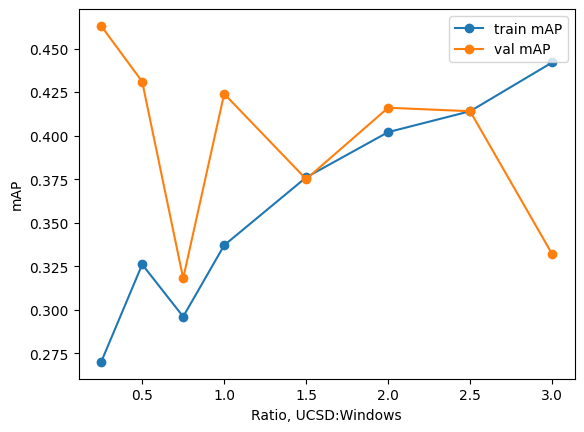

In [9]:
import matplotlib.pyplot as plt 

ratios = [3, 2.5, 2, 1.5, 1, 0.75, 0.5, 0.25]
trn_mAPs = [0.442, 0.414, 0.402, 0.376, 0.337, 0.296, 0.326, 0.270]
val_mAPs = [0.332, 0.414, 0.416, 0.375, 0.424, 0.318, 0.431, 0.463]

plt.plot(ratios, trn_mAPs, 'o-', label='train mAP')
plt.plot(ratios, val_mAPs, 'o-', label='val mAP')

plt.xlabel('Ratio, UCSD:Windows')
plt.ylabel('mAP')
plt.legend()

# Test 9

Train/val/test: Day/Night + Windows

In [ ]:
!pip install ultralytics roboflow matplotlib

import os
from ultralytics import YOLO
from roboflow import Roboflow
import cv2

rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("day-night-windows")
version = project.version(1)
dataset = version.download("yolov5")

In [4]:
model = YOLO("yolov5mu.yaml")
results = model.train(
  data=os.path.join(dataset.location, "data.yaml"),
  epochs=100,
  save=True,
  plots=True
)

model.val(
    data=os.path.join(dataset.location, "data.yaml"),
    conf=0.4,
    iou=0.4,
    plots=True
)

New https://pypi.org/project/ultralytics/8.3.107 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/Day/Night-+-Windows-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fals

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Day/Night-+-Windows-1/train/labels... 239 images, 30 backgrounds, 0 corrupt: 100%|██████████| 239/239 [00:00<00:00, 778.06it/s]

train: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Day/Night-+-Windows-1/train/labels.cache



val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Day/Night-+-Windows-1/valid/labels... 69 images, 0 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:00<00:00, 969.09it/s]

val: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Day/Night-+-Windows-1/valid/labels.cache



This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.29G      5.486      23.64      4.678        147        640: 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         69        540          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.27G      4.625      8.067      4.089        113        640: 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         69        540   4.83e-05    0.00185   2.49e-05   2.49e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.72G      3.916      4.953      3.278        220        640: 100%|██████████| 15/15 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]

                   all         69        540   0.000186    0.00185   9.51e-05   9.51e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.58G      3.579      3.377      2.574        492        640: 100%|██████████| 15/15 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         69        540    0.00104     0.0037   0.000523   5.23e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.54G      3.354      2.984      2.278        143        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all         69        540   0.000118    0.00185   5.94e-05   5.94e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.55G      3.067      2.469      1.999        174        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]

                   all         69        540   0.000179    0.00185   8.96e-05   8.96e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.79G      3.095      2.351      1.838        364        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         69        540     0.0221      0.326     0.0505     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.68G      2.926      2.267      1.743        133        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]

                   all         69        540      0.305      0.206      0.165     0.0514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.92G      2.823      2.026      1.584        448        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         69        540      0.487      0.311      0.344      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.58G      2.692      2.122      1.676        352        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all         69        540      0.516      0.416      0.429      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.64G      2.711       1.99      1.546         75        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]

                   all         69        540      0.513      0.426      0.443       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.09G      2.628      1.906      1.476        181        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]

                   all         69        540       0.46      0.418      0.425      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.83G      2.682      1.924      1.472        274        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         69        540      0.542      0.433      0.479       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.22G      2.483      1.835       1.44        209        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]

                   all         69        540      0.555       0.45      0.489      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.78G      2.579      1.797      1.395        312        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]

                   all         69        540      0.531      0.398      0.423      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.36G      2.507      1.803      1.417        337        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         69        540      0.537      0.452      0.475      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.46G      2.429      1.697      1.336        233        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.70it/s]

                   all         69        540      0.524      0.459      0.485      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.55G      2.379      1.734      1.311        255        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         69        540      0.622      0.467      0.532      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.26G      2.412      1.764      1.353        150        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         69        540       0.54      0.538      0.543      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.71G      2.473      1.782      1.303        291        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         69        540      0.382      0.356      0.316      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.43G      2.421      1.748      1.301        144        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         69        540      0.611      0.475      0.544      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.83G      2.321      1.663      1.336        246        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]

                   all         69        540      0.586      0.484      0.531      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.66G       2.25      1.628       1.29        154        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]

                   all         69        540       0.63      0.504      0.564       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.87G       2.29      1.605      1.291        252        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         69        540      0.624      0.557      0.605      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       6.2G      2.285       1.62      1.272        172        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         69        540      0.676      0.606      0.654      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.59G      2.206      1.541      1.253        255        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         69        540      0.651      0.583      0.634      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.56G      2.222        1.6      1.289        219        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         69        540      0.576      0.569      0.617      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.66G      2.191      1.589      1.286        327        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         69        540      0.633      0.626      0.665      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.41G      2.253      1.609      1.279        216        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         69        540      0.591      0.611       0.65      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.79G      2.215      1.587      1.266        159        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         69        540      0.609      0.592      0.627      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.54G      2.279      1.675      1.267        254        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         69        540       0.64      0.552      0.635      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.57G      2.263      1.572      1.262        204        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         69        540      0.675      0.552      0.615       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.89G      2.242      1.542      1.235        259        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         69        540      0.668      0.613      0.682      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.26G      2.185      1.572      1.265        314        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         69        540      0.645      0.591      0.662      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.83G      2.254       1.64      1.254        239        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         69        540      0.592      0.591       0.64      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.68G      2.175      1.491      1.236        189        640: 100%|██████████| 15/15 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         69        540      0.633      0.635      0.677       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.52G      2.147       1.46      1.186        162        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         69        540      0.664       0.63      0.674      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.51G      2.102      1.481      1.198        175        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         69        540      0.666      0.642      0.702      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.67G      2.098      1.605      1.222        215        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         69        540      0.655      0.583      0.657      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.86G      2.085      1.465        1.2        376        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         69        540      0.656      0.678       0.73      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.33G      2.147      1.491      1.166        186        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         69        540      0.625      0.652       0.68      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       6.4G      2.103      1.518      1.226        214        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         69        540      0.712      0.617      0.689      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.48G      2.082      1.467      1.161        221        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         69        540      0.632      0.585      0.634      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.31G      2.034      1.519       1.21        362        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         69        540      0.663      0.619      0.661      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.81G      2.075       1.52      1.172        141        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         69        540      0.698      0.589      0.671      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       6.6G       2.08      1.483      1.196        324        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         69        540      0.659      0.676      0.715      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.51G       2.07      1.438      1.176        142        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all         69        540      0.692      0.631      0.713      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.52G      2.082      1.422      1.183        176        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         69        540       0.67      0.628      0.706       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.87G      2.058      1.417       1.18        210        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         69        540      0.625      0.569      0.631      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.92G      1.964      1.378      1.151        117        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         69        540      0.703      0.639      0.727        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.48G      2.005       1.39      1.146        244        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         69        540      0.711      0.646      0.716      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.94G      2.066      1.455      1.185        200        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         69        540      0.738      0.589      0.704      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       6.6G      1.996      1.414       1.18        196        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         69        540      0.732      0.658      0.758       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.46G       2.02      1.362      1.172        148        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         69        540      0.775      0.593      0.735      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.97G      2.059      1.358      1.162        267        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         69        540      0.665      0.631      0.709      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.65G      1.949      1.379      1.177        162        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]

                   all         69        540      0.681      0.706      0.755      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.71G      2.055      1.441      1.194        226        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         69        540      0.686      0.598      0.691      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.49G      1.992      1.398      1.188        226        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         69        540      0.675      0.692      0.738      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.61G      1.965      1.441        1.2        128        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         69        540      0.738      0.633      0.741       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.57G      1.929      1.357      1.155        170        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         69        540      0.763       0.65      0.756      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       6.3G      1.868      1.336      1.179        288        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]

                   all         69        540      0.794      0.669      0.773      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.64G      2.009      1.391      1.143        304        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         69        540       0.72      0.673      0.748      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.53G      1.897      1.349      1.164        202        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         69        540      0.678      0.639      0.697      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.33G      1.896      1.318      1.159        150        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         69        540      0.678      0.619      0.696      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.56G       1.91      1.349       1.12        249        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]

                   all         69        540      0.724      0.672      0.747      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.22G      1.837      1.292      1.141        127        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         69        540      0.717      0.693      0.764      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.26G      1.943      1.356      1.118        241        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         69        540      0.713      0.665      0.751      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.53G      1.952      1.349      1.156        229        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         69        540      0.742      0.711      0.788      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.76G      1.962      1.385      1.162        395        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]

                   all         69        540      0.753      0.676      0.771      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.31G      1.894      1.304      1.109        196        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         69        540      0.725      0.649      0.746      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.24G      1.793      1.268      1.123        244        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         69        540      0.761      0.674       0.78      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.28G      1.845      1.274      1.126        172        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         69        540      0.781      0.646      0.773      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       6.5G      1.861      1.277      1.109        238        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         69        540      0.761      0.672      0.777      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.93G       1.83      1.317      1.144        259        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         69        540      0.717       0.67       0.76      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.51G      1.948      1.348      1.141        175        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         69        540      0.732      0.717      0.781      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.61G      1.864      1.242      1.105        203        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         69        540      0.734      0.691      0.768      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.55G      1.878      1.328      1.096        298        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         69        540      0.757      0.675      0.781       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.43G      1.823      1.233      1.098        208        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         69        540      0.766      0.728      0.801      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.82G      1.885      1.234      1.096        119        640: 100%|██████████| 15/15 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         69        540      0.731      0.733      0.791      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.82G      1.776      1.209      1.091        286        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         69        540      0.769      0.686      0.783      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.58G       1.77      1.211      1.088        357        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         69        540      0.772      0.696       0.79      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.75G      1.777      1.164      1.088        205        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]

                   all         69        540       0.77      0.719      0.798      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.48G      1.894      1.276      1.116        177        640: 100%|██████████| 15/15 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         69        540      0.799      0.696      0.797      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.94G      1.765      1.153       1.09        161        640: 100%|██████████| 15/15 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         69        540      0.767      0.694      0.783      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.26G       1.72      1.226      1.109        275        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         69        540       0.77       0.72      0.795      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.27G      1.748      1.197      1.091        278        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         69        540      0.772      0.702      0.799      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.85G      1.807      1.163      1.093        183        640: 100%|██████████| 15/15 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         69        540      0.751      0.738      0.811       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.28G       1.76      1.185      1.115        201        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         69        540      0.764      0.715      0.803      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       6.5G      1.806      1.217      1.098        249        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         69        540      0.751      0.719      0.801      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.38G      1.783      1.179      1.083        234        640: 100%|██████████| 15/15 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         69        540      0.756      0.701      0.788      0.468


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.86G      1.746      1.176      1.097        262        640: 100%|██████████| 15/15 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]

                   all         69        540      0.792      0.681       0.79       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.71G      1.769      1.212      1.122        163        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         69        540      0.763      0.696      0.792      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.46G      1.766      1.175      1.097        107        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         69        540      0.778      0.707        0.8       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.59G      1.738      1.141      1.096        217        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         69        540      0.785      0.687      0.785      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.82G      1.751      1.159      1.103        164        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         69        540      0.767      0.717        0.8       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.54G      1.689      1.115      1.081        259        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         69        540      0.759      0.719      0.803      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.82G      1.705      1.126        1.1        151        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         69        540      0.748      0.717      0.795       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.61G      1.683      1.112       1.09        110        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         69        540      0.752      0.715      0.799      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.79G      1.707      1.124      1.091        228        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         69        540      0.775      0.702      0.806      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.92G      1.715      1.128      1.086         58        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         69        540       0.78      0.719      0.807      0.482



100 epochs completed in 0.154 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 50.5MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]


                   all         69        540      0.776      0.702      0.807      0.484
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train11
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Day/Night-+-Windows-1/valid/labels.cache... 69 images, 0 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


                   all         69        540      0.879      0.644      0.779      0.525
Speed: 5.8ms preprocess, 33.1ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train112


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x72ed18352d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
results = model(
    source=os.path.join(dataset.location, 'test/images'),
    iou=0.4,
    save=True
)
for result in results:
    result.save()

# Test 10

Train/val/test: Windows

In [ ]:
!pip install ultralytics roboflow matplotlib

import os
from ultralytics import YOLO
from roboflow import Roboflow
import cv2

rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("windows-1shta")
version = project.version(1)
dataset = version.download("yolov5")

In [2]:
model = YOLO("yolov5mu.yaml")
results = model.train(
  data=os.path.join(dataset.location, "data.yaml"),
  epochs=500,
  save=True,
  plots=True
)

model.val(
    data=os.path.join(dataset.location, "data.yaml"),
    plots=True
)

New https://pypi.org/project/ultralytics/8.3.113 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/Windows-1/data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=Non

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Windows-1/train/labels... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<00:00, 633.55it/s]

train: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Windows-1/train/labels.cache



val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Windows-1/valid/labels... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<00:00, 819.66it/s]

val: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Windows-1/valid/labels.cache



This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      6.01G      4.888      7.538       4.81         28        640: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]

                   all        102        798   3.27e-05    0.00125   1.65e-05   1.65e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      6.14G       5.06      9.118      4.674         48        640: 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      6.29G      5.224      6.076      4.466         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all        102        798          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500       6.3G      4.462      4.454      4.087         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all        102        798   3.27e-05    0.00125   1.68e-05   1.68e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      6.39G      3.797      3.672      3.979         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]

                   all        102        798   3.27e-05    0.00125   1.68e-05   1.68e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      6.31G      3.573      3.059      3.623         76        640: 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all        102        798   3.27e-05    0.00125   1.68e-05   1.68e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500       6.4G      3.296      2.963      3.423         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all        102        798   3.27e-05    0.00125   1.68e-05   1.68e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      6.31G      3.342      2.958      2.956         55        640: 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        102        798   3.27e-05    0.00125   1.78e-05   1.78e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      6.31G      3.071      2.613      2.929         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        102        798   7.37e-05    0.00125   3.83e-05   3.83e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      6.24G       2.98      2.461      2.701         64        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        102        798   0.000155    0.00251   7.82e-05   7.82e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      6.31G       2.75      2.281      2.494         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        102        798   0.000194    0.00251   9.75e-05   9.75e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      6.38G      2.558      2.161      2.324         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        102        798    0.00022    0.00251   0.000111   1.11e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      6.31G      2.851      1.924      2.195         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        102        798   0.000263    0.00251   0.000132   1.32e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500       6.3G      2.418       1.87      2.301         65        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        102        798   0.000235    0.00251   0.000118   1.18e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      6.34G      2.554      1.922       2.05         56        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        102        798   0.000314    0.00125   0.000159   1.59e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500       6.2G      2.375      1.904      2.124         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        102        798   0.000132    0.00125    6.6e-05    6.6e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      6.32G      2.355      1.674      1.939         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        102        798   0.000178    0.00125   8.99e-05   8.99e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      6.26G       2.19      1.628      1.816         60        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        102        798   0.000343    0.00125   0.000172   1.72e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      6.38G      2.281      1.608       1.84        114        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all        102        798          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      6.34G       2.23      1.583      1.818         85        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        102        798          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      6.31G      2.125      1.581      1.772         56        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        102        798      0.571     0.0163     0.0185    0.00574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      6.41G      2.158      1.488      1.658         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        102        798      0.727     0.0933      0.126     0.0452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      6.29G       2.24      1.533      1.713         72        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        102        798       0.56      0.135       0.16     0.0488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      6.39G      2.081      1.467      1.548         73        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        102        798      0.663      0.143       0.19     0.0676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500       6.3G      2.136      1.422      1.584         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        102        798      0.662      0.292      0.327      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      6.39G      2.176      1.646      1.789         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        102        798      0.634      0.385      0.412      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      6.26G      2.093      1.435      1.591         70        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]

                   all        102        798      0.544       0.43      0.399       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      6.38G      1.951      1.438      1.625         71        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        102        798      0.577      0.495      0.429        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      6.26G      1.998       1.43      1.566         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.568      0.476      0.417      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      6.41G      1.856      1.354      1.489         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]

                   all        102        798      0.595       0.46      0.431      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      6.37G      1.928      1.343       1.51         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all        102        798      0.597      0.445      0.462      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      6.38G      1.983      1.628      1.662         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all        102        798      0.617      0.525      0.556      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      6.14G      1.899      1.359      1.476         56        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.638      0.545      0.582      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      6.34G      1.848      1.323       1.43         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        102        798      0.691       0.55      0.615        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      6.39G      1.899      1.424      1.535         31        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.659      0.573      0.618      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      6.36G      1.723      1.222      1.373         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.711      0.539      0.632      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      6.29G       1.95      1.376      1.477         55        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        102        798      0.698      0.538      0.631      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500       6.4G      1.744      1.214      1.376         81        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        102        798      0.637       0.57      0.621      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      6.39G      1.816      1.306       1.49         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798      0.613      0.561        0.6      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500       6.4G      1.838       1.32      1.532         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.661      0.627       0.67      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      6.21G      1.874      1.303       1.44         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.654      0.578       0.62      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      6.35G      1.851      1.276      1.423         75        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798      0.681       0.59      0.647      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      6.37G      1.853      1.289      1.484         55        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.657       0.63      0.673      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      6.39G      1.896      1.236      1.359         72        640: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        102        798      0.714      0.566      0.657      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      6.31G      1.782      1.258      1.405         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        102        798      0.682      0.607      0.663      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      6.39G      1.689      1.254      1.357         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798      0.664      0.619      0.646      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      6.38G      1.855       1.24      1.349         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.629      0.581      0.539      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      6.35G      1.858      1.202      1.446         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        102        798      0.678      0.561      0.629      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500       6.3G      1.882      1.231      1.406         81        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        102        798      0.694      0.589      0.636      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      6.38G      1.772      1.143      1.347         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798      0.651      0.612      0.641      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      6.37G      1.706      1.137      1.339         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        102        798      0.647      0.588      0.641      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      6.36G      1.764      1.214      1.346         86        640: 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798      0.695      0.636      0.703      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      6.21G       1.71      1.221      1.353         60        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.704      0.624      0.691      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      6.28G      1.813      1.269      1.396         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.717      0.622      0.709       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      6.37G      1.802      1.182      1.322         76        640: 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798      0.728       0.63      0.714      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      6.38G       1.69      1.173        1.3         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.721      0.574      0.674      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      6.22G      1.741       1.28      1.353         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.728      0.655      0.717      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      6.41G      1.781      1.233      1.378         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        102        798      0.686      0.658      0.694      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      6.34G      1.672      1.188      1.309         85        640: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798      0.648      0.667       0.66      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      6.25G       1.64      1.124      1.262         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.695      0.664      0.704      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      6.23G       1.75      1.217      1.313         26        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        102        798      0.673      0.671      0.721       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500       6.4G      1.672      1.158      1.247         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        102        798      0.689      0.623      0.705      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      6.36G      1.716      1.141      1.343         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all        102        798      0.648      0.657      0.693      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      6.36G      1.826      1.134      1.296         99        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        102        798      0.775      0.567      0.689      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500       6.3G      1.714      1.165      1.298         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all        102        798       0.71      0.609      0.698      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      6.35G      1.602      1.064      1.256         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        102        798       0.71      0.678      0.716       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      6.37G      1.541      1.077      1.241         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        102        798      0.735      0.679      0.741      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      6.33G      1.581      1.084       1.26         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        102        798      0.757      0.658       0.73      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      6.26G      1.665      1.076      1.241        106        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        102        798       0.72      0.688      0.738      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      6.41G      1.711       1.14      1.288        110        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        102        798       0.74      0.662       0.74      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      6.33G      1.568       1.07      1.249         50        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798      0.748      0.626      0.734      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500       6.4G      1.647      1.088      1.249         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.742      0.689      0.758      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500       6.3G      1.546      1.027      1.207         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]

                   all        102        798      0.746       0.61      0.722      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      6.37G      1.573      1.036      1.241         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.752      0.614      0.716      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      6.39G      1.653      1.055      1.254         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        102        798      0.723      0.676      0.756      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      6.39G      1.596      1.062      1.237         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        102        798      0.724      0.654      0.724      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      6.32G      1.477       1.04      1.288         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.711      0.622      0.688      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      6.42G      1.488      1.005      1.231         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.718      0.654      0.722      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      6.29G      1.547      1.057      1.254         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798       0.73      0.649      0.741      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      6.34G      1.545      1.069      1.241         63        640: 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all        102        798      0.742      0.648      0.735        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500       6.3G      1.629      1.072       1.23         81        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.739      0.682      0.759      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      6.36G      1.586      1.032      1.262         52        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all        102        798      0.725      0.652      0.725      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      6.34G      1.576      1.064      1.268         50        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        102        798       0.64      0.665      0.662      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      6.34G      1.571      1.099      1.279         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.695      0.611      0.648      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      6.26G      1.566      1.018      1.187         84        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        102        798      0.742      0.678      0.743      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500       6.4G       1.51      1.008      1.208         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        102        798       0.72      0.655      0.745      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      6.37G      1.629      1.106      1.211         63        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all        102        798      0.717      0.615      0.724      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      6.31G      1.534      1.115      1.287         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798       0.73      0.658      0.731      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500       6.3G      1.617      1.092      1.245         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798      0.717      0.685      0.742      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500       6.4G      1.467     0.9915      1.204         78        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.738      0.667      0.744       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      6.37G      1.534      1.041      1.227         50        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.737      0.708      0.759      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      6.37G      1.512     0.9573      1.153         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798      0.748      0.711      0.778      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      6.31G      1.572      1.051      1.257         80        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        102        798      0.786      0.688      0.785      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      6.42G      1.472      1.071       1.22         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all        102        798      0.803      0.672      0.783       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      6.39G       1.47     0.9497      1.174         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        102        798      0.742      0.702      0.762      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500       6.3G      1.456     0.9279      1.171         66        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798      0.781      0.681      0.781      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      6.32G      1.426     0.9141       1.15         66        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        102        798      0.725      0.669      0.748      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      6.42G      1.512     0.9448      1.198         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.737      0.632      0.732      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      6.28G      1.509      1.011       1.22         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.719      0.652      0.738      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      6.38G      1.509     0.9687      1.201         50        640: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798       0.78      0.693       0.77      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500       6.3G      1.483     0.9589      1.205         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.791      0.701      0.779      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500       6.4G      1.558      1.003      1.227         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        102        798      0.759      0.702      0.775      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      6.31G      1.516      1.103      1.262         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all        102        798      0.766      0.664      0.755      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      6.38G      1.615      1.148      1.309         22        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all        102        798      0.735      0.633      0.722      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      6.31G      1.486     0.9859      1.156         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.779      0.647      0.755      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500       6.3G      1.437      0.939      1.185         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.778      0.674       0.78      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      6.28G      1.457     0.9185      1.128         78        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        102        798      0.764      0.718      0.779      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      6.28G      1.401     0.9264       1.17         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.771      0.674      0.768      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      6.31G      1.508     0.9537      1.199         70        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.757      0.685      0.769      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      6.36G      1.439     0.9985      1.197         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798      0.745      0.696      0.777      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500       6.3G      1.403     0.9378      1.201         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        102        798      0.751      0.668      0.761      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      6.36G      1.496      1.064      1.248         26        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        102        798      0.749      0.704       0.78      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      6.29G      1.535     0.9674      1.204         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all        102        798      0.774      0.695      0.799      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      6.39G      1.473     0.9144      1.212         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.803      0.657      0.786      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      6.36G      1.563      1.004      1.208         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        102        798      0.738      0.713      0.781      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      6.37G      1.416       0.87      1.112         60        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798      0.763      0.706      0.793      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      6.26G      1.415     0.9604      1.138         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        102        798      0.738      0.701      0.778      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      6.41G       1.47     0.9483       1.19         50        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.763      0.699      0.783      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      6.37G      1.476     0.9303      1.173         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]

                   all        102        798      0.761      0.677      0.765      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      6.34G      1.503      0.988       1.24         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all        102        798      0.698       0.69      0.745      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      6.31G      1.507     0.9101      1.159         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all        102        798      0.735      0.686      0.753      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      6.39G      1.498     0.9595      1.184         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all        102        798      0.717      0.727      0.783      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      6.34G      1.466     0.9186      1.198         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.741      0.693       0.78      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      6.37G      1.499     0.9798      1.179         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798      0.777      0.603      0.726      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      6.31G      1.473     0.9234      1.187         62        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798      0.794      0.617      0.739      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      6.41G      1.469     0.9271       1.19         84        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        102        798      0.734      0.692      0.765      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      6.39G       1.45     0.9517      1.142        102        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.738      0.723      0.785      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      6.27G      1.402     0.8871       1.12         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798      0.776      0.698      0.794      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500       6.3G      1.479     0.8913      1.139         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        102        798      0.734      0.711      0.773      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      6.36G      1.525     0.9379      1.145         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all        102        798      0.771      0.725      0.792       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      6.33G      1.497     0.9503      1.173         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.761      0.743      0.797      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      6.39G      1.525       1.02      1.163         83        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        102        798      0.772      0.706      0.784      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      6.22G      1.397     0.9023      1.179         71        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all        102        798      0.769      0.724      0.789      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      6.42G      1.444      0.885       1.15         97        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        102        798       0.79      0.701      0.784      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      6.34G      1.305     0.8634      1.155         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798      0.798      0.718      0.801      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      6.38G      1.347     0.8531      1.118         91        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.754      0.725      0.792      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      6.32G      1.407     0.8375      1.151         50        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]

                   all        102        798      0.741      0.751      0.795      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      6.39G      1.429     0.8754       1.13         78        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        102        798      0.728      0.749       0.79      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500       6.3G      1.495     0.9236        1.2         72        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.747      0.742      0.796      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      6.36G      1.457     0.9127      1.181         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.734      0.721      0.778      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      6.32G      1.455     0.9102      1.152         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.774      0.702      0.794      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      6.38G      1.375     0.8807      1.151         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798      0.773      0.728      0.792      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      6.38G      1.433     0.8968       1.13         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798      0.778      0.703      0.778      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      6.22G      1.427     0.8891      1.177         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        102        798      0.787      0.699      0.762      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      6.31G      1.483     0.9043      1.164         69        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all        102        798      0.779      0.701      0.768      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      6.41G      1.432     0.8972      1.152         83        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all        102        798      0.793      0.702      0.799      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      6.41G      1.444     0.8647      1.154         74        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798      0.788      0.713      0.807      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      6.38G       1.37     0.8939      1.134         63        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798      0.798      0.709      0.796      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      6.32G      1.459     0.8651       1.21         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        102        798      0.756      0.703      0.764      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      6.39G      1.362     0.8632      1.147         75        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        102        798      0.649      0.666      0.671      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      6.25G      1.429     0.9184      1.199         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all        102        798      0.785      0.625      0.728      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500       6.3G      1.393     0.9346      1.196         27        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        102        798      0.759      0.728      0.798      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500       6.2G      1.366     0.8487      1.094         85        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        102        798      0.761      0.724      0.798      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      6.42G      1.316     0.8492      1.104         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all        102        798      0.697      0.682       0.72      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      6.38G      1.335      0.859      1.125         92        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all        102        798      0.697      0.689      0.717       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      6.33G      1.353     0.8261      1.159         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798      0.768      0.688      0.772       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500       6.3G      1.375     0.8359      1.105         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798      0.772      0.693      0.786      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      6.37G      1.288     0.8358      1.075         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798      0.803        0.7      0.804      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500       6.4G      1.315     0.8186       1.13         56        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.778       0.73      0.808      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      6.26G      1.303     0.8694      1.151         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        102        798      0.788      0.732      0.806      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      6.29G      1.274     0.8066      1.108         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all        102        798      0.807      0.712      0.795      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      6.36G      1.323     0.8945       1.14         78        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        102        798      0.789      0.721      0.778      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500       6.3G      1.344     0.8447      1.155         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all        102        798      0.815      0.734      0.801      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      6.37G      1.318     0.8093      1.132         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.778      0.768      0.821      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      6.26G      1.415     0.8759      1.164         71        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        102        798      0.782      0.712      0.807      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      6.35G      1.236     0.8289      1.072         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.753      0.716      0.801      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      6.38G      1.352     0.8258      1.112         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.749      0.717      0.788       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      6.34G      1.353     0.8435      1.128         65        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.772      0.664      0.759       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      6.31G      1.346      0.799      1.088         60        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.791      0.649      0.766      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      6.39G      1.381     0.8122      1.087         83        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.753       0.65      0.751      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      6.34G      1.318     0.8033      1.118         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798       0.75      0.708      0.783      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      6.38G      1.308     0.8142      1.161         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all        102        798      0.762      0.721      0.781       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      6.29G       1.39     0.8142      1.138         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        102        798      0.769      0.731        0.8      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      6.31G      1.303     0.8116       1.11         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798       0.76      0.706      0.786      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      6.38G      1.277     0.8037      1.061         52        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all        102        798      0.739      0.662      0.742      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      6.37G      1.264     0.7666      1.094         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all        102        798      0.812      0.685      0.785      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500       6.3G      1.321      0.832       1.11         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all        102        798      0.788      0.678      0.783      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500       6.4G      1.369     0.8586      1.128         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all        102        798      0.785      0.679      0.776      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      6.28G      1.332     0.8311      1.169         74        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        102        798      0.787      0.707      0.791      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      6.37G      1.285     0.9001      1.119         14        640: 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.764      0.739      0.802      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      6.18G      1.299     0.8134      1.076         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798      0.758      0.754      0.807      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      6.29G      1.246     0.8278      1.131         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        102        798      0.758       0.73      0.793      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      6.38G       1.25     0.7696       1.06         66        640: 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        102        798      0.753      0.714      0.785      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      6.28G      1.275     0.7971      1.108         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        102        798      0.802      0.686      0.786      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      6.29G      1.299     0.8002      1.082         79        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all        102        798      0.775        0.7      0.789      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      6.39G      1.282     0.8393      1.137         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        102        798      0.754      0.729      0.798      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      6.38G       1.28     0.8053      1.076         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.764      0.743      0.806       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      6.39G       1.25     0.7898      1.039         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.783      0.714      0.796      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      6.26G      1.281     0.7946      1.082         68        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        102        798      0.734      0.768      0.798      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500       6.4G       1.24     0.7842      1.081         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        102        798      0.772      0.724        0.8      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      6.36G      1.239     0.8181      1.101         73        640: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.791      0.727        0.8      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      6.34G       1.37     0.8397      1.124         69        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        102        798      0.776      0.708      0.772      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      6.26G      1.229     0.7903      1.088         52        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        102        798      0.798      0.721      0.796      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      6.28G      1.198     0.7417      1.067         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

                   all        102        798      0.791      0.742      0.814      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      6.29G      1.213     0.7742      1.087         79        640: 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        102        798      0.773      0.736      0.812      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      6.37G      1.278     0.8176      1.105         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798      0.824      0.687      0.802       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      6.21G       1.32     0.8275       1.13         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all        102        798       0.79      0.682      0.781      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      6.42G      1.208     0.7907      1.069         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.766      0.712       0.78      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      6.34G      1.344     0.7996      1.127         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.778      0.742      0.793      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      6.33G       1.33     0.8275      1.136         82        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        102        798      0.807      0.742      0.818      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500       6.2G      1.301     0.8558      1.126         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all        102        798      0.826      0.724      0.818      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      6.36G      1.314      0.803      1.098        105        640: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all        102        798       0.83      0.707      0.811      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      6.27G      1.321     0.8269      1.143         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.835      0.702      0.804      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      6.38G      1.203      0.759      1.087         21        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.782      0.725      0.797      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      6.31G      1.171     0.6848      1.067         50        640: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798      0.768       0.72      0.797      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500       6.4G      1.201     0.7671      1.097         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798      0.793      0.718      0.805      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      6.38G      1.202     0.7507      1.099         67        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        102        798       0.79      0.724      0.804      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      6.29G       1.18     0.7273      1.056         85        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.781      0.677      0.782      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      6.26G      1.196     0.7445       1.07         49        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.805      0.697      0.791      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      6.29G       1.31     0.7939      1.117         78        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        102        798      0.778      0.728      0.798      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      6.37G      1.305     0.8016      1.136         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        102        798      0.769      0.736      0.802      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      6.37G      1.195     0.7208       1.06         77        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798       0.79      0.715      0.811      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      6.32G       1.18     0.7419      1.074         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798       0.77      0.778      0.825      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      6.39G      1.228     0.7604      1.127         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all        102        798      0.765      0.784      0.824      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500       6.3G      1.301      0.786      1.089         56        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.781      0.767      0.826      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      6.28G      1.234      0.746      1.074         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all        102        798      0.761      0.746      0.821      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      6.26G      1.342     0.8196      1.124         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

                   all        102        798      0.776      0.735      0.816      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500       6.4G      1.301     0.7961      1.079         83        640: 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all        102        798      0.771      0.721      0.797      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      6.25G      1.208     0.7981      1.102         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        102        798      0.761      0.719      0.779      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      6.38G       1.18     0.7568      1.106         18        640: 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        102        798      0.775      0.709      0.778       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      6.29G      1.207     0.7619      1.079         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        102        798      0.786      0.741        0.8      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      6.38G      1.239     0.7712      1.156         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        102        798      0.832      0.756      0.826      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      6.39G       1.24     0.7313      1.089         52        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all        102        798      0.777      0.791      0.833      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500       6.4G      1.219     0.7552      1.101         58        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all        102        798      0.819      0.708      0.813      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500       6.3G      1.239     0.7353      1.061         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all        102        798       0.79      0.724      0.811      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500       6.4G      1.207     0.7252      1.044         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        102        798      0.818      0.698      0.813      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      6.38G      1.218     0.7273      1.094         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all        102        798       0.79      0.726       0.81      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      6.27G      1.255     0.7355       1.07         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798      0.757      0.742      0.804      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      6.14G      1.191     0.7425      1.036         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798      0.781      0.754      0.809      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500       6.4G      1.224      0.738      1.097         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all        102        798      0.782      0.753      0.811       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500       6.4G      1.212     0.7052      1.064         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.792      0.761      0.819      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      6.34G      1.222     0.7264      1.045         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all        102        798      0.811      0.712      0.801      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500       6.2G      1.241     0.8189      1.076         31        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.778      0.734      0.801      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500       6.4G      1.191     0.7231      1.061         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        102        798      0.774      0.753      0.805      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      6.33G      1.178      0.695      1.035         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        102        798      0.794      0.742      0.817      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      6.37G      1.252     0.7443      1.059         96        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        102        798        0.8      0.744      0.826      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      6.31G      1.112     0.6967      1.045         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        102        798      0.815      0.752      0.833      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      6.33G      1.208     0.7075      1.065         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        102        798      0.818      0.747      0.831      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      6.29G      1.176     0.7279      1.067         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        102        798      0.831      0.727      0.831      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      6.34G      1.152     0.6876      1.072         55        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        102        798      0.809      0.732      0.818       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      6.29G      1.199     0.7326      1.048         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        102        798      0.819      0.749      0.833      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      6.36G      1.148     0.6839      1.043         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798      0.823      0.743      0.831      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      6.33G      1.144     0.7138      1.018         45        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        102        798       0.84      0.726      0.826      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      6.37G       1.15     0.7151      1.073         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798      0.817      0.726      0.808      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      6.26G       1.23     0.7528      1.078         60        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.834      0.722      0.814      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      6.37G      1.193     0.6977      1.029         85        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798      0.822      0.742      0.818      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      6.25G      1.168      0.685      1.045         87        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798      0.778      0.761      0.814      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      6.37G      1.121     0.6734     0.9998         66        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all        102        798      0.803      0.757      0.815      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      6.29G      1.189     0.7687      1.051         66        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all        102        798      0.788      0.743      0.811      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      6.29G      1.176     0.7178       1.08         72        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        102        798      0.796      0.758      0.823       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      6.37G      1.172      0.703      1.054         86        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        102        798      0.794      0.751      0.816      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      6.34G      1.145     0.7145       1.07         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        102        798       0.77      0.783      0.827      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      6.29G      1.196     0.7255      1.058         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all        102        798      0.817      0.731      0.831      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      6.41G      1.199     0.7003      1.082         64        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all        102        798      0.775      0.759      0.822      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      6.32G      1.155     0.7456      1.081         33        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.761      0.758      0.805      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      6.38G      1.114     0.6967      1.033         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        102        798      0.811      0.746      0.833      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      6.26G      1.175     0.7146      1.049         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all        102        798      0.782      0.786       0.83      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      6.32G      1.182     0.7069      1.051         57        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        102        798      0.772      0.777      0.815      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      6.37G      1.251     0.7346      1.097         28        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.786      0.762      0.819      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      6.39G      1.084     0.6739      1.087         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798      0.808      0.743      0.828       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      6.21G      1.264     0.8288      1.166         24        640: 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        102        798      0.804      0.753      0.821      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      6.33G      1.124     0.6554      1.037         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798       0.78      0.748      0.814      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      6.39G      1.185     0.7396      1.101         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798      0.759      0.759      0.815      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      6.28G       1.17     0.6865      1.062         56        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]

                   all        102        798      0.795      0.749       0.82      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      6.24G      1.112     0.6514      1.041         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        102        798      0.758      0.769      0.808      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      6.36G      1.041     0.6323      1.024         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        102        798      0.772      0.734      0.803      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      6.34G      1.139     0.6927      1.055         74        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]

                   all        102        798      0.788      0.729      0.804      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      6.39G      1.186     0.7087      1.036         62        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all        102        798      0.802      0.709      0.801      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      6.31G      1.125     0.6769      1.007         36        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        102        798      0.799      0.732      0.814      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      6.27G      1.094     0.6592     0.9995         65        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        102        798      0.814      0.751      0.829      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      6.37G      1.167     0.6913      1.069         69        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        102        798      0.819      0.756      0.831      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      6.33G      1.139     0.6937       1.08         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        102        798      0.788      0.782      0.828      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      6.21G      1.109      0.705      1.059         14        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        102        798      0.795      0.761      0.823       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      6.29G      1.159     0.7395      1.083         60        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]

                   all        102        798      0.811      0.774      0.835      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      6.41G      1.159     0.6862      1.034         61        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        102        798      0.805      0.761      0.829        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      6.28G      1.167     0.6963      1.064        105        640: 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        102        798      0.817      0.752      0.833      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      6.32G       1.06     0.6677      1.054         40        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all        102        798      0.798      0.745      0.822      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500       6.3G      1.209      0.723      1.043         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        102        798      0.795      0.736      0.813      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      6.33G      1.128     0.6595      1.037         71        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        102        798      0.789      0.739      0.811      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      6.36G      1.089     0.5987     0.9935         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798      0.805      0.719      0.804      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      6.18G      1.093     0.6381      1.009         67        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all        102        798      0.819      0.704      0.803      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500       6.3G      1.156     0.6828      1.082         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        102        798      0.812      0.743      0.811      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      6.34G      1.076     0.6427      1.017         85        640: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.798      0.761      0.818      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      6.37G      1.103     0.6525       1.04         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        102        798      0.807      0.773       0.83      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      6.21G      1.136     0.6448      1.029         60        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all        102        798      0.813      0.773      0.827      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      6.33G       1.16     0.6542      1.113         39        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        102        798      0.811      0.756      0.822      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      6.39G      1.066     0.6251      1.006         67        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        102        798      0.793      0.769      0.819      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500       6.3G      1.079     0.6249      1.024         56        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        102        798      0.793      0.755       0.81      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500       6.3G      1.119     0.6537      1.036         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all        102        798      0.832      0.707      0.807      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      6.31G      1.067     0.6352      1.015         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        102        798      0.807      0.731      0.814      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      6.29G      1.069     0.6446      1.003         64        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        102        798       0.79      0.742      0.813      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      6.28G       1.06     0.6392     0.9961         68        640: 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        102        798       0.81      0.761      0.826      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      6.26G      1.039     0.6639      1.052         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798      0.823      0.762      0.829      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      6.41G      1.054     0.6541      1.021         63        640: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        102        798      0.831      0.766      0.836      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      6.28G      1.141     0.6866      1.047         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.825      0.753       0.83      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      6.37G      1.083     0.6557      1.035         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all        102        798      0.819      0.735      0.817      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      6.15G      1.099     0.6535      1.028         65        640: 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

                   all        102        798       0.78      0.763      0.818      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500       6.4G      1.134     0.6635       1.05         65        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        102        798      0.794      0.763      0.819      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      6.37G      1.067     0.6167      1.016         84        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]

                   all        102        798      0.787      0.772      0.819      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      6.34G        1.1     0.6825      1.012         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798      0.795      0.755      0.817      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500       6.3G      1.105     0.6638      1.024         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        102        798      0.795      0.757      0.816      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      6.37G      1.103      0.672      1.066         27        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        102        798        0.8      0.729      0.809      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      6.37G      1.134     0.6843      1.045         48        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        102        798      0.784      0.727      0.808      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      6.33G      1.121     0.6768      1.056         84        640: 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        102        798      0.825      0.695        0.8      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      6.21G      1.063     0.6224     0.9998         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all        102        798      0.822      0.694      0.807       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500       6.4G      1.054     0.5915      1.016         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        102        798      0.768      0.757      0.814      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      6.38G      1.125     0.6669      1.047         53        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        102        798      0.786      0.751      0.813      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      6.37G       1.11     0.6722     0.9869         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        102        798      0.773      0.755      0.812      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      6.25G      1.119      0.699      1.061         59        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        102        798      0.794      0.741       0.81      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      6.39G      1.072     0.6486       1.03         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798      0.809      0.727      0.808      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      6.34G       1.15     0.6922      1.045         47        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        102        798       0.81      0.736      0.809      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500       6.4G      1.123     0.6783     0.9935         41        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all        102        798      0.798      0.747      0.823      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      6.21G      1.088     0.6345     0.9774         72        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all        102        798      0.802      0.748       0.82      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500       6.4G      1.122      0.636      1.014         78        640: 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all        102        798      0.805      0.732      0.812      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      6.29G      1.079     0.6392      1.018         38        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        102        798      0.817      0.711      0.808      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      6.38G      1.063     0.6403      1.022         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        102        798      0.804      0.726       0.81      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      6.26G      1.039     0.6399      1.033         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.817      0.726      0.807      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      6.42G      1.095     0.6359      1.019         31        640: 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798      0.831       0.72      0.808      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      6.39G      1.063      0.623       1.02         86        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all        102        798      0.797      0.754       0.81      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      6.27G      1.019      0.617     0.9865         54        640: 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        102        798      0.831      0.758      0.836      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      6.29G       1.02     0.6202      1.016         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        102        798      0.794      0.782      0.835      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      6.28G      1.077     0.6138      1.045         60        640: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        102        798      0.799      0.777      0.834      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      6.29G      1.046     0.6428       1.04         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        102        798      0.801      0.771       0.83      0.503
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 223, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



323 epochs completed in 0.277 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 50.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


                   all        102        798      0.777      0.791      0.833      0.514
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 24.2ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Windows-1/valid/labels.cache... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


                   all        102        798      0.777      0.794      0.836      0.514
Speed: 4.2ms preprocess, 15.5ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x73ca14705110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Test 11

Train/val/test: Day/Night + Windows

In [2]:
!pip install ultralytics roboflow matplotlib

import os
from ultralytics import YOLO
from roboflow import Roboflow
import cv2

rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("public2-avtnz")
version = project.version(5)
dataset = version.download("yolov5")

model = YOLO('yolov5mu.yaml')
model.train(
  data=os.path.join(dataset.location, "data.yaml"),
  epochs=250,
  save=True,
  plots=True
)

model.val(
    data=os.path.join(dataset.location, "data.yaml"),
    plots=True
)

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...
New https://pypi.org/project/ultralytics/8.3.119 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=/work/pi_jtaneja_umass_edu/ecpham_umass_edu/Public2-5/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=Fals

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Public2-5/train/labels... 119 images, 28 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<00:00, 659.20it/s]


train: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Public2-5/train/labels.cache


This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Public2-5/valid/labels... 33 images, 7 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 1450.02it/s]

val: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Public2-5/valid/labels.cache



This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      5.86G      4.036      71.53      2.758        306        640: 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.24G      5.238        103      3.833         58        640: 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      6.63G      5.302      30.86      3.762         96        640: 100%|██████████| 8/8 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.66G      5.225      32.29      3.174        136        640: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.51G      4.962      11.98      3.585        311        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      6.27G      4.765      9.668      2.911        155        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.33G      4.314      7.347      2.672        261        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      6.53G      4.675      6.388      2.228        131        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.55G      4.017      4.346      2.071        123        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.38G       4.19      3.942      2.008        218        640: 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      6.61G      4.016      3.385      1.747        239        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      6.18G      3.968      3.509      1.695        143        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         33        488          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      6.67G      3.877      3.086      1.676        135        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all         33        488      0.003     0.0205     0.0022   0.000527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      6.18G       3.92      3.123      1.542        140        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         33        488     0.0237     0.0574    0.00546    0.00133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      6.44G      3.649      2.845      1.498        129        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         33        488      0.051     0.0164     0.0105     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      6.45G      3.669      2.656      1.451         85        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         33        488     0.0847     0.0389     0.0209    0.00518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      6.22G      3.592       2.76      1.514         84        640: 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         33        488      0.074     0.0738     0.0202    0.00413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250       6.1G       3.59      2.599      1.389        128        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         33        488     0.0988     0.0656     0.0226    0.00579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.42G      3.635      2.622      1.503        119        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         33        488      0.133      0.117       0.04     0.0104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.61G      3.509      2.464      1.364        103        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         33        488      0.131      0.148     0.0503     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.44G      3.338      2.277      1.337        117        640: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         33        488      0.155      0.166     0.0625      0.017



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      6.71G      3.431      2.437       1.35        210        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         33        488      0.129      0.139     0.0569      0.016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.14G      3.398      2.499      1.366         54        640: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         33        488      0.111      0.141     0.0338    0.00887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      6.48G      3.324      2.492      1.281        131        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         33        488      0.168      0.127      0.065      0.017



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.56G      3.208      2.381      1.288        192        640: 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         33        488        0.2      0.166     0.0821     0.0214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250       6.1G      3.336      2.534      1.397         85        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         33        488       0.15      0.158     0.0717     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.47G      3.392      2.343      1.292        141        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         33        488      0.165      0.189     0.0784     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.55G       3.18      2.343      1.244        216        640: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         33        488      0.138      0.143     0.0631     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      6.18G      3.217      2.311      1.276        222        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         33        488       0.12      0.141     0.0573     0.0155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      6.18G      2.973      2.219      1.245         94        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         33        488      0.105      0.141     0.0499     0.0118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.45G      3.233      2.395      1.287         63        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         33        488      0.196      0.137     0.0769     0.0191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      6.68G      3.301      2.355       1.28         81        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         33        488      0.201      0.168     0.0762     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      6.51G       3.15      2.404      1.215         61        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         33        488       0.18       0.18     0.0811      0.022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      6.47G      3.064      2.197      1.182        140        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         33        488      0.186      0.176     0.0993     0.0232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      6.44G      3.108      2.258      1.203         53        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         33        488      0.171      0.209      0.093     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      6.67G      3.077      2.443      1.232         26        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         33        488      0.151      0.213     0.0701      0.019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250       6.4G      3.097      2.222      1.229         70        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         33        488      0.174      0.193       0.08     0.0201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      6.67G      2.902      2.085      1.203        293        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         33        488      0.169      0.168     0.0901     0.0212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250       6.3G       3.01      2.358      1.245         57        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         33        488      0.148      0.137     0.0695     0.0171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.42G      2.859       2.22      1.321        104        640: 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         33        488      0.211      0.174     0.0883     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250       6.2G       2.99      2.227      1.219         53        640: 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         33        488      0.144      0.176     0.0521     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      6.68G      2.987      2.238      1.183        111        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         33        488      0.155      0.184     0.0669     0.0154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      6.54G      2.888       2.17      1.304         79        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         33        488       0.16      0.197     0.0777     0.0219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.81G      2.906      2.255      1.177         24        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         33        488      0.198      0.197      0.106     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      6.42G      2.845      2.086      1.161         78        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         33        488      0.221      0.221      0.147     0.0408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      6.59G      2.855      1.994      1.157        194        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         33        488      0.294      0.219       0.17     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.23G      2.911      2.081      1.177        136        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         33        488      0.249      0.154      0.107     0.0246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.14G      2.977      2.195      1.173        142        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         33        488      0.188       0.17     0.0781     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.64G      2.903      2.149      1.248         36        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         33        488      0.218      0.184     0.0982     0.0248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250       6.6G      2.773      2.017      1.152        128        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         33        488      0.237      0.199      0.142     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.79G      2.929      2.167      1.131        183        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         33        488      0.268      0.217      0.157     0.0427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.17G       2.68      1.966      1.143         96        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         33        488      0.229      0.184      0.116     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      6.38G      2.809      1.971      1.155        102        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         33        488      0.313      0.211      0.165     0.0509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.42G      2.692      2.043      1.152         74        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         33        488      0.289      0.232      0.162      0.049



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      6.79G      2.796      1.922      1.165        103        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         33        488      0.304      0.203      0.154     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.38G      2.676      2.072      1.142         34        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         33        488      0.219      0.154     0.0922     0.0206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      6.48G      2.658      1.866      1.107         59        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         33        488      0.316      0.199      0.164     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250       6.4G      2.648      1.929      1.133        119        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         33        488      0.375      0.189      0.158     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      6.68G      2.631      1.941      1.116         70        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         33        488       0.35      0.201      0.186     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.42G       2.61      1.926      1.158         93        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         33        488      0.192      0.219      0.083     0.0271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      6.18G      2.725      2.069      1.148         48        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         33        488      0.185      0.189      0.069     0.0228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      6.21G      2.693      2.063       1.16        308        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         33        488      0.311      0.217      0.158      0.049



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      6.44G      2.753      2.035      1.189         77        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         33        488      0.274      0.197       0.15     0.0414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.48G      2.604      1.857       1.09         63        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         33        488      0.267       0.23      0.166     0.0427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.76G       2.76      2.159      1.103         60        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         33        488      0.279      0.227      0.148     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.16G      2.673       2.07      1.166        121        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         33        488      0.242       0.25      0.127     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      6.41G      2.685      2.061      1.151         94        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         33        488      0.246      0.205      0.112     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250       6.4G      2.887       2.23      1.161        107        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         33        488      0.273      0.217      0.167     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      6.12G      2.746       1.97      1.131         56        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         33        488      0.234      0.198      0.115     0.0273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.19G      2.599      2.181      1.188         15        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         33        488      0.234      0.191      0.102     0.0242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      6.77G      2.679      1.983      1.134         80        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all         33        488      0.255       0.23      0.144     0.0364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      6.21G      2.667      2.124      1.185        131        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         33        488       0.24      0.252      0.153     0.0362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      6.47G      2.746      1.985      1.079        122        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         33        488      0.241      0.232      0.124     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      6.43G      2.545      1.786      1.093        110        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         33        488      0.271       0.23      0.155     0.0451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      6.32G      2.501      2.008      1.162         52        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         33        488      0.241       0.21      0.122     0.0338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      6.41G      2.563      1.946      1.048         54        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         33        488      0.305      0.242      0.161     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      6.45G      2.563      1.834      1.075         64        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         33        488      0.324      0.232      0.166     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250       6.2G      2.624      1.953      1.156         49        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         33        488      0.317      0.252      0.193     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      6.44G      2.444      1.925      1.198         55        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         33        488      0.282      0.225      0.148     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      6.41G      2.512      1.886      1.111        132        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         33        488      0.318       0.25      0.173     0.0506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      6.45G       2.48      1.925      1.146         64        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         33        488      0.367      0.221       0.19     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.06G      2.471      1.873      1.088         40        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         33        488      0.363      0.236      0.194     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.53G      2.635       1.93      1.111         64        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         33        488      0.305      0.264      0.178     0.0468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.39G      2.491      1.834      1.107        115        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         33        488      0.339       0.27       0.22     0.0622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      6.46G      2.601      1.765      1.065        181        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         33        488      0.397      0.238      0.225     0.0689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.39G      2.593      1.917      1.093        138        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         33        488      0.378      0.225      0.207     0.0677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      6.57G      2.518        1.9      1.156         66        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         33        488      0.395      0.225      0.225     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.53G      2.522      1.793      1.059        147        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         33        488      0.378      0.242      0.224      0.065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250       6.5G      2.456      1.715      1.079        102        640: 100%|██████████| 8/8 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         33        488      0.405      0.252      0.239     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      6.29G      2.488      1.841      1.106        223        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         33        488      0.365      0.254      0.229     0.0671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      6.38G       2.55      1.795      1.061         65        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         33        488       0.39       0.26      0.223     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      6.11G      2.496      1.799      1.038        136        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         33        488      0.403      0.209      0.199     0.0533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250       6.4G      2.411      1.846      1.108        118        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         33        488      0.413       0.25      0.226     0.0652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250       6.2G        2.5      1.788      1.094         93        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         33        488      0.367      0.242      0.214     0.0587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250       6.5G      2.486      1.706      1.086        265        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         33        488      0.386      0.246      0.219     0.0671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.55G      2.505      1.768      1.059        192        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         33        488      0.423      0.307      0.279     0.0826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      6.64G       2.38      1.756      1.037        137        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         33        488      0.359      0.297      0.259      0.077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.48G      2.411      1.703      1.046        109        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         33        488      0.377      0.277      0.242      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250       6.5G      2.279      1.672      1.016         73        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         33        488      0.384      0.275      0.253     0.0771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      6.48G      2.393      1.756      1.058         56        640: 100%|██████████| 8/8 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         33        488      0.394      0.273      0.252     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.52G      2.477      1.699      1.093        215        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         33        488      0.312      0.234      0.164     0.0475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      6.79G      2.426      1.754      1.068         91        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         33        488      0.364      0.286      0.216     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      6.32G      2.316        1.7      1.075        162        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         33        488      0.362      0.283      0.226     0.0579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.68G      2.393       1.76      1.121        107        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         33        488      0.377      0.262      0.207      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250       6.2G      2.308      1.689      1.115        103        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         33        488      0.208      0.201     0.0808     0.0247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.18G      2.326      1.635      1.039         72        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         33        488      0.243      0.221      0.103     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      6.19G      2.365      1.688      1.023        154        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all         33        488      0.377      0.246      0.206     0.0525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.12G      2.436      1.674      1.054        107        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         33        488      0.302      0.256      0.183     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.44G      2.341      1.668      1.053        157        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         33        488      0.275      0.273      0.158     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      7.01G      2.243      1.637      1.042         78        640: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         33        488      0.324      0.269      0.179      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.43G      2.397      1.781       1.08        186        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         33        488       0.38      0.277      0.202     0.0509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250       6.2G      2.241      1.654      1.078         65        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         33        488      0.342      0.262      0.184     0.0514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      7.27G      2.313      1.655      1.017        185        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         33        488      0.272      0.277      0.177     0.0471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      6.46G      2.351      1.685      1.064         77        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         33        488      0.436      0.231       0.22     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.57G      2.389      1.713       1.01        112        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         33        488      0.332       0.26      0.215     0.0566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.71G      2.439        1.8      1.104         41        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         33        488      0.333      0.264      0.211     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      6.44G      2.396       1.64      1.072        207        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         33        488      0.333      0.268      0.212     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250       6.5G      2.439      1.661      1.044        140        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         33        488      0.294      0.266      0.182     0.0465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.31G      2.317      1.721      1.052        113        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         33        488      0.371      0.261      0.204     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250       6.8G       2.31      1.574      1.034        142        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         33        488      0.309      0.254      0.174     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.23G      2.345       1.69      1.081        144        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         33        488      0.357      0.279      0.232     0.0659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      6.43G       2.34      1.681      1.041         83        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         33        488      0.438      0.268      0.272     0.0925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      6.48G      2.284       1.74      1.004        171        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         33        488      0.393      0.281      0.268     0.0876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.59G      2.335      1.832       1.12         91        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         33        488      0.385      0.244      0.208     0.0577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      6.21G      2.307      1.668      1.033         78        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         33        488      0.345       0.25      0.194     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      6.19G      2.265      1.618      1.098        206        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         33        488      0.305      0.262      0.168     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.43G      2.347       1.77      1.059        107        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         33        488       0.27      0.234      0.133     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      6.42G      2.336      1.726      1.093         45        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all         33        488      0.371      0.289      0.232     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.55G      2.309      1.688     0.9906        181        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         33        488      0.339      0.293      0.231     0.0619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      6.46G       2.29      1.662      1.032         85        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         33        488      0.332      0.234      0.212     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.46G      2.375      1.695       1.05         37        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         33        488      0.259      0.248      0.163     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      6.25G      2.308      1.795      1.138        119        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         33        488      0.294       0.23      0.159     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250       6.6G      2.317      1.694      1.001        124        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         33        488       0.35      0.254      0.204     0.0597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      6.76G       2.24      1.613      1.031        203        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         33        488      0.347      0.266      0.203     0.0517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250       6.5G      2.306      1.612      1.026        111        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         33        488      0.286      0.273      0.159     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      6.41G      2.271      1.649      1.065        112        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         33        488      0.333      0.287      0.215     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      6.94G      2.377      1.783      1.072         35        640: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         33        488      0.388      0.297      0.248     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      6.41G       2.33       1.63      1.114         59        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         33        488      0.337      0.289       0.22     0.0565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      6.57G      2.339      1.725      1.081        146        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         33        488       0.31      0.277      0.209     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.55G      2.301      1.636      1.043        105        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         33        488      0.351      0.279      0.216     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      6.63G      2.149      1.504     0.9941         92        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         33        488      0.324      0.259      0.191     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      6.32G      2.239      1.654      1.078        136        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all         33        488      0.287      0.254      0.168     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      6.52G      2.269      1.803      1.017         23        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         33        488      0.321      0.262      0.192     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.44G       2.23      1.537      0.989        118        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         33        488      0.363      0.256      0.211     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      6.46G      2.276      1.492      1.011        169        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         33        488      0.352      0.273      0.204     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      6.47G      2.254      1.601     0.9997        122        640: 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         33        488      0.327      0.305      0.221     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      6.63G      2.171      1.536      1.043         74        640: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         33        488      0.312      0.299      0.199     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.83G      2.247      1.681      1.061         74        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         33        488      0.269      0.256      0.143     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.16G      2.214      1.524      1.022        144        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         33        488      0.304      0.273      0.172     0.0461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      6.93G      2.224      1.535      1.023         75        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         33        488      0.379      0.299      0.258     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      6.44G      2.318      1.749      1.034         41        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         33        488      0.382      0.305      0.267     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.62G      2.288      1.624      1.021         85        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         33        488      0.365      0.291      0.262      0.074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250       6.6G      2.244      1.534      1.016         97        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         33        488      0.321      0.295      0.234     0.0579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250       6.1G      2.195      1.489      1.005        122        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         33        488      0.336        0.3       0.21     0.0522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      6.23G      2.119      1.516      1.033        107        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         33        488      0.371      0.273      0.227     0.0625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      6.45G        2.1      1.514     0.9833         52        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         33        488      0.345      0.267      0.236     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.77G      2.217      1.578     0.9965         60        640: 100%|██████████| 8/8 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         33        488      0.305      0.268      0.199     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.53G        2.2      1.498      1.015        166        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         33        488      0.297      0.252      0.176     0.0451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.57G      2.198      1.644      1.027        120        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         33        488      0.356      0.254      0.197     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.47G      2.222      1.637      1.037         83        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         33        488      0.381      0.262      0.194     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      6.52G      2.186      1.542      1.031        125        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         33        488       0.36      0.307      0.224     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      6.17G      2.376      1.621      1.031        228        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         33        488      0.349      0.324      0.232     0.0622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.37G      2.214      1.596      1.042        140        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         33        488      0.345      0.292      0.227     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      6.46G      2.164        1.5      1.015         60        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         33        488      0.414      0.279      0.238     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250       6.2G      2.157      1.559     0.9914         59        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         33        488      0.438       0.26       0.26     0.0755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      6.55G      2.074       1.54       1.02         80        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         33        488      0.396      0.256      0.235      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      6.89G       2.14      1.462     0.9872        181        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         33        488      0.317      0.285      0.205     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      6.69G      2.168      1.591     0.9902         90        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         33        488       0.31       0.32      0.233     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      6.19G      2.157      1.589      1.055         98        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         33        488      0.368      0.311       0.24     0.0619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      6.47G      2.218       1.52     0.9781        152        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         33        488       0.38      0.311      0.263     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      6.54G      2.129      1.488      1.021        184        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         33        488       0.39      0.309      0.267     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      6.61G      2.127      1.577     0.9952         58        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         33        488      0.384      0.295      0.263      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      6.82G      2.187       1.52      1.058         84        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         33        488      0.372      0.308      0.255     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.89G      2.136      1.459     0.9993        105        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         33        488      0.341      0.279      0.238     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      6.66G      2.123      1.439     0.9522        220        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         33        488      0.332      0.277      0.217     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      6.18G      2.104      1.541      1.042         60        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         33        488      0.308      0.283      0.214     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      6.58G      2.074      1.507      1.014        149        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         33        488      0.338      0.284      0.216     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      6.59G      2.066      1.492     0.9984        114        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         33        488      0.393      0.277      0.226     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      6.17G      2.119      1.491      1.036         95        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         33        488      0.363      0.273      0.203     0.0524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      6.17G      2.015      1.399      0.993        106        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         33        488      0.301      0.273      0.182     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.21G      2.156      1.489      1.026         96        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         33        488      0.332      0.303      0.205      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250       6.2G      2.166      1.508      1.009        183        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         33        488      0.391      0.283      0.249     0.0655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      6.52G      2.031      1.352     0.9828         88        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         33        488      0.401      0.283      0.266     0.0741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      6.21G      2.021      1.431     0.9547         74        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         33        488      0.367      0.279      0.241     0.0656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      6.81G      2.032      1.394     0.9903        120        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         33        488      0.305      0.275      0.196     0.0506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      6.54G      2.101      1.495      1.046        116        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         33        488      0.351      0.283      0.239     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      6.15G      2.133      1.511      1.014        111        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         33        488       0.43      0.281      0.287     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      6.73G      2.125      1.462     0.9813        105        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         33        488      0.487      0.275      0.305     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      6.44G      2.054      1.345      0.994        304        640: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         33        488      0.373      0.318      0.268     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      6.22G      2.074       1.52      1.024         35        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         33        488      0.367      0.299      0.239     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      6.79G      2.127      1.465      1.023         90        640: 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         33        488      0.382      0.307      0.261      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      6.76G      2.089      1.452      1.026        341        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         33        488      0.427      0.307      0.288     0.0785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      6.75G      2.014      1.404     0.9895        186        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         33        488      0.447      0.301      0.295     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      6.54G      2.085      1.454      1.003         82        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         33        488      0.384      0.323      0.282     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      6.05G      2.025      1.593      1.058         58        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         33        488      0.331      0.309      0.219     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      6.77G       2.04      1.323     0.9484         64        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         33        488      0.345      0.287      0.217       0.06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      6.56G       2.09       1.44     0.9898        259        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         33        488      0.353      0.293      0.231     0.0634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      6.64G      2.222      1.618      1.067         64        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         33        488      0.337      0.305      0.225     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      6.54G      1.953      1.358     0.9749         68        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         33        488      0.298      0.322      0.231     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      6.46G      2.073      1.511     0.9983         68        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         33        488       0.37       0.27       0.24     0.0641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      6.47G      1.974       1.39     0.9719         55        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         33        488      0.398      0.264      0.231     0.0602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      6.46G      2.148      1.546      1.115         70        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         33        488      0.445      0.252      0.249     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      6.21G       2.04      1.384     0.9607         67        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         33        488      0.391      0.266      0.252     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      6.54G      2.002      1.376     0.9525         73        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         33        488      0.369      0.307      0.256     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      6.48G      2.108      1.477      1.041        197        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         33        488      0.335      0.328      0.226     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      6.31G      2.001      1.454      1.022        146        640: 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         33        488      0.324      0.318      0.205     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      6.47G      1.991      1.366       0.97        175        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         33        488      0.337      0.318       0.24     0.0587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      6.27G      2.162      1.496     0.9468        120        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         33        488      0.409      0.307      0.283     0.0713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      6.88G      2.055      1.383     0.9776         40        640: 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         33        488      0.391      0.305      0.284     0.0788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      6.13G      2.019      1.357     0.9534        152        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         33        488      0.347      0.322      0.267     0.0726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      7.13G      1.978      1.326     0.9553        160        640: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         33        488      0.377      0.322      0.279     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      6.32G      2.076      1.414     0.9602         86        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         33        488      0.444      0.276       0.27     0.0771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      6.71G      2.022       1.41      1.004         55        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         33        488      0.365      0.289      0.251     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      6.54G       1.94      1.392      1.027         82        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         33        488      0.394      0.283      0.244     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      6.74G       2.05      1.409     0.9699        215        640: 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         33        488      0.341      0.301       0.24     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250       6.3G      2.016      1.442     0.9925         83        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         33        488      0.325      0.316      0.218     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      6.23G      2.003      1.295     0.9796        180        640: 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         33        488      0.333      0.324      0.225     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      6.55G       1.96      1.357     0.9731        139        640: 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         33        488      0.345      0.309      0.235     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250      6.62G       2.12      1.445       1.05         83        640: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         33        488      0.427       0.27      0.243     0.0659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      6.49G      1.987      1.374     0.9863        121        640: 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         33        488       0.33      0.291      0.212      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      6.46G      2.026      1.362     0.9872         80        640: 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         33        488      0.325      0.281      0.201     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250       6.3G      2.035      1.398      1.018         93        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         33        488      0.396      0.268      0.227     0.0614
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 122, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



222 epochs completed in 0.205 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 50.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]


                   all         33        488      0.438      0.268      0.272     0.0928
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train2
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Public2-5/valid/labels.cache... 33 images, 7 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]


                   all         33        488      0.437      0.268      0.277     0.0948
Speed: 7.1ms preprocess, 46.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x77472585c7d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
results = model(
    source=os.path.join(dataset.location, 'valid/images'),
    save=True
)
for result in results:
    result.save()

In [ ]:
model = YOLO('runs/detect/test11/train2/weights/best.pt')
results = model(
    'Public2-5/valid/images/0-PVN_hd_NAO_23_3-27_12_2021_01_27_03-jpg_cropped_jpg.rf.0dac184044bd46ba0d1a579489820717.jpg',
    show_labels=False,
    show_conf=False,
    save=True
)
results[0].save()

# Test 12

Validating Test 9's model on just Day/Night images

In [8]:
!pip install ultralytics roboflow matplotlib

import os
from ultralytics import YOLO
from roboflow import Roboflow
import cv2

rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("public2-avtnz")
version = project.version(5)
dataset = version.download("yolov5")

model = YOLO('runs/detect/test9/train11/weights/last.pt')
model.val(
    data=os.path.join(dataset.location, "data.yaml"),
    plots=True
)

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/Public2-5/valid/labels.cache... 33 images, 7 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]


                   all         33        488      0.472      0.355      0.337      0.115
Speed: 5.8ms preprocess, 19.4ms inference, 0.1ms loss, 27.9ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7747ad1cb990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
results = model(
    source=os.path.join(dataset.location, 'valid/images'),
    save=True
)
for result in results:
    result.save()

In [ ]:
results = model(
    'Public2-5/valid/images/0-PVN_hd_NAO_23_3-27_12_2021_01_27_03-jpg_cropped_jpg.rf.0dac184044bd46ba0d1a579489820717.jpg',
    show_labels=False,
    show_conf=False,
    save=True
)
results[0].save()

# Test 13

Train: Windows, D/N, 100/100, 75/25, 25/75, 50/50, 25/25, 75/75

In [ ]:
import os
from ultralytics import YOLO
from roboflow import Roboflow
import cv2

rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
workspace = rf.workspace("erspvision")
day_night = workspace.project('public2-avtnz').version(5).download('yolov5')
windows = workspace.project('windows-1shta').version(1).download('yolov5')

In [ ]:
# windows

import glob

# Collect all images from both folders
image_paths = glob.glob(os.path.join(windows.location, 'train/images/*.jpg')) + glob.glob(os.path.join(windows.location, 'dataset/valid/images/*.jpg'))

# Match to label paths
def get_label_path(img_path):
    return img_path.replace('/images/', '/labels/').replace('.jpg', '.txt')

all_data = [(img, get_label_path(img)) for img in image_paths]

!pip install scikit-learn

from sklearn.model_selection import KFold
import shutil

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(all_data)):
    fold_dir = f"KFOLD/Windows/fold_{fold}"
    os.makedirs(f"{fold_dir}/train/images", exist_ok=True)
    os.makedirs(f"{fold_dir}/train/labels", exist_ok=True)
    os.makedirs(f"{fold_dir}/val/images", exist_ok=True)
    os.makedirs(f"{fold_dir}/val/labels", exist_ok=True)

    for i in train_idx:
        img, lbl = all_data[i]
        shutil.copy(img, f"{fold_dir}/train/images/")
        shutil.copy(lbl, f"{fold_dir}/train/labels/")
    for i in val_idx:
        img, lbl = all_data[i]
        shutil.copy(img, f"{fold_dir}/val/images/")
        shutil.copy(lbl, f"{fold_dir}/val/labels/")

In [10]:
# day_night

import glob

# Collect all images from both folders
image_paths = glob.glob(os.path.join(day_night.location, 'train/images/*.jpg')) + glob.glob(os.path.join(day_night.location, 'dataset/valid/images/*.jpg'))

# Match to label paths
def get_label_path(img_path):
    return img_path.replace('/images/', '/labels/').replace('.jpg', '.txt')

all_data = [(img, get_label_path(img)) for img in image_paths]

from sklearn.model_selection import KFold
import shutil

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(all_data)):
    fold_dir = f"KFOLD/DN/fold_{fold}"
    os.makedirs(f"{fold_dir}/train/images", exist_ok=True)
    os.makedirs(f"{fold_dir}/train/labels", exist_ok=True)
    os.makedirs(f"{fold_dir}/val/images", exist_ok=True)
    os.makedirs(f"{fold_dir}/val/labels", exist_ok=True)

    for i in train_idx:
        img, lbl = all_data[i]
        shutil.copy(img, f"{fold_dir}/train/images/")
        shutil.copy(lbl, f"{fold_dir}/train/labels/")
    for i in val_idx:
        img, lbl = all_data[i]
        shutil.copy(img, f"{fold_dir}/val/images/")
        shutil.copy(lbl, f"{fold_dir}/val/labels/")

In [11]:
# other splits

window_paths = glob.glob(os.path.join(windows.location, 'train/images/*.jpg')) + glob.glob(os.path.join(windows.location, 'dataset/valid/images/*.jpg'))
all_windows = [(img, img.replace('/images/', '/labels/').replace('.jpg', '.txt')) for img in window_paths]

dn_paths = glob.glob(os.path.join(day_night.location, 'train/images/*.jpg')) + glob.glob(os.path.join(day_night.location, 'dataset/valid/images/*.jpg'))
all_dn = [(img, img.replace('/images/', '/labels/').replace('.jpg', '.txt')) for img in dn_paths]


import random

for (window_percent, dn_percent) in [(25, 25), (50, 50), (75, 75), (25, 75), (75, 25), (100, 100)]:
    def get_random_subset(all_data, n_percent):
        total = len(all_data)
        subset_size = int((n_percent / 100.0) * total)
        return random.sample(all_data, subset_size)

    windows_subset = get_random_subset(all_windows, window_percent)
    dn_subset = get_random_subset(all_dn, dn_percent)
    
    all_data = windows_subset + dn_subset
    
    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for fold, (train_idx, val_idx) in enumerate(kf.split(all_data)):
        fold_dir = f"KFOLD/{window_percent}-{dn_percent}/fold_{fold}"
        os.makedirs(f"{fold_dir}/train/images", exist_ok=True)
        os.makedirs(f"{fold_dir}/train/labels", exist_ok=True)
        os.makedirs(f"{fold_dir}/val/images", exist_ok=True)
        os.makedirs(f"{fold_dir}/val/labels", exist_ok=True)

        for i in train_idx:
            img, lbl = all_data[i]
            shutil.copy(img, f"{fold_dir}/train/images/")
            shutil.copy(lbl, f"{fold_dir}/train/labels/")
        for i in val_idx:
            img, lbl = all_data[i]
            shutil.copy(img, f"{fold_dir}/val/images/")
            shutil.copy(lbl, f"{fold_dir}/val/labels/")


In [13]:
# generate data.yaml files

import yaml

datasets_root = 'KFOLD/'
class_names = ['light']
num_classes = len(class_names)

for dataset_name in os.listdir(datasets_root):
    dataset_path = os.path.join(datasets_root, dataset_name)
    if not os.path.isdir(dataset_path):
        continue

    for fold_name in os.listdir(dataset_path):
        fold_path = os.path.join(dataset_path, fold_name)
        if not os.path.isdir(fold_path):
            continue

        train_path = os.path.join(fold_path, 'train', 'images')
        val_path = os.path.join(fold_path, 'val', 'images')
        
        if not os.path.exists(train_path) or not os.path.exists(val_path):
            continue

        data_yaml = {
            'train': os.path.abspath(train_path),
            'val': os.path.abspath(val_path),
            'nc': num_classes,
            'names': class_names
        }

        yaml_file = os.path.join(fold_path, 'data.yaml')
        with open(yaml_file, 'w') as f:
            yaml.dump(data_yaml, f)

In [ ]:
import os
from ultralytics import YOLO

datasets_root = 'KFOLD/'
for dataset_name in os.listdir(datasets_root):
    dataset_path = os.path.join(datasets_root, dataset_name)
    if not os.path.isdir(dataset_path):
        continue

    mAPs = []
        
    for fold_name in os.listdir(dataset_path):
        fold_path = os.path.join(dataset_path, fold_name)
        if not os.path.isdir(fold_path):
            continue

        model = YOLO('yolov5mu.yaml')
        model.train(
          data=os.path.join(fold_path, "data.yaml"),
          epochs=250,
          save=True,
          plots=True
        )

        metrics = model.val(
            data=os.path.join(fold_path, "data.yaml"),
            plots=True
        )
        
        mAPs.append(metrics.box.map)
    
    print(f'MAP AVERAGE FOR {dataset_name}: {sum(mAPs) / len(mAPs)}');

New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=KFOLD/100-100/fold_0/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_0/train/labels.cache... 151 images, 21 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_0/val/labels.cache... 38 images, 7 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
/home/ecpham_umass_edu/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      6.34G      5.245      18.68      4.737        132        640: 100%|██████████| 10/10 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         38        435          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.77G      5.204      10.53      4.254        107        640: 100%|██████████| 10/10 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        435          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      6.56G      4.371      6.356      3.919        155        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.45G      3.758      4.281      3.308         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.91G       3.34      3.364      2.828         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         38        435          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      6.85G      3.189      3.078        2.4         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         38        435          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.45G      2.957      2.771      2.253        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         38        435          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      6.84G      2.797      2.643      2.028         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         38        435          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.49G      2.766        2.5      2.115         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         38        435          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.37G      2.924      2.362      1.872        178        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         38        435    0.00739     0.0529     0.0164    0.00336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      7.03G      2.813      2.324      1.848         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         38        435     0.0302     0.0759     0.0107    0.00442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      6.78G      2.695      2.165       1.73         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435      0.171     0.0897     0.0554     0.0114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      6.44G      2.815      2.239      1.733         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        435      0.232      0.166      0.106     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      6.49G      2.719       2.01      1.676         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        435      0.306      0.159      0.117     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250       6.9G      2.542      1.979       1.59         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        435      0.263      0.207      0.131      0.051



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      6.26G      2.539      2.007      1.567         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        435      0.367      0.176      0.153      0.064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      6.39G      2.396      2.002       1.51         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        435      0.316      0.191      0.161     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      6.61G      2.581      1.979      1.561         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        435       0.34      0.198      0.168     0.0661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.39G      2.601      1.902      1.533         83        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        435      0.342      0.209      0.169     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.29G      2.531      1.862      1.537         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        435      0.387      0.205      0.185     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.43G      2.413      1.749      1.471        119        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         38        435      0.314      0.228      0.201     0.0938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      6.62G      2.429      1.824      1.487         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.298      0.218      0.189       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.71G      2.478      1.848      1.392         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.353      0.276       0.23     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      6.69G       2.34      1.809      1.443        120        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        435      0.315      0.193      0.142     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.43G      2.384      1.851      1.413         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435      0.436      0.209      0.195     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      6.49G      2.333       1.68      1.315        105        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        435      0.382      0.239      0.216     0.0993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.19G      2.263      1.778      1.405         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        435       0.35      0.281      0.239      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.51G      2.281      1.623       1.36        118        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        435      0.407      0.254      0.248      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250       6.8G       2.26      1.684      1.381         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        435      0.348      0.264      0.194     0.0901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      6.66G      2.331      1.761      1.358        188        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        435       0.42      0.262      0.223      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.63G      2.324      1.739       1.31        105        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435      0.377      0.244      0.222      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250       6.7G      2.163      1.642      1.387         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         38        435      0.381      0.221      0.216     0.0981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      6.47G      2.431      1.725      1.366         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        435      0.278      0.271      0.192     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      6.56G      2.287      1.756      1.388         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        435      0.325      0.259      0.207     0.0937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      6.31G      2.201      1.655      1.376         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         38        435      0.417       0.22      0.189     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      6.55G      2.018      1.469      1.235         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        435       0.45      0.205       0.18     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.19G      2.159      1.598      1.347        266        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         38        435      0.419      0.244      0.229      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      6.57G      2.284      1.647      1.334         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         38        435      0.398      0.244      0.219     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.26G      2.156      1.648       1.29         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        435      0.296      0.272        0.2     0.0896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.44G      2.078      1.563      1.298         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        435      0.388      0.276      0.252       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      6.13G      2.237      1.593      1.223         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         38        435      0.367      0.253      0.226       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      6.29G      2.098      1.548      1.335        118        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         38        435      0.354       0.24      0.196       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      6.71G      2.074      1.477      1.263        119        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        435      0.425      0.262      0.231       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.31G      2.022      1.503       1.24         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         38        435      0.389      0.257      0.231      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      6.39G      2.088      1.556      1.237        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         38        435      0.391      0.255      0.234       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      6.28G      2.182       1.57      1.295        141        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        435      0.336      0.294      0.243       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.52G      2.094      1.591       1.26         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435      0.417      0.297      0.262      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.52G      2.093      1.443      1.217        137        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435      0.462       0.28      0.271      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.78G      2.038      1.459      1.243        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        435      0.403      0.237      0.236      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      6.66G      2.016      1.486      1.245        112        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435      0.452      0.234      0.234      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.44G      1.981      1.439      1.222         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        435      0.456      0.274      0.287      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.27G      2.029      1.487      1.268         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        435      0.453       0.28      0.281      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250       6.6G      2.002      1.502      1.243        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        435      0.411      0.271      0.247      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.38G      1.975       1.54      1.275         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        435      0.378       0.28      0.258      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      6.49G       1.88      1.407       1.18         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         38        435      0.414      0.303      0.282      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.55G      1.983      1.479      1.227        100        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        435      0.423      0.275      0.271      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      6.41G      2.053      1.517      1.299        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        435      0.466      0.274      0.277      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      6.53G      2.027      1.472      1.214         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        435      0.455      0.283      0.283      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      6.31G      1.931      1.492      1.261        165        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        435      0.411      0.257       0.25      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.81G      2.172      1.528      1.198        121        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        435      0.342      0.255      0.233      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      6.46G      2.043      1.568      1.228        190        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        435      0.413      0.255      0.259      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      6.64G      2.031      1.424      1.206        138        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        435      0.391      0.283      0.266       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      6.36G      1.891      1.414      1.201         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        435      0.407      0.273      0.266      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.28G      2.029      1.523      1.236         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        435      0.449       0.28      0.299      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.67G      2.076       1.44        1.2         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435      0.617      0.237      0.286      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.27G      1.849      1.388       1.21         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        435      0.552      0.269      0.304      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250       6.3G       1.94       1.35      1.179        155        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         38        435      0.479      0.267      0.274       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250       6.8G      2.045      1.414      1.188        117        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        435      0.447      0.283      0.286      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      6.75G      2.023      1.577      1.204         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         38        435       0.46        0.3      0.292      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.49G      1.941      1.419      1.144        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         38        435      0.455      0.302      0.305      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      6.78G      2.038       1.43      1.196         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435       0.43      0.333      0.319      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      6.51G      2.046      1.478      1.224        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        435      0.442      0.278      0.278      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      6.57G      1.955      1.431      1.172         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        435      0.419      0.285      0.277      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      6.44G       1.97      1.336      1.136         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        435      0.425      0.286      0.282      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      6.54G        1.9       1.45      1.166        137        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        435      0.435      0.313      0.291      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      6.56G      1.938       1.46      1.171         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        435      0.459      0.317      0.304      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250       6.2G      1.865      1.385      1.174         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        435      0.404      0.306      0.279      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      6.67G      1.923      1.427      1.178         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        435      0.431      0.287      0.281      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      6.32G      1.926      1.381      1.195         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        435      0.397       0.28      0.275      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      6.47G      1.892       1.43      1.173         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        435      0.407      0.285      0.288      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      6.57G       1.86       1.31       1.17         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435      0.462      0.294      0.297      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.85G      1.896      1.304      1.143         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        435      0.467      0.285       0.29      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.53G      1.859      1.263      1.164         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        435      0.456      0.294       0.29      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.95G      1.821      1.262      1.165         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        435      0.478      0.294      0.321      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250       6.5G      1.922      1.311      1.124        198        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         38        435      0.473      0.244      0.285      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.19G      1.895      1.364      1.152         82        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        435      0.482      0.336       0.34      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      6.74G      1.977      1.338      1.149        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        435      0.478      0.309      0.323      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.57G      1.906      1.333       1.11        182        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        435      0.499      0.322       0.33      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      6.46G      1.852      1.322       1.18         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.487      0.333      0.326      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      6.28G      1.824      1.256      1.153        125        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        435      0.504      0.283      0.305      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      6.54G      1.845      1.254       1.12         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        435      0.475       0.31      0.319      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      6.53G      1.765      1.268      1.169        116        640: 100%|██████████| 10/10 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        435      0.434      0.338      0.313      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      6.43G      1.914      1.317      1.133        130        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        435      0.462      0.299        0.3       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      6.63G      1.812      1.281      1.225        127        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435      0.451      0.306      0.306      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      6.61G      1.884      1.267      1.151        170        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435      0.475      0.324       0.33      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.62G      1.828      1.274      1.208        157        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        435      0.447      0.332      0.323       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      6.53G      1.806      1.232      1.138         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        435      0.513      0.331      0.337      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.22G      1.833      1.309      1.169         82        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        435      0.541      0.315      0.326      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      6.48G      1.913      1.285      1.123         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435      0.562      0.303      0.324      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      6.61G        1.8        1.3      1.193        281        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.523      0.297      0.316      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.78G      1.751      1.294      1.144         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        435      0.504      0.315      0.328      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      6.36G      1.762      1.238      1.151         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.451      0.336      0.332      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      6.78G      1.798      1.269      1.142        193        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         38        435      0.519      0.313       0.34      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.39G      1.714      1.249      1.123         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435      0.463      0.326      0.317      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      6.89G      1.728      1.209      1.124        106        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         38        435      0.466      0.317       0.33      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.51G      1.727      1.248      1.126         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        435      0.469      0.338      0.338      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      6.14G       1.77      1.295      1.163         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        435      0.448      0.303      0.307      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.45G      1.744      1.231      1.105         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        435      0.437      0.329       0.31      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.46G      1.731      1.177      1.095        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        435      0.475      0.331       0.33      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      6.58G      1.805      1.186      1.064         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435       0.51      0.329      0.333      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250       6.2G      1.728       1.24      1.115         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        435       0.48      0.338      0.326      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      6.15G      1.769      1.194      1.092         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         38        435      0.461      0.353       0.33      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      6.55G       1.88      1.305      1.139        199        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        435      0.474       0.32      0.315      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250       6.8G      1.848      1.315      1.116         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435      0.467      0.356      0.344      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.78G      1.577      1.153      1.105        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        435       0.52      0.343      0.355      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.46G      1.778      1.209      1.106        114        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        435      0.519      0.328      0.341      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      6.42G      1.598       1.16      1.046         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        435      0.533      0.312      0.339      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      6.55G      1.738      1.253      1.132         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        435      0.523      0.317      0.338      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.49G      1.844      1.279      1.097         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        435      0.454      0.363      0.337      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250       6.4G      1.777      1.265      1.126         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        435      0.464      0.299      0.313      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.16G      1.651      1.183      1.101        123        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        435       0.51      0.311      0.335      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      6.25G      1.697      1.268      1.135         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.553       0.31      0.352       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      6.64G      1.749      1.222      1.167         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435      0.552       0.32      0.358      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.45G      1.688      1.134      1.108         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        435      0.406      0.345      0.335      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250       6.2G      1.732      1.177      1.062        184        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        435      0.429      0.354      0.342      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      6.37G      1.707      1.208      1.101         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        435      0.511      0.315      0.334      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.55G      1.789      1.267      1.141         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.485      0.338      0.356      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      6.54G      1.773      1.227        1.1         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         38        435      0.509      0.326      0.353      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.61G      1.738      1.195      1.094        122        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435      0.503      0.326       0.34      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      6.55G      1.658       1.14      1.083         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        435      0.474      0.335      0.326      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.34G      1.736      1.302      1.156        124        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        435      0.464      0.329      0.315      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      6.26G      1.632      1.172      1.077        112        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        435      0.447      0.338      0.337      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250       6.5G      1.617      1.116       1.06        153        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         38        435      0.504      0.331      0.356      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      6.76G      1.714      1.201      1.089        179        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        435      0.487      0.326      0.327      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      6.44G       1.64      1.133      1.051        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        435      0.454       0.34      0.339       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      6.97G      1.704      1.104      1.065        136        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        435      0.496      0.356      0.361      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250       6.5G      1.637      1.104       1.04         83        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        435      0.528      0.352      0.364      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      6.69G      1.647      1.111      1.071         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        435      0.509      0.336      0.353      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      6.52G      1.673      1.174      1.097        118        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        435      0.539      0.338      0.359       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.37G      1.605      1.117      1.088        204        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        435      0.511      0.326      0.344       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      6.03G        1.6      1.099      1.089         71        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         38        435      0.493      0.359      0.364      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      6.44G      1.648      1.179      1.076         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435      0.486      0.361      0.374      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      6.22G      1.653      1.147      1.129         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        435      0.484      0.354       0.37      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.52G      1.752      1.209      1.107         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        435      0.498      0.345       0.36      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      6.46G      1.669      1.111      1.068         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        435      0.524      0.361      0.364      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      6.25G      1.674      1.181      1.118         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        435      0.529      0.345      0.361      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      6.34G      1.628      1.119      1.082         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        435      0.495      0.343      0.344       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250       6.3G      1.613      1.106      1.086        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        435       0.48      0.349      0.351      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250       6.5G       1.64      1.087      1.073         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         38        435      0.473      0.377       0.36      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      7.09G      1.588      1.051      1.069         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        435      0.496      0.366      0.358      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      6.84G      1.725      1.138      1.041        212        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         38        435      0.508      0.336      0.347      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.18G      1.685      1.195      1.095        141        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         38        435      0.467      0.336      0.343      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      6.51G       1.64      1.093      1.056         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        435      0.528      0.326      0.359      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      6.61G      1.658      1.131      1.057        126        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.488      0.375      0.364      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      6.64G      1.536       1.07      1.038         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.525      0.391      0.376      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      6.79G      1.701      1.149      1.077         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435      0.531      0.367      0.377      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.53G      1.792      1.154      1.066        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         38        435      0.485      0.359      0.363      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.61G      1.565       1.06      1.057         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        435      0.507      0.324       0.35      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.18G      1.563       1.08      1.084         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        435       0.47      0.343      0.349      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.69G      1.659      1.064      1.072        131        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.472      0.356      0.351      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      6.14G      1.641      1.075      1.082         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        435      0.501      0.345      0.358      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      6.62G      1.634      1.111      1.094         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        435      0.518      0.361      0.372      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.13G      1.613      1.119      1.065        237        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        435      0.517      0.372      0.376      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      6.94G      1.543      1.066      1.061         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        435      0.504       0.34      0.359      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      6.31G      1.577      1.035       1.07         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        435      0.524      0.366      0.376      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      6.48G      1.617        1.1      1.076         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        435      0.507      0.389      0.385      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      6.55G      1.533      1.015      1.033         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        435      0.557      0.375       0.38      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      6.67G      1.629      1.179      1.076         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         38        435      0.504      0.363      0.376      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      6.62G      1.589      1.048      1.083         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        435      0.497      0.372      0.376      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      6.47G      1.634       1.04      1.034         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        435      0.483      0.356      0.372      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      6.24G      1.546       1.04      1.094         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        435      0.575      0.326       0.37       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      6.38G       1.63      1.083      1.076        109        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        435      0.558      0.326      0.371      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      6.61G      1.561      1.001      1.032         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        435      0.483       0.37      0.374      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.58G      1.552      1.107      1.097         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        435      0.536      0.366      0.382       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      6.48G       1.51      1.007      1.033        168        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435      0.514      0.379      0.384      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      6.21G      1.636       1.07      1.051        282        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         38        435      0.458      0.395      0.382      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      6.89G      1.511       1.03      1.014         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435      0.498      0.395      0.399      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      6.37G      1.636      1.083      1.132         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        435      0.551      0.345      0.379      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      6.14G      1.536      1.033      1.039         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435      0.526      0.354      0.371      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250       6.6G      1.617       1.02      1.062        158        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435      0.545      0.349      0.373      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.49G      1.581      1.067      1.084        189        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        435      0.543      0.353      0.368      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      6.48G      1.586      1.014       1.05        112        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        435      0.513      0.347      0.364      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      6.89G      1.539      1.001      1.037        127        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435      0.528       0.36      0.374      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      6.27G      1.512     0.9914       1.05         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435      0.493      0.367      0.371      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      6.59G      1.484      1.044      1.056         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.547       0.37       0.39      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      6.27G        1.5     0.9822      1.038        145        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        435      0.598      0.347      0.398      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      6.59G      1.479     0.9448      1.071        183        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         38        435      0.579      0.349      0.395      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      6.65G      1.522     0.9967      1.042        130        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435      0.572       0.35      0.386      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      6.18G      1.477     0.9861      1.019        134        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        435      0.553       0.37      0.387      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      6.51G      1.621      1.023      1.028         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435      0.535      0.372      0.382      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      6.49G      1.498      0.943      1.028         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435      0.557      0.361      0.377       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      6.22G      1.517     0.9528      1.054         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435      0.504       0.37      0.387      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      6.22G      1.538      1.007      1.071        170        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        435      0.596      0.349      0.397      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      6.96G      1.536      1.049      1.028        115        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        435      0.536      0.364      0.396      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      6.83G      1.468     0.9516      1.035         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        435       0.59      0.333      0.384      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250       6.5G       1.48     0.9619      1.032         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435      0.504      0.379      0.396      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250       6.5G      1.458     0.9168      1.043        210        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        435      0.543      0.372      0.403      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      6.62G      1.519     0.9915      1.034         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        435      0.561      0.368      0.404      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250       6.6G      1.485     0.9872      1.071         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        435      0.545      0.366      0.401      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      6.48G      1.508      1.026      1.036        106        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.533      0.363      0.392      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      6.29G       1.44      1.012      1.073        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        435      0.532      0.372       0.39      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      6.82G      1.394     0.9276     0.9822         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        435      0.515      0.376      0.386      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      6.29G      1.505      1.034      1.053         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        435      0.552       0.37       0.39      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      6.33G      1.417     0.9112      1.015        140        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        435       0.54      0.375      0.402      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      6.43G       1.45     0.9378      1.042         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        435      0.525      0.392      0.402      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      6.27G      1.452     0.9422      1.003         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        435      0.553      0.349      0.394      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      6.72G      1.434     0.8971      0.982         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        435      0.458      0.384      0.377      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250       6.5G      1.455     0.9468      1.008         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        435      0.462      0.386      0.388      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      6.21G      1.449     0.9749      1.084         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435       0.53       0.37      0.395      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      6.54G      1.562      1.025      1.015         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        435      0.574      0.352      0.391      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      6.76G      1.573     0.9721      1.006        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435      0.574      0.338      0.371      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250       6.8G      1.465     0.9936      1.022         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        435      0.564      0.363      0.388      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      6.47G      1.505     0.9625      1.041         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        435      0.535      0.357      0.381      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      6.41G      1.452     0.9527      1.024        130        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         38        435      0.458      0.391      0.375      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      6.61G      1.477      0.937      1.001         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        435      0.491      0.359      0.365      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250       6.6G      1.483     0.9485      1.011         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        435      0.481      0.375      0.374      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      6.41G      1.515     0.9918      1.037         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435        0.5      0.379      0.381      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250       6.5G      1.421     0.9371       1.03         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        435      0.513      0.395      0.388      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250       6.2G      1.449     0.9818       1.01         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        435      0.522      0.402      0.399      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      6.56G      1.414     0.8884     0.9986        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435      0.507      0.377      0.384      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      6.63G      1.435     0.9167     0.9928         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        435      0.509      0.379      0.378      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      6.38G      1.397     0.8865     0.9824         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        435      0.518      0.391        0.4      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250      6.58G      1.443     0.9436      1.015         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        435      0.532       0.37      0.399      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      6.86G      1.453     0.9001     0.9937         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         38        435      0.514      0.375      0.379      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      6.54G      1.378     0.8593      0.988         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        435      0.507       0.37      0.378       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250      6.84G      1.414     0.8647      1.001        138        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        435      0.518      0.389      0.394      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      7.15G      1.469     0.9367      1.028         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        435      0.512      0.381      0.394      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      6.29G      1.447     0.9229     0.9961        110        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        435      0.532       0.37      0.395      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250      6.49G      1.351     0.8542     0.9791         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        435      0.539      0.359      0.394      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      6.48G      1.417     0.8579     0.9764        275        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        435      0.554       0.36      0.391      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250       6.6G      1.391     0.9026     0.9859        144        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        435      0.595      0.358      0.403        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      6.71G      1.452     0.9124      1.017         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        435      0.656      0.338      0.401      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      6.59G      1.464     0.9267      1.027         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38        435      0.555      0.389      0.415      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      6.52G      1.407     0.9057      1.012         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        435      0.536      0.374      0.404      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250      6.75G      1.379     0.8829      1.023         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        435      0.529      0.375      0.398      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      7.17G      1.546     0.9822      1.012        163        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        435      0.528      0.378      0.399        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      6.48G       1.41     0.8814      1.008         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        435      0.514        0.4      0.408        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      6.53G      1.432     0.9187      1.002        140        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        435      0.514      0.391      0.398      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250      6.72G      1.326     0.8651     0.9888        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        435      0.485      0.395      0.401      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      6.67G      1.393     0.8711     0.9866        141        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        435      0.516      0.377      0.398      0.202


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250      6.12G      1.426     0.9274     0.9809         57        640: 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        435      0.514       0.38      0.403      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250      6.41G       1.41     0.8908      1.004         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        435      0.516      0.386      0.407      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      6.72G      1.369     0.8503          1         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        435      0.559      0.372      0.408      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      6.56G      1.388     0.8327      1.004         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        435      0.554      0.366      0.399      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250      6.59G      1.407     0.9172      1.045         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        435      0.557       0.37      0.393      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      6.86G      1.414     0.8726      1.014         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        435       0.55      0.371      0.393      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      6.86G      1.365     0.8554      1.003         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        435      0.547      0.375      0.394      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      6.67G      1.454     0.9461      1.011         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        435      0.559      0.368      0.392      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      6.57G      1.344     0.8544      1.013         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        435      0.567      0.374      0.395      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      6.86G      1.378     0.8821       1.01         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        435      0.563      0.377      0.396      0.202



250 epochs completed in 0.278 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 50.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


                   all         38        435      0.515      0.389      0.408      0.204
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train4
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_0/val/labels.cache... 38 images, 7 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


                   all         38        435       0.53      0.387      0.408      0.202
Speed: 11.7ms preprocess, 38.5ms inference, 0.1ms loss, 6.8ms postprocess per image
Results saved to runs/detect/train42
New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=KFOLD/100-100/fold_1/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, co

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_1/train/labels.cache... 151 images, 20 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_1/val/labels.cache... 38 images, 8 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
/home/ecpham_umass_edu/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      5.84G      5.366      15.26      4.624        189        640: 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        360          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.19G        5.2      14.26      4.442         65        640: 100%|██████████| 10/10 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         38        360          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      6.54G      4.322      6.251      3.878        202        640: 100%|██████████| 10/10 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        360          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.57G      3.814      4.587      3.505         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        360          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.29G      3.499       3.85      2.966         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         38        360          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      6.61G      3.307      3.347      2.669         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         38        360          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.48G      3.073      3.009      2.247        143        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         38        360          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      6.57G      2.923      2.711       2.09         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         38        360          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.26G      2.939      2.445      1.978         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         38        360          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.94G      2.891      2.413       1.91        222        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         38        360     0.0332     0.0444     0.0246    0.00589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      6.49G      2.771      2.275      1.839        118        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        360       0.32     0.0556      0.052      0.018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      6.53G      2.753      2.307      1.857        122        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        360      0.253      0.119      0.094     0.0366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      6.51G      2.685      2.068      1.756         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.258      0.153     0.0834     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      6.54G      2.733      2.114      1.671         71        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        360      0.251      0.156       0.13     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      6.16G      2.565      1.904      1.594         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         38        360      0.237      0.175       0.13     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      6.65G       2.61      2.054      1.546         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.283      0.189      0.154      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      6.46G      2.498      1.939      1.454         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.411      0.158      0.161     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      6.27G      2.425      1.824      1.473         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.306      0.172      0.159     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.47G       2.39      1.886      1.454         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         38        360      0.264        0.2      0.164     0.0677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.33G       2.29      1.796      1.404         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.428      0.183      0.193     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.32G      2.277      1.693      1.434         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.462      0.178      0.182     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      7.05G      2.298      1.659      1.359         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        360      0.356       0.22      0.192     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.54G      2.332      1.778      1.414        127        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        360      0.334      0.189      0.164     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      6.67G      2.398      1.828      1.466        186        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        360      0.408      0.186      0.194     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.14G      2.385      1.816      1.334         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        360      0.404      0.175      0.186     0.0863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      6.55G      2.322      1.655      1.329        110        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        360      0.316      0.219      0.196     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.46G       2.26      1.791      1.358        121        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        360       0.46      0.192      0.211     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.55G      2.327      1.718      1.382        146        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         38        360       0.48      0.153      0.181      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      6.53G      2.182      1.619      1.342        188        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        360      0.396      0.173      0.187     0.0911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      6.24G      2.168      1.693      1.338         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.373        0.2      0.198     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.24G      2.206      1.597      1.299         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.386      0.204      0.199     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      6.46G      2.138      1.568       1.27         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        360      0.454      0.211      0.227      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      6.42G      2.268      1.685      1.285        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         38        360      0.307      0.256      0.191     0.0834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      6.28G      2.103      1.541       1.25         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360       0.37      0.256       0.22      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      6.29G      2.221        1.6       1.34         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        360      0.504      0.222      0.233     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250       6.2G      2.099      1.542      1.266         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         38        360      0.374      0.231      0.196     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.21G      2.117      1.623      1.346         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        360      0.427      0.208      0.188     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250       6.2G      2.059      1.486      1.265         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        360      0.462      0.206      0.222      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.49G      2.207      1.489      1.211        135        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        360      0.299      0.275      0.212     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.52G       2.13      1.567      1.279        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.613      0.207      0.245      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      6.69G      2.099      1.507      1.183         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         38        360      0.458      0.206      0.227      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      6.61G      2.099      1.552      1.279        161        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.351      0.256      0.242       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      6.37G      2.061      1.463      1.209         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        360       0.46      0.189      0.203     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.28G      2.059      1.571       1.25        204        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.387      0.222      0.211     0.0977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250       6.4G      1.997      1.474      1.176        119        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        360       0.43      0.236      0.239      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      6.56G      2.167      1.559      1.241         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        360      0.271      0.197      0.175     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.36G      2.078      1.521      1.229         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         38        360       0.36      0.258      0.236      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.28G      1.968      1.347      1.183        147        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        360      0.431      0.197      0.199     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.58G      2.072      1.453      1.201        122        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        360      0.377      0.231      0.217     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      6.61G      1.961      1.427      1.241         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        360      0.462      0.244       0.26      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.74G      1.908      1.352      1.211        100        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        360      0.505      0.231      0.254      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.36G      2.061      1.534      1.268         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        360      0.399      0.225      0.227     0.0991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      6.46G      2.007      1.436      1.174        206        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        360      0.371      0.261      0.251      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.37G      2.086      1.473      1.223         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        360      0.386      0.272      0.255      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      6.24G      1.995      1.414      1.204         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        360      0.506      0.275      0.298      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.56G       2.09      1.464      1.246         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360       0.41      0.283      0.281      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      6.16G      2.003       1.46      1.213         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        360      0.418      0.275      0.287      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      6.27G      2.111      1.524      1.188         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        360      0.342      0.269       0.23     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      6.32G      2.009      1.483      1.216         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        360      0.422       0.28      0.279      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.57G      2.047      1.433      1.164        205        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.415      0.247      0.233      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250       6.6G      2.002      1.453      1.168        136        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        360      0.411      0.244      0.232      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      6.25G      2.051       1.38      1.197        169        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        360      0.495      0.214      0.227      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250       6.4G       1.87      1.336      1.149         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.534      0.211      0.229      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.39G      1.879      1.386      1.186         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        360      0.491      0.239      0.248      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.52G      1.936      1.344      1.137        115        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.381      0.308      0.291      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.29G      1.969      1.434      1.197         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        360      0.572      0.239      0.262      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      6.69G      1.974      1.355      1.145        261        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        360      0.458      0.242      0.234      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      6.64G      2.008      1.333      1.179        232        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         38        360      0.366      0.267      0.236      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      6.18G      1.939      1.345      1.162         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.405      0.275      0.241      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.39G      1.893      1.275      1.162        110        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        360      0.433      0.278      0.283      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      6.47G      1.821      1.283      1.162         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        360      0.557      0.281      0.302      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250       6.5G      1.969      1.315       1.14        173        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        360      0.464      0.267       0.28      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      6.17G      2.112      1.419      1.205         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        360      0.387      0.263      0.268      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      6.53G      1.974      1.358      1.152         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        360      0.358      0.244      0.217      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      6.47G      1.881      1.343      1.136        209        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        360      0.472      0.263      0.283      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      6.38G      1.858      1.312        1.2         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         38        360      0.409      0.286      0.283      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250       6.3G      1.909      1.312       1.15         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        360       0.49      0.253      0.272      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      6.55G      1.968      1.307      1.136        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        360      0.436       0.25      0.242      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      6.99G      1.875      1.303      1.159         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        360      0.566      0.219      0.261      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      6.88G      1.956      1.333      1.146         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        360      0.424      0.233      0.246      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      6.31G      1.776      1.275      1.117         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        360      0.471      0.253      0.275      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.88G      1.858       1.22      1.111         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        360      0.392      0.283      0.273      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.68G      1.858      1.299      1.188         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        360       0.46      0.272      0.282      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.67G      1.863      1.297      1.148        149        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        360       0.51      0.325      0.321      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      6.44G      1.931      1.341      1.152        197        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.448      0.284      0.295      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.53G      1.865      1.358      1.152        145        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        360      0.625      0.244        0.3       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      6.32G      1.811      1.289       1.14         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         38        360      0.631      0.242      0.303       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.63G       1.85      1.309      1.131         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.369      0.361      0.309      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      6.61G       1.86      1.323      1.098         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        360      0.413      0.314      0.289      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      6.63G      1.878      1.294      1.152        178        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        360      0.507      0.236      0.263      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      6.38G      1.747      1.211      1.075        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        360      0.446      0.291       0.29      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      6.56G      1.792      1.259      1.132        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        360        0.5      0.272      0.298      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250       6.2G      1.856      1.268      1.122        117        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.464      0.278      0.298      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      6.54G      1.779      1.217      1.124         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        360      0.478      0.303        0.3      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      6.14G      1.772      1.228      1.124         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        360      0.478      0.308      0.314      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.29G      1.747      1.207      1.164         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        360      0.403      0.333      0.301      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      7.02G      1.801      1.236      1.156         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         38        360      0.473      0.331      0.309      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.55G      1.819      1.259      1.115         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        360      0.353      0.294      0.244      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      6.49G       1.79      1.307      1.112         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         38        360      0.419      0.275      0.259      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      6.39G      1.735      1.268      1.129         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         38        360      0.466      0.258      0.285      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.56G      1.702      1.252      1.126         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.408      0.282      0.274      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      6.49G      1.852      1.265      1.172        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        360      0.549      0.236      0.249      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      6.47G      1.847      1.311      1.138        109        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        360      0.388        0.3      0.291      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.86G      1.791      1.232      1.121         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        360      0.419      0.269      0.282      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      6.45G      1.694      1.195      1.105         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        360      0.362      0.307      0.295      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.95G      1.756      1.274      1.161         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        360      0.432        0.3      0.306       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      6.59G      1.728      1.215      1.136         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         38        360      0.521      0.267      0.294      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.29G      1.666      1.165      1.105         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        360      0.414      0.336      0.323      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.45G      1.782      1.205      1.158         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        360      0.432      0.325      0.328      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      6.83G      1.793      1.164      1.075         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        360      0.526      0.317      0.329      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.19G      1.789      1.193      1.117         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        360      0.531      0.278      0.301      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      6.53G      1.875      1.221      1.135         71        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        360      0.559      0.283      0.315      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      6.32G      1.833      1.222      1.125        120        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        360      0.493      0.294      0.293      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      6.51G      1.749      1.171      1.057         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        360      0.466      0.303      0.314      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.59G      1.749      1.165      1.081        204        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        360      0.452      0.319      0.313      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.28G      1.761      1.205      1.088         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        360       0.47      0.303      0.317       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250       6.7G       1.74      1.153      1.063         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        360       0.46      0.311      0.314      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      6.76G      1.723      1.164      1.076         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        360      0.472      0.294      0.298      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.54G      1.702      1.127      1.078         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.458      0.297      0.307      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      6.66G      1.755      1.153      1.081         81        640: 100%|██████████| 10/10 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        360       0.43      0.297      0.298       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.21G      1.637       1.12       1.05        110        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.513      0.297       0.31      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      6.63G      1.694      1.132      1.053         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.477      0.311      0.317      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      6.48G      1.806      1.193      1.071        188        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         38        360      0.376      0.292      0.215     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.12G      1.751       1.19      1.116         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        360      0.408      0.278      0.261      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      6.32G      1.677       1.12      1.092         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        360      0.446      0.319      0.318      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      6.58G       1.63       1.15      1.092         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        360      0.537      0.281      0.297      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.19G      1.687      1.122      1.079         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        360      0.591      0.261      0.311      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      6.53G      1.724      1.128      1.092         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        360      0.431      0.333      0.328      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.57G      1.667      1.118      1.082        176        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        360      0.497      0.278      0.314      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      6.79G      1.696      1.158      1.082         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         38        360      0.386      0.283      0.273      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.54G      1.753      1.148      1.065        141        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         38        360      0.351      0.344      0.299       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      6.51G      1.651      1.042      1.077        125        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        360      0.443      0.314      0.321      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      6.36G      1.666      1.162      1.067         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        360        0.5      0.292      0.315      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      6.54G      1.752      1.167      1.086        138        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        360       0.53      0.285      0.318      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250       6.5G      1.627      1.072      1.055         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.449      0.333      0.324       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      6.58G      1.679      1.184      1.134         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        360      0.433      0.307      0.305      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250       6.3G      1.734      1.147      1.062        131        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.441      0.315      0.312       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      7.03G      1.814      1.179      1.099        164        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        360      0.483      0.314      0.327      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      6.48G      1.691      1.168      1.081         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        360      0.477      0.325      0.327       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.26G      1.603      1.061      1.092        336        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        360       0.49      0.317      0.338      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      6.39G      1.584      1.081      1.047        109        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.493      0.289      0.309       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      6.75G      1.714      1.215      1.086         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360       0.56      0.303      0.338      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250         7G      1.699      1.115      1.067        187        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.543      0.307      0.348      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.64G      1.771      1.128      1.072        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.476      0.328      0.326      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      6.52G      1.619      1.126      1.049        158        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        360      0.516      0.328       0.34      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      6.37G      1.664      1.153        1.1         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        360      0.513      0.275       0.29      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250       6.8G      1.615      1.069      1.031        145        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        360      0.493      0.275      0.295      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.37G      1.608       1.09      1.055         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.468      0.333      0.336      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.48G      1.642      1.097      1.052         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        360      0.474      0.333      0.337       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      6.64G      1.544      1.036      1.085         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.415      0.331       0.31      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      6.55G      1.629       1.08      1.073        110        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        360       0.38       0.35      0.314      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.39G      1.642      1.196      1.048         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360       0.48      0.314       0.32      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      6.44G      1.699      1.088      1.063        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.507      0.286      0.313       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      6.53G      1.603       1.03      1.063        202        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        360      0.492      0.314      0.326      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      6.16G      1.544       1.02       1.04         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         38        360      0.462      0.319      0.321      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250       6.5G      1.634      1.088      1.065         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        360      0.449      0.281      0.303      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.82G      1.649      1.111      1.044        232        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        360      0.478      0.286      0.306      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.19G      1.569      1.079      1.058         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        360      0.451      0.306        0.3      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.66G      1.626      1.042      1.063         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        360      0.436      0.297      0.296      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.57G      1.643      1.037      1.065         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.471      0.322      0.326      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      6.28G      1.595      1.021      1.075        128        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38        360      0.426      0.342      0.334      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      6.27G      1.625      1.037      1.063         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        360      0.507      0.308      0.328      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.57G      1.579      1.002      1.018        107        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        360      0.483      0.328      0.335      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      6.54G      1.568      1.033      1.048         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        360       0.51      0.328      0.337      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      6.21G      1.558     0.9931      1.035         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         38        360      0.508      0.289      0.313      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      6.25G      1.541      1.014      1.056         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        360      0.472      0.264      0.292      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      6.51G      1.559      1.007       1.03         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.435       0.28      0.286      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      6.51G      1.542      1.007      1.066         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         38        360       0.52      0.289      0.315      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      6.55G      1.557     0.9746      1.034        193        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        360      0.425      0.322      0.307      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      6.78G      1.601     0.9986      1.043        133        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        360       0.52      0.281      0.308      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      6.46G      1.538      1.084      1.074         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         38        360      0.465      0.306      0.304      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      6.55G      1.569      1.036      1.063         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        360      0.461      0.318      0.323      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      6.62G      1.498     0.9714      1.019         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.461      0.337      0.338      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.62G      1.566      1.015      1.064         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         38        360      0.545      0.303      0.329      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      6.29G       1.52     0.9905      1.063         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        360      0.451      0.322      0.337      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      6.28G       1.63      1.031      1.061         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.409      0.339      0.328      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      6.27G      1.579      1.029      1.036         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.382      0.339      0.314      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      6.27G      1.628      1.066      1.064        107        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        360      0.519      0.281      0.317      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      6.57G       1.51     0.9226      1.033         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         38        360      0.483      0.292       0.31      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      6.33G       1.45     0.9768      1.033        119        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        360      0.419      0.347      0.318      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.22G      1.456      1.037      1.062         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.441      0.308      0.305      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      6.49G      1.591      1.048      1.063        210        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        360      0.569      0.267      0.316      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      6.43G        1.5     0.9812      1.043         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        360      0.409      0.339      0.329       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      6.68G      1.431     0.9153     0.9933         86        640: 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        360      0.489      0.284      0.315      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      6.46G      1.546     0.9845      1.035        165        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        360      0.473      0.278       0.31      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      6.67G      1.464     0.9253      1.027        146        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.412      0.367      0.339      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      6.55G      1.497     0.9678      1.023         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         38        360      0.425      0.353       0.33      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      6.28G      1.572     0.9693      1.014        127        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.409      0.311       0.31      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      6.73G       1.54     0.9539      1.015        134        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        360      0.497      0.292       0.32      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      6.23G      1.507     0.9732       1.03         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        360      0.402      0.312      0.314      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      6.34G      1.459     0.9473      1.036         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.368      0.338      0.313      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      6.64G      1.551     0.9777      1.048         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.365      0.344      0.321      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      6.47G      1.498      0.987      1.029         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.554      0.269      0.319      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      6.56G      1.608       1.03      1.032        212        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        360      0.424      0.328      0.326      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      6.15G      1.479     0.9517      1.027         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         38        360      0.377      0.367      0.321       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      6.28G      1.496      0.988      1.017        115        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        360      0.457      0.311       0.32      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      6.55G      1.459     0.9302      1.008        151        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.509      0.286      0.315      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      6.78G      1.483     0.9562      1.021         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        360      0.474      0.319      0.325      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      6.84G      1.584          1      1.023        109        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        360      0.415      0.319      0.312      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      6.28G      1.562     0.9746      1.028         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         38        360      0.516        0.3      0.326      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      6.56G      1.509      1.028      1.057        122        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        360      0.563       0.28      0.323      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250       6.2G      1.413     0.9254     0.9819        109        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.532      0.281      0.322      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      6.16G        1.5      1.014     0.9946         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        360      0.572      0.267       0.33      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      6.62G      1.507     0.9525      1.036        229        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        360      0.452      0.294      0.312      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      6.29G      1.462     0.9104      1.023         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.405      0.314      0.305       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250       6.6G       1.53     0.9563      1.012        146        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        360      0.428      0.333       0.32      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      6.55G      1.491     0.9444      1.024        119        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        360      0.408      0.336      0.317      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      6.58G      1.459     0.9361      1.027         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.505      0.286      0.317      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      6.46G       1.51     0.9583      1.039         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        360      0.486      0.303      0.328       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      6.61G      1.578      0.948      1.029         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        360      0.529      0.272      0.311      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250       6.2G      1.366     0.9098     0.9858         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        360      0.519       0.27      0.307      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      6.22G      1.463     0.9579      1.007         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         38        360      0.468        0.3      0.316      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      6.56G      1.463      0.898     0.9774         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.583      0.269      0.316      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      6.58G      1.466     0.9491      1.011         84        640: 100%|██████████| 10/10 [00:02<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        360      0.474      0.297      0.325      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      6.74G      1.399      0.845     0.9861         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        360      0.478      0.311       0.33      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      6.39G       1.41     0.9015      1.011        128        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        360      0.431      0.342      0.332      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      6.44G      1.403     0.9354      0.977         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        360      0.384      0.342      0.317       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      6.81G      1.432     0.8914     0.9925         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.491      0.311      0.328      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250       6.2G      1.382      0.842     0.9899         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        360      0.529      0.308      0.336      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      6.29G      1.418     0.8831      1.004        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        360      0.553        0.3      0.337      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250       6.5G        1.4     0.8922     0.9715        106        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        360       0.45      0.314      0.323      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      6.28G      1.445      0.949      1.058         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        360      0.463      0.317      0.329      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250      6.56G      1.505     0.9504      1.036         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.528      0.285      0.329      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      6.25G      1.422     0.9193      1.014         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.436      0.311      0.316      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      6.67G      1.414     0.8809     0.9854         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        360      0.449      0.303      0.316      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250      6.55G      1.358     0.8387     0.9724        210        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        360      0.453      0.316      0.319      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      6.83G      1.473     0.8896      1.018        140        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        360      0.457      0.297      0.312      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      6.88G      1.434     0.9321      1.023        114        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        360      0.413      0.325       0.32      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250      6.74G      1.364     0.8351     0.9857        124        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38        360      0.441      0.322       0.33      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      6.42G      1.414     0.9028          1        225        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        360      0.593      0.283      0.343      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250      6.52G      1.453     0.9061      1.002        185        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        360      0.593      0.267      0.337      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      6.65G      1.482     0.9454      1.035         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        360      0.396      0.339       0.33      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      6.32G      1.407     0.8691      1.033        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        360      0.481      0.278      0.316      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      6.61G      1.376     0.9091     0.9942         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        360      0.508      0.272      0.319      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250      7.25G      1.439     0.8998      1.004        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         38        360      0.485      0.283      0.317      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      6.62G      1.368     0.8801     0.9743         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        360      0.618      0.256      0.323      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      6.32G      1.419     0.8638     0.9841        156        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        360      0.589      0.261      0.321      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      6.22G      1.445     0.9045      0.987        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        360      0.439      0.317      0.325      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250      6.51G      1.386     0.8335     0.9955        211        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        360      0.425      0.314      0.324       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      6.75G      1.372     0.8801     0.9733         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        360      0.437        0.3      0.323      0.167


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250      6.58G      1.444     0.8948      1.014         39        640: 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        360      0.594      0.256      0.314      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250      6.82G      1.373     0.8536     0.9996         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        360      0.406      0.325      0.323      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      6.63G      1.362     0.8517     0.9815         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         38        360      0.428      0.319      0.325      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      6.95G      1.357     0.8367     0.9904         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         38        360      0.415      0.308      0.315      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250      6.48G      1.365     0.8737      0.997        186        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        360      0.474      0.283      0.316      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      6.51G      1.383     0.8769      1.011         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        360      0.426        0.3      0.315      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      6.47G      1.325     0.8381      1.001         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         38        360      0.434      0.304       0.32       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      6.78G      1.332     0.8433     0.9834         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        360       0.43      0.322      0.334      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      6.56G      1.351     0.8418      1.009         82        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        360      0.452      0.318      0.334       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      6.95G      1.307      0.829     0.9719         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        360      0.459      0.316      0.334       0.17



250 epochs completed in 0.285 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 50.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]


                   all         38        360      0.553        0.3      0.337      0.171
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_1/val/labels.cache... 38 images, 8 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]


                   all         38        360      0.557      0.297      0.333      0.174
Speed: 8.3ms preprocess, 24.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2
New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=KFOLD/100-100/fold_2/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, con

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_2/train/labels.cache... 151 images, 22 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_2/val/labels.cache... 38 images, 6 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
/home/ecpham_umass_edu/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      6.24G          5      12.19      4.605         62        640: 100%|██████████| 10/10 [00:03<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         38        647          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.29G      4.845      9.958      4.313         52        640: 100%|██████████| 10/10 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38        647          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      6.32G      4.122      5.351      3.803        124        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         38        647          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.39G      3.714      4.251      3.476        114        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250       6.4G      3.474      3.838      2.822         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        647          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      6.31G      3.402      3.603      2.686         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        647          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.17G      3.048       2.74      2.439        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        647          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      6.39G      3.037       2.92      2.119         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        647          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.38G      2.999      2.753      2.086         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         38        647          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.38G      2.976      2.488      2.075        142        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.447    0.00624     0.0145    0.00483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      6.19G      2.754      2.379      1.889         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         38        647      0.206     0.0412     0.0304     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      6.32G      2.721      2.188      1.901         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         38        647      0.273     0.0603     0.0521     0.0179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      6.19G      2.652      2.183      1.819         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         38        647      0.181     0.0881     0.0523     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      6.22G      2.581      2.057      1.709         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647       0.26     0.0881     0.0805     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      6.14G      2.567       1.89      1.611         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.266     0.0896     0.0813     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      6.27G      2.614       2.02      1.721        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647       0.21      0.122     0.0937     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      6.13G      2.521      2.032      1.649         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         38        647      0.311      0.104     0.0973     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      6.27G      2.536      1.995      1.686        114        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         38        647      0.229      0.142     0.0936     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.21G      2.459      1.853      1.585         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         38        647      0.201      0.132     0.0914     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.27G      2.491       1.95       1.55         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         38        647      0.213      0.139      0.098     0.0415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.14G      2.458       1.88      1.568         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         38        647      0.244      0.159      0.115     0.0477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      6.37G      2.416       1.95      1.566         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         38        647      0.244      0.134      0.107     0.0444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.16G      2.383      1.823      1.509         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         38        647      0.231      0.167      0.114     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      6.26G      2.403      1.842      1.567        153        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.244      0.148       0.12     0.0525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.14G      2.334      1.719      1.355         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         38        647      0.254      0.151      0.128     0.0535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      6.27G      2.342      1.817      1.488         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         38        647      0.245      0.168       0.13     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.29G      2.361      1.743      1.417         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         38        647      0.241      0.141      0.104     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.23G      2.275      1.735      1.518        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         38        647       0.22      0.137     0.0832     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      6.31G      2.272      1.743      1.416         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         38        647      0.248      0.161      0.121     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      6.29G      2.245      1.685      1.364         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647      0.251      0.196      0.132     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.15G       2.23      1.621      1.372         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.271      0.189       0.16     0.0671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250       6.3G      2.212      1.638      1.423         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         38        647      0.293      0.187      0.156     0.0618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      6.22G      2.335      1.683      1.418        107        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         38        647      0.295      0.201      0.157     0.0661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      6.38G       2.16      1.661      1.378         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         38        647      0.281      0.182      0.141      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      6.13G      2.196        1.6      1.325         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         38        647      0.262      0.204       0.16     0.0645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      6.27G      2.091      1.574      1.268         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         38        647      0.233      0.207      0.145     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.21G      2.098      1.538       1.33         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38        647      0.302      0.181      0.157     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      6.29G      2.123      1.586      1.279         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         38        647      0.332      0.206      0.173      0.073



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.29G      2.187      1.691      1.274         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         38        647      0.254        0.2      0.153     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.24G       2.05      1.559      1.271         71        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         38        647      0.274      0.187      0.167     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250       6.2G      2.101      1.563      1.281         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         38        647      0.321      0.195      0.179       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      6.37G      2.067      1.552      1.308        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         38        647      0.268      0.215      0.163     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      6.25G      1.978      1.548      1.282        106        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         38        647      0.308      0.187       0.16      0.061



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.39G      2.059      1.548      1.227         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         38        647        0.3      0.249      0.194     0.0812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      6.29G      2.188      1.632       1.28        148        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         38        647       0.28      0.249      0.195     0.0796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      6.29G       2.06      1.488      1.257         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         38        647      0.331       0.22      0.193       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.15G      2.053      1.518      1.311         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         38        647      0.259      0.207      0.164     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.37G      1.983      1.473      1.201         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647       0.29      0.198      0.176     0.0729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.16G          2      1.464      1.254        107        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         38        647      0.308      0.221      0.185     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      6.28G      1.962       1.38      1.279         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         38        647      0.325      0.245      0.211     0.0868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.21G       2.06      1.466      1.284         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         38        647       0.28      0.223      0.175     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.26G      1.987      1.502      1.326         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647       0.31      0.218      0.184     0.0664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      6.21G      2.078      1.551      1.309         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         38        647      0.328      0.246      0.209     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.28G      2.007        1.5      1.238         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         38        647        0.3      0.271      0.211     0.0819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      6.14G      1.948      1.461      1.261         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         38        647      0.314      0.236      0.202     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.35G      1.912      1.462      1.232         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         38        647       0.34      0.221      0.203     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250       6.2G      1.897      1.413       1.24         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647       0.28      0.301       0.22     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      6.27G      2.061      1.483      1.272         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         38        647      0.315      0.253      0.216     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      6.25G      1.954        1.4      1.205         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         38        647      0.275      0.252      0.187     0.0795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.36G      2.029      1.445      1.235         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.363      0.218      0.198     0.0795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      6.29G      1.971      1.471      1.236        128        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.363      0.215      0.208     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      6.28G      1.957      1.402      1.196        146        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         38        647      0.371       0.23      0.194     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      6.21G      1.863      1.378      1.242         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.378      0.278       0.24     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.17G      1.931      1.512      1.279         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         38        647      0.407      0.273      0.254      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.18G      1.834      1.335      1.165         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         38        647      0.392      0.277      0.254      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.23G      1.966      1.428      1.208         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         38        647      0.318      0.311      0.242     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250       6.2G      1.925      1.319      1.187         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         38        647      0.321      0.252      0.212     0.0931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      6.37G       2.02      1.423      1.226        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         38        647       0.36      0.249      0.218     0.0933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250       6.2G      1.907      1.487      1.228         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         38        647      0.313      0.278       0.24     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.39G      1.901      1.336      1.207        126        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         38        647      0.321       0.27      0.232     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      6.29G       1.99      1.439      1.226         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.345       0.28      0.241     0.0931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      6.38G      1.908       1.37      1.203        135        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647       0.37      0.274      0.243      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      6.29G      1.983      1.406       1.22         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         38        647      0.324      0.277      0.234      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      6.26G      1.952      1.391      1.213         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         38        647      0.312      0.291      0.221     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      6.13G      1.963      1.425      1.171        117        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647      0.294      0.326      0.222     0.0857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      6.37G      1.845      1.379      1.174         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         38        647        0.3      0.284      0.232     0.0931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      6.31G      1.961      1.497      1.186         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647        0.4      0.331      0.279      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      6.38G      1.878      1.329       1.18         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647      0.397      0.298      0.268      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250       6.3G      1.891      1.336      1.218         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         38        647      0.322      0.289      0.234      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      6.24G      1.975      1.394      1.271         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         38        647      0.368      0.246      0.244      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      6.21G      1.867      1.399      1.202         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         38        647      0.363       0.28      0.241     0.0938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.29G      1.861      1.332       1.23         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         38        647      0.402      0.264      0.249     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.29G      1.864      1.392      1.132         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         38        647      0.386      0.257       0.25     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.26G      1.826      1.363      1.173        171        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         38        647        0.3      0.368       0.26      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250       6.3G      1.794      1.364       1.17         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         38        647      0.331      0.334      0.257      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.37G      1.801      1.359      1.163        107        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647       0.34       0.25      0.238     0.0976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      6.29G      1.864      1.339      1.123         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         38        647      0.325      0.261      0.244      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.27G      1.821      1.359      1.147         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         38        647      0.347      0.312      0.255      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250       6.3G      1.848      1.286      1.204         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647      0.338      0.253      0.221     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      6.27G      1.876      1.357      1.208        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.325      0.313       0.25      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      6.21G      1.881       1.29      1.178         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         38        647      0.364      0.317       0.25      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      6.29G      1.838      1.297      1.149        162        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647      0.403      0.304      0.262      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      6.18G      1.837      1.289      1.178         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         38        647      0.444      0.295      0.293      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      6.39G       1.64      1.195      1.146         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.448       0.32      0.324      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      6.25G      1.782      1.272      1.183        124        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         38        647      0.412        0.4      0.345      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.29G      1.863      1.292      1.166        129        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38        647      0.467      0.326      0.319      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      6.31G      1.736       1.19       1.12         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         38        647      0.389        0.3      0.272      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.25G      1.815      1.271      1.121         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         38        647      0.359      0.287      0.271      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      6.29G      1.775      1.299      1.199         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         38        647       0.33      0.255      0.229     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      6.29G      1.771      1.305      1.105        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         38        647      0.335      0.247      0.236     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250       6.2G      1.803      1.279      1.169        172        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         38        647      0.396      0.337      0.303      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      6.38G      1.765      1.206      1.146         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647      0.378      0.326      0.296       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      6.17G      1.811      1.288      1.154         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.384      0.286      0.284      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.38G      1.828      1.312      1.162         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         38        647      0.359      0.284      0.264      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      6.16G      1.744      1.182       1.11         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.359      0.312      0.276      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.37G      1.686      1.217      1.137         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         38        647      0.446        0.3      0.279      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      6.29G       1.68       1.23      1.167         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.449      0.317      0.295      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.26G      1.712      1.211      1.125        107        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38        647      0.399      0.337      0.302      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.22G      1.649      1.151      1.149        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         38        647      0.455      0.304      0.309      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      6.37G      1.718      1.203      1.137         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38        647      0.385      0.334      0.319      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.18G      1.751      1.256      1.119         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.401      0.349      0.322      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      6.37G      1.704      1.217      1.135         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         38        647      0.412       0.36       0.33      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      6.19G      1.804       1.27       1.17         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         38        647      0.499      0.301       0.31      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      6.28G      1.748      1.266      1.164         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         38        647      0.451      0.311      0.292      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.19G      1.636       1.14       1.12        107        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         38        647      0.476      0.303      0.298      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.39G      1.757      1.234      1.151         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647      0.444      0.334      0.302      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      6.19G       1.79      1.275      1.148         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647      0.435      0.365      0.328      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      6.37G      1.685      1.198       1.11         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         38        647      0.447      0.323      0.309      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.16G      1.835      1.297       1.14         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         38        647      0.408       0.36      0.309      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      6.36G      1.751      1.222      1.101         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647      0.425      0.351      0.325      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.13G      1.616      1.107      1.117         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         38        647      0.416      0.338      0.319      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      6.28G      1.609      1.096      1.117         71        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         38        647      0.491      0.367      0.362      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      6.17G      1.607      1.101      1.105         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         38        647      0.502      0.382      0.364      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.36G      1.776      1.206      1.163         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         38        647      0.473      0.332      0.325      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      6.29G       1.67      1.164      1.087         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         38        647      0.464      0.339      0.334      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      6.37G      1.704      1.184      1.114         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38        647      0.478      0.344      0.334      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.16G      1.735       1.24      1.164         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647      0.465      0.359      0.362      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      6.37G      1.642       1.24      1.092        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         38        647      0.462      0.334      0.339      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.31G      1.629      1.173      1.079         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.526      0.304      0.343      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      6.27G      1.665      1.122        1.1         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647      0.504      0.335       0.36      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.21G      1.694       1.16      1.159        123        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         38        647       0.48      0.337      0.324      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      6.29G      1.584      1.107      1.096         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647       0.45      0.372      0.342      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      6.21G      1.579      1.086      1.093         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647      0.436      0.366      0.334      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250       6.3G      1.623      1.147      1.101        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         38        647      0.433      0.352      0.338       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      6.21G      1.637      1.109      1.116        100        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647       0.46       0.36      0.335      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      6.38G      1.583      1.085      1.078         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         38        647      0.406      0.337      0.327      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      6.23G      1.675      1.118      1.101         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.389      0.301      0.297      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      6.34G       1.61      1.152      1.128         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         38        647      0.357       0.25      0.259      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      6.19G       1.64      1.165      1.097        120        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         38        647      0.425      0.345      0.324      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.23G      1.659      1.143      1.111        122        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         38        647      0.485      0.304      0.288      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      6.14G       1.71      1.143      1.095         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647      0.501      0.304      0.311      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      6.32G      1.617      1.178      1.084         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         38        647      0.472      0.348      0.346      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      6.14G      1.551      1.066      1.098         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         38        647      0.485      0.357      0.358      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.25G      1.712       1.18      1.057         71        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.481      0.354      0.342      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      6.14G      1.621      1.115      1.086         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647       0.45      0.352      0.323      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      6.24G      1.557      1.199      1.131         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38        647      0.474      0.366      0.343      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      6.32G      1.549      1.101      1.074         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647      0.476      0.342      0.335      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.36G      1.598      1.103      1.071        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         38        647      0.427      0.321      0.304      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.22G      1.569      1.067       1.04        117        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647      0.509      0.338      0.338      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      6.38G      1.578      1.084      1.107        107        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647      0.513      0.357       0.36      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250       6.3G      1.591        1.1        1.1         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647      0.492      0.386      0.371      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.37G      1.662      1.138       1.13         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647      0.484      0.399      0.378      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250       6.3G      1.576      1.091      1.084         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         38        647      0.467      0.382      0.375      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      6.38G      1.581       1.11      1.084        177        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647      0.496      0.342      0.359      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      6.31G      1.597      1.134      1.077         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647      0.516       0.34      0.358      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      6.17G      1.597       1.12      1.074        138        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647        0.5      0.348      0.356      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.31G      1.666      1.131      1.052        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         38        647       0.47      0.368       0.36      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.38G      1.568      1.078      1.064         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         38        647      0.463      0.393      0.379      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.29G      1.434      1.026      1.057         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         38        647      0.504       0.38       0.38      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.27G      1.567      1.045      1.065         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647      0.512      0.391      0.401      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      6.17G      1.493      1.009      1.057         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         38        647      0.464        0.4      0.384      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      6.36G      1.626      1.127      1.124         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.449      0.422      0.388      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.14G      1.528      1.023      1.073         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         38        647       0.49      0.377      0.382      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      6.27G      1.542      1.044      1.106         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         38        647        0.5      0.363       0.36       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      6.21G      1.624      1.087      1.081         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.453        0.4      0.383      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      6.27G      1.624      1.144      1.068        122        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         38        647      0.494      0.399      0.383      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250       6.2G      1.593      1.062       1.09         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         38        647      0.464      0.406       0.37      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      6.37G      1.473      1.024      1.045         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.462      0.408      0.385      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250       6.3G      1.605      1.112      1.107         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         38        647      0.505      0.437       0.41      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      6.37G       1.57       1.06      1.086         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         38        647      0.506      0.376      0.391      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      6.21G      1.551       1.05      1.071         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         38        647      0.474       0.36      0.376      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      6.28G      1.553      1.044      1.071         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.476      0.368       0.36      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      6.14G      1.499     0.9981       1.07         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         38        647      0.545      0.359      0.386       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.39G      1.574      1.055      1.099        131        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         38        647      0.476      0.422        0.4      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      6.31G      1.626      1.068      1.056         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         38        647      0.504      0.399      0.396      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      6.29G      1.691      1.121      1.073         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647       0.49      0.376      0.362      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      6.21G      1.499      1.044      1.055         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647      0.478      0.399      0.386      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      6.37G       1.59      1.075      1.073         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         38        647      0.483      0.414      0.397      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      6.14G       1.49     0.9928      1.036        124        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647      0.462      0.414        0.4      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      6.26G      1.529     0.9982      1.055        140        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         38        647      0.556      0.345      0.384      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.29G      1.496      1.039      1.077         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647      0.513      0.355      0.372      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      6.27G      1.531     0.9916      1.115         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647      0.457       0.38      0.376      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      6.19G      1.498      1.055      1.079         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         38        647      0.498      0.399      0.418      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      6.25G      1.504     0.9627      1.041         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.501      0.431      0.423      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      6.29G        1.5      1.026      1.062        114        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.498      0.416       0.41      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      6.37G      1.507     0.9654      1.077        165        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38        647      0.479      0.388      0.377      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      6.29G      1.458     0.9594      1.054        134        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         38        647      0.465      0.413      0.377      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      6.27G      1.548      1.041      1.067        106        640: 100%|██████████| 10/10 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.512      0.396      0.399      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      6.16G      1.569      1.015      1.057        125        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         38        647      0.514      0.408      0.407      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      6.24G      1.595      1.033      1.033         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647      0.467      0.427      0.405      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250       6.3G      1.525      1.034      1.041         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         38        647      0.425      0.408       0.38      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250       6.3G      1.504     0.9819      1.074         71        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647      0.528      0.345      0.369      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      6.16G      1.452      1.023      1.019         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         38        647      0.504      0.342      0.366       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      6.28G      1.521      1.054      1.039         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         38        647      0.442       0.39      0.368      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      6.14G      1.502     0.9999      1.039        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         38        647      0.439      0.386      0.357      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      6.38G      1.469      1.019      1.006         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         38        647      0.476      0.425      0.393      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      6.31G      1.356     0.9113      1.015         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38        647      0.496      0.399       0.39      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      6.36G       1.48      1.028      1.059        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         38        647      0.501        0.4      0.403      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      6.31G      1.489      1.024      1.114         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         38        647      0.527      0.369      0.394      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      6.24G      1.426     0.9733      1.007         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         38        647      0.497      0.397      0.393      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      6.19G      1.586      1.072       1.05         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647       0.51      0.402      0.404      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      6.53G      1.411     0.9708      1.043         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         38        647      0.507      0.427      0.413      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      6.19G      1.397     0.9735      1.017         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         38        647      0.501      0.448      0.412      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      6.29G      1.474     0.9355      1.025         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647      0.476       0.45      0.418      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      6.21G      1.464      1.005      1.039         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         38        647      0.496      0.448      0.431      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250       6.2G      1.435     0.9282      1.039        115        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647      0.477      0.442      0.412      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      6.19G      1.467     0.9474      1.031        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         38        647      0.462      0.437      0.407      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      6.28G      1.492     0.9756      1.061         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647      0.468      0.457       0.42      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      6.13G      1.529       1.03      1.047         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         38        647      0.498      0.448      0.437      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      6.25G      1.466     0.9346      1.026         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647        0.5      0.413      0.421      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250       6.2G      1.519     0.9872      1.003         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         38        647      0.509      0.431      0.429      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      6.31G      1.466     0.9844      1.008        107        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.506      0.398        0.4       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      6.29G      1.454     0.9714      1.022         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         38        647      0.563      0.348      0.383      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      6.27G      1.474      0.964      1.039        131        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         38        647      0.518      0.414      0.422      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      6.29G       1.38     0.9219      1.011         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.525      0.435      0.438      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      6.36G      1.435      0.944     0.9945         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         38        647      0.489       0.44      0.421      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      6.24G      1.429     0.9374      1.022         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         38        647      0.505       0.44      0.427      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      6.38G      1.359     0.8927      1.042         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         38        647      0.544      0.427      0.437      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250      6.31G      1.452     0.8943     0.9997         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         38        647      0.545      0.417      0.426      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      6.29G      1.479     0.9798     0.9904        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         38        647      0.521      0.403       0.42      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      6.28G      1.423     0.9207      1.002        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647      0.545      0.391      0.429      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      6.26G      1.391      0.907      1.024         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         38        647      0.509      0.425      0.431      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250      6.29G      1.455     0.9494      1.055         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         38        647      0.516      0.396      0.409      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      6.32G      1.316     0.8696      1.024         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.505      0.421      0.409      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      6.31G      1.428     0.9414       1.05         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647      0.507      0.388      0.387      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250      6.31G      1.409      0.909      1.013        147        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         38        647      0.449      0.433      0.399      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      6.21G      1.412     0.9035       1.02         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         38        647      0.509       0.42      0.424      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      6.37G      1.403     0.9637      1.048         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         38        647      0.498      0.417      0.419      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250       6.3G      1.435      0.927     0.9962        110        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         38        647      0.504      0.428      0.423      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      6.37G      1.419     0.9529      1.023        159        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         38        647       0.46      0.448      0.407      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250      6.23G       1.46      0.924      1.004        152        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647       0.48      0.406       0.38       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      6.27G      1.343     0.8906      1.004         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647      0.501      0.433      0.411      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      6.21G      1.343     0.8695     0.9993         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         38        647      0.511      0.433      0.423      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250       6.3G      1.399     0.9426      1.021         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647      0.556      0.403      0.435      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250      6.29G      1.376     0.9037      1.031         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        647      0.553      0.405      0.428      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      6.29G      1.526      0.948      0.996         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647      0.545      0.413      0.434      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250       6.2G      1.362     0.9026     0.9902        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         38        647      0.539      0.413       0.43      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      6.39G      1.379      0.911      1.026        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         38        647      0.546      0.416      0.439      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250      6.31G      1.387     0.8872      1.024        136        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38        647      0.542       0.42       0.44      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      6.36G      1.382     0.8838      1.023         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         38        647      0.504      0.454      0.442      0.192


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250       6.3G      1.389     0.9104      1.007         46        640: 100%|██████████| 10/10 [00:03<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         38        647      0.498      0.459      0.439       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250      6.29G      1.391     0.8988      1.024        121        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        647      0.486      0.448      0.425      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250       6.3G      1.305     0.8654       1.02         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647      0.489      0.453      0.429      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      6.32G      1.322     0.8192     0.9898        106        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         38        647      0.489       0.44      0.421      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250       6.2G      1.326     0.8557      1.009         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         38        647      0.492       0.43      0.417      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      6.37G      1.374     0.9028      1.078         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         38        647      0.489      0.425      0.415       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      6.23G      1.312     0.8517      1.019         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         38        647      0.486       0.43      0.416      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      6.37G      1.317     0.8784      1.012         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         38        647      0.476      0.437      0.424      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      6.29G      1.387     0.8846      1.018         82        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         38        647      0.539      0.408      0.428      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      6.33G      1.339     0.8955      1.019         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         38        647       0.54      0.413      0.431       0.19



250 epochs completed in 0.288 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 50.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]


                   all         38        647      0.542       0.42       0.44      0.198
Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train3
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_2/val/labels.cache... 38 images, 6 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]


                   all         38        647      0.547      0.416       0.44      0.198
Speed: 8.7ms preprocess, 38.2ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train32
New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=KFOLD/100-100/fold_3/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, co

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_3/train/labels.cache... 151 images, 23 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_3/val/labels.cache... 38 images, 5 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
/home/ecpham_umass_edu/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250       7.4G      5.203      11.94      4.619         50        640: 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         38        350   8.77e-05    0.00286   4.43e-05   3.99e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.42G      5.005      10.13      4.285        116        640: 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        350   8.77e-05    0.00286   4.49e-05   2.69e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      6.67G      4.088      7.015      3.965        157        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         38        350   8.77e-05    0.00286   4.47e-05   3.57e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.78G      3.804      4.602      3.418        328        640: 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         38        350   8.77e-05    0.00286   4.47e-05   3.57e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.66G      3.679          4      3.033         68        640: 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         38        350   0.000211    0.00286   0.000106   6.37e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      6.79G       3.18      3.208      2.524         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         38        350          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.18G      3.183      2.954      2.256        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         38        350    0.00021    0.00286   0.000105   5.27e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      6.98G       3.08      2.643      1.905         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        350    0.00023    0.00286   0.000116   5.78e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.54G      2.853      2.349      1.887         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         38        350          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.88G      2.892      2.372      1.915        194        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.466     0.0143     0.0258    0.00707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      6.54G      2.998      2.298      1.845        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         38        350       0.19     0.0227     0.0272    0.00782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      6.57G      2.847        2.3       1.78         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         38        350      0.212     0.0743     0.0663     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      6.54G       2.72      2.151      1.758         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        350      0.217      0.109     0.0837      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      7.22G      2.564      2.004      1.597         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         38        350      0.376       0.16      0.135     0.0523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      6.44G      2.466      1.885      1.649        124        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        350       0.29      0.194      0.154      0.062



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      6.21G      2.765      2.042      1.658        178        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         38        350      0.278      0.143      0.113     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      6.29G      2.688      2.003        1.5        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        350      0.252      0.189      0.136     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      6.68G      2.731      2.064       1.62         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        350      0.216      0.183      0.127     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.56G      2.539      1.846      1.491         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        350      0.318      0.209      0.171     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.45G      2.457      1.762      1.412         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        350      0.463      0.171      0.172     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.74G      2.495      1.835      1.439        154        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        350      0.491      0.188      0.195     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      6.84G      2.492      1.824      1.386         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        350      0.312      0.242        0.2     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.44G      2.523      1.785      1.402        143        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        350      0.277      0.258      0.204     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      6.29G      2.486      1.914      1.444         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         38        350      0.381      0.211      0.191     0.0845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.18G      2.292      1.758      1.274         83        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         38        350      0.297       0.25      0.202     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      6.46G      2.409      1.796      1.394        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        350      0.332      0.249      0.201     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.48G      2.451      1.726      1.375        193        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        350      0.293      0.237      0.191     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.86G      2.388      1.794      1.402         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        350      0.367      0.226      0.216      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      6.51G      2.194      1.621      1.423         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        350      0.351      0.194      0.187      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      6.85G      2.308      1.719      1.371         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         38        350      0.421      0.231      0.218     0.0935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.43G      2.246      1.659      1.408        217        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         38        350      0.283      0.286      0.224     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      6.69G      2.104       1.61      1.375         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        350      0.491      0.231      0.263      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      6.27G       2.24      1.623      1.313         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        350      0.308      0.277      0.239      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250       6.6G      2.162      1.642      1.342         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         38        350      0.369      0.234      0.226     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      6.91G      2.243      1.634      1.306        253        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         38        350      0.338      0.233      0.197     0.0783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      6.39G      2.123      1.618      1.239         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        350      0.318        0.3      0.238     0.0973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.38G      2.095      1.609      1.262         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        350      0.429      0.274      0.291      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      6.47G      2.098      1.603       1.32         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        350      0.364      0.291      0.277       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.49G      2.187       1.57      1.303         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        350      0.402      0.249      0.261      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.77G      2.078      1.473      1.249        110        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        350      0.388      0.315      0.277      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      6.75G      2.145      1.534      1.244        259        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         38        350       0.44      0.257      0.268      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      6.31G      2.022      1.443      1.323        119        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.363      0.302      0.277       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      6.31G      2.093      1.488      1.282         83        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        350      0.318      0.284      0.247      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.57G      2.212      1.624       1.25         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        350      0.313      0.237      0.212       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250       6.2G      2.155      1.575      1.249         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        350      0.367      0.263      0.238      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      6.38G       2.18      1.669      1.268        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        350      0.401      0.268      0.276      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.87G      2.035      1.483      1.241         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        350      0.489      0.277      0.307      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.29G      2.011      1.472      1.204        126        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        350      0.381      0.286      0.248      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.33G       2.01      1.426      1.201        105        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        350      0.369      0.309       0.26      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      6.83G      1.982      1.471      1.262         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        350      0.395      0.298      0.284      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.38G          2      1.382      1.225        100        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350      0.453      0.303      0.302      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.48G      2.002       1.48      1.238         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350      0.387      0.277      0.254     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      6.62G      2.132      1.481      1.222         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        350      0.407      0.306       0.28      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.27G      1.989        1.4       1.21         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        350      0.371      0.256      0.247      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      6.15G      1.939      1.362      1.191         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        350       0.45       0.26      0.256      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.53G      1.954       1.42      1.204        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        350      0.406      0.277      0.275      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      6.15G      1.921       1.32       1.19         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        350      0.443      0.283      0.291      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      6.46G      2.079      1.493      1.242         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        350      0.415      0.243      0.248      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      6.56G      2.174       1.54      1.303        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        350      0.498      0.294        0.3      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.32G      2.142      1.491      1.256        112        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        350      0.541      0.251       0.29       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      6.84G      2.073      1.493      1.235        128        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         38        350      0.423      0.191      0.223      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      6.44G       1.97      1.381      1.187        125        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        350      0.327      0.343      0.272      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      6.67G       1.88      1.318      1.143         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        350      0.378      0.363      0.315      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.38G      2.011      1.439      1.203         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        350      0.448      0.297      0.311      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.46G      1.971      1.348      1.137        143        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        350      0.392      0.349      0.324      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250       6.6G      1.884      1.378      1.184         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        350      0.372      0.317      0.293      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      6.57G      2.101      1.401      1.171        150        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        350      0.396      0.309      0.297      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      6.54G      1.942      1.355      1.165        124        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        350      0.447      0.286      0.309      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250       6.4G      1.985      1.413      1.192         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        350       0.43      0.332      0.321      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.59G      1.898      1.354      1.173         83        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        350      0.466      0.329       0.33      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      6.72G      1.955      1.335      1.159         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        350      0.481      0.294      0.331       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      6.26G       1.92      1.351      1.175        257        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        350       0.41       0.36      0.322      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      6.81G      2.058      1.499      1.195         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        350      0.398      0.377       0.34       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      6.36G      1.988       1.46      1.198         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        350      0.454      0.314       0.32      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      6.93G      2.026      1.383      1.185        148        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        350      0.407       0.34      0.319       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      6.56G      1.925      1.445      1.163         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        350      0.451      0.371      0.329      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      6.49G      1.996      1.387      1.193         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        350      0.457      0.374      0.334      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      6.67G      2.039      1.419      1.182        120        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        350      0.418      0.373      0.326      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      6.71G      1.933      1.366      1.184         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        350      0.474      0.386      0.357      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      6.82G      1.961      1.438      1.155         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        350      0.439      0.311      0.305      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      6.18G      1.856      1.336      1.205         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350      0.448      0.296      0.313      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.51G      1.781      1.231      1.171         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        350      0.427      0.309      0.315      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.63G       1.93      1.282      1.167        106        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        350      0.411      0.351      0.316       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.27G      1.983      1.308      1.144        220        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350       0.49      0.309      0.307      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      6.43G      1.986      1.315      1.157        146        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        350      0.521      0.337      0.337      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.17G      1.911      1.299       1.14        135        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        350      0.506       0.36      0.354       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      6.49G       1.84      1.242      1.118         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        350      0.466      0.386      0.378       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.37G      1.885      1.382      1.178        145        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        350      0.405      0.314       0.31      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      6.98G      1.886      1.312      1.134         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        350      0.519      0.363       0.36      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      6.43G      1.912      1.276      1.186        150        640: 100%|██████████| 10/10 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        350      0.438      0.331       0.31      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250       6.5G      1.822      1.276      1.132         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        350      0.395      0.349      0.275     0.0937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      6.37G      1.968      1.356      1.175         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        350      0.494      0.377      0.345      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      6.55G      1.851      1.237      1.138         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        350      0.495      0.374      0.368      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      6.56G       1.81      1.205      1.173         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        350      0.555      0.389      0.409      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      6.38G      1.788       1.24      1.125         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        350      0.505      0.414      0.407      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.61G      1.805      1.247      1.168         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        350      0.535      0.369      0.396      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      6.21G      1.779      1.286      1.161         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350      0.472      0.342      0.347       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.75G      1.785      1.205      1.117        109        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        350      0.437      0.386      0.372      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      6.29G      1.829      1.287       1.17         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        350      0.469      0.369      0.367      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      6.59G      1.804      1.223      1.147        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350       0.52      0.371      0.397       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.45G      1.899       1.29      1.183        203        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        350      0.517      0.389      0.392      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250       6.6G      1.814      1.221      1.173         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        350      0.419        0.4      0.354      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250       6.5G      1.846      1.299      1.149         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.544      0.411       0.41      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.19G      1.788        1.4       1.17         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        350      0.475      0.389      0.367      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      6.45G      1.686      1.204       1.09         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        350      0.477       0.36      0.352      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.66G      1.801      1.308      1.135         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        350      0.496      0.423      0.377      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      6.51G      1.765      1.219      1.149         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.472      0.369      0.336      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.53G      1.814      1.227      1.109         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        350      0.418      0.374      0.321      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.83G      1.837      1.233      1.137         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        350      0.499      0.377      0.379      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      6.36G      1.727      1.173      1.088         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        350      0.448      0.377       0.34      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.41G      1.723      1.123      1.082         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        350      0.513      0.383      0.396      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      6.59G       1.74      1.206      1.107         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        350      0.456      0.335      0.351       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      6.71G      1.746      1.208      1.107        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        350      0.437      0.383      0.364      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      6.53G      1.825      1.264      1.163         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        350      0.467      0.431      0.386      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.21G      1.803      1.252      1.112        135        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         38        350      0.462      0.423      0.381      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.28G       1.87      1.307      1.113         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.411      0.371      0.336      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      6.67G       1.77      1.275        1.1        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         38        350      0.448      0.386      0.352      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      6.15G       1.75      1.249      1.114         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        350      0.495      0.411      0.383      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.43G      1.833      1.299      1.138         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        350      0.503      0.408       0.39      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      6.65G      1.751       1.19      1.066        169        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        350      0.557       0.36      0.365      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.54G       1.68      1.161      1.093        120        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        350      0.563      0.389      0.402       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      6.47G      1.762      1.225      1.078         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        350      0.511       0.42      0.405      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      6.58G      1.761      1.249        1.1         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         38        350      0.544      0.412      0.415      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.62G      1.695      1.183      1.113         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         38        350       0.52      0.394      0.399      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250       6.6G      1.725      1.222      1.069         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        350      0.467      0.383      0.377      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250       6.5G      1.799      1.212      1.082         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         38        350      0.572      0.377      0.396      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.47G      1.767      1.234      1.093         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.536      0.389       0.41      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250       6.5G      1.776       1.17      1.074        109        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        350        0.5      0.369      0.382       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.58G      1.728      1.193      1.079         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.478      0.395      0.385      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      6.64G       1.88      1.238      1.111         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        350      0.624      0.346      0.413        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.41G      1.856      1.258      1.144        165        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        350      0.542      0.349      0.397      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      6.18G      1.738        1.2      1.087        126        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        350      0.533       0.36      0.403      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      6.46G      1.807      1.204      1.069         82        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        350      0.624      0.327       0.39      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      6.14G      1.782      1.199        1.1        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        350      0.622      0.371      0.415      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      6.51G      1.672       1.11      1.073        170        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        350      0.586      0.397      0.413       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250       6.5G      1.725      1.092      1.111         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        350      0.607        0.4      0.421      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      6.71G      1.692      1.123      1.083         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        350      0.581      0.377      0.397      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      6.49G      1.732      1.127      1.051         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.636      0.345      0.394      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250       6.4G        1.7      1.169      1.076        126        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         38        350      0.578       0.34      0.393      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.56G      1.696      1.132       1.08        129        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        350      0.571      0.446      0.452       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250       6.3G       1.61       1.18      1.109         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        350      0.534      0.442      0.425      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      6.61G      1.745      1.192      1.098         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        350       0.53      0.397        0.4      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      6.41G      1.667      1.133      1.077         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        350       0.61      0.389      0.432      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.37G       1.64      1.106      1.089         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        350      0.623       0.38      0.433      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250       6.4G      1.669      1.152      1.065         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        350      0.635      0.357      0.433      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      7.07G      1.629      1.104      1.055         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        350      0.663      0.389      0.436      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      6.75G      1.629      1.066      1.037        140        640: 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        350      0.646      0.374      0.432      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.53G      1.711      1.107      1.081         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        350      0.567      0.386        0.4      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.48G      1.672      1.073      1.089         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        350      0.588       0.38      0.387      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      6.88G      1.588      1.053      1.089         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        350      0.586      0.391      0.419      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250       6.3G      1.693      1.144      1.067         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        350      0.498      0.457      0.431      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.26G      1.795      1.237       1.07        120        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        350      0.542      0.457      0.418      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      6.27G      1.639      1.087      1.056         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        350      0.529       0.42      0.431      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      6.73G      1.631      1.102      1.082        115        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.616      0.386      0.435      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      6.62G      1.536      1.054      1.075        137        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         38        350      0.513      0.454      0.434      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      6.23G      1.698      1.121      1.114        190        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        350      0.492      0.449      0.408      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.62G      1.695      1.111      1.088         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        350      0.547      0.443      0.431      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.66G      1.619      1.142      1.095         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350      0.572      0.446      0.439      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.22G      1.597      1.088      1.085         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        350      0.584      0.429      0.441      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.26G       1.57       1.06      1.045        118        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        350      0.557      0.423       0.42       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      6.55G      1.671      1.096      1.094         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        350      0.508      0.414      0.408      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      7.03G      1.617      1.149      1.095         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        350      0.588      0.406      0.428        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.22G      1.662       1.11      1.049        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         38        350      0.635      0.386      0.419      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      6.25G      1.628      1.133      1.062        126        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        350      0.634      0.395      0.428      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      6.59G      1.578      1.049      1.063         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        350      0.616      0.394       0.43      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      6.73G      1.538      0.959      1.061         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350       0.59      0.397      0.425       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250       6.6G      1.631      1.081      1.044         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        350      0.579       0.39      0.414        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      6.63G      1.603      1.064      1.064         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        350      0.584       0.38      0.409      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      6.53G      1.685      1.119      1.065         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        350      0.602       0.38      0.426      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      6.46G      1.661      1.089      1.032         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        350      0.586       0.42      0.443      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      6.14G      1.628       1.07      1.066         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350        0.6      0.397      0.437      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      6.47G       1.59      1.064      1.062         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        350      0.609        0.4      0.426      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      6.86G      1.534      1.009      1.036         71        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         38        350      0.519      0.389      0.406      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.61G      1.604      1.087      1.068        141        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        350       0.56      0.428      0.445       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250       6.3G       1.56      1.028      1.016         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        350      0.538      0.469      0.467      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      6.23G      1.682      1.126      1.076        131        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        350      0.574      0.443      0.462      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      6.59G      1.632      1.036      1.002        130        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        350      0.603        0.4      0.431      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      6.17G      1.671      1.157      1.047         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        350       0.59      0.423      0.454      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      6.28G      1.585      1.036      1.022        286        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        350      0.662      0.409      0.464       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      6.85G       1.52      1.046      1.015         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        350      0.583      0.447       0.46      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.46G      1.568       1.04       1.07         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        350      0.569      0.433      0.453      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      6.53G      1.592      1.028      1.066        217        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        350      0.595      0.437      0.466      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      6.47G      1.524     0.9807      1.006         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350      0.615      0.425      0.464      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      6.23G      1.492      0.959      1.057        117        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         38        350      0.554      0.434      0.444      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      6.43G      1.565      1.031      1.069         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        350      0.561      0.431       0.45      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      6.26G      1.501     0.9775       1.02        123        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        350      0.572      0.437      0.455      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      6.81G      1.556      0.997      1.012        124        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350      0.592      0.423      0.453      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      6.68G      1.627      1.019      1.046        135        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        350      0.603       0.42      0.454      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250       6.8G       1.63      1.046      1.005        109        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        350      0.623      0.414      0.459      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      6.21G      1.571      1.029      1.037        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        350      0.678      0.434      0.456      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      6.15G      1.565     0.9901      1.031         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        350      0.593      0.434      0.433       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      6.49G      1.564      1.015      1.049        190        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        350      0.588      0.416      0.444      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      6.48G      1.645      1.025      1.035        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         38        350      0.592      0.423      0.439      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      6.77G      1.568      1.025      1.017         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        350      0.588      0.417      0.434      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250       6.2G      1.538      1.062      1.063         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        350      0.537      0.434      0.433      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      6.24G       1.52     0.9781      1.029         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        350       0.61      0.429       0.45      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      6.32G      1.502     0.9847      1.044        188        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         38        350      0.572      0.434       0.43      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      6.63G      1.585     0.9934      1.041         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        350      0.586      0.434      0.454      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      6.19G      1.455     0.9617       1.05         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        350      0.605      0.376      0.417      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      6.55G      1.599      1.023      1.004         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        350      0.579      0.423      0.428      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      6.56G      1.554      1.047      1.058         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        350       0.61      0.423      0.448      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250       6.6G      1.567      1.005      1.026         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        350      0.614      0.413      0.444      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      6.76G      1.598     0.9882      1.013         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         38        350       0.59      0.417      0.432      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      6.66G      1.528      1.026      1.034        136        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        350      0.603      0.403       0.45      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      6.54G      1.481     0.9674      1.063         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        350      0.609      0.419      0.468      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      6.38G      1.478     0.9759      1.027         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        350      0.575      0.429      0.448      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      6.19G      1.519          1      1.034         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        350      0.574      0.437      0.465      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      6.54G      1.504       0.98      1.004         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        350      0.573      0.426      0.438      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      6.16G      1.524      1.029      1.043         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.602      0.429      0.446      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      6.44G      1.594       1.01      1.043         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        350      0.614      0.414      0.437      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250       6.6G      1.527     0.9621      1.002         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        350      0.593      0.397       0.43      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      6.73G      1.506     0.9243     0.9996        150        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        350      0.637      0.397      0.447      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      6.15G      1.467     0.9176      1.003         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        350      0.654      0.383      0.449      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250       6.1G      1.515      0.961       1.03         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        350      0.474      0.459      0.436      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      6.56G      1.455      0.915      1.004         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350      0.565      0.409      0.431      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      6.36G      1.495     0.9683      1.009         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         38        350      0.585      0.423      0.451      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      6.29G      1.503     0.9562       1.06         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        350      0.625      0.386      0.442      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      6.93G      1.489     0.9128     0.9887        151        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        350      0.578       0.42      0.445      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250       6.5G      1.466     0.9215      0.983         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        350      0.594      0.414      0.433      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250       6.3G      1.642      1.032     0.9962        173        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        350      0.581      0.439       0.46       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      6.42G      1.517      0.971      1.007         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        350       0.58      0.446      0.464      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      6.45G      1.458     0.9231      1.016        225        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        350      0.625       0.44      0.475       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250      6.83G      1.505     0.9426      1.021         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        350      0.657      0.431      0.474      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      6.82G      1.489     0.9413      1.011        176        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        350      0.666      0.426      0.472      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250       6.7G      1.457     0.9195      1.013         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        350      0.664      0.417       0.47      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250      6.56G       1.45     0.8832      1.043         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        350      0.643      0.426      0.472      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      6.31G      1.429      0.907      1.048         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350      0.604       0.44      0.476      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      6.15G      1.478     0.9646      1.008         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         38        350      0.658      0.386      0.454      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250      6.51G      1.511     0.9566      1.013        178        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        350      0.556      0.451      0.457      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      6.51G      1.444     0.9094      1.006         82        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.684      0.383      0.454      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250      7.16G      1.509     0.9597      1.022         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        350      0.645      0.397      0.447      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      6.67G      1.576     0.9499      1.015         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        350      0.624      0.399      0.445      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      6.54G      1.492     0.9431     0.9952         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        350      0.631      0.417      0.457      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      6.55G       1.45     0.9056     0.9904         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        350      0.598      0.443      0.461      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250      6.45G      1.484     0.9316      1.007        188        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        350      0.623      0.417      0.455      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      6.81G      1.589      0.974     0.9978        135        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        350      0.588      0.437      0.451      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      6.51G      1.439     0.9087      1.018         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         38        350      0.615      0.415      0.452       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      6.42G      1.492     0.9648      1.051        121        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        350      0.627        0.4      0.448      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250       6.5G      1.424     0.8754     0.9865        136        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        350      0.634        0.4       0.45      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      6.57G      1.559     0.9602      1.029        110        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        350      0.684      0.406      0.464      0.226


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250       6.5G      1.493     0.9536      1.022         56        640: 100%|██████████| 10/10 [00:03<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        350      0.627      0.437      0.469      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250      6.52G      1.472      0.909     0.9929        112        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        350      0.643      0.411      0.466      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      6.58G      1.417     0.9059      1.006         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        350      0.646      0.413      0.466      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      6.46G      1.446     0.8687      1.005         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        350      0.706      0.394       0.46      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250      6.41G      1.441      0.921      1.017         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        350      0.675        0.4      0.462      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      6.54G      1.431     0.8975      1.022         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        350      0.664      0.411      0.463      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      6.49G      1.415      0.868       1.01         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        350      0.661      0.409      0.461      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      6.39G      1.436     0.8868      1.015         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        350      0.662      0.406      0.459      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      6.57G      1.401     0.8827          1         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        350      0.665      0.406      0.463      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      6.68G      1.467     0.9215     0.9911         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        350      0.668      0.408      0.468      0.226



250 epochs completed in 0.282 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 50.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]


                   all         38        350      0.667      0.407      0.468      0.226
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train5
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_3/val/labels.cache... 38 images, 5 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]


                   all         38        350      0.668      0.408      0.465      0.226
Speed: 9.0ms preprocess, 27.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train52
New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=KFOLD/100-100/fold_4/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, co

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_4/train/labels.cache... 152 images, 26 backgrounds, 0 corrupt: 100%|██████████| 152/152 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_4/val/labels.cache... 37 images, 2 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]
/home/ecpham_umass_edu/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      6.21G      5.677      11.69      4.825        117        640: 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         37        376          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.47G      5.029       8.92      4.183         36        640: 100%|██████████| 10/10 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      6.59G      3.947      5.158      3.877        125        640: 100%|██████████| 10/10 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.29G      3.725      4.087      3.303        103        640: 100%|██████████| 10/10 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         37        376          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.59G      3.473      3.588      2.763        121        640: 100%|██████████| 10/10 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         37        376          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      6.62G      3.249       3.16      2.462         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         37        376          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.26G      3.143      2.946      2.245         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         37        376          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      6.45G      3.021      2.824      2.079         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         37        376          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.85G      2.864      2.445      1.941         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all         37        376          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.51G      2.834      2.324      1.857        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         37        376     0.0226     0.0957     0.0388     0.0113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      6.48G      2.713      2.223      1.784        109        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         37        376      0.224     0.0585     0.0473     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      6.68G      2.542      1.966      1.694        117        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         37        376      0.229      0.165        0.1     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      6.55G      2.551      2.034      1.686         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         37        376      0.153      0.141     0.0849     0.0239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250       6.4G      2.702      2.084      1.644         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         37        376       0.21      0.148     0.0866     0.0243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      6.68G      2.531      1.925      1.594         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         37        376        0.2      0.173      0.115     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      6.66G      2.503      1.868      1.537         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376      0.206      0.189      0.107     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      6.42G      2.561      2.029      1.664        186        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         37        376      0.189      0.181     0.0651     0.0238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      6.55G      2.429      1.842      1.479         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376      0.262      0.207      0.141     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.47G      2.386       1.75      1.445         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         37        376      0.269      0.258      0.181      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.63G       2.52      1.851      1.377         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376      0.282      0.234      0.185     0.0695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.16G       2.43      1.881      1.446        141        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         37        376      0.324      0.232      0.212     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      6.87G      2.402      1.778      1.462         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         37        376      0.246      0.289      0.201     0.0883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.21G      2.288      1.764      1.419         82        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         37        376       0.28      0.279      0.199     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      6.53G      2.409      1.718      1.391         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         37        376      0.319      0.226      0.208     0.0891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.57G      2.408      1.792      1.418        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         37        376      0.271      0.181      0.165     0.0602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      6.56G      2.325       1.77      1.331        132        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         37        376      0.328      0.261      0.228     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.48G      2.281      1.702      1.346         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         37        376      0.409      0.231      0.241      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.22G      2.188       1.65      1.354        118        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         37        376      0.379      0.269      0.239      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      6.48G      2.261      1.734      1.314        117        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         37        376      0.299      0.314       0.23     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250       6.5G      2.213      1.613      1.313         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         37        376      0.409      0.285      0.273      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      7.06G       2.19      1.672      1.272         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         37        376      0.361      0.303      0.268      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      6.61G      2.183      1.696      1.393        123        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         37        376        0.3      0.293      0.224     0.0909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      6.47G      2.259      1.726      1.319         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         37        376       0.36      0.271      0.239     0.0905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      6.83G      2.163      1.579      1.301        110        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376      0.372      0.316      0.262      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      6.63G      2.318      1.754      1.342        160        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         37        376      0.364      0.307      0.235     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      6.86G      2.304       1.71      1.273         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         37        376      0.309      0.301      0.232     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.44G      2.151      1.584      1.273         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         37        376      0.381      0.285      0.268       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      6.49G      2.171      1.667      1.308         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         37        376       0.38      0.327      0.291      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.42G      2.135      1.524      1.257        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         37        376      0.366      0.332      0.287      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.48G      1.994      1.419      1.203         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         37        376      0.405      0.282      0.269      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      6.54G      2.102       1.58      1.271         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376      0.385      0.271      0.264      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      6.38G      2.153      1.545      1.215         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         37        376      0.459      0.269      0.283     0.0897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      6.42G      2.201      1.561      1.241        120        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         37        376      0.411      0.245      0.231     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.76G      2.109      1.453      1.174        163        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.466      0.321       0.31      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      6.52G      2.305      1.651      1.235        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         37        376      0.359      0.305      0.262     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      6.51G      2.105      1.514      1.285         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         37        376      0.369      0.346       0.28      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.32G       2.04      1.459      1.196         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         37        376      0.428      0.354      0.319      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.53G      1.897      1.406      1.185         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.435      0.322      0.303       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.48G      1.992      1.439      1.235         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         37        376      0.442       0.33      0.296      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      6.31G      2.024      1.438      1.182        123        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         37        376      0.428      0.293      0.286      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.72G      2.045      1.448      1.205        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         37        376      0.447      0.303      0.288      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.69G      2.108      1.558      1.244         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         37        376      0.404       0.25      0.259      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      6.46G      2.051      1.502      1.204        114        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         37        376      0.414      0.293      0.277      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.62G       1.95      1.381      1.198        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         37        376      0.514      0.311      0.334      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      6.19G      2.012      1.478      1.189        243        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         37        376      0.358      0.404      0.321      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.39G      2.022      1.474      1.251        192        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         37        376      0.366      0.338      0.306      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      6.53G      1.916      1.382      1.222         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.334      0.332      0.296      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      6.55G      2.056       1.55      1.216        263        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376      0.367      0.324      0.285      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      6.76G      2.028      1.467      1.194         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.429      0.346      0.312      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.49G      2.091      1.485      1.245         79        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.436      0.383      0.338      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      6.18G       1.99      1.365      1.195        217        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         37        376      0.493      0.364      0.364      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250       6.9G       2.04      1.479      1.237        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376      0.502      0.338      0.354      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      6.83G      1.954      1.413       1.23         71        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         37        376      0.393      0.316      0.308      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.61G       2.03      1.419      1.176        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         37        376      0.335      0.412       0.32      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250       6.6G      2.009      1.419       1.17        142        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         37        376      0.455       0.38       0.35      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.64G      2.025      1.466      1.227        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.441      0.338      0.335      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      6.29G      2.006      1.461      1.209        114        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         37        376      0.421      0.348      0.325      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      6.51G      1.874      1.356       1.15         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         37        376      0.471      0.364      0.364      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250       6.5G      2.014      1.465      1.219         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         37        376      0.423      0.412      0.358      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.38G      1.962      1.397      1.209        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         37        376       0.41       0.34      0.305       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      6.22G      1.909      1.373      1.204        304        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         37        376       0.45       0.38      0.338      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      6.28G      1.898      1.367      1.209        147        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376      0.424       0.37      0.339      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      6.46G      1.904      1.384      1.177         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         37        376      0.393      0.327      0.304      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      6.83G      1.978      1.418      1.198         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         37        376      0.454      0.388      0.369      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      6.34G      1.952      1.314      1.135        156        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         37        376      0.381      0.362      0.314      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      6.65G      2.009       1.42      1.262         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         37        376      0.427      0.362      0.321      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      6.29G      1.994      1.391        1.2        145        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         37        376      0.508      0.367      0.362      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      6.55G      1.983      1.333      1.154         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         37        376      0.485      0.356      0.361      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      6.15G      1.785      1.265      1.184        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         37        376       0.47      0.378      0.372      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      6.83G      1.885      1.338      1.219        119        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         37        376      0.405      0.399      0.352      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      6.46G      1.827      1.299      1.174        136        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         37        376      0.457      0.375      0.355      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.27G       1.93      1.396      1.194        193        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         37        376      0.375      0.367      0.324      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.29G      1.881      1.349      1.151        133        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         37        376       0.46      0.372      0.373      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.38G       1.88       1.32      1.179         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         37        376      0.444      0.428      0.389      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250       6.6G      1.806      1.244      1.112        106        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         37        376      0.473      0.351      0.365       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.42G       1.77      1.264      1.194        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         37        376      0.513      0.343      0.361      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250       6.5G      1.858      1.269      1.221        168        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376       0.47      0.394      0.387      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.66G      1.862      1.296      1.205         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         37        376      0.469      0.428      0.411       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      6.58G      1.845      1.309      1.157         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         37        376      0.475       0.41      0.388      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      6.29G      1.731      1.356      1.184         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         37        376      0.474      0.335      0.337      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      6.48G       1.78      1.265      1.112        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         37        376      0.441      0.383      0.361       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      6.48G      1.779      1.268      1.139        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         37        376       0.38      0.382      0.328      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250       6.5G      1.756      1.338      1.138         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         37        376       0.51      0.418      0.399      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      6.26G      1.889      1.308      1.123        192        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         37        376      0.452      0.388      0.359      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      6.52G      1.738      1.263      1.085         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376      0.509      0.399      0.389       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.54G      1.886      1.347      1.178         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         37        376       0.49      0.394      0.393      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250       6.5G      1.701      1.203      1.099         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         37        376      0.427       0.42      0.369      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.48G      1.672      1.209      1.104         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         37        376      0.406      0.432      0.369      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      6.86G      1.766      1.251      1.117         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         37        376      0.429      0.428      0.398      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      6.91G      1.775      1.221      1.119         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         37        376      0.472       0.38      0.381      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.43G      1.798      1.212      1.143         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         37        376      0.441      0.402      0.372      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      6.63G      1.881      1.262      1.152         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         37        376      0.415      0.415      0.374      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      6.25G      1.767      1.266      1.085         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         37        376      0.416      0.396      0.321      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.55G       1.71      1.222      1.091         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         37        376      0.459      0.394      0.386       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      6.39G       1.85      1.302      1.179         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         37        376      0.454      0.402      0.377      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.28G      1.832      1.264       1.17        117        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         37        376      0.529      0.423      0.414      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      6.49G      1.779      1.233      1.128         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         37        376      0.403      0.391      0.346      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.61G      1.763      1.209      1.079         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376      0.428      0.402      0.401      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.52G      1.819      1.181      1.105         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         37        376      0.477       0.38      0.392      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      6.53G      1.708      1.202      1.113         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376      0.412      0.426       0.37      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.55G      1.785      1.243      1.186         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376      0.451       0.47       0.44      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      6.76G      1.695        1.2      1.102         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         37        376      0.472      0.362      0.378      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      6.47G      1.684      1.161      1.093         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376      0.456      0.362      0.384      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250       6.3G      1.856      1.353      1.102         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         37        376      0.392      0.431      0.346      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.58G      1.772      1.184      1.076        115        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         37        376      0.423      0.427      0.392      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.98G      1.782      1.225      1.148         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         37        376      0.498      0.418      0.399      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      6.46G      1.635      1.187      1.095         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         37        376      0.415      0.391      0.353      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      6.98G      1.651      1.161      1.096         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         37        376      0.416      0.369      0.361      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.45G      1.677      1.144      1.081        115        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         37        376      0.477      0.402      0.395      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250       6.8G       1.72      1.152      1.069        298        640: 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         37        376      0.457      0.468      0.411      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.56G      1.688      1.217      1.118         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         37        376      0.481      0.402       0.39      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      6.81G      1.746      1.192      1.089        172        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         37        376      0.517      0.386      0.393      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      6.37G      1.693      1.127      1.112        171        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376      0.469       0.39      0.382      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.59G      1.681      1.145      1.102        126        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         37        376      0.453      0.362      0.369      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      6.19G      1.673      1.138      1.119        115        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         37        376      0.514      0.388      0.405      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      7.01G      1.772      1.198      1.125        140        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         37        376      0.478      0.402      0.378      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.58G      1.798      1.221      1.163         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376      0.366      0.372      0.327      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      6.62G      1.825      1.211      1.111         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         37        376      0.423      0.378      0.346      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.24G       1.69      1.193      1.109         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         37        376        0.5       0.41      0.407      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      6.37G       1.71      1.124      1.103        106        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         37        376      0.485      0.448      0.429      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.89G      1.746      1.176      1.092        157        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         37        376      0.506      0.389      0.414      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      6.52G      1.697      1.179        1.1        153        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         37        376      0.425      0.434      0.407      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      6.58G      1.733      1.154      1.085         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         37        376      0.478      0.437      0.428      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      6.54G      1.703      1.133      1.091        119        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         37        376      0.432      0.479      0.425      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      6.18G      1.687      1.136      1.072        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         37        376      0.463      0.431        0.4      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      6.42G      1.656      1.144      1.104        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         37        376      0.488      0.376      0.348      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      6.81G        1.7       1.16      1.136         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376      0.527      0.406      0.421      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      6.28G      1.655      1.124      1.073         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         37        376      0.505      0.415      0.425      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      6.15G      1.725      1.204      1.075         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376      0.458      0.418      0.403      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.53G      1.679      1.134      1.092         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         37        376      0.527      0.433      0.442      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      6.84G       1.68      1.139      1.045        183        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         37        376      0.483      0.437      0.428      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250       6.5G       1.71      1.168      1.067        135        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         37        376      0.499      0.386      0.394      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250       6.2G      1.729      1.167      1.107        348        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         37        376      0.465      0.441      0.417       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.59G      1.662      1.151      1.096         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         37        376      0.458      0.479      0.452      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      6.34G      1.656      1.082      1.058        178        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376       0.57      0.455      0.487      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      6.91G      1.689      1.127      1.071         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.516      0.412      0.421       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      6.85G      1.713      1.212      1.066         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         37        376      0.448      0.404      0.378      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.49G      1.648      1.139      1.047        128        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         37        376      0.484      0.484      0.439      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.47G        1.7      1.141      1.052        150        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         37        376      0.484      0.481      0.445      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      6.43G      1.678      1.148      1.094         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         37        376      0.441      0.441      0.405      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      6.77G      1.672      1.155      1.061         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         37        376      0.507      0.463      0.455      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.54G      1.564      1.112      1.052         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         37        376      0.476      0.432      0.427        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      6.11G      1.645      1.085      1.072         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         37        376      0.504      0.484      0.477      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      6.62G      1.623      1.089      1.058        150        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         37        376      0.504      0.404      0.404      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      6.45G      1.694      1.141      1.075        218        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         37        376      0.544      0.372      0.402      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      6.37G      1.684      1.182      1.111         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         37        376      0.583      0.436      0.457      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.28G      1.571      1.037      1.076         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         37        376      0.533      0.476      0.462      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.48G      1.599      1.067       1.06         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         37        376      0.508      0.445      0.429      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.72G      1.659      1.082      1.066         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         37        376      0.519      0.452      0.446      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.37G      1.492      1.038      1.086        100        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         37        376      0.551      0.452      0.469      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      6.15G      1.447     0.9828      1.032         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         37        376       0.56      0.481      0.484      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      6.34G      1.557      1.028      1.047         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.564      0.465      0.485      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.56G      1.571      1.032      1.059         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         37        376       0.53       0.42      0.429       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      6.22G      1.603      1.091      1.067        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         37        376      0.496      0.457      0.444      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      6.56G      1.624      1.059       1.03        112        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         37        376      0.484      0.463      0.449      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      6.22G       1.56      1.041      1.056         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.497      0.468      0.439      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      6.38G      1.628      1.082      1.049        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         37        376      0.531      0.421      0.435       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      6.66G      1.537      1.034       1.09         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         37        376       0.46      0.436      0.417      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      6.22G      1.566      1.039      1.066         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         37        376      0.475      0.428      0.416      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      6.79G      1.607      1.007      1.025        119        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376      0.496      0.415      0.412      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      6.19G      1.537      1.043      1.041         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         37        376       0.51       0.42      0.421      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      6.33G      1.517      1.028       1.06        128        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         37        376      0.555      0.449      0.457      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      6.13G      1.495     0.9912      1.034         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         37        376      0.482      0.449      0.421      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.59G      1.589      1.089      1.004        197        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         37        376      0.464        0.4      0.376      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      6.57G      1.593      1.065      1.039        183        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         37        376      0.464      0.383      0.368      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      6.52G      1.547      1.092      1.115        185        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         37        376      0.519      0.468      0.465      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250       6.2G      1.604      1.108      1.085         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         37        376      0.553      0.465      0.476      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      6.55G      1.515      1.033      1.099         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         37        376      0.523      0.465      0.457      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250       6.4G      1.502      1.063      1.041        109        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376        0.5      0.439      0.419      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      7.14G      1.549      1.036      1.051         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         37        376      0.547      0.396      0.408      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.47G      1.602      1.195      1.017         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         37        376      0.562      0.388      0.428      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      6.25G      1.593       1.11      1.066         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         37        376       0.51      0.431      0.446      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      6.48G       1.58      1.118      1.061        161        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         37        376        0.5      0.434       0.44      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      6.27G      1.574      1.093      1.088        122        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         37        376      0.471       0.46      0.447      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      6.43G      1.582       1.02      1.049         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         37        376      0.559      0.441      0.476      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      6.53G      1.509     0.9747      1.021        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         37        376      0.574      0.428      0.461      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250       6.7G      1.537       1.03      1.011         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         37        376      0.567      0.423       0.44      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      6.54G      1.599      1.078      1.051        227        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376      0.549      0.447      0.455       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      6.38G      1.495     0.9552      1.015         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         37        376      0.542      0.476       0.46      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      6.24G      1.714        1.1      1.068        169        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         37        376      0.515      0.484      0.454      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      6.42G      1.498      1.004      1.016         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         37        376      0.455      0.471      0.439      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      6.37G      1.478      0.969      1.034        122        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         37        376      0.486      0.439      0.426      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250       6.4G      1.534     0.9897      1.033        158        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376      0.485      0.484      0.452      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      6.29G      1.484     0.9707      1.041         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         37        376      0.522      0.473      0.454       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      6.88G      1.524     0.9938      1.029        157        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         37        376      0.498      0.455      0.436      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250       6.5G      1.499     0.9936      1.032         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         37        376      0.463      0.441      0.406       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      6.21G      1.435     0.9682      1.036         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         37        376      0.528      0.414       0.42      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      6.52G      1.422     0.9605      1.038         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         37        376      0.543      0.452      0.469      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      6.52G      1.508      1.003     0.9984         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         37        376      0.544      0.465      0.473       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      6.64G      1.489     0.9935      1.038         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         37        376      0.589      0.442      0.482      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      6.28G        1.5     0.9702      1.001        194        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         37        376      0.621      0.391      0.457        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      7.06G      1.538      1.042      1.033         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.458      0.457      0.418      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      6.54G      1.532      1.016      1.038         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376      0.508      0.465       0.43      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      6.83G      1.461     0.9686      1.023         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         37        376      0.595      0.426      0.478       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      6.43G      1.463     0.9378      1.052         82        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         37        376      0.506      0.505      0.476      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      6.68G       1.38     0.8943      1.007         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         37        376      0.504      0.513      0.474      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      6.29G      1.449      0.941       1.02         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         37        376      0.511      0.505      0.483      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      6.53G      1.607      1.023      1.071        109        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         37        376      0.547      0.489      0.483      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      6.55G      1.498     0.9906      1.048         71        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376      0.539      0.508      0.477      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      6.48G      1.448      0.943     0.9899        143        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         37        376      0.496      0.487      0.448      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      6.44G      1.436     0.9208       1.02        181        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         37        376      0.518      0.464      0.456      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      6.47G       1.45     0.9077      1.044        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         37        376      0.532      0.471      0.467      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      6.68G      1.633      1.042      1.009        143        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376      0.548      0.473      0.483      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      6.54G      1.438     0.8966     0.9906        268        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376      0.522      0.487      0.456      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250       6.3G      1.426     0.9285      1.014        119        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         37        376      0.503      0.471      0.448      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      6.97G       1.49     0.9142     0.9908        185        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.482      0.473      0.456      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      6.72G      1.478     0.9757     0.9996        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376       0.49      0.481      0.455      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      6.56G      1.407     0.9121     0.9871        143        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         37        376      0.504      0.494      0.476       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250      6.16G      1.514     0.9929      1.009        126        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376       0.53       0.46      0.471      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      6.86G      1.433     0.9179      1.012         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.541      0.473      0.475      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      6.48G      1.419     0.9065      1.019        192        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         37        376      0.552      0.482      0.484      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      6.84G      1.477     0.9638      1.017        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376      0.548      0.519      0.498      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250      6.49G      1.394     0.9123      1.057         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         37        376      0.525      0.533      0.498      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      6.44G       1.49      0.902      1.008        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         37        376      0.546      0.484      0.479      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      6.23G      1.449      0.961     0.9949        112        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376      0.531      0.473      0.477      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250      6.38G       1.44     0.9338      1.015        128        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         37        376      0.546      0.438      0.462        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      6.31G      1.437     0.9169      1.003         71        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         37        376      0.562      0.452      0.472      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      6.24G      1.373     0.9132      1.021         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         37        376      0.562      0.481      0.476      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250      6.51G       1.44      0.917      1.015         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         37        376      0.546      0.479      0.466      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      6.32G      1.438      0.924      1.009        193        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         37        376        0.5      0.479      0.457      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250      6.57G      1.441     0.8759      0.985        153        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376      0.534      0.479      0.475      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      6.62G      1.432     0.8975      1.036         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376      0.555       0.46      0.488      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      6.83G      1.393     0.9143      1.006        202        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376      0.587      0.444      0.493      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      6.22G      1.468     0.9372      1.044        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         37        376      0.588      0.444       0.49       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250      6.41G      1.412     0.9241      1.017        131        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         37        376      0.611       0.46      0.501      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      6.18G      1.439     0.9166      1.021        114        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         37        376      0.541      0.483      0.493      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      6.21G      1.365     0.9127      1.022        100        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         37        376      0.521      0.513      0.488       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      6.23G      1.355     0.8527     0.9948        128        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376       0.54      0.512      0.488      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250      6.22G      1.381     0.9033      1.002         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         37        376      0.532        0.5      0.484      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      6.56G      1.458     0.9111     0.9882         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         37        376      0.548      0.506      0.494      0.228


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250      6.79G      1.385     0.8839      1.016         35        640: 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         37        376      0.531       0.49       0.48      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250      6.57G      1.406     0.9026      1.017         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         37        376      0.563      0.431      0.469      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      6.77G      1.402       0.86      1.006         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         37        376      0.607      0.431      0.465      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      6.62G      1.446     0.9305     0.9915         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         37        376      0.592      0.452      0.477      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250      6.61G      1.374     0.9409      1.019         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         37        376      0.601      0.457       0.48      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      6.57G      1.404     0.8961     0.9972         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         37        376      0.582      0.455      0.473      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      6.52G      1.369     0.8872      1.005         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         37        376      0.581       0.46      0.477       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      6.66G      1.345     0.8851     0.9815         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         37        376      0.574       0.47      0.477      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      6.46G      1.433     0.8734     0.9981        150        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         37        376      0.548      0.487      0.479      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      6.29G      1.396     0.8834      1.003         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         37        376      0.532      0.492      0.477       0.22



250 epochs completed in 0.284 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 50.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]


                   all         37        376      0.525      0.533      0.499      0.239
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train6
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/100-100/fold_4/val/labels.cache... 37 images, 2 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]


                   all         37        376      0.538      0.537      0.509      0.239
Speed: 8.4ms preprocess, 34.1ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/train62
MAP AVERAGE FOR 100-100: 0.20770207643109995
New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=KFOLD/25-25/fold_0/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/25-25/fold_0/train/labels.cache... 36 images, 6 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/25-25/fold_0/val/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
/home/ecpham_umass_edu/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      6.12G      3.118      14.68      3.326         39        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.02G       5.98      13.09      4.531          7        640: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      6.03G       5.87      12.25      4.711         97        640: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.31G      4.701      16.36      3.979         41        640: 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.29G      5.022      9.117      4.807         31        640: 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250       6.2G      4.956      13.47      4.001         20        640: 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250       6.3G      5.438      8.758      3.564         23        640: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      6.19G      4.836      5.009      3.779        118        640: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.24G      4.067      5.151      3.635        164        640: 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.17G      4.897      7.773      3.708         39        640: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      6.29G      3.501      4.179      3.705         20        640: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250       6.3G      4.043      3.831      3.239         55        640: 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250       6.4G      3.638      3.513      2.893         93        640: 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      6.24G      3.572      3.984       2.61         84        640: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      6.35G      3.307        3.5      3.035         35        640: 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250       6.3G      3.562      3.523      2.511         90        640: 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.96it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      6.34G      3.299      3.172      2.787         52        640: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250       6.3G      2.973      2.977      2.517         25        640: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.33G      3.168      2.735      2.322         62        640: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.90it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.24G      3.136      3.258      2.662         50        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.45G      3.312       3.03      2.165         41        640: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250       6.2G      2.744      2.717      2.346         67        640: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.19G      3.037      2.708      2.207         78        640: 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250       6.3G      2.785      2.274      2.038         19        640: 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.36G      2.847      2.311      2.147         47        640: 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      6.23G      2.752      2.163      1.843         46        640: 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.86it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.31G      2.798      2.252      1.899         45        640: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.22G      2.842      2.273      2.016         76        640: 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      6.23G      2.678       2.45      1.666         24        640: 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.93it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      6.33G      2.897      2.392      1.911         96        640: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

                   all         10        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.23G      2.951      2.261      1.698         34        640: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.07it/s]

                   all         10        220    0.00131    0.00455    0.00565    0.00226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250       6.4G      2.309      1.922       1.82         41        640: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]

                   all         10        220    0.00126    0.00455    0.00313   0.000939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250       6.3G      2.697      2.422      1.732         80        640: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.96it/s]

                   all         10        220    0.00126    0.00455    0.00313   0.000939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      6.26G      2.711      2.239      1.927         50        640: 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]

                   all         10        220    0.00608     0.0227     0.0135    0.00668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      6.38G      2.547      2.236      1.936         11        640: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all         10        220    0.00759     0.0318     0.0154    0.00481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      6.36G      2.537      1.941      1.666         21        640: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all         10        220       0.39     0.0227      0.022    0.00671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.14G      2.715      2.232      1.902         91        640: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all         10        220       0.39     0.0227      0.022    0.00671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      6.31G      2.387      1.707      1.528        108        640: 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]


                   all         10        220      0.253     0.0364     0.0322     0.0113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.26G      2.424      1.854      1.619         79        640: 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all         10        220      0.216       0.05     0.0318    0.00967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.39G      2.326      1.799      1.651         45        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all         10        220      0.187     0.0591     0.0394    0.00989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      6.11G      2.388      1.986      1.748         92        640: 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all         10        220      0.187     0.0591     0.0394    0.00989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      6.29G      2.541      1.843      1.632         69        640: 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         10        220      0.243     0.0682     0.0479     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      6.37G      2.208      1.871      1.658         44        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         10        220      0.266     0.0682     0.0625     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.39G      2.113      1.656      1.459         33        640: 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         10        220      0.269     0.0773     0.0689     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      6.31G      2.121      1.883      1.743         16        640: 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         10        220      0.269     0.0773     0.0689     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      6.28G      2.444       1.86       1.66         33        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all         10        220      0.198     0.0864     0.0679     0.0232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.24G      2.329      1.695      1.498         70        640: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all         10        220      0.158     0.0955     0.0605     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250       6.3G      2.014      1.724      1.544         15        640: 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         10        220      0.211      0.109     0.0788     0.0233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250       6.3G       2.59        1.9      1.475         56        640: 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         10        220      0.211      0.109     0.0788     0.0233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      6.29G      2.363      1.869       1.58         55        640: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]

                   all         10        220      0.266      0.127     0.0863     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.38G      2.548       1.97      1.579         51        640: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all         10        220      0.314      0.114     0.0774     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.29G      2.373      1.802      1.444         26        640: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all         10        220      0.334      0.105     0.0746     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      6.19G      2.603      2.301      1.955         26        640: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all         10        220      0.334      0.105     0.0746     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.27G      2.287      1.862       1.48         34        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         10        220      0.241      0.118     0.0756     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      6.24G      2.477      1.757      1.397         41        640: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         10        220      0.214      0.127     0.0794     0.0271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.41G      2.252      1.666       1.46         30        640: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all         10        220      0.194      0.127     0.0885     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      6.23G      2.028       1.48      1.481         52        640: 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         10        220      0.194      0.127     0.0885     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      6.32G      2.285      1.683      1.557         76        640: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         10        220      0.253      0.132     0.0963     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      6.38G      2.573      1.928      1.612         50        640: 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]

                   all         10        220      0.253      0.166      0.102     0.0353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.32G      2.473      1.886      1.498         92        640: 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all         10        220      0.196      0.145     0.0795     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      6.27G      2.467      1.681      1.433         31        640: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         10        220      0.196      0.145     0.0795     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      6.39G      2.365      1.633      1.476         82        640: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         10        220      0.169      0.155     0.0675     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      6.23G      2.171      1.706      1.323         37        640: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all         10        220      0.166      0.155      0.082     0.0244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250       6.3G      2.127      1.553       1.48         30        640: 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all         10        220      0.205       0.15     0.0905     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.32G      2.332      2.069      1.325         19        640: 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         10        220      0.205       0.15     0.0905     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.39G      2.509       1.75      1.461         48        640: 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         10        220      0.255      0.173     0.0935     0.0384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      6.29G      2.397      1.776       1.48         60        640: 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]

                   all         10        220      0.274      0.177      0.101     0.0451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250       6.4G      1.897      1.538       1.27         18        640: 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all         10        220      0.258      0.168      0.101     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      6.22G      2.225      1.537      1.456         83        640: 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]

                   all         10        220      0.258      0.168      0.101     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.19G      2.155       1.72      1.345         27        640: 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         10        220      0.283      0.159      0.109     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      6.37G      2.141      1.452      1.333         30        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         10        220      0.292       0.15      0.119     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      6.28G      2.075      1.497      1.391         38        640: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all         10        220       0.24      0.159      0.111     0.0398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250       6.3G      2.371      1.623      1.437         49        640: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]

                   all         10        220       0.24      0.159      0.111     0.0398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      6.27G      2.074      1.703       1.42         72        640: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         10        220       0.25      0.155      0.109     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      6.26G      1.979      1.401      1.361         68        640: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         10        220      0.235      0.141     0.0973     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      6.29G      2.038      1.503      1.346         38        640: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all         10        220      0.232      0.114      0.101     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250       6.2G      2.134      1.511      1.428         52        640: 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all         10        220      0.232      0.114      0.101     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      6.28G      2.039      1.529      1.349         27        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         10        220      0.238      0.123      0.103     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      6.36G      1.937      1.581      1.428         12        640: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]


                   all         10        220      0.265      0.173      0.107      0.045

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250       6.4G      1.966      1.429      1.322         52        640: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all         10        220      0.261      0.164      0.111      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250       6.3G      1.899      1.348      1.281         30        640: 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]

                   all         10        220      0.261      0.164      0.111      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.31G      2.005      1.614       1.32         25        640: 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all         10        220      0.264      0.164      0.114     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.23G      2.045      1.571      1.216         68        640: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all         10        220      0.225      0.123      0.104     0.0488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.33G          2      1.559      1.331         41        640: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         10        220      0.246      0.105      0.104     0.0384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      6.24G      2.236      1.619      1.423        101        640: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         10        220      0.246      0.105      0.104     0.0384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.32G      1.998      1.491      1.284         27        640: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         10        220      0.228      0.132      0.101     0.0362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      6.39G      1.875      1.466      1.324          9        640: 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]

                   all         10        220      0.219      0.141      0.102     0.0353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.26G      2.076      1.457      1.383         40        640: 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

                   all         10        220      0.253      0.136       0.11      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250       6.3G      1.787      1.396      1.252         33        640: 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         10        220      0.253      0.136       0.11      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      6.38G      2.026      1.408      1.302         59        640: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all         10        220      0.234      0.141      0.129     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      6.23G      1.867      1.502      1.269         17        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all         10        220      0.214      0.123      0.119     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250       6.4G      1.815      1.433      1.414         12        640: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         10        220      0.185      0.118      0.104      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250       6.2G      1.954      1.286      1.261         38        640: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all         10        220      0.185      0.118      0.104      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250       6.3G      1.957      1.425      1.345         43        640: 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all         10        220      0.254      0.173      0.122     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      6.31G      1.696      1.238      1.182         27        640: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all         10        220       0.25      0.191      0.118     0.0508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.28G      2.087      1.524      1.341         49        640: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]

                   all         10        220      0.222      0.227      0.124     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      6.23G      1.949      1.632      1.305         24        640: 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         10        220      0.222      0.227      0.124     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.39G       2.29      1.716      1.626         24        640: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all         10        220       0.19      0.221      0.116     0.0468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250       6.3G      2.164      1.689      1.479         38        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all         10        220      0.204      0.209      0.116     0.0462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250       6.4G       1.87      1.518      1.295         26        640: 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         10        220      0.195      0.205      0.122     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.33G      1.748      1.669      1.389          6        640: 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         10        220      0.195      0.205      0.122     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250       6.4G      1.688      1.312       1.35         38        640: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         10        220      0.205      0.246      0.134     0.0491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      6.38G      2.049      1.442      1.168         64        640: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         10        220      0.198      0.241      0.118      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.26G      1.929      1.339      1.231         53        640: 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         10        220      0.184      0.232      0.121     0.0465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      6.15G      2.028      1.517      1.321         44        640: 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all         10        220      0.184      0.232      0.121     0.0465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.38G      1.963      1.507       1.34         47        640: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all         10        220      0.185      0.227      0.125     0.0488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      6.39G      1.798      1.419      1.333         47        640: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all         10        220      0.224      0.227      0.133     0.0565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.21G      1.979      1.509      1.348         37        640: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         10        220      0.278      0.209       0.15     0.0555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.32G      1.862      1.443      1.356         67        640: 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all         10        220      0.278      0.209       0.15     0.0555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      6.29G      2.005      1.547      1.478         27        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all         10        220      0.286      0.214      0.148      0.054



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.32G      1.878       1.33      1.262         64        640: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         10        220      0.252      0.218      0.139     0.0532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      6.29G      2.226      1.645        1.3         29        640: 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]

                   all         10        220      0.235      0.195      0.128       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      6.32G      1.888      1.362      1.196         22        640: 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all         10        220      0.235      0.195      0.128       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250       6.3G      1.954      1.404      1.185         58        640: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         10        220      0.202      0.214      0.131     0.0515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.39G      2.089      1.509       1.28         91        640: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all         10        220      0.187      0.227      0.115     0.0471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.29G      1.969      1.521      1.397         41        640: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all         10        220      0.134      0.205     0.0891     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      6.18G       1.86      1.349      1.185         39        640: 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all         10        220      0.134      0.205     0.0891     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      6.39G       2.04      1.363      1.271         43        640: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all         10        220      0.131      0.195     0.0824     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.26G      2.007      1.511      1.316         81        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all         10        220      0.118      0.168     0.0816     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250       6.3G      1.831      1.289      1.244         39        640: 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         10        220       0.15      0.164      0.099     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.21G      1.663      1.169      1.078         53        640: 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         10        220       0.15      0.164      0.099     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      6.29G      1.745      1.276       1.21         32        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all         10        220      0.187      0.173      0.117     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      6.26G      1.633      1.172      1.214         34        640: 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all         10        220        0.2      0.191      0.126     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.36G      1.881      1.365       1.25         52        640: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         10        220      0.215      0.191      0.123     0.0514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      6.23G      1.936      1.314      1.257         51        640: 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         10        220      0.215      0.191      0.123     0.0514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      6.39G      2.025      1.322      1.189         60        640: 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all         10        220      0.257      0.159       0.12     0.0523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.31G      1.723       1.31      1.332         42        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         10        220      0.248      0.164      0.122     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      6.26G      1.762      1.194      1.138         28        640: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all         10        220      0.255      0.168      0.134     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.17G      1.681      1.106      1.192         31        640: 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]

                   all         10        220      0.255      0.168      0.134     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      6.32G      1.727      1.169       1.12         43        640: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all         10        220      0.212      0.236      0.141     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.26G      1.598      1.243      1.211         33        640: 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]

                   all         10        220      0.201      0.218      0.134     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250       6.3G      1.947      1.359      1.259         24        640: 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all         10        220      0.229      0.234      0.145     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      6.45G      1.609       1.17      1.183         41        640: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         10        220      0.229      0.234      0.145     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      6.23G      1.631      1.143       1.21         85        640: 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all         10        220      0.236      0.232       0.14     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      6.36G      1.914      1.385      1.236         62        640: 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         10        220      0.224      0.214       0.14     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250       6.4G      1.717      1.179      1.187         61        640: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all         10        220      0.254        0.2       0.14     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      6.46G      1.567      1.131       1.26         44        640: 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         10        220      0.254        0.2       0.14     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      6.22G      1.875      1.395      1.185         86        640: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all         10        220      0.238      0.209      0.135     0.0585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      6.24G      1.655      1.107      1.112         56        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all         10        220      0.205      0.186      0.125     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.28G      1.816      1.273      1.323         35        640: 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         10        220      0.187      0.209      0.112     0.0432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      6.31G       1.81      1.272      1.204         90        640: 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all         10        220      0.187      0.209      0.112     0.0432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      6.38G      1.732      1.437      1.372         26        640: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all         10        220        0.2      0.223      0.133     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      6.26G      2.016      1.743       1.35         13        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]

                   all         10        220      0.213      0.214      0.143     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.39G      1.714      1.264      1.191         21        640: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all         10        220      0.239      0.195      0.142     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      6.33G      1.796      1.201      1.202         35        640: 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all         10        220      0.239      0.195      0.142     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250       6.2G       1.74      1.157      1.098         50        640: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all         10        220      0.232      0.215      0.153     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      6.24G      1.692       1.12      1.224         37        640: 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all         10        220      0.282      0.223      0.176     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.28G      1.782      1.224      1.153         80        640: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         10        220      0.308      0.216      0.177      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.32G      1.687      1.104      1.104         60        640: 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all         10        220      0.308      0.216      0.177      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      6.32G      1.852      1.212      1.223         43        640: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]

                   all         10        220      0.282      0.232      0.168     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      6.26G      1.828       1.37      1.336         16        640: 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         10        220      0.276      0.227      0.164     0.0659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.27G      1.685      1.254      1.143         27        640: 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all         10        220      0.277      0.241      0.165     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250       6.2G      2.002      1.483      1.462         28        640: 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         10        220      0.277      0.241      0.165     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      6.39G      1.637      1.231      1.189         21        640: 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         10        220       0.27      0.223      0.162     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250       6.3G      1.717      1.178      1.108         68        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         10        220      0.263      0.236      0.165     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250       6.3G      1.748      1.202      1.078         73        640: 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]

                   all         10        220      0.263      0.236      0.162     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.34G      1.651      1.179      1.164         49        640: 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         10        220      0.263      0.236      0.162     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.26G      1.694      1.108      1.037         38        640: 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all         10        220      0.259      0.227      0.152     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.27G      1.749      1.188      1.258         43        640: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         10        220      0.261      0.236      0.161     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.31G      1.818      1.204      1.113         41        640: 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]

                   all         10        220      0.256      0.245       0.17     0.0705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      6.45G      1.501      1.115      1.096         11        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all         10        220      0.256      0.245       0.17     0.0705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      6.25G      1.712      1.077      1.109         39        640: 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]

                   all         10        220      0.291      0.223       0.17     0.0648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.28G      1.894      1.288      1.131         64        640: 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all         10        220      0.291      0.245      0.168     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      6.41G      1.735      1.212      1.136         54        640: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         10        220      0.283      0.236      0.178     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      6.31G        1.7      1.223      1.243         21        640: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all         10        220      0.283      0.236      0.178     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      6.26G      1.931      1.264      1.098         51        640: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all         10        220      0.279      0.255      0.181     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      6.33G      1.536      1.049       1.13         34        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all         10        220       0.33      0.241      0.196     0.0731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      6.39G       1.53      1.001      1.136         58        640: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         10        220      0.308      0.253      0.185     0.0724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      6.32G      1.454      1.107      1.215         30        640: 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all         10        220      0.308      0.253      0.185     0.0724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      6.38G      1.687      1.254      1.089         37        640: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all         10        220      0.315      0.259      0.184      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      6.28G      1.501      1.017       1.15         36        640: 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         10        220      0.306      0.255      0.188     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      6.23G      1.706      1.084      1.087         45        640: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all         10        220      0.317      0.241      0.193     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      6.15G      1.589     0.9961      1.071         59        640: 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all         10        220      0.317      0.241      0.193     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.29G      1.549      1.008      1.084         66        640: 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all         10        220      0.324      0.282      0.208     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      6.37G      1.592      1.084      1.123         71        640: 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all         10        220        0.3      0.268      0.188     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      6.24G      1.805      1.117      1.034         52        640: 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         10        220      0.275      0.282      0.177     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250       6.3G       1.62       1.09      1.102         76        640: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         10        220      0.275      0.282      0.177     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      6.26G      1.509      1.109      1.182         48        640: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         10        220      0.255      0.277      0.173     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      6.37G       1.59      1.141       1.17         52        640: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         10        220      0.263      0.295      0.183     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      6.24G      1.628      1.027      1.111          9        640: 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         10        220      0.226      0.245      0.168     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.24G      1.643      1.259       1.19         26        640: 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         10        220      0.226      0.245      0.168     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      6.29G       1.41     0.9827      1.027         17        640: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         10        220       0.24      0.227      0.158     0.0633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      6.31G       1.71      1.199      1.237         55        640: 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         10        220      0.216      0.205      0.148     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250       6.4G      1.515       1.09      1.098         30        640: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]


In [1]:
!rm -rf runs/detect/train38

In [ ]:
# 5-fold on windows as training could not finish within 8-hour time limit

import os
from ultralytics import YOLO

windows_root = 'KFOLD/Windows'
for fold_name in os.listdir(windows_root):
    fold_path = os.path.join(windows_root, fold_name)
    if not os.path.isdir(fold_path):
        continue

    model = YOLO('yolov5mu.yaml')
    model.train(
      data=os.path.join(fold_path, "data.yaml"),
      epochs=250,
      save=True,
      plots=True
    )

    metrics = model.val(
        data=os.path.join(fold_path, "data.yaml"),
        plots=True
    )

New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=KFOLD/Windows/fold_0/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Windows/fold_0/train/labels.cache... 151 images, 24 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]
val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Windows/fold_0/val/labels.cache... 38 images, 4 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
/home/ecpham_umass_edu/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      6.04G      5.175      9.012      4.618        172        640: 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         38        416          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250       6.2G       4.91      8.377      4.282         55        640: 100%|██████████| 10/10 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        416          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      6.57G      4.414      6.134      3.827        167        640: 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        416          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.69G      3.693      4.104      3.478         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        416          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.32G      3.284      3.481      2.824         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         38        416          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250       6.6G      3.024      3.349      2.734         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        416          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.48G      3.248      2.871       2.35        161        640: 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        416          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      6.69G      3.007      2.752      2.007         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         38        416          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.63G       2.79      2.571      1.973         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         38        416          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.84G      2.822      2.308      1.899        123        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        416    0.00675     0.0889     0.0256    0.00712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      6.75G      2.606      2.289      1.835         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        416      0.317     0.0649       0.05     0.0146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      6.52G      2.684      2.301      1.882        132        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        416      0.103      0.108     0.0289    0.00796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      6.45G      2.511      2.231      1.767         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        416      0.267      0.144     0.0848     0.0249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      6.58G      2.462      1.859      1.572        123        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        416      0.347      0.161      0.132      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      6.41G      2.456      1.984      1.697         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         38        416      0.287       0.19      0.125     0.0392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      6.66G      2.473      1.939      1.654         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        416      0.309       0.19      0.152     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      6.52G      2.456      2.071      1.661         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        416      0.301      0.204      0.154     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      6.37G       2.37      1.906      1.592        118        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        416      0.298      0.209      0.149     0.0477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.43G      2.321      1.838      1.558         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        416      0.372      0.173      0.155     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.37G       2.29      1.779      1.555         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        416      0.389      0.207      0.181     0.0704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250       6.3G       2.35      1.784      1.533        132        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         38        416      0.251      0.233       0.17     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      7.04G      2.395      1.811      1.542         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         38        416      0.256      0.209      0.152     0.0568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.41G      2.425      1.843      1.563         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        416      0.336      0.214      0.165      0.062



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      6.55G      2.497       1.89      1.532        112        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        416      0.448       0.19      0.185     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.15G      2.429      1.787      1.443         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        416      0.356      0.207      0.183     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      6.52G      2.397      1.766      1.511         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        416      0.312      0.233      0.205     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.55G      2.392      1.712      1.449         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        416      0.336      0.231      0.187     0.0736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.54G      2.277      1.658       1.45         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        416      0.445      0.183      0.167     0.0541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250       6.5G      2.358      1.655      1.455        181        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        416      0.387      0.236      0.196      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      6.24G      2.301      1.708      1.453         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        416      0.453      0.219      0.217     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.22G      2.244      1.601       1.39         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

                   all         38        416      0.398      0.243      0.195     0.0823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      6.55G      2.128      1.557      1.382         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         38        416      0.331        0.2      0.163     0.0643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      6.44G      2.247      1.574      1.374        120        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         38        416      0.299      0.269      0.201     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      6.24G      2.157      1.595       1.35         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         38        416      0.348      0.302      0.236     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      6.31G      2.231      1.603      1.325         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         38        416      0.433      0.245      0.238     0.0936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      6.19G      1.989      1.482      1.258         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         38        416      0.363      0.264      0.218     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.17G      1.953        1.5      1.306         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         38        416      0.337      0.267      0.212     0.0922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250       6.4G      2.107      1.591      1.304         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        416      0.445      0.267      0.262     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.39G      2.258      1.675      1.351        150        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        416      0.336      0.298      0.248     0.0843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250       6.6G      2.018      1.489      1.299         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        416      0.445       0.26      0.265      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      6.57G      2.091      1.491       1.21        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        416      0.459      0.269      0.256      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      6.63G      2.133      1.603      1.272        160        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        416      0.425      0.313      0.293      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      6.36G      2.055      1.499      1.225         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        416      0.417      0.353      0.292      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.28G      2.088      1.539      1.238        173        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        416      0.354      0.248      0.207     0.0802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      6.54G      2.182      1.508      1.262        161        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         38        416      0.346      0.288      0.232     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250       6.6G      2.101      1.531      1.209         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        416      0.475      0.322      0.294      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.37G      2.032      1.412      1.223         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        416      0.426      0.255      0.236     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.39G      2.049      1.489      1.247        157        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        416      0.402      0.337      0.302      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.38G      1.898      1.322      1.213         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         38        416      0.425      0.344      0.314      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250       6.5G      1.991      1.494      1.257         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        416      0.384      0.352      0.274      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.66G      1.963      1.422      1.252        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        416      0.361      0.353       0.28      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.27G      1.888      1.395      1.177         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        416      0.404       0.31       0.28      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      6.49G      2.055      1.588      1.291        203        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        416      0.445      0.264      0.269      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.23G      2.043      1.495      1.248         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        416      0.383      0.303      0.244      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      6.24G      2.027      1.467      1.246         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        416      0.396      0.312      0.263      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.77G      1.947      1.359      1.253         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        416      0.376      0.264      0.218     0.0863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      6.14G      1.897      1.353      1.237         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.434      0.305      0.262      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      6.25G      2.015      1.464      1.251         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        416      0.413      0.334      0.289      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250       6.3G       1.95      1.479      1.227         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         38        416      0.466       0.31      0.291       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.55G      2.016      1.453      1.205        165        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        416      0.453      0.332      0.316      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      6.47G      2.031      1.498      1.228        135        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         38        416       0.47      0.315      0.303      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      6.27G      1.919      1.406      1.216        105        640: 100%|██████████| 10/10 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         38        416      0.413      0.327      0.285      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      6.33G      1.869      1.425      1.299         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38        416      0.453      0.356      0.328      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.31G      1.982      1.473      1.227         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        416      0.414      0.291      0.272      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.49G      1.941      1.379      1.204         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        416      0.463      0.344      0.338      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.38G      1.902      1.344      1.194         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        416      0.412      0.358      0.316      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      6.75G      2.046      1.411      1.177        223        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        416      0.457      0.368      0.337      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      6.61G      1.957      1.385      1.184        230        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        416      0.415      0.361      0.312      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      6.36G      1.892        1.4      1.211         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        416      0.458      0.339       0.32      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.38G       1.93      1.279      1.172        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        416      0.364      0.325      0.272      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250       6.6G      1.907      1.383      1.203        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         38        416      0.414      0.325      0.309      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      6.47G      1.925      1.468       1.25         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        416      0.422      0.368      0.342      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250       6.2G      1.851      1.356      1.177         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        416      0.466      0.346       0.32      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250       6.5G      1.886       1.37      1.166         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        416      0.469      0.361      0.345      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      6.46G      1.886      1.377       1.19        136        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38        416      0.451      0.386      0.362      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250       6.4G      1.914      1.361      1.193         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        416      0.435      0.339      0.295      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      6.31G      1.964      1.409      1.209         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         38        416      0.463      0.387      0.346       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      6.91G      1.941      1.379      1.204         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        416      0.505      0.351      0.363       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      6.82G      1.958      1.356      1.143        107        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.503      0.362      0.359      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      6.78G      1.999       1.42      1.218         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        416      0.463      0.411      0.361      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      6.33G      1.807      1.309      1.172         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         38        416      0.402      0.377      0.314      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.85G      1.889      1.317      1.179        106        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        416      0.436      0.387       0.36      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.64G      1.848      1.346      1.194         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         38        416      0.494      0.384      0.369      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.56G      1.854      1.348      1.152         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         38        416      0.441      0.344      0.326      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      6.57G      1.854      1.303      1.149        180        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        416      0.485      0.373      0.358      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.53G      1.804      1.274      1.148        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        416      0.479       0.37       0.36      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      6.14G      1.859      1.274      1.212         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         38        416      0.444      0.315      0.312      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.52G      1.898      1.306      1.193         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        416      0.435      0.346      0.304      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250       6.6G      1.831      1.292      1.139         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        416      0.418      0.322      0.261     0.0849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      6.52G      1.866      1.261      1.163         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        416      0.478       0.38      0.359      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      6.56G       1.88      1.298      1.169         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        416      0.515      0.389      0.365      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      6.49G      1.879      1.289      1.172        139        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        416      0.425      0.355      0.299      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      6.26G      1.799       1.29      1.206        100        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         38        416      0.515      0.284      0.302      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      6.53G       1.75      1.208      1.127         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         38        416      0.429      0.363      0.317      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      6.23G      1.739      1.244      1.147        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         38        416      0.475       0.37      0.357      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.29G      1.705      1.219      1.117        151        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         38        416      0.477      0.404      0.376       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      6.87G      1.712      1.217      1.151         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        416      0.487      0.406      0.373      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.53G      1.783      1.211      1.121         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         38        416      0.497      0.413      0.385      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      6.82G      1.788      1.297      1.148         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         38        416      0.524      0.387       0.39      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      6.37G      1.765      1.224      1.134        137        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        416      0.465      0.375      0.349      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.56G      1.805      1.316      1.165         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         38        416      0.461       0.36      0.326       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      6.49G      1.783      1.216      1.125        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        416      0.445      0.377      0.349      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      6.39G      1.792       1.28      1.125        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        416      0.435       0.43      0.379       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.92G      1.778      1.238      1.167         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        416      0.498      0.423      0.393      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      6.47G      1.716       1.18      1.122         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        416      0.437      0.445      0.368      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.95G      1.837      1.273      1.176         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        416      0.477      0.438      0.403       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      6.56G      1.748      1.284      1.157         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         38        416      0.538      0.392      0.401      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.29G      1.675      1.176      1.128         95        640: 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         38        416      0.512      0.409      0.412       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.46G      1.733      1.208      1.107         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        416      0.536      0.375      0.394      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      6.85G      1.781      1.179      1.107        105        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        416      0.474      0.433      0.398       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.29G      1.713      1.168      1.132        118        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        416      0.472      0.406       0.37      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      6.53G       1.74      1.224      1.141         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.441      0.346      0.306      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      6.16G      1.695      1.152      1.144         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        416      0.401      0.353      0.292      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250       6.6G      1.732      1.216      1.124         62        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        416      0.455      0.425      0.365      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.58G       1.73      1.217      1.146        134        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        416       0.46      0.435      0.367      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.28G      1.704      1.221      1.114        101        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        416      0.549      0.409      0.406      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      6.85G      1.858      1.276      1.089         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        416      0.516       0.41      0.412      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      6.77G      1.676      1.177      1.097         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         38        416      0.474      0.389      0.379      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.51G      1.784      1.248      1.111        105        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        416       0.46      0.413      0.372      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      6.68G       1.76       1.26      1.108        126        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.491      0.377      0.371      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.22G      1.685      1.169      1.137        143        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        416       0.48      0.385      0.374      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      6.56G      1.712      1.124      1.128         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         38        416      0.456      0.428      0.379      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250       6.5G      1.749      1.158      1.087        167        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         38        416      0.497      0.433      0.397      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.11G      1.731      1.168      1.144         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        416      0.543      0.411      0.406      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      6.26G      1.676      1.153      1.112         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        416      0.487      0.433      0.389      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      6.64G      1.711       1.16      1.106        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        416      0.566      0.394      0.421      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.22G      1.685      1.211      1.154         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        416      0.545      0.401      0.417      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      6.49G      1.711      1.258      1.134         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        416      0.435      0.365      0.331      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.54G      1.726      1.193      1.096        168        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        416      0.453      0.387      0.357      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      6.72G        1.7      1.159      1.086         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        416      0.492      0.435      0.408      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.54G      1.641      1.114      1.089        151        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        416      0.483      0.435      0.389      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      6.62G      1.656      1.156      1.119         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         38        416      0.486      0.421      0.372      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      6.23G      1.623      1.111       1.09         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        416      0.467      0.404      0.356      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      6.54G      1.735      1.194      1.094        133        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         38        416      0.464      0.394      0.374      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250       6.5G      1.662      1.141       1.13         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         38        416      0.508      0.433      0.411      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      6.56G      1.725      1.148      1.127         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         38        416      0.508      0.407      0.405      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      6.42G      1.641       1.13      1.122         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        416      0.498      0.486      0.436      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      7.07G      1.652      1.139      1.082        137        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        416      0.496      0.435      0.399       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      6.48G      1.669      1.183      1.122        108        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        416      0.499      0.466      0.434      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.26G      1.681      1.149      1.066        343        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        416      0.526      0.435      0.413       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      6.39G      1.658        1.1      1.094        175        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        416      0.458      0.416      0.383      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      6.66G      1.647       1.22      1.103         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        416      0.476      0.388      0.369      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      7.07G      1.705      1.106      1.094        187        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        416      0.464      0.442      0.415      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.52G      1.577       1.11      1.064         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        416      0.476      0.447      0.417      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      6.44G      1.666      1.104      1.101        146        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.492      0.457      0.426      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      6.24G      1.613      1.077      1.101         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        416      0.471      0.413      0.367      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      6.52G      1.652      1.079      1.075        159        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         38        416      0.499      0.416      0.386      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.22G      1.613      1.102      1.068         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        416      0.505      0.433      0.417      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.45G      1.623      1.102      1.061         83        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        416      0.519      0.445      0.416      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      6.65G      1.622      1.088      1.089         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        416       0.45      0.447      0.402      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      6.36G      1.611      1.073      1.095         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        416      0.536      0.394      0.406      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.38G      1.734      1.161      1.128         88        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        416      0.556      0.387      0.404      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      6.46G      1.636      1.111      1.057         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.511      0.392      0.403      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      6.67G      1.602      1.079      1.104        120        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        416      0.522      0.448      0.428      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      6.19G      1.573      1.129      1.088         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        416      0.527       0.45      0.427      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      6.53G      1.689      1.117      1.113         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        416      0.538      0.389      0.383      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.84G      1.695      1.129      1.053        209        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        416      0.487      0.423      0.389      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.19G      1.579      1.082      1.064         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        416      0.491      0.425      0.412      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.84G      1.489      1.019       1.05         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        416      0.482      0.442      0.411      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.44G      1.562      1.019       1.02        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        416      0.523      0.462      0.434      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      6.15G      1.501      1.002      1.051         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        416       0.52      0.474      0.444       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      6.28G      1.614       1.04       1.12         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        416      0.524      0.416      0.403      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.65G      1.569      1.045      1.087         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        416      0.528      0.435       0.43      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250       6.6G      1.547      1.058      1.058         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         38        416      0.453      0.418      0.367       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      6.27G      1.561      1.025      1.083         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         38        416      0.479      0.425      0.392      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      6.26G       1.56       1.09      1.058         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        416      0.521      0.414      0.407      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      6.49G      1.545      1.024      1.046         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        416      0.492      0.428      0.415      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      6.56G      1.457     0.9913      1.047         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        416       0.59      0.387       0.42      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      6.56G      1.643      1.069      1.056        214        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        416      0.516      0.459      0.438      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      6.82G      1.631      1.094      1.099         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        416      0.529      0.442      0.398      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      6.55G      1.545      1.031      1.074         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        416      0.493      0.445      0.403      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250       6.4G      1.559      1.058      1.076        135        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        416      0.519      0.421      0.404      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      6.47G      1.516      1.004      1.057         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        416      0.478      0.457      0.395      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      6.63G      1.611       1.06      1.104        130        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        416      0.515      0.476      0.433      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      6.29G      1.512     0.9969       1.06        112        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         38        416      0.486      0.449      0.411      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      6.28G      1.553      1.058      1.069         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        416      0.484      0.462      0.422      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      6.29G      1.548      1.022      1.065         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38        416      0.522      0.425      0.415      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      6.37G      1.636      1.051       1.08         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        416      0.483      0.433      0.397      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      6.55G      1.558      1.032      1.069        138        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         38        416      0.476      0.397      0.396      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      6.38G      1.505     0.9657      1.088         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        416      0.495      0.411      0.397      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.23G      1.533      1.042      1.061        141        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        416      0.512      0.404      0.375      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      6.56G      1.566      1.029       1.05        185        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.506      0.459      0.437      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      6.45G      1.448      0.982       1.06         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        416      0.517      0.464      0.456      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      6.73G      1.491      0.949      1.031         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        416      0.551      0.446      0.456      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      6.56G      1.525      1.003      1.048        149        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        416      0.488      0.451      0.413      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      6.68G      1.488     0.9705       1.05        139        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        416      0.506      0.438      0.401      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      6.54G      1.491     0.9615      1.024        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         38        416      0.524      0.462       0.44      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      6.37G      1.538      1.012      1.068        112        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        416      0.487      0.454      0.411      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250       6.7G      1.525     0.9569      1.018        129        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        416      0.459      0.399      0.343      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      6.24G      1.562      1.062      1.036        117        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.511      0.447      0.393      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      6.35G      1.508      1.013      1.089         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        416      0.547      0.462      0.431      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      6.85G      1.515      1.009      1.054         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        416      0.543      0.464      0.442       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      6.59G      1.533      1.028      1.034         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.538      0.469       0.44      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      6.54G      1.509      1.015      1.035        185        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        416      0.546      0.466      0.436      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      6.16G      1.443     0.9312      1.055         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        416      0.521      0.466      0.437      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      6.26G      1.477     0.9597      1.002        125        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        416      0.542      0.478      0.457        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      6.45G      1.376     0.9067      1.008         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        416      0.533      0.478      0.457      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      6.73G      1.547      1.005      1.053        113        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        416       0.54      0.428      0.434      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      6.77G       1.53     0.9921      1.046         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         38        416      0.515      0.445      0.436      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      6.26G      1.541      1.028      1.048        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        416      0.517      0.402      0.394      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      6.57G       1.41     0.9684       1.03         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        416      0.481      0.457      0.413      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250       6.2G      1.457      0.955      1.029        151        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         38        416      0.555      0.423      0.424      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      6.21G      1.446      1.037      1.097         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        416      0.513       0.45      0.424      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      6.46G       1.47       0.95      1.032        220        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        416      0.562      0.392      0.408      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      6.29G      1.422     0.9169       1.01         55        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        416      0.563      0.406      0.419      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250       6.6G       1.47     0.9457      1.045        162        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         38        416      0.528      0.406      0.406      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      6.29G      1.478     0.9231      1.036        117        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         38        416      0.587      0.423      0.446      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      6.48G      1.404     0.9012      1.017         59        640: 100%|██████████| 10/10 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         38        416      0.559      0.448      0.447      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      6.55G      1.453     0.9725      1.049         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         38        416      0.535      0.469      0.441       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250       6.6G      1.502     0.9481      1.013         47        640: 100%|██████████| 10/10 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         38        416      0.535      0.445      0.439      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      6.32G      1.502     0.9757      1.032         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         38        416      0.581      0.403      0.429      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      6.32G      1.443     0.9761      1.062         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        416       0.51      0.459      0.441      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250       6.8G       1.48     0.9178      1.019        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         38        416      0.522      0.428       0.43       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      6.48G      1.345     0.8983      1.012         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.595      0.392      0.436      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      6.99G      1.432     0.8943     0.9941        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        416      0.539      0.442      0.433      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      6.17G      1.405     0.9101     0.9872         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        416      0.584      0.428      0.427      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      6.71G      1.478     0.9551      1.061         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         38        416      0.579      0.425      0.418      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      6.83G      1.449     0.9042      1.002        100        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         38        416      0.497      0.478      0.436      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250      6.31G      1.421     0.9123      1.044         96        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         38        416      0.493      0.459      0.431      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      6.29G      1.441     0.9232      1.021        100        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38        416      0.564      0.421      0.438      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      6.51G      1.462     0.9403     0.9987        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        416      0.544       0.44      0.453      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      6.32G      1.413      0.891      1.048        123        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        416      0.545      0.452      0.442      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250       6.4G      1.433     0.9305      1.022         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         38        416      0.559      0.438      0.437       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      6.23G      1.409     0.9413      1.026         82        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        416      0.563      0.422      0.426      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      6.67G      1.412     0.8721     0.9959         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         38        416      0.595      0.423      0.433       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250       6.6G      1.446     0.8779      1.001        228        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        416      0.572      0.445      0.443      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      6.79G      1.447     0.8876       1.03        132        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        416      0.551      0.457      0.447      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      6.74G      1.371     0.9308      1.009         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        416      0.548      0.474       0.45      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250       6.6G      1.457     0.9265      1.026         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38        416      0.529      0.469      0.447      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      6.44G      1.404     0.8947     0.9993        212        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        416      0.529      0.469      0.438      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250       6.5G      1.451     0.9256      1.009        160        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.548      0.454      0.447      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      6.63G      1.379     0.8851     0.9874         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        416      0.567      0.474      0.466      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      6.16G      1.372     0.8779      1.044         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        416      0.565      0.466      0.464      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      6.61G      1.377     0.9001      1.008         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         38        416      0.582      0.458      0.467      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250       7.2G      1.422     0.8685     0.9961         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         38        416      0.587      0.459      0.473      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      6.54G      1.421     0.8935     0.9813         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         38        416      0.613       0.44      0.464      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      6.38G      1.411     0.8771     0.9909        160        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        416      0.619       0.44      0.459      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      6.29G      1.424     0.9341      1.007         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        416      0.594       0.45      0.469      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250       6.5G       1.37     0.8538     0.9745        183        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         38        416       0.56      0.454       0.46        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      6.84G      1.443     0.9083      1.005         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        416      0.588      0.442      0.459        0.2


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250      6.58G      1.399     0.9338      1.008         25        640: 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        416      0.607      0.425      0.448      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250      6.91G       1.39     0.8581      1.003        118        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         38        416      0.608      0.426      0.449      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      6.79G      1.398     0.8828      1.019         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        416      0.537      0.447      0.445      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      6.85G      1.361     0.8336      1.004        105        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        416      0.528      0.454      0.446      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250      6.51G      1.391     0.8788      1.036        183        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38        416      0.545      0.454      0.448      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      6.51G      1.351     0.8828      1.044         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        416      0.573       0.43      0.448      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      6.48G      1.322     0.8584      1.023         50        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        416       0.58      0.433      0.451      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      6.77G      1.337      0.915     0.9908         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         38        416      0.566      0.447      0.451      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      6.54G      1.393     0.8819      1.021         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        416       0.59      0.422      0.447      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      6.91G      1.371     0.8544      1.015         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38        416      0.591      0.418      0.448      0.188



250 epochs completed in 0.276 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 50.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]


                   all         38        416      0.533      0.476      0.457      0.201
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Windows/fold_0/val/labels.cache... 38 images, 4 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]


                   all         38        416      0.521      0.476       0.45      0.203
Speed: 8.0ms preprocess, 35.9ms inference, 0.1ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train2
New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.yaml, data=KFOLD/Windows/fold_1/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, con

train: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Windows/fold_1/train/labels... 151 images, 21 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<00:00, 476.79it/s]

train: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Windows/fold_1/train/labels.cache



val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Windows/fold_1/val/labels... 38 images, 7 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<00:00, 604.22it/s]

val: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Windows/fold_1/val/labels.cache



/home/ecpham_umass_edu/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      8.42G      5.028      10.66      4.616         81        640: 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        303          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.33G      4.773      9.796      4.263         66        640: 100%|██████████| 10/10 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         38        303          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      6.64G      4.352      6.992      3.986        165        640: 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         38        303          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.72G      3.783      4.531      3.584        314        640: 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        303          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.55G       3.56      3.694      2.851         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         38        303          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      6.56G      3.236      3.595      2.736         82        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         38        303          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.21G      3.053      2.692      2.355         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         38        303          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250       6.6G      3.168      2.738       2.11         58        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         38        303          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.52G       2.92      2.423      2.122         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38        303          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.79G      2.889      2.363      1.878        273        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         38        303     0.0289     0.0858      0.048      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      6.42G      2.813      2.228      1.867        128        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        303       0.49     0.0855      0.099       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      6.61G      2.949      2.461      1.811        128        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         38        303      0.324      0.162      0.126     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      6.45G       2.75      2.136      1.751         54        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         38        303       0.21      0.254       0.12      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      7.35G      2.764      2.117      1.744        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        303      0.318      0.175      0.141     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      6.47G      2.538      1.948      1.577         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         38        303      0.295      0.251      0.162     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      6.26G      2.574      2.143      1.714        169        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         38        303      0.337      0.294      0.231     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      6.22G      2.534      2.066      1.581         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         38        303      0.371       0.33      0.239     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      6.56G      2.489      2.043      1.588         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        303     0.0236      0.307     0.0151    0.00557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.45G      2.507       1.91      1.453         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        303      0.284      0.285       0.21     0.0818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.45G      2.519      2.005      1.494         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38        303      0.445      0.281      0.273      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.91G      2.485      1.856      1.504        158        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        303      0.489      0.284      0.312      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      6.62G      2.515      1.911      1.508         49        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        303      0.326      0.271       0.25      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.54G      2.442      1.824      1.409        122        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         38        303      0.423      0.294      0.301      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      6.27G       2.39      1.758      1.422        189        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         38        303      0.424      0.292      0.291      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250       6.3G      2.343      1.824      1.362         63        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38        303       0.36      0.317      0.265      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      6.61G      2.443      1.801      1.396         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        303      0.532      0.307      0.324      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.56G       2.38      1.775       1.37        177        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        303      0.494       0.29      0.302      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.56G      2.418      1.798       1.41        116        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         38        303      0.526      0.327      0.345       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      6.31G      2.335      1.718      1.373         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38        303      0.454       0.36      0.343      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250       6.5G      2.427      1.804      1.397        102        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        303      0.471      0.274      0.315      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.49G      2.455        1.8      1.423        161        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38        303      0.449       0.35      0.328      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250       6.5G      2.279      1.718      1.398         75        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        303      0.497      0.317       0.33      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      6.07G      2.251      1.703      1.328        142        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         38        303       0.58      0.271      0.323      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      6.36G      2.305      1.841      1.388         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38        303      0.467       0.34      0.322      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      6.83G      2.189      1.634      1.287        229        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         38        303      0.492      0.347      0.364      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      6.49G      2.179        1.6      1.223         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         38        303      0.505        0.3      0.319      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.36G      2.157      1.618      1.311        106        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         38        303      0.493      0.347      0.342      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      6.51G      2.126      1.599      1.336         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         38        303      0.423      0.366      0.369      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.43G      2.328       1.67      1.301         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         38        303      0.445      0.294      0.337      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.54G      2.106      1.612      1.303         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         38        303      0.514       0.34      0.375      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      6.66G      2.238      1.595       1.28        193        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        303      0.458      0.337      0.347      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250       6.3G      2.065      1.506      1.257         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         38        303      0.495      0.294      0.339      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      6.39G      2.033      1.497      1.238         86        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         38        303      0.535      0.304      0.348      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.87G      2.167       1.59      1.213        105        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        303      0.462      0.284      0.307      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250       6.5G      2.203      1.659      1.285         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         38        303      0.563       0.31      0.343       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      6.55G      2.282      1.631      1.275        123        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         38        303      0.498       0.37      0.359      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.84G      2.147      1.528      1.232         92        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         38        303      0.439      0.389      0.321      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.29G      2.113      1.523      1.245        159        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38        303      0.614      0.287      0.339      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.53G      2.148      1.555      1.251         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         38        303      0.511      0.347      0.357      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      6.76G      2.084      1.489       1.26         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        303      0.569      0.366      0.407      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.45G      2.098      1.542      1.273         73        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        303      0.501      0.347      0.384      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      6.55G      2.077        1.5      1.201         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        303      0.495      0.366      0.387      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250       6.5G       2.18      1.541      1.247         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         38        303      0.604      0.383       0.43      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.28G      1.928      1.473      1.178         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        303      0.515       0.33      0.374      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      6.16G      2.012      1.426      1.266         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         38        303      0.542       0.37      0.402      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      6.86G      2.051      1.427      1.205         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         38        303      0.492       0.35      0.396      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      6.29G      1.988      1.453      1.214        110        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         38        303      0.472      0.363      0.406      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      6.49G      2.115       1.48       1.24         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         38        303      0.521      0.376      0.426      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      6.53G      2.002      1.489      1.228         80        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         38        303      0.529      0.413      0.423      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.31G      2.156      1.578      1.255         89        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         38        303      0.481      0.382      0.388       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      6.74G      2.094      1.469      1.264         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38        303      0.501      0.373      0.384      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      6.47G      1.967      1.346      1.174        140        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         38        303      0.488      0.393      0.398      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      6.75G      1.903      1.328      1.175         60        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         38        303       0.54      0.383      0.409      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.26G      1.896      1.409       1.16         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         38        303      0.542      0.413      0.413      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.47G      1.951      1.444      1.225        128        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         38        303      0.519      0.373      0.384      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.54G      2.148      1.508      1.245         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         38        303      0.499      0.366      0.385       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      6.66G      1.959       1.38      1.155        121        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        303      0.641      0.336      0.413      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250       6.5G      1.976      1.336      1.158        125        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         38        303      0.496      0.373      0.362       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      6.16G      1.994       1.41       1.19         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         38        303      0.503      0.363      0.403      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      6.59G      1.951      1.395      1.173         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         38        303      0.549      0.403      0.424      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      6.71G      1.971      1.389      1.241         66        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         38        303      0.547      0.403      0.417      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      6.54G      2.029      1.457      1.248        226        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         38        303      0.531      0.409      0.415      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      6.51G      2.106      1.478      1.257         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        303      0.554      0.383      0.428      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      6.64G      2.075      1.446      1.204        139        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         38        303      0.537      0.403      0.436       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250       6.8G      2.097      1.454       1.17        146        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        303      0.608      0.338      0.429      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      6.66G      2.006      1.453      1.151        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         38        303      0.563      0.389      0.448      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      6.48G      1.926      1.387      1.181         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         38        303      0.579      0.344      0.415      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      6.81G      1.975      1.444      1.191        112        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         38        303      0.473       0.36      0.371      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      6.77G        1.9       1.37      1.148         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         38        303       0.51      0.383      0.405       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      6.86G      1.938      1.441      1.206         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         38        303      0.519      0.373      0.389      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      6.18G      1.855      1.291      1.156         65        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         38        303      0.578      0.386      0.409       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      6.36G      1.928      1.391      1.253        154        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        303      0.598      0.402      0.436      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.81G      1.939       1.32      1.171         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        303      0.553      0.416      0.436      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.26G      1.857      1.312       1.14        185        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         38        303      0.499      0.422      0.424      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      6.57G      1.968      1.411      1.164        147        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         38        303      0.474      0.429      0.409      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.29G      1.868      1.344      1.148        114        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         38        303      0.522      0.396      0.425      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250       6.6G      1.893       1.37      1.146         85        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         38        303      0.574      0.391       0.45      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      6.32G      1.918      1.375      1.192        184        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         38        303      0.484      0.363      0.377      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      6.99G       1.94      1.367      1.145         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         38        303      0.565       0.39       0.43      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      6.17G      1.871      1.298      1.162        197        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         38        303      0.583      0.446      0.478      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      6.52G      1.952      1.379      1.196         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         38        303      0.534      0.348      0.386      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      6.36G      1.738      1.257      1.133        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         38        303      0.564      0.358      0.415      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      6.55G      1.868      1.326       1.13         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         38        303      0.562      0.406      0.454      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      6.54G      1.774      1.243      1.178        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         38        303      0.596       0.37      0.452       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      6.46G      1.945       1.34      1.177         99        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         38        303      0.532      0.399      0.425      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.49G      1.796      1.265      1.167        137        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        303      0.577      0.387      0.428      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      6.16G      1.816      1.277      1.181        111        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         38        303       0.55      0.395       0.41      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.72G      1.822      1.275      1.144         82        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         38        303      0.505      0.406      0.434      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250       6.3G      1.718      1.245      1.115         87        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        303      0.511      0.448      0.438      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      6.51G      1.789      1.262      1.092        104        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         38        303      0.584      0.403      0.449      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.46G      1.786      1.252       1.16        286        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         38        303      0.609      0.406      0.473      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      6.61G      1.747      1.227      1.109         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         38        303      0.445       0.38      0.361       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      6.74G      1.737      1.221       1.09        114        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         38        303      0.561      0.376      0.439      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.25G       1.78      1.312      1.141         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         38        303      0.495      0.465      0.464      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      6.54G      1.674      1.176      1.078         94        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        303      0.506      0.463       0.46      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      6.52G      1.736      1.229      1.155         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         38        303      0.544      0.399      0.437       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250       6.6G      1.768      1.243      1.138         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        303      0.502       0.36      0.379      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.58G      1.771      1.245      1.106         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         38        303      0.581      0.337      0.394      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.78G      1.833      1.235      1.154         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        303      0.579      0.381      0.445      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      6.27G      1.835      1.259      1.129         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         38        303      0.555      0.396      0.428      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.51G      1.841      1.215      1.111        123        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         38        303      0.597      0.323      0.374      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      6.58G      1.868      1.274      1.176         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         38        303      0.531      0.363      0.418      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      6.57G      1.837      1.206       1.13        100        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         38        303       0.55      0.426      0.447      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      6.54G      1.866      1.254      1.171         77        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         38        303      0.504      0.452      0.439      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.25G      1.674      1.188      1.116        134        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         38        303      0.559      0.485      0.496      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.59G      1.782      1.257      1.166         69        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         38        303      0.591      0.452      0.501      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250       6.7G      1.682      1.101      1.091        120        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         38        303      0.509      0.422      0.458      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      6.17G      1.629      1.182      1.078         97        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         38        303      0.578      0.469      0.503      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250       6.4G      1.716      1.194      1.158         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        303      0.589      0.432      0.476      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      6.59G      1.768      1.156      1.082        272        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         38        303      0.461      0.452      0.422      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.41G       1.69      1.145      1.091         59        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38        303      0.505      0.462      0.454      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      6.61G       1.76      1.209       1.09         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         38        303      0.578      0.462      0.498       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250       6.6G      1.749      1.197      1.121         56        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         38        303      0.557      0.455      0.491      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.71G      1.766      1.223      1.129         46        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        303      0.562      0.403      0.423      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      6.75G      1.739      1.184      1.095         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         38        303      0.569      0.413      0.461      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      6.48G      1.729      1.136       1.11         74        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        303      0.573      0.442      0.471      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.54G       1.89      1.238      1.147         70        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         38        303      0.599      0.422      0.455      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      6.65G      1.717      1.185      1.093         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         38        303      0.573      0.439      0.449      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.58G      1.726      1.186      1.087         78        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         38        303      0.585      0.446      0.476      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      6.51G      1.754       1.21      1.134         47        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         38        303      0.619      0.399      0.441       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.48G      1.751      1.167      1.097        133        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         38        303      0.534      0.429      0.436      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      6.17G      1.674      1.114      1.084        155        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38        303      0.559      0.439      0.493      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      6.48G       1.68       1.12      1.076        132        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         38        303      0.577      0.449      0.481       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      6.35G      1.725      1.148      1.078        193        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38        303      0.545      0.432      0.449       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      6.67G      1.684      1.121      1.133        161        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        303      0.549      0.429      0.455       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      6.62G      1.655        1.1      1.107         44        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         38        303      0.608      0.419       0.49      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      6.49G      1.701      1.152      1.082         67        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         38        303       0.61      0.363      0.432      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      6.51G      1.732      1.178      1.113         61        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         38        303      0.592      0.413      0.467      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      6.41G      1.735      1.191      1.088        174        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         38        303      0.557      0.459      0.482      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.53G      1.662        1.1      1.098        131        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         38        303       0.57      0.406      0.449      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      6.42G      1.606      1.086      1.079         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         38        303      0.582      0.479      0.515       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      6.36G      1.716      1.199       1.08         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        303      0.592      0.435      0.496      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      6.46G      1.631       1.09      1.047         93        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         38        303      0.574      0.432      0.445      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      6.37G      1.757      1.157      1.096        129        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         38        303       0.56      0.406      0.418      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      6.41G      1.588      1.132      1.063         76        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         38        303      0.603       0.42      0.479      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      7.02G        1.6      1.134       1.08         53        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         38        303      0.626      0.386      0.437      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      6.86G      1.725      1.098      1.077        103        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         38        303      0.551      0.399      0.433      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.66G      1.691      1.109      1.067         53        640: 100%|██████████| 10/10 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         38        303      0.531      0.482      0.489      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.47G      1.638      1.055      1.078         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         38        303      0.544      0.389       0.42      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      6.88G      1.556      1.057      1.073         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         38        303      0.548      0.441      0.464      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      6.64G      1.648      1.121      1.076        106        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         38        303      0.529      0.411      0.428      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.39G      1.649      1.139      1.103         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         38        303      0.543      0.396      0.426      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      6.29G      1.653      1.084       1.08         91        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         38        303      0.592      0.406      0.478      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      6.88G       1.65      1.078      1.137         81        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         38        303      0.645      0.399      0.484      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      6.49G      1.609      1.029      1.048        110        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         38        303      0.579      0.421      0.441      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      6.23G       1.67       1.13      1.092        183        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         38        303      0.604      0.436      0.463      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.29G      1.718      1.153      1.114         95        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         38        303      0.585      0.455      0.472       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.64G      1.654      1.174      1.101         90        640: 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         38        303       0.61      0.432      0.474      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.22G      1.622      1.116      1.112         98        640: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         38        303      0.632      0.396      0.457      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.39G      1.654      1.105      1.081         84        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         38        303      0.651      0.419      0.501      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      6.37G      1.621      1.062      1.093         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         38        303      0.647      0.455      0.528      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      7.11G      1.627      1.057      1.049        129        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         38        303      0.612      0.446      0.481      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.31G       1.65      1.079      1.072         64        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         38        303      0.581      0.495       0.52      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/10 [00:00<?, ?it/s]

In [19]:
# rename folders to make next steps easier

import os

def rename_folder(base_path, old_name, new_name):
    old_path = os.path.join(base_path, old_name)
    new_path = os.path.join(base_path, new_name)

    if not os.path.isdir(old_path) or os.path.exists(new_path):
        return False

    os.rename(old_path, new_path)
    return True

root_path = 'runs/detect/test13'
for dataset in os.listdir(root_path):
    dataset_path = os.path.join(root_path, dataset)
    
    for fold in os.listdir(dataset_path):
        if fold == '.ipynb_checkpoints':
            continue
        fold_path = os.path.join(dataset_path, fold)
        
        folders = [f for f in os.listdir(fold_path) if os.path.isdir(os.path.join(fold_path, f))]
        train_folder = folders[0]
        val_folder = folders[-1]
        
        train_path = os.path.join(fold_path, train_folder)
        val_path = os.path.join(fold_path, val_folder)
        
        new_train_path = os.path.join(fold_path, 'train')
        new_val_path = os.path.join(fold_path, 'val')
        
        os.rename(train_path, new_train_path)
        os.rename(val_path, new_val_path)

In [1]:
# using weights from each fold, validate on separate test set

from roboflow import Roboflow
rf = Roboflow(api_key="g8mL3k7dOLP1mqYa7DaT")
project = rf.workspace("erspvision").project("d-n-test-data")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to D/N-Test-Data-1 in yolov5pytorch:: 100%|██████████| 206/206 [00:00<00:00, 243.21it/s]


In [19]:
import os
import glob

image_paths = glob.glob(os.path.join(dataset.location, 'test/images/*.jpg'))

def get_label_path(img_path):
    return img_path.replace('/images/', '/labels/').replace('.jpg', '.txt')

all_data = [(img, get_label_path(img)) for img in image_paths]

from sklearn.model_selection import KFold
import shutil

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (_, test_idx) in enumerate(kf.split(all_data)):
    dir = f'KFOLD/Test/fold_{fold}'
    os.makedirs(dir)
    os.makedirs(os.path.join(dir, 'test/images'))
    os.makedirs(os.path.join(dir, 'test/labels'))
    
    for i in test_idx:
        img, lbl = all_data[i]
        shutil.copy(img, os.path.join(dir, 'test/images'))
        shutil.copy(lbl, os.path.join(dir, 'test/labels'))

In [6]:
# generate data.yaml files

import yaml

test_set_root = 'KFOLD/Test'
class_names = ['light']
num_classes = len(class_names)

for fold_name in os.listdir(test_set_root):
    fold_path = os.path.join(test_set_root, fold_name)
    if not os.path.isdir(fold_path):
            continue
            
    path = os.path.join(fold_path, 'test', 'images')
    
    if not os.path.exists(path):
            continue
            
    data_yaml = {
        'train': '',
        'val': os.path.abspath(path),
        'nc': num_classes,
        'names': class_names
    }
    
    yaml_file = os.path.join(fold_path, 'data.yaml')
    with open(yaml_file, 'w') as f:
        yaml.dump(data_yaml, f)

In [7]:
import os
from ultralytics import YOLO

datasets_root = 'KFOLD'
for dataset in os.listdir(datasets_root):
    if dataset == 'Test':
        continue
        
    dataset_path = os.path.join(datasets_root, dataset)
    for fold in os.listdir(dataset_path):
        fold_path = os.path.join(dataset_path, fold)
        
        model = YOLO(os.path.join(f'runs/detect/test13/', dataset, fold, 'train/weights/last.pt'))
        metrics = model.val(
            data=os.path.join(f'KFOLD/Test/{fold}/data.yaml'),
            plots=True,
            verbose=False
        )

Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_0/test/labels... 20 images, 4 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 404.24it/s]

val: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_0/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


                   all         20        302      0.545       0.51      0.481      0.212
Speed: 10.8ms preprocess, 52.3ms inference, 0.0ms loss, 13.0ms postprocess per image
Results saved to runs/detect/val2
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_1/test/labels... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 294.60it/s]

val: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]


                   all         20        347       0.43      0.391      0.337      0.121
Speed: 14.1ms preprocess, 48.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val3
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_2/test/labels... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 672.74it/s]

val: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]


                   all         20        316      0.583      0.386      0.394      0.141
Speed: 7.6ms preprocess, 49.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val4
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_3/test/labels... 20 images, 9 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 794.44it/s]

val: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_3/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


                   all         20         53      0.211      0.264       0.18     0.0799
Speed: 4.7ms preprocess, 15.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val5
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_4/test/labels... 20 images, 5 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 758.90it/s]

val: New cache created: /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_4/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


                   all         20        174      0.468      0.379      0.386      0.169
Speed: 5.4ms preprocess, 36.9ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/val6
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_0/test/labels.cache... 20 images, 4 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]


                   all         20        302      0.295      0.258      0.189     0.0638
Speed: 6.5ms preprocess, 39.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val7
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_1/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]


                   all         20        347      0.241      0.216      0.147     0.0585
Speed: 6.2ms preprocess, 46.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val8
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_2/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


                   all         20        316      0.309      0.275      0.187      0.059
Speed: 7.3ms preprocess, 49.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val9
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_3/test/labels.cache... 20 images, 9 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]


                   all         20         53      0.475      0.377      0.291      0.117
Speed: 4.8ms preprocess, 23.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val10
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_4/test/labels.cache... 20 images, 5 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]


                   all         20        174      0.377      0.316      0.286      0.112
Speed: 5.0ms preprocess, 39.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val11
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_0/test/labels.cache... 20 images, 4 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


                   all         20        302      0.565      0.425      0.438      0.171
Speed: 5.3ms preprocess, 31.2ms inference, 0.6ms loss, 13.5ms postprocess per image
Results saved to runs/detect/val12
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_1/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


                   all         20        347      0.356      0.363      0.261     0.0886
Speed: 5.7ms preprocess, 51.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val13
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_2/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]


                   all         20        316      0.525      0.459      0.421      0.149
Speed: 5.1ms preprocess, 59.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val14
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_3/test/labels.cache... 20 images, 9 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


                   all         20         53      0.163      0.151     0.0949     0.0472
Speed: 6.4ms preprocess, 13.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val15
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_4/test/labels.cache... 20 images, 5 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


                   all         20        174      0.443      0.431      0.435      0.181
Speed: 7.4ms preprocess, 38.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val16
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_0/test/labels.cache... 20 images, 4 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


                   all         20        302      0.486      0.377      0.369      0.143
Speed: 5.4ms preprocess, 46.7ms inference, 0.1ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val17
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_1/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]


                   all         20        347      0.363      0.222      0.222     0.0838
Speed: 5.0ms preprocess, 8.6ms inference, 0.0ms loss, 15.7ms postprocess per image
Results saved to runs/detect/val18
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_2/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


                   all         20        316       0.58      0.363      0.381      0.122
Speed: 4.9ms preprocess, 8.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val19
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_3/test/labels.cache... 20 images, 9 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]


                   all         20         53      0.293      0.245      0.204     0.0983
Speed: 5.5ms preprocess, 12.4ms inference, 0.1ms loss, 10.9ms postprocess per image
Results saved to runs/detect/val20
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_4/test/labels.cache... 20 images, 5 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]


                   all         20        174      0.482      0.471      0.449      0.201
Speed: 5.3ms preprocess, 21.9ms inference, 0.1ms loss, 7.0ms postprocess per image
Results saved to runs/detect/val21
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_0/test/labels.cache... 20 images, 4 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]


                   all         20        302      0.356      0.205      0.171     0.0596
Speed: 5.5ms preprocess, 8.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val22
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_1/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]


                   all         20        347      0.175      0.121     0.0977     0.0386
Speed: 5.4ms preprocess, 30.3ms inference, 0.1ms loss, 5.1ms postprocess per image
Results saved to runs/detect/val23
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_2/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


                   all         20        316       0.23      0.152      0.112     0.0455
Speed: 6.8ms preprocess, 37.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val24
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_3/test/labels.cache... 20 images, 9 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]


                   all         20         53      0.319      0.113      0.111     0.0703
Speed: 5.4ms preprocess, 8.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val25
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_4/test/labels.cache... 20 images, 5 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]


                   all         20        174      0.318      0.247      0.228     0.0794
Speed: 5.4ms preprocess, 16.9ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/detect/val26
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_0/test/labels.cache... 20 images, 4 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]


                   all         20        302      0.646      0.474      0.504      0.215
Speed: 5.2ms preprocess, 14.2ms inference, 0.1ms loss, 32.1ms postprocess per image
Results saved to runs/detect/val27
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_1/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]


                   all         20        347      0.359      0.424      0.299      0.108
Speed: 5.5ms preprocess, 35.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val28
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_2/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


                   all         20        316      0.538      0.411      0.387      0.136
Speed: 5.5ms preprocess, 8.3ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to runs/detect/val29
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_3/test/labels.cache... 20 images, 9 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]


                   all         20         53      0.307      0.321      0.205     0.0848
Speed: 5.5ms preprocess, 14.1ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val30
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_4/test/labels.cache... 20 images, 5 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]


                   all         20        174      0.565      0.391      0.399       0.17
Speed: 5.3ms preprocess, 8.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val31
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_0/test/labels.cache... 20 images, 4 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]


                   all         20        302      0.566      0.447      0.483      0.197
Speed: 4.9ms preprocess, 8.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val32
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_1/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


                   all         20        347      0.434      0.393      0.304      0.093
Speed: 5.4ms preprocess, 30.2ms inference, 0.1ms loss, 5.9ms postprocess per image
Results saved to runs/detect/val33
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_2/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


                   all         20        316      0.534      0.391      0.385      0.135
Speed: 5.5ms preprocess, 40.1ms inference, 0.1ms loss, 10.3ms postprocess per image
Results saved to runs/detect/val34
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_3/test/labels.cache... 20 images, 9 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]


                   all         20         53      0.383      0.358      0.342       0.19
Speed: 5.4ms preprocess, 22.3ms inference, 0.1ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val35
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_4/test/labels.cache... 20 images, 5 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


                   all         20        174      0.447        0.5      0.446      0.203
Speed: 5.4ms preprocess, 8.0ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to runs/detect/val36
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_0/test/labels.cache... 20 images, 4 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]


                   all         20        302      0.582      0.456      0.474      0.186
Speed: 5.4ms preprocess, 8.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val37
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_1/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]


                   all         20        347      0.437      0.386      0.323      0.113
Speed: 5.4ms preprocess, 20.8ms inference, 0.1ms loss, 18.7ms postprocess per image
Results saved to runs/detect/val38
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_2/test/labels.cache... 20 images, 7 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]


                   all         20        316      0.577      0.411      0.398      0.151
Speed: 5.3ms preprocess, 8.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val39
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_3/test/labels.cache... 20 images, 9 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]


                   all         20         53      0.362      0.332      0.279      0.143
Speed: 5.4ms preprocess, 14.2ms inference, 0.1ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val40
Ultralytics 8.3.82 🚀 Python-3.11.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
YOLOv5mu summary (fused): 106 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /work/pi_jtaneja_umass_edu/ecpham_umass_edu/KFOLD/Test/fold_4/test/labels.cache... 20 images, 5 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


                   all         20        174      0.584      0.414      0.466      0.214
Speed: 5.4ms preprocess, 20.4ms inference, 0.1ms loss, 10.9ms postprocess per image
Results saved to runs/detect/val41


In [15]:
from matplotlib import pyplot as plt

_100100 = [0.212, 0.121, 0.141, 0.0799, 0.169]
_2525 = [0.0638, 0.0585, 0.059, 0.117, 0.112]
_2575 = [0.171, 0.0886, 0.149, 0.0472, 0.181]
_5050 = [0.143, 0.0838, 0.122, 0.0983, 0.201]
_7525 = [0.0596, 0.0386, 0.0455, 0.0703, 0.0794]
_7575 = [0.215, 0.108, 0.136, 0.0848, 0.17]
DN = [0.197, 0.093, 0.135, 0.19, 0.203]
Windows = [0.186, 0.113, 0.151, 0.143, 0.214]

labels = ['Windows', 'Day/Night', '25%:25%', '50%:50%', '75%:75%', '25%:75%', '75%:25%', '100%:100%']
data = [Windows, DN, _2525, _5050, _7575, _2575, _7525, _100100]

plt.boxplot(data)
plt.xticks(ticks=range(1, len(labels) + 1), labels=labels, rotation=45, ha='right')
plt.savefig("boxplot.png", dpi=300, bbox_inches='tight')  # Save before plt.show()

In [ ]:
from ultralytics import YOLO

model = YOLO('runs/detect/test13/25-75/fold_4/train/weights/last.pt')
results = model(
    'KFOLD/Test/fold_4/test/images',
    stream=True,
    save=True
)
for result in results:
    result.save()

In [2]:
!rm results_*